In [1]:
import numpy as np
import copy # for copying internal variables in lists
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import parameters_MF_MB as PRM
from functions_MF_MB import optimal_value_iteration
import simulations_MF_MB as SIM
import analyzes_MF_MB as ALY
import figures_indiv as GRAPH_i
import figures_pop as GRAPH_p
import figure_qvalue_map as GRAPH_Qmap
# import importlib
# importlib.reload(SIM)

# Reloading modules automatically :
%load_ext autoreload
%autoreload 2

In [121]:
print(PRM.params) # initial set of PRM for reference

{'n_individuals': 100, 'n_trials': 50, 'n_individuals_sims': {'learning': 100, 'generalization': 100, 'fast_test': 10}, 'n_trials_sims': {'learning': 50, 'generalization': 6, 'fast_test': 10}, 'alpha': 0.8, 'beta': 15.0, 'gamma': 0.9, 'alpha_vals': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'beta_vals': {'learning': 15.0, 'generalization': 10.0, 'fast_test': 15.0}, 's_start': 35, 's_rw': 22, 'starting_points': {'learning': 35, 'generalization': [21, 34, 4], 'fast_test': 35}, 'reward_states': [22, 4], 'trial_change': 25, 'RSS': 90, 'RR': 20, 'n_seq_d': 6, 'RSS_d': 15, 'epsilon_d': 0.5, 'epsilon_p': 0.001, 'perc': 0.7, 'window': 5, 'n_types_replays': 5, 'replay_types': {0: 'No replay', 1: 'Backward replay', 2: 'Random replay', 3: 'Most diverse replay', 4: 'Prioritized sweeping', -1: 'Optimal policy'}, 'replay_refs': [0, 1, 2, 3, 4], 'nA': 8, 'nS': 36, 'state_coords': [(0.00320002, 0.0059351), (0.310727, 0.0241474), (0.593997, 0.152759), (0.724483, -0.118826), (0.9562

# Setting environment and parameters

In [120]:
det = True
det = False

params = copy.deepcopy(PRM.params)
params = PRM.set_environment(params, deterministic=det)

# Labels for saving data
if det:
    env = '_D'
else:
    env = '_S'
    
# Methods for replays
convergence = False
method_p = 'arrival'

Transition matrix set to stochastic in params.


In [121]:
# params['RR'] = 3
# lab = 'RR3'

# Learning

Store the Q matrices of the first learning phase (before change of reward location), to be reused in the following generalization.

## Raw data

In [124]:
# params = copy.deepcopy(PRM.params) # /!\ set the environment
params = PRM.set_simulation(params, 'learning')
params['replay_refs'] = [0,1,2,4]
# params['replay_refs'] = [1]
# params['n_individuals'] = 1

# method_p = 'predecessor'
Data, Model = SIM.simulate_population(params, convergence=convergence, method_p=method_p)

# SIM.save_data(Data, 'Dl'+env)
# SIM.save_data(Model, 'Model'+env, df=False)

LEARNING...
Replay | Individual
--------------------
0 | 0
0 | 1
0 | 2
0 | 3
0 | 4
0 | 5
0 | 6
0 | 7
0 | 8
0 | 9
0 | 10
0 | 11
0 | 12
0 | 13
0 | 14
0 | 15
0 | 16
0 | 17
0 | 18
0 | 19
0 | 20
0 | 21
0 | 22
0 | 23
0 | 24
0 | 25
0 | 26
0 | 27
0 | 28
0 | 29
0 | 30
0 | 31
0 | 32
0 | 33
0 | 34
0 | 35
0 | 36
0 | 37
0 | 38
0 | 39
0 | 40
0 | 41
0 | 42
0 | 43
0 | 44
0 | 45
0 | 46
0 | 47
0 | 48
0 | 49
0 | 50
0 | 51
0 | 52
0 | 53
0 | 54
0 | 55
0 | 56
0 | 57
0 | 58
0 | 59
0 | 60
0 | 61
0 | 62
0 | 63
0 | 64
0 | 65
0 | 66
0 | 67
0 | 68
0 | 69
0 | 70
0 | 71
0 | 72
0 | 73
0 | 74
0 | 75
0 | 76
0 | 77
0 | 78
0 | 79
0 | 80
0 | 81
0 | 82
0 | 83
0 | 84
0 | 85
0 | 86
0 | 87
0 | 88
0 | 89
0 | 90
0 | 91
0 | 92
0 | 93
0 | 94
0 | 95
0 | 96
0 | 97
0 | 98
0 | 99
--------------------
1 | 0
1 | 1
1 | 2
1 | 3
1 | 4
1 | 5
1 | 6
1 | 7
1 | 8
1 | 9
1 | 10
1 | 11
1 | 12
1 | 13
1 | 14
1 | 15
1 | 16
1 | 17
1 | 18
1 | 19
1 | 20
1 | 21
1 | 22
1 | 23
1 | 24
1 | 25
1 | 26
1 | 27
1 | 28
1 | 29
1 | 30
1 | 31
1 | 32
1 | 33
1 | 34
1

## Learning curves - Performance of the population for each trial

In [125]:
Data = SIM.recover_data('Dl'+env)

LC = ALY.compute_performance_in_time(Data, params)

SIM.save_data(LC, 'LCl'+env)

/home/esther/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


## Slitting in periods, before and after change of reward state

In [126]:
Data = SIM.recover_data('Dl'+env)

Data0, Data1, params0, params1 = ALY.split_before_after_change(Data)

SIM.save_data(Data0, 'Dl0'+env)
SIM.save_data(Data1, 'Dl1'+env)

/media/esther/Data/Travail/Stages/Navigation/Codes/analyzes_MF_MB.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data1['Trial'] -= params['trial_change'] # reset trial numbers to start from 0


## Performance of individuals over some trials

In [127]:
Data0 = SIM.recover_data('Dl0'+env)
Data1 = SIM.recover_data('Dl1'+env)

PRFl0_5f = ALY.compute_performance_across_population(Data0, tmin=0, tmax=5, params=params)
PRFl0_5l = ALY.compute_performance_across_population(Data0, tmin=20, tmax=25, params=params)
PRFl1_5f = ALY.compute_performance_across_population(Data1, tmin=0, tmax=5, params=params)
PRFl1_5l = ALY.compute_performance_across_population(Data1, tmin=20, tmax=25, params=params)

SIM.save_data(PRFl0_5f, 'PRFl0_5f'+env)
SIM.save_data(PRFl0_5l, 'PRFl0_5l'+env)
SIM.save_data(PRFl1_5f, 'PRFl1_5f'+env)
SIM.save_data(PRFl1_5l, 'PRFl1_5l'+env)

## Convergence times

It only makes sense to compute convergence on separate phases of the simulations, on which the reward state is kept constant. Therefore, only two files are produced.

In [128]:
Data0 = SIM.recover_data('Dl0'+env)
Data1 = SIM.recover_data('Dl1'+env)

CV0, NonCV0 = ALY.compute_convergence(Data0, params=params0)
CV1, NonCV1 = ALY.compute_convergence(Data1, params=params1)

SIM.save_data(CV0, 'CVl0'+env)
SIM.save_data(CV1, 'CVl1'+env)
SIM.save_data(NonCV0, 'NonCVl0'+env, df=False)
SIM.save_data(NonCV1, 'NonCVl1'+env, df=False)

# Generalization

Use the Q matrices obtained at the end of the first learning epoch.

## Raw data

In [108]:
Model = SIM.recover_data('Model'+env, df=False)

for g in range(len(params['starting_points']['generalization'])):
    params = PRM.set_simulation(params, sim='generalization', gen_test=g)

    Data = SIM.simulate_generalization(params, Model)
    
    SIM.save_data(Data, 'Dg{}'.format(g)+env)

GENERALIZATION...
Replay | Individual
--------------------
0 | 0
0 | 1
0 | 2
0 | 3
0 | 4
0 | 5
0 | 6
0 | 7
0 | 8
0 | 9
0 | 10
0 | 11
0 | 12
0 | 13
0 | 14
0 | 15
0 | 16
0 | 17
0 | 18
0 | 19
0 | 20
0 | 21
0 | 22
0 | 23
0 | 24
0 | 25
0 | 26
0 | 27
0 | 28
0 | 29
0 | 30
0 | 31
0 | 32
0 | 33
0 | 34
0 | 35
0 | 36
0 | 37
0 | 38
0 | 39
0 | 40
0 | 41
0 | 42
0 | 43
0 | 44
0 | 45
0 | 46
0 | 47
0 | 48
0 | 49
0 | 50
0 | 51
0 | 52
0 | 53
0 | 54
0 | 55
0 | 56
0 | 57
0 | 58
0 | 59
0 | 60
0 | 61
0 | 62
0 | 63
0 | 64
0 | 65
0 | 66
0 | 67
0 | 68
0 | 69
0 | 70
0 | 71
0 | 72
0 | 73
0 | 74
0 | 75
0 | 76
0 | 77
0 | 78
0 | 79
0 | 80
0 | 81
0 | 82
0 | 83
0 | 84
0 | 85
0 | 86
0 | 87
0 | 88
0 | 89
0 | 90
0 | 91
0 | 92
0 | 93
0 | 94
0 | 95
0 | 96
0 | 97
0 | 98
0 | 99
--------------------
1 | 0
1 | 1
1 | 2
1 | 3
1 | 4
1 | 5
1 | 6
1 | 7
1 | 8
1 | 9
1 | 10
1 | 11
1 | 12
1 | 13
1 | 14
1 | 15
1 | 16
1 | 17
1 | 18
1 | 19
1 | 20
1 | 21
1 | 22
1 | 23
1 | 24
1 | 25
1 | 26
1 | 27
1 | 28
1 | 29
1 | 30
1 | 31
1 | 32
1 | 33
1 

1 | 41
1 | 42
1 | 43
1 | 44
1 | 45
1 | 46
1 | 47
1 | 48
1 | 49
1 | 50
1 | 51
1 | 52
1 | 53
1 | 54
1 | 55
1 | 56
1 | 57
1 | 58
1 | 59
1 | 60
1 | 61
1 | 62
1 | 63
1 | 64
1 | 65
1 | 66
1 | 67
1 | 68
1 | 69
1 | 70
1 | 71
1 | 72
1 | 73
1 | 74
1 | 75
1 | 76
1 | 77
1 | 78
1 | 79
1 | 80
1 | 81
1 | 82
1 | 83
1 | 84
1 | 85
1 | 86
1 | 87
1 | 88
1 | 89
1 | 90
1 | 91
1 | 92
1 | 93
1 | 94
1 | 95
1 | 96
1 | 97
1 | 98
1 | 99
--------------------
2 | 0
2 | 1
2 | 2
2 | 3
2 | 4
2 | 5
2 | 6
2 | 7
2 | 8
2 | 9
2 | 10
2 | 11
2 | 12
2 | 13
2 | 14
2 | 15
2 | 16
2 | 17
2 | 18
2 | 19
2 | 20
2 | 21
2 | 22
2 | 23
2 | 24
2 | 25
2 | 26
2 | 27
2 | 28
2 | 29
2 | 30
2 | 31
2 | 32
2 | 33
2 | 34
2 | 35
2 | 36
2 | 37
2 | 38
2 | 39
2 | 40
2 | 41
2 | 42
2 | 43
2 | 44
2 | 45
2 | 46
2 | 47
2 | 48
2 | 49
2 | 50
2 | 51
2 | 52
2 | 53
2 | 54
2 | 55
2 | 56
2 | 57
2 | 58
2 | 59
2 | 60
2 | 61
2 | 62
2 | 63
2 | 64
2 | 65
2 | 66
2 | 67
2 | 68
2 | 69
2 | 70
2 | 71
2 | 72
2 | 73
2 | 74
2 | 75
2 | 76
2 | 77
2 | 78
2 | 79
2 | 80
2 | 81
2 

## Learning curves - Performance of the population for each trial

In [109]:
for g in range(len(params['starting_points']['generalization'])):
    params = PRM.set_simulation(params, sim='generalization', gen_test=g)
    Data = SIM.recover_data('Dg{}'.format(g)+env)

    LC = ALY.compute_performance_in_time(Data, params)

    SIM.save_data(LC, 'LCg{}'.format(g)+env)

## Performance of individuals across trials

In [110]:
for g in range(len(params['starting_points']['generalization'])):
    params = PRM.set_simulation(params, sim='generalization', gen_test=g)
    Data = SIM.recover_data('Dg{}'.format(g)+env)

    PRF = ALY.compute_performance_across_population(Data, params=params)

    SIM.save_data(PRF, 'PRFg{}'.format(g)+env)

# Individual trajectories

## Representative individual

Most representative individual :  4


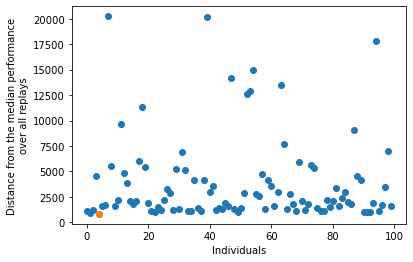

In [129]:
Dl0 = SIM.recover_data('Dl0'+env)
LCl = SIM.recover_data('LCl'+env)
LCl0, LCl1, _, _ = ALY.split_before_after_change(LCl, params=params)
SIM.save_data(LCl0, 'LCl0'+env)
SIM.save_data(LCl1, 'LCl1'+env)

params = copy.deepcopy(PRM.params)
# params['RR'] = 3
params['replay_refs'] = [0,1,2,4]
i_repr = ALY.identify_representative(Dl0, LCl0, params=params)

In [130]:
Dl_indiv, LC_indiv, Model_indiv = SIM.get_individual_data_per_trial(i_indiv=i_repr, params=params, convergence=convergence, method_p=method_p)
# Dg_trials, LCg_indiv, _ = SIM.get_individual_data_per_trial(i_indiv=i_repr, params=params, Models0=Models)

LCl0_indiv, LCl1_indiv, _, _ = ALY.split_before_after_change(LC_indiv, params=params)

SIM.save_data(Dl_indiv, 'Dl_indiv'+env, df=False)
SIM.save_data(LC_indiv, 'LC_indiv'+env)
SIM.save_data(LCl0_indiv, 'LCl0_indiv'+env)
SIM.save_data(LCl0_indiv, 'LCl1_indiv'+env)
SIM.save_data(Model_indiv, 'Model_indiv'+env, df=False)

## All individuals

In [131]:
params = copy.deepcopy(PRM.params)
params['replay_refs'] = [0,1,2,4]
convergence = False
method_p = 'arrival'
path = '/Data_indiv/'

for i in range(params['n_individuals']):
    Dl_indiv, LC_indiv, Model_indiv = SIM.get_individual_data_per_trial(i_indiv=i, params=params, convergence=convergence, method_p=method_p)
    SIM.save_data(Dl_indiv, path+'Dl_indiv'+str(i)+env, df=False)
    SIM.save_data(LC_indiv, path+'LC_indiv'+str(i)+env)
    SIM.save_data(Model_indiv, path+'Model_indiv'+str(i)+env, df=False)

# Q-value distributions

## Histograms

In [132]:
# Optimal Q-value map
params = copy.deepcopy(PRM.params)
params = PRM.set_environment(params, deterministic=det)
params['replay_refs'] = [0,1,2,4]

params['s_rw'] = params['reward_states'][0]
Qoptl0 = optimal_value_iteration(params)
SIM.save_data(Qoptl0, 'Qoptl0'+env, df=False)

params['s_rw'] = params['reward_states'][1]
Qoptl1 = optimal_value_iteration(params)
SIM.save_data(Qoptl1, 'Qoptl1'+env, df=False)

Transition matrix set to stochastic in params.


In [133]:
params = copy.deepcopy(PRM.params)
params['replay_refs'] = [0,1,2,4]

for trial in [24,25]:
    Qpop = SIM.collect_Q_matrices(trial, params=params, deterministic=True, save=True)
    if trial < 25:
        Qopt = SIM.recover_data('Qoptl0'+env, df=False)
    else:
        Qopt = SIM.recover_data('Qoptl1'+env, df=False)
    
    H_indiv = ALY.compute_individual_histograms(Qpop, Qopt=Qopt, params=params, nbins=10)
    H_pop = ALY.compute_population_histogram(H_indiv, params=params)

    SIM.save_data(H_indiv, 'Hindiv'+str(trial)+env, df=False)
    SIM.save_data(H_pop, 'Hpop'+str(trial)+env, df=False)

## EMD

[3.896559845095909e-18, 3.896559845095909e-18, 3.896559845095909e-18, 3.896559845095909e-18, 0.0005768123084774539, 2.519175736661506e-10, 3.896559845095909e-18, 1.476244010744654e-10, 3.896559845095909e-18, 3.896559845095909e-18]
[3.89655985e-17 3.89655985e-17 3.89655985e-17 3.89655985e-17
 5.76812308e-03 2.51917574e-09 3.89655985e-17 1.47624401e-09
 3.89655985e-17 3.89655985e-17]


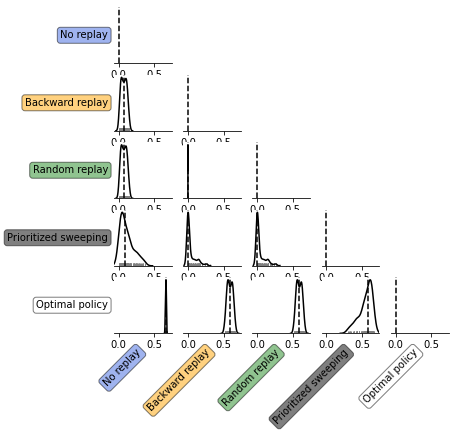

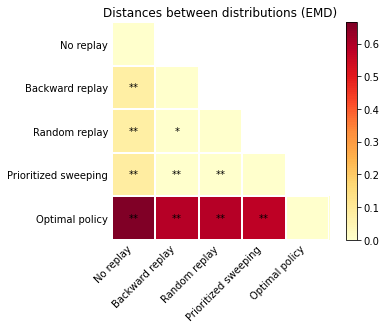

In [100]:
EMD, KS = ALY.compute_individual_distances(Models, Qopt=Qopt, params=params)
EMD_pop, Stat_emd = ALY.compute_population_distances(EMD, KS, params=params)
SIM.save_data(EMD, 'EMDindiv'+env, df=False)
SIM.save_data(KS, 'KSindiv'+env, df=False)
SIM.save_data(EMD_pop, 'EMDpop'+env, df=False)
SIM.save_data(Stat_emd, 'StatEMD'+env, df=False)

GRAPH_p.plot_EMD_distance(EMD, params=params)
GRAPH_p.compare_distributions(EMD_pop, Stat_emd, params=params)

# Frechet Distances

In [139]:
DistMat = ALY.Frechet_distance_trajectories(0, deterministic=False, params=params)

Individual 0 T 0 0
Individual 0 T 0 1
Individual 0 T 0 2
Individual 0 T 0 3
Individual 0 T 0 4
Individual 0 T 0 5
Individual 0 T 0 6
Individual 0 T 0 7
Individual 0 T 0 8
Individual 0 T 0 9
Individual 0 T 0 10
Individual 0 T 0 11
Individual 0 T 0 12
Individual 0 T 0 13
Individual 0 T 0 14
Individual 0 T 0 15
Individual 0 T 0 16
Individual 0 T 0 17
Individual 0 T 0 18
Individual 0 T 0 19
Individual 0 T 0 20
Individual 0 T 0 21
Individual 0 T 0 22
Individual 0 T 0 23
Individual 0 T 0 24
Individual 0 T 0 25
Individual 0 T 0 26
Individual 0 T 0 27
Individual 0 T 0 28
Individual 0 T 0 29
Individual 0 T 0 30
Individual 0 T 0 31
Individual 0 T 0 32
Individual 0 T 0 33
Individual 0 T 0 34
Individual 0 T 0 35
Individual 0 T 0 36
Individual 0 T 0 37
Individual 0 T 0 38
Individual 0 T 0 39
Individual 0 T 0 40
Individual 0 T 0 41
Individual 0 T 0 42
Individual 0 T 0 43
Individual 0 T 0 44
Individual 0 T 0 45
Individual 0 T 0 46
Individual 0 T 0 47
Individual 0 T 0 48
Individual 0 T 0 49
Individual

Individual 0 T 9 26
Individual 0 T 9 27
Individual 0 T 9 28
Individual 0 T 9 29
Individual 0 T 9 30
Individual 0 T 9 31
Individual 0 T 9 32
Individual 0 T 9 33
Individual 0 T 9 34
Individual 0 T 9 35
Individual 0 T 9 36
Individual 0 T 9 37
Individual 0 T 9 38
Individual 0 T 9 39
Individual 0 T 9 40
Individual 0 T 9 41
Individual 0 T 9 42
Individual 0 T 9 43
Individual 0 T 9 44
Individual 0 T 9 45
Individual 0 T 9 46
Individual 0 T 9 47
Individual 0 T 9 48
Individual 0 T 9 49
Individual 0 T 10 10
Individual 0 T 10 11
Individual 0 T 10 12
Individual 0 T 10 13
Individual 0 T 10 14
Individual 0 T 10 15
Individual 0 T 10 16
Individual 0 T 10 17
Individual 0 T 10 18
Individual 0 T 10 19
Individual 0 T 10 20
Individual 0 T 10 21
Individual 0 T 10 22
Individual 0 T 10 23
Individual 0 T 10 24
Individual 0 T 10 25
Individual 0 T 10 26
Individual 0 T 10 27
Individual 0 T 10 28
Individual 0 T 10 29
Individual 0 T 10 30
Individual 0 T 10 31
Individual 0 T 10 32
Individual 0 T 10 33
Individual 0 T 1

Individual 0 T 21 27
Individual 0 T 21 28
Individual 0 T 21 29
Individual 0 T 21 30
Individual 0 T 21 31
Individual 0 T 21 32
Individual 0 T 21 33
Individual 0 T 21 34
Individual 0 T 21 35
Individual 0 T 21 36
Individual 0 T 21 37
Individual 0 T 21 38
Individual 0 T 21 39
Individual 0 T 21 40
Individual 0 T 21 41
Individual 0 T 21 42
Individual 0 T 21 43
Individual 0 T 21 44
Individual 0 T 21 45
Individual 0 T 21 46
Individual 0 T 21 47
Individual 0 T 21 48
Individual 0 T 21 49
Individual 0 T 22 22
Individual 0 T 22 23
Individual 0 T 22 24
Individual 0 T 22 25
Individual 0 T 22 26
Individual 0 T 22 27
Individual 0 T 22 28
Individual 0 T 22 29
Individual 0 T 22 30
Individual 0 T 22 31
Individual 0 T 22 32
Individual 0 T 22 33
Individual 0 T 22 34
Individual 0 T 22 35
Individual 0 T 22 36
Individual 0 T 22 37
Individual 0 T 22 38
Individual 0 T 22 39
Individual 0 T 22 40
Individual 0 T 22 41
Individual 0 T 22 42
Individual 0 T 22 43
Individual 0 T 22 44
Individual 0 T 22 45
Individual 0 

Individual 1 T 0 1
Individual 1 T 0 2
Individual 1 T 0 3
Individual 1 T 0 4
Individual 1 T 0 5
Individual 1 T 0 6
Individual 1 T 0 7
Individual 1 T 0 8
Individual 1 T 0 9
Individual 1 T 0 10
Individual 1 T 0 11
Individual 1 T 0 12
Individual 1 T 0 13
Individual 1 T 0 14
Individual 1 T 0 15
Individual 1 T 0 16
Individual 1 T 0 17
Individual 1 T 0 18
Individual 1 T 0 19
Individual 1 T 0 20
Individual 1 T 0 21
Individual 1 T 0 22
Individual 1 T 0 23
Individual 1 T 0 24
Individual 1 T 0 25
Individual 1 T 0 26
Individual 1 T 0 27
Individual 1 T 0 28
Individual 1 T 0 29
Individual 1 T 0 30
Individual 1 T 0 31
Individual 1 T 0 32
Individual 1 T 0 33
Individual 1 T 0 34
Individual 1 T 0 35
Individual 1 T 0 36
Individual 1 T 0 37
Individual 1 T 0 38
Individual 1 T 0 39
Individual 1 T 0 40
Individual 1 T 0 41
Individual 1 T 0 42
Individual 1 T 0 43
Individual 1 T 0 44
Individual 1 T 0 45
Individual 1 T 0 46
Individual 1 T 0 47
Individual 1 T 0 48
Individual 1 T 0 49
Individual 1 T 1 1
Individual

Individual 1 T 9 25
Individual 1 T 9 26
Individual 1 T 9 27
Individual 1 T 9 28
Individual 1 T 9 29
Individual 1 T 9 30
Individual 1 T 9 31
Individual 1 T 9 32
Individual 1 T 9 33
Individual 1 T 9 34
Individual 1 T 9 35
Individual 1 T 9 36
Individual 1 T 9 37
Individual 1 T 9 38
Individual 1 T 9 39
Individual 1 T 9 40
Individual 1 T 9 41
Individual 1 T 9 42
Individual 1 T 9 43
Individual 1 T 9 44
Individual 1 T 9 45
Individual 1 T 9 46
Individual 1 T 9 47
Individual 1 T 9 48
Individual 1 T 9 49
Individual 1 T 10 10
Individual 1 T 10 11
Individual 1 T 10 12
Individual 1 T 10 13
Individual 1 T 10 14
Individual 1 T 10 15
Individual 1 T 10 16
Individual 1 T 10 17
Individual 1 T 10 18
Individual 1 T 10 19
Individual 1 T 10 20
Individual 1 T 10 21
Individual 1 T 10 22
Individual 1 T 10 23
Individual 1 T 10 24
Individual 1 T 10 25
Individual 1 T 10 26
Individual 1 T 10 27
Individual 1 T 10 28
Individual 1 T 10 29
Individual 1 T 10 30
Individual 1 T 10 31
Individual 1 T 10 32
Individual 1 T 10

Individual 1 T 21 47
Individual 1 T 21 48
Individual 1 T 21 49
Individual 1 T 22 22
Individual 1 T 22 23
Individual 1 T 22 24
Individual 1 T 22 25
Individual 1 T 22 26
Individual 1 T 22 27
Individual 1 T 22 28
Individual 1 T 22 29
Individual 1 T 22 30
Individual 1 T 22 31
Individual 1 T 22 32
Individual 1 T 22 33
Individual 1 T 22 34
Individual 1 T 22 35
Individual 1 T 22 36
Individual 1 T 22 37
Individual 1 T 22 38
Individual 1 T 22 39
Individual 1 T 22 40
Individual 1 T 22 41
Individual 1 T 22 42
Individual 1 T 22 43
Individual 1 T 22 44
Individual 1 T 22 45
Individual 1 T 22 46
Individual 1 T 22 47
Individual 1 T 22 48
Individual 1 T 22 49
Individual 1 T 23 23
Individual 1 T 23 24
Individual 1 T 23 25
Individual 1 T 23 26
Individual 1 T 23 27
Individual 1 T 23 28
Individual 1 T 23 29
Individual 1 T 23 30
Individual 1 T 23 31
Individual 1 T 23 32
Individual 1 T 23 33
Individual 1 T 23 34
Individual 1 T 23 35
Individual 1 T 23 36
Individual 1 T 23 37
Individual 1 T 23 38
Individual 1 

Individual 2 T 0 0
Individual 2 T 0 1
Individual 2 T 0 2
Individual 2 T 0 3
Individual 2 T 0 4
Individual 2 T 0 5
Individual 2 T 0 6
Individual 2 T 0 7
Individual 2 T 0 8
Individual 2 T 0 9
Individual 2 T 0 10
Individual 2 T 0 11
Individual 2 T 0 12
Individual 2 T 0 13
Individual 2 T 0 14
Individual 2 T 0 15
Individual 2 T 0 16
Individual 2 T 0 17
Individual 2 T 0 18
Individual 2 T 0 19
Individual 2 T 0 20
Individual 2 T 0 21
Individual 2 T 0 22
Individual 2 T 0 23
Individual 2 T 0 24
Individual 2 T 0 25
Individual 2 T 0 26
Individual 2 T 0 27
Individual 2 T 0 28
Individual 2 T 0 29
Individual 2 T 0 30
Individual 2 T 0 31
Individual 2 T 0 32
Individual 2 T 0 33
Individual 2 T 0 34
Individual 2 T 0 35
Individual 2 T 0 36
Individual 2 T 0 37
Individual 2 T 0 38
Individual 2 T 0 39
Individual 2 T 0 40
Individual 2 T 0 41
Individual 2 T 0 42
Individual 2 T 0 43
Individual 2 T 0 44
Individual 2 T 0 45
Individual 2 T 0 46
Individual 2 T 0 47
Individual 2 T 0 48
Individual 2 T 0 49
Individual

Individual 2 T 9 25
Individual 2 T 9 26
Individual 2 T 9 27
Individual 2 T 9 28
Individual 2 T 9 29
Individual 2 T 9 30
Individual 2 T 9 31
Individual 2 T 9 32
Individual 2 T 9 33
Individual 2 T 9 34
Individual 2 T 9 35
Individual 2 T 9 36
Individual 2 T 9 37
Individual 2 T 9 38
Individual 2 T 9 39
Individual 2 T 9 40
Individual 2 T 9 41
Individual 2 T 9 42
Individual 2 T 9 43
Individual 2 T 9 44
Individual 2 T 9 45
Individual 2 T 9 46
Individual 2 T 9 47
Individual 2 T 9 48
Individual 2 T 9 49
Individual 2 T 10 10
Individual 2 T 10 11
Individual 2 T 10 12
Individual 2 T 10 13
Individual 2 T 10 14
Individual 2 T 10 15
Individual 2 T 10 16
Individual 2 T 10 17
Individual 2 T 10 18
Individual 2 T 10 19
Individual 2 T 10 20
Individual 2 T 10 21
Individual 2 T 10 22
Individual 2 T 10 23
Individual 2 T 10 24
Individual 2 T 10 25
Individual 2 T 10 26
Individual 2 T 10 27
Individual 2 T 10 28
Individual 2 T 10 29
Individual 2 T 10 30
Individual 2 T 10 31
Individual 2 T 10 32
Individual 2 T 10

Individual 2 T 21 27
Individual 2 T 21 28
Individual 2 T 21 29
Individual 2 T 21 30
Individual 2 T 21 31
Individual 2 T 21 32
Individual 2 T 21 33
Individual 2 T 21 34
Individual 2 T 21 35
Individual 2 T 21 36
Individual 2 T 21 37
Individual 2 T 21 38
Individual 2 T 21 39
Individual 2 T 21 40
Individual 2 T 21 41
Individual 2 T 21 42
Individual 2 T 21 43
Individual 2 T 21 44
Individual 2 T 21 45
Individual 2 T 21 46
Individual 2 T 21 47
Individual 2 T 21 48
Individual 2 T 21 49
Individual 2 T 22 22
Individual 2 T 22 23
Individual 2 T 22 24
Individual 2 T 22 25
Individual 2 T 22 26
Individual 2 T 22 27
Individual 2 T 22 28
Individual 2 T 22 29
Individual 2 T 22 30
Individual 2 T 22 31
Individual 2 T 22 32
Individual 2 T 22 33
Individual 2 T 22 34
Individual 2 T 22 35
Individual 2 T 22 36
Individual 2 T 22 37
Individual 2 T 22 38
Individual 2 T 22 39
Individual 2 T 22 40
Individual 2 T 22 41
Individual 2 T 22 42
Individual 2 T 22 43
Individual 2 T 22 44
Individual 2 T 22 45
Individual 2 

Individual 3 T 0 0
Individual 3 T 0 1
Individual 3 T 0 2
Individual 3 T 0 3
Individual 3 T 0 4
Individual 3 T 0 5
Individual 3 T 0 6
Individual 3 T 0 7
Individual 3 T 0 8
Individual 3 T 0 9
Individual 3 T 0 10
Individual 3 T 0 11
Individual 3 T 0 12
Individual 3 T 0 13
Individual 3 T 0 14
Individual 3 T 0 15
Individual 3 T 0 16
Individual 3 T 0 17
Individual 3 T 0 18
Individual 3 T 0 19
Individual 3 T 0 20
Individual 3 T 0 21
Individual 3 T 0 22
Individual 3 T 0 23
Individual 3 T 0 24
Individual 3 T 0 25
Individual 3 T 0 26
Individual 3 T 0 27
Individual 3 T 0 28
Individual 3 T 0 29
Individual 3 T 0 30
Individual 3 T 0 31
Individual 3 T 0 32
Individual 3 T 0 33
Individual 3 T 0 34
Individual 3 T 0 35
Individual 3 T 0 36
Individual 3 T 0 37
Individual 3 T 0 38
Individual 3 T 0 39
Individual 3 T 0 40
Individual 3 T 0 41
Individual 3 T 0 42
Individual 3 T 0 43
Individual 3 T 0 44
Individual 3 T 0 45
Individual 3 T 0 46
Individual 3 T 0 47
Individual 3 T 0 48
Individual 3 T 0 49
Individual

Individual 3 T 9 11
Individual 3 T 9 12
Individual 3 T 9 13
Individual 3 T 9 14
Individual 3 T 9 15
Individual 3 T 9 16
Individual 3 T 9 17
Individual 3 T 9 18
Individual 3 T 9 19
Individual 3 T 9 20
Individual 3 T 9 21
Individual 3 T 9 22
Individual 3 T 9 23
Individual 3 T 9 24
Individual 3 T 9 25
Individual 3 T 9 26
Individual 3 T 9 27
Individual 3 T 9 28
Individual 3 T 9 29
Individual 3 T 9 30
Individual 3 T 9 31
Individual 3 T 9 32
Individual 3 T 9 33
Individual 3 T 9 34
Individual 3 T 9 35
Individual 3 T 9 36
Individual 3 T 9 37
Individual 3 T 9 38
Individual 3 T 9 39
Individual 3 T 9 40
Individual 3 T 9 41
Individual 3 T 9 42
Individual 3 T 9 43
Individual 3 T 9 44
Individual 3 T 9 45
Individual 3 T 9 46
Individual 3 T 9 47
Individual 3 T 9 48
Individual 3 T 9 49
Individual 3 T 10 10
Individual 3 T 10 11
Individual 3 T 10 12
Individual 3 T 10 13
Individual 3 T 10 14
Individual 3 T 10 15
Individual 3 T 10 16
Individual 3 T 10 17
Individual 3 T 10 18
Individual 3 T 10 19
Individual

Individual 3 T 20 26
Individual 3 T 20 27
Individual 3 T 20 28
Individual 3 T 20 29
Individual 3 T 20 30
Individual 3 T 20 31
Individual 3 T 20 32
Individual 3 T 20 33
Individual 3 T 20 34
Individual 3 T 20 35
Individual 3 T 20 36
Individual 3 T 20 37
Individual 3 T 20 38
Individual 3 T 20 39
Individual 3 T 20 40
Individual 3 T 20 41
Individual 3 T 20 42
Individual 3 T 20 43
Individual 3 T 20 44
Individual 3 T 20 45
Individual 3 T 20 46
Individual 3 T 20 47
Individual 3 T 20 48
Individual 3 T 20 49
Individual 3 T 21 21
Individual 3 T 21 22
Individual 3 T 21 23
Individual 3 T 21 24
Individual 3 T 21 25
Individual 3 T 21 26
Individual 3 T 21 27
Individual 3 T 21 28
Individual 3 T 21 29
Individual 3 T 21 30
Individual 3 T 21 31
Individual 3 T 21 32
Individual 3 T 21 33
Individual 3 T 21 34
Individual 3 T 21 35
Individual 3 T 21 36
Individual 3 T 21 37
Individual 3 T 21 38
Individual 3 T 21 39
Individual 3 T 21 40
Individual 3 T 21 41
Individual 3 T 21 42
Individual 3 T 21 43
Individual 3 

Individual 3 T 41 41
Individual 3 T 41 42
Individual 3 T 41 43
Individual 3 T 41 44
Individual 3 T 41 45
Individual 3 T 41 46
Individual 3 T 41 47
Individual 3 T 41 48
Individual 3 T 41 49
Individual 3 T 42 42
Individual 3 T 42 43
Individual 3 T 42 44
Individual 3 T 42 45
Individual 3 T 42 46
Individual 3 T 42 47
Individual 3 T 42 48
Individual 3 T 42 49
Individual 3 T 43 43
Individual 3 T 43 44
Individual 3 T 43 45
Individual 3 T 43 46
Individual 3 T 43 47
Individual 3 T 43 48
Individual 3 T 43 49
Individual 3 T 44 44
Individual 3 T 44 45
Individual 3 T 44 46
Individual 3 T 44 47
Individual 3 T 44 48
Individual 3 T 44 49
Individual 3 T 45 45
Individual 3 T 45 46
Individual 3 T 45 47
Individual 3 T 45 48
Individual 3 T 45 49
Individual 3 T 46 46
Individual 3 T 46 47
Individual 3 T 46 48
Individual 3 T 46 49
Individual 3 T 47 47
Individual 3 T 47 48
Individual 3 T 47 49
Individual 3 T 48 48
Individual 3 T 48 49
Individual 3 T 49 49
Individual 4 T 0 0
Individual 4 T 0 1
Individual 4 T 0 

Individual 4 T 8 34
Individual 4 T 8 35
Individual 4 T 8 36
Individual 4 T 8 37
Individual 4 T 8 38
Individual 4 T 8 39
Individual 4 T 8 40
Individual 4 T 8 41
Individual 4 T 8 42
Individual 4 T 8 43
Individual 4 T 8 44
Individual 4 T 8 45
Individual 4 T 8 46
Individual 4 T 8 47
Individual 4 T 8 48
Individual 4 T 8 49
Individual 4 T 9 9
Individual 4 T 9 10
Individual 4 T 9 11
Individual 4 T 9 12
Individual 4 T 9 13
Individual 4 T 9 14
Individual 4 T 9 15
Individual 4 T 9 16
Individual 4 T 9 17
Individual 4 T 9 18
Individual 4 T 9 19
Individual 4 T 9 20
Individual 4 T 9 21
Individual 4 T 9 22
Individual 4 T 9 23
Individual 4 T 9 24
Individual 4 T 9 25
Individual 4 T 9 26
Individual 4 T 9 27
Individual 4 T 9 28
Individual 4 T 9 29
Individual 4 T 9 30
Individual 4 T 9 31
Individual 4 T 9 32
Individual 4 T 9 33
Individual 4 T 9 34
Individual 4 T 9 35
Individual 4 T 9 36
Individual 4 T 9 37
Individual 4 T 9 38
Individual 4 T 9 39
Individual 4 T 9 40
Individual 4 T 9 41
Individual 4 T 9 42
I

Individual 4 T 20 26
Individual 4 T 20 27
Individual 4 T 20 28
Individual 4 T 20 29
Individual 4 T 20 30
Individual 4 T 20 31
Individual 4 T 20 32
Individual 4 T 20 33
Individual 4 T 20 34
Individual 4 T 20 35
Individual 4 T 20 36
Individual 4 T 20 37
Individual 4 T 20 38
Individual 4 T 20 39
Individual 4 T 20 40
Individual 4 T 20 41
Individual 4 T 20 42
Individual 4 T 20 43
Individual 4 T 20 44
Individual 4 T 20 45
Individual 4 T 20 46
Individual 4 T 20 47
Individual 4 T 20 48
Individual 4 T 20 49
Individual 4 T 21 21
Individual 4 T 21 22
Individual 4 T 21 23
Individual 4 T 21 24
Individual 4 T 21 25
Individual 4 T 21 26
Individual 4 T 21 27
Individual 4 T 21 28
Individual 4 T 21 29
Individual 4 T 21 30
Individual 4 T 21 31
Individual 4 T 21 32
Individual 4 T 21 33
Individual 4 T 21 34
Individual 4 T 21 35
Individual 4 T 21 36
Individual 4 T 21 37
Individual 4 T 21 38
Individual 4 T 21 39
Individual 4 T 21 40
Individual 4 T 21 41
Individual 4 T 21 42
Individual 4 T 21 43
Individual 4 

Individual 4 T 39 45
Individual 4 T 39 46
Individual 4 T 39 47
Individual 4 T 39 48
Individual 4 T 39 49
Individual 4 T 40 40
Individual 4 T 40 41
Individual 4 T 40 42
Individual 4 T 40 43
Individual 4 T 40 44
Individual 4 T 40 45
Individual 4 T 40 46
Individual 4 T 40 47
Individual 4 T 40 48
Individual 4 T 40 49
Individual 4 T 41 41
Individual 4 T 41 42
Individual 4 T 41 43
Individual 4 T 41 44
Individual 4 T 41 45
Individual 4 T 41 46
Individual 4 T 41 47
Individual 4 T 41 48
Individual 4 T 41 49
Individual 4 T 42 42
Individual 4 T 42 43
Individual 4 T 42 44
Individual 4 T 42 45
Individual 4 T 42 46
Individual 4 T 42 47
Individual 4 T 42 48
Individual 4 T 42 49
Individual 4 T 43 43
Individual 4 T 43 44
Individual 4 T 43 45
Individual 4 T 43 46
Individual 4 T 43 47
Individual 4 T 43 48
Individual 4 T 43 49
Individual 4 T 44 44
Individual 4 T 44 45
Individual 4 T 44 46
Individual 4 T 44 47
Individual 4 T 44 48
Individual 4 T 44 49
Individual 4 T 45 45
Individual 4 T 45 46
Individual 4 

Individual 5 T 7 36
Individual 5 T 7 37
Individual 5 T 7 38
Individual 5 T 7 39
Individual 5 T 7 40
Individual 5 T 7 41
Individual 5 T 7 42
Individual 5 T 7 43
Individual 5 T 7 44
Individual 5 T 7 45
Individual 5 T 7 46
Individual 5 T 7 47
Individual 5 T 7 48
Individual 5 T 7 49
Individual 5 T 8 8
Individual 5 T 8 9
Individual 5 T 8 10
Individual 5 T 8 11
Individual 5 T 8 12
Individual 5 T 8 13
Individual 5 T 8 14
Individual 5 T 8 15
Individual 5 T 8 16
Individual 5 T 8 17
Individual 5 T 8 18
Individual 5 T 8 19
Individual 5 T 8 20
Individual 5 T 8 21
Individual 5 T 8 22
Individual 5 T 8 23
Individual 5 T 8 24
Individual 5 T 8 25
Individual 5 T 8 26
Individual 5 T 8 27
Individual 5 T 8 28
Individual 5 T 8 29
Individual 5 T 8 30
Individual 5 T 8 31
Individual 5 T 8 32
Individual 5 T 8 33
Individual 5 T 8 34
Individual 5 T 8 35
Individual 5 T 8 36
Individual 5 T 8 37
Individual 5 T 8 38
Individual 5 T 8 39
Individual 5 T 8 40
Individual 5 T 8 41
Individual 5 T 8 42
Individual 5 T 8 43
In

Individual 5 T 18 27
Individual 5 T 18 28
Individual 5 T 18 29
Individual 5 T 18 30
Individual 5 T 18 31
Individual 5 T 18 32
Individual 5 T 18 33
Individual 5 T 18 34
Individual 5 T 18 35
Individual 5 T 18 36
Individual 5 T 18 37
Individual 5 T 18 38
Individual 5 T 18 39
Individual 5 T 18 40
Individual 5 T 18 41
Individual 5 T 18 42
Individual 5 T 18 43
Individual 5 T 18 44
Individual 5 T 18 45
Individual 5 T 18 46
Individual 5 T 18 47
Individual 5 T 18 48
Individual 5 T 18 49
Individual 5 T 19 19
Individual 5 T 19 20
Individual 5 T 19 21
Individual 5 T 19 22
Individual 5 T 19 23
Individual 5 T 19 24
Individual 5 T 19 25
Individual 5 T 19 26
Individual 5 T 19 27
Individual 5 T 19 28
Individual 5 T 19 29
Individual 5 T 19 30
Individual 5 T 19 31
Individual 5 T 19 32
Individual 5 T 19 33
Individual 5 T 19 34
Individual 5 T 19 35
Individual 5 T 19 36
Individual 5 T 19 37
Individual 5 T 19 38
Individual 5 T 19 39
Individual 5 T 19 40
Individual 5 T 19 41
Individual 5 T 19 42
Individual 5 

Individual 5 T 47 47
Individual 5 T 47 48
Individual 5 T 47 49
Individual 5 T 48 48
Individual 5 T 48 49
Individual 5 T 49 49
Individual 6 T 0 0
Individual 6 T 0 1
Individual 6 T 0 2
Individual 6 T 0 3
Individual 6 T 0 4
Individual 6 T 0 5
Individual 6 T 0 6
Individual 6 T 0 7
Individual 6 T 0 8
Individual 6 T 0 9
Individual 6 T 0 10
Individual 6 T 0 11
Individual 6 T 0 12
Individual 6 T 0 13
Individual 6 T 0 14
Individual 6 T 0 15
Individual 6 T 0 16
Individual 6 T 0 17
Individual 6 T 0 18
Individual 6 T 0 19
Individual 6 T 0 20
Individual 6 T 0 21
Individual 6 T 0 22
Individual 6 T 0 23
Individual 6 T 0 24
Individual 6 T 0 25
Individual 6 T 0 26
Individual 6 T 0 27
Individual 6 T 0 28
Individual 6 T 0 29
Individual 6 T 0 30
Individual 6 T 0 31
Individual 6 T 0 32
Individual 6 T 0 33
Individual 6 T 0 34
Individual 6 T 0 35
Individual 6 T 0 36
Individual 6 T 0 37
Individual 6 T 0 38
Individual 6 T 0 39
Individual 6 T 0 40
Individual 6 T 0 41
Individual 6 T 0 42
Individual 6 T 0 43
Indi

Individual 6 T 10 18
Individual 6 T 10 19
Individual 6 T 10 20
Individual 6 T 10 21
Individual 6 T 10 22
Individual 6 T 10 23
Individual 6 T 10 24
Individual 6 T 10 25
Individual 6 T 10 26
Individual 6 T 10 27
Individual 6 T 10 28
Individual 6 T 10 29
Individual 6 T 10 30
Individual 6 T 10 31
Individual 6 T 10 32
Individual 6 T 10 33
Individual 6 T 10 34
Individual 6 T 10 35
Individual 6 T 10 36
Individual 6 T 10 37
Individual 6 T 10 38
Individual 6 T 10 39
Individual 6 T 10 40
Individual 6 T 10 41
Individual 6 T 10 42
Individual 6 T 10 43
Individual 6 T 10 44
Individual 6 T 10 45
Individual 6 T 10 46
Individual 6 T 10 47
Individual 6 T 10 48
Individual 6 T 10 49
Individual 6 T 11 11
Individual 6 T 11 12
Individual 6 T 11 13
Individual 6 T 11 14
Individual 6 T 11 15
Individual 6 T 11 16
Individual 6 T 11 17
Individual 6 T 11 18
Individual 6 T 11 19
Individual 6 T 11 20
Individual 6 T 11 21
Individual 6 T 11 22
Individual 6 T 11 23
Individual 6 T 11 24
Individual 6 T 11 25
Individual 6 

Individual 6 T 23 25
Individual 6 T 23 26
Individual 6 T 23 27
Individual 6 T 23 28
Individual 6 T 23 29
Individual 6 T 23 30
Individual 6 T 23 31
Individual 6 T 23 32
Individual 6 T 23 33
Individual 6 T 23 34
Individual 6 T 23 35
Individual 6 T 23 36
Individual 6 T 23 37
Individual 6 T 23 38
Individual 6 T 23 39
Individual 6 T 23 40
Individual 6 T 23 41
Individual 6 T 23 42
Individual 6 T 23 43
Individual 6 T 23 44
Individual 6 T 23 45
Individual 6 T 23 46
Individual 6 T 23 47
Individual 6 T 23 48
Individual 6 T 23 49
Individual 6 T 24 24
Individual 6 T 24 25
Individual 6 T 24 26
Individual 6 T 24 27
Individual 6 T 24 28
Individual 6 T 24 29
Individual 6 T 24 30
Individual 6 T 24 31
Individual 6 T 24 32
Individual 6 T 24 33
Individual 6 T 24 34
Individual 6 T 24 35
Individual 6 T 24 36
Individual 6 T 24 37
Individual 6 T 24 38
Individual 6 T 24 39
Individual 6 T 24 40
Individual 6 T 24 41
Individual 6 T 24 42
Individual 6 T 24 43
Individual 6 T 24 44
Individual 6 T 24 45
Individual 6 

Individual 7 T 0 16
Individual 7 T 0 17
Individual 7 T 0 18
Individual 7 T 0 19
Individual 7 T 0 20
Individual 7 T 0 21
Individual 7 T 0 22
Individual 7 T 0 23
Individual 7 T 0 24
Individual 7 T 0 25
Individual 7 T 0 26
Individual 7 T 0 27
Individual 7 T 0 28
Individual 7 T 0 29
Individual 7 T 0 30
Individual 7 T 0 31
Individual 7 T 0 32
Individual 7 T 0 33
Individual 7 T 0 34
Individual 7 T 0 35
Individual 7 T 0 36
Individual 7 T 0 37
Individual 7 T 0 38
Individual 7 T 0 39
Individual 7 T 0 40
Individual 7 T 0 41
Individual 7 T 0 42
Individual 7 T 0 43
Individual 7 T 0 44
Individual 7 T 0 45
Individual 7 T 0 46
Individual 7 T 0 47
Individual 7 T 0 48
Individual 7 T 0 49
Individual 7 T 1 1
Individual 7 T 1 2
Individual 7 T 1 3
Individual 7 T 1 4
Individual 7 T 1 5
Individual 7 T 1 6
Individual 7 T 1 7
Individual 7 T 1 8
Individual 7 T 1 9
Individual 7 T 1 10
Individual 7 T 1 11
Individual 7 T 1 12
Individual 7 T 1 13
Individual 7 T 1 14
Individual 7 T 1 15
Individual 7 T 1 16
Individua

Individual 7 T 9 26
Individual 7 T 9 27
Individual 7 T 9 28
Individual 7 T 9 29
Individual 7 T 9 30
Individual 7 T 9 31
Individual 7 T 9 32
Individual 7 T 9 33
Individual 7 T 9 34
Individual 7 T 9 35
Individual 7 T 9 36
Individual 7 T 9 37
Individual 7 T 9 38
Individual 7 T 9 39
Individual 7 T 9 40
Individual 7 T 9 41
Individual 7 T 9 42
Individual 7 T 9 43
Individual 7 T 9 44
Individual 7 T 9 45
Individual 7 T 9 46
Individual 7 T 9 47
Individual 7 T 9 48
Individual 7 T 9 49
Individual 7 T 10 10
Individual 7 T 10 11
Individual 7 T 10 12
Individual 7 T 10 13
Individual 7 T 10 14
Individual 7 T 10 15
Individual 7 T 10 16
Individual 7 T 10 17
Individual 7 T 10 18
Individual 7 T 10 19
Individual 7 T 10 20
Individual 7 T 10 21
Individual 7 T 10 22
Individual 7 T 10 23
Individual 7 T 10 24
Individual 7 T 10 25
Individual 7 T 10 26
Individual 7 T 10 27
Individual 7 T 10 28
Individual 7 T 10 29
Individual 7 T 10 30
Individual 7 T 10 31
Individual 7 T 10 32
Individual 7 T 10 33
Individual 7 T 1

Individual 7 T 21 26
Individual 7 T 21 27
Individual 7 T 21 28
Individual 7 T 21 29
Individual 7 T 21 30
Individual 7 T 21 31
Individual 7 T 21 32
Individual 7 T 21 33
Individual 7 T 21 34
Individual 7 T 21 35
Individual 7 T 21 36
Individual 7 T 21 37
Individual 7 T 21 38
Individual 7 T 21 39
Individual 7 T 21 40
Individual 7 T 21 41
Individual 7 T 21 42
Individual 7 T 21 43
Individual 7 T 21 44
Individual 7 T 21 45
Individual 7 T 21 46
Individual 7 T 21 47
Individual 7 T 21 48
Individual 7 T 21 49
Individual 7 T 22 22
Individual 7 T 22 23
Individual 7 T 22 24
Individual 7 T 22 25
Individual 7 T 22 26
Individual 7 T 22 27
Individual 7 T 22 28
Individual 7 T 22 29
Individual 7 T 22 30
Individual 7 T 22 31
Individual 7 T 22 32
Individual 7 T 22 33
Individual 7 T 22 34
Individual 7 T 22 35
Individual 7 T 22 36
Individual 7 T 22 37
Individual 7 T 22 38
Individual 7 T 22 39
Individual 7 T 22 40
Individual 7 T 22 41
Individual 7 T 22 42
Individual 7 T 22 43
Individual 7 T 22 44
Individual 7 

Individual 7 T 43 49
Individual 7 T 44 44
Individual 7 T 44 45
Individual 7 T 44 46
Individual 7 T 44 47
Individual 7 T 44 48
Individual 7 T 44 49
Individual 7 T 45 45
Individual 7 T 45 46
Individual 7 T 45 47
Individual 7 T 45 48
Individual 7 T 45 49
Individual 7 T 46 46
Individual 7 T 46 47
Individual 7 T 46 48
Individual 7 T 46 49
Individual 7 T 47 47
Individual 7 T 47 48
Individual 7 T 47 49
Individual 7 T 48 48
Individual 7 T 48 49
Individual 7 T 49 49
Individual 8 T 0 0
Individual 8 T 0 1
Individual 8 T 0 2
Individual 8 T 0 3
Individual 8 T 0 4
Individual 8 T 0 5
Individual 8 T 0 6
Individual 8 T 0 7
Individual 8 T 0 8
Individual 8 T 0 9
Individual 8 T 0 10
Individual 8 T 0 11
Individual 8 T 0 12
Individual 8 T 0 13
Individual 8 T 0 14
Individual 8 T 0 15
Individual 8 T 0 16
Individual 8 T 0 17
Individual 8 T 0 18
Individual 8 T 0 19
Individual 8 T 0 20
Individual 8 T 0 21
Individual 8 T 0 22
Individual 8 T 0 23
Individual 8 T 0 24
Individual 8 T 0 25
Individual 8 T 0 26
Individu

Individual 8 T 8 30
Individual 8 T 8 31
Individual 8 T 8 32
Individual 8 T 8 33
Individual 8 T 8 34
Individual 8 T 8 35
Individual 8 T 8 36
Individual 8 T 8 37
Individual 8 T 8 38
Individual 8 T 8 39
Individual 8 T 8 40
Individual 8 T 8 41
Individual 8 T 8 42
Individual 8 T 8 43
Individual 8 T 8 44
Individual 8 T 8 45
Individual 8 T 8 46
Individual 8 T 8 47
Individual 8 T 8 48
Individual 8 T 8 49
Individual 8 T 9 9
Individual 8 T 9 10
Individual 8 T 9 11
Individual 8 T 9 12
Individual 8 T 9 13
Individual 8 T 9 14
Individual 8 T 9 15
Individual 8 T 9 16
Individual 8 T 9 17
Individual 8 T 9 18
Individual 8 T 9 19
Individual 8 T 9 20
Individual 8 T 9 21
Individual 8 T 9 22
Individual 8 T 9 23
Individual 8 T 9 24
Individual 8 T 9 25
Individual 8 T 9 26
Individual 8 T 9 27
Individual 8 T 9 28
Individual 8 T 9 29
Individual 8 T 9 30
Individual 8 T 9 31
Individual 8 T 9 32
Individual 8 T 9 33
Individual 8 T 9 34
Individual 8 T 9 35
Individual 8 T 9 36
Individual 8 T 9 37
Individual 8 T 9 38
I

Individual 8 T 19 32
Individual 8 T 19 33
Individual 8 T 19 34
Individual 8 T 19 35
Individual 8 T 19 36
Individual 8 T 19 37
Individual 8 T 19 38
Individual 8 T 19 39
Individual 8 T 19 40
Individual 8 T 19 41
Individual 8 T 19 42
Individual 8 T 19 43
Individual 8 T 19 44
Individual 8 T 19 45
Individual 8 T 19 46
Individual 8 T 19 47
Individual 8 T 19 48
Individual 8 T 19 49
Individual 8 T 20 20
Individual 8 T 20 21
Individual 8 T 20 22
Individual 8 T 20 23
Individual 8 T 20 24
Individual 8 T 20 25
Individual 8 T 20 26
Individual 8 T 20 27
Individual 8 T 20 28
Individual 8 T 20 29
Individual 8 T 20 30
Individual 8 T 20 31
Individual 8 T 20 32
Individual 8 T 20 33
Individual 8 T 20 34
Individual 8 T 20 35
Individual 8 T 20 36
Individual 8 T 20 37
Individual 8 T 20 38
Individual 8 T 20 39
Individual 8 T 20 40
Individual 8 T 20 41
Individual 8 T 20 42
Individual 8 T 20 43
Individual 8 T 20 44
Individual 8 T 20 45
Individual 8 T 20 46
Individual 8 T 20 47
Individual 8 T 20 48
Individual 8 

Individual 8 T 39 48
Individual 8 T 39 49
Individual 8 T 40 40
Individual 8 T 40 41
Individual 8 T 40 42
Individual 8 T 40 43
Individual 8 T 40 44
Individual 8 T 40 45
Individual 8 T 40 46
Individual 8 T 40 47
Individual 8 T 40 48
Individual 8 T 40 49
Individual 8 T 41 41
Individual 8 T 41 42
Individual 8 T 41 43
Individual 8 T 41 44
Individual 8 T 41 45
Individual 8 T 41 46
Individual 8 T 41 47
Individual 8 T 41 48
Individual 8 T 41 49
Individual 8 T 42 42
Individual 8 T 42 43
Individual 8 T 42 44
Individual 8 T 42 45
Individual 8 T 42 46
Individual 8 T 42 47
Individual 8 T 42 48
Individual 8 T 42 49
Individual 8 T 43 43
Individual 8 T 43 44
Individual 8 T 43 45
Individual 8 T 43 46
Individual 8 T 43 47
Individual 8 T 43 48
Individual 8 T 43 49
Individual 8 T 44 44
Individual 8 T 44 45
Individual 8 T 44 46
Individual 8 T 44 47
Individual 8 T 44 48
Individual 8 T 44 49
Individual 8 T 45 45
Individual 8 T 45 46
Individual 8 T 45 47
Individual 8 T 45 48
Individual 8 T 45 49
Individual 8 

Individual 9 T 9 25
Individual 9 T 9 26
Individual 9 T 9 27
Individual 9 T 9 28
Individual 9 T 9 29
Individual 9 T 9 30
Individual 9 T 9 31
Individual 9 T 9 32
Individual 9 T 9 33
Individual 9 T 9 34
Individual 9 T 9 35
Individual 9 T 9 36
Individual 9 T 9 37
Individual 9 T 9 38
Individual 9 T 9 39
Individual 9 T 9 40
Individual 9 T 9 41
Individual 9 T 9 42
Individual 9 T 9 43
Individual 9 T 9 44
Individual 9 T 9 45
Individual 9 T 9 46
Individual 9 T 9 47
Individual 9 T 9 48
Individual 9 T 9 49
Individual 9 T 10 10
Individual 9 T 10 11
Individual 9 T 10 12
Individual 9 T 10 13
Individual 9 T 10 14
Individual 9 T 10 15
Individual 9 T 10 16
Individual 9 T 10 17
Individual 9 T 10 18
Individual 9 T 10 19
Individual 9 T 10 20
Individual 9 T 10 21
Individual 9 T 10 22
Individual 9 T 10 23
Individual 9 T 10 24
Individual 9 T 10 25
Individual 9 T 10 26
Individual 9 T 10 27
Individual 9 T 10 28
Individual 9 T 10 29
Individual 9 T 10 30
Individual 9 T 10 31
Individual 9 T 10 32
Individual 9 T 10

Individual 9 T 20 31
Individual 9 T 20 32
Individual 9 T 20 33
Individual 9 T 20 34
Individual 9 T 20 35
Individual 9 T 20 36
Individual 9 T 20 37
Individual 9 T 20 38
Individual 9 T 20 39
Individual 9 T 20 40
Individual 9 T 20 41
Individual 9 T 20 42
Individual 9 T 20 43
Individual 9 T 20 44
Individual 9 T 20 45
Individual 9 T 20 46
Individual 9 T 20 47
Individual 9 T 20 48
Individual 9 T 20 49
Individual 9 T 21 21
Individual 9 T 21 22
Individual 9 T 21 23
Individual 9 T 21 24
Individual 9 T 21 25
Individual 9 T 21 26
Individual 9 T 21 27
Individual 9 T 21 28
Individual 9 T 21 29
Individual 9 T 21 30
Individual 9 T 21 31
Individual 9 T 21 32
Individual 9 T 21 33
Individual 9 T 21 34
Individual 9 T 21 35
Individual 9 T 21 36
Individual 9 T 21 37
Individual 9 T 21 38
Individual 9 T 21 39
Individual 9 T 21 40
Individual 9 T 21 41
Individual 9 T 21 42
Individual 9 T 21 43
Individual 9 T 21 44
Individual 9 T 21 45
Individual 9 T 21 46
Individual 9 T 21 47
Individual 9 T 21 48
Individual 9 

Individual 10 T 0 0
Individual 10 T 0 1
Individual 10 T 0 2
Individual 10 T 0 3
Individual 10 T 0 4
Individual 10 T 0 5
Individual 10 T 0 6
Individual 10 T 0 7
Individual 10 T 0 8
Individual 10 T 0 9
Individual 10 T 0 10
Individual 10 T 0 11
Individual 10 T 0 12
Individual 10 T 0 13
Individual 10 T 0 14
Individual 10 T 0 15
Individual 10 T 0 16
Individual 10 T 0 17
Individual 10 T 0 18
Individual 10 T 0 19
Individual 10 T 0 20
Individual 10 T 0 21
Individual 10 T 0 22
Individual 10 T 0 23
Individual 10 T 0 24
Individual 10 T 0 25
Individual 10 T 0 26
Individual 10 T 0 27
Individual 10 T 0 28
Individual 10 T 0 29
Individual 10 T 0 30
Individual 10 T 0 31
Individual 10 T 0 32
Individual 10 T 0 33
Individual 10 T 0 34
Individual 10 T 0 35
Individual 10 T 0 36
Individual 10 T 0 37
Individual 10 T 0 38
Individual 10 T 0 39
Individual 10 T 0 40
Individual 10 T 0 41
Individual 10 T 0 42
Individual 10 T 0 43
Individual 10 T 0 44
Individual 10 T 0 45
Individual 10 T 0 46
Individual 10 T 0 47
In

Individual 10 T 8 30
Individual 10 T 8 31
Individual 10 T 8 32
Individual 10 T 8 33
Individual 10 T 8 34
Individual 10 T 8 35
Individual 10 T 8 36
Individual 10 T 8 37
Individual 10 T 8 38
Individual 10 T 8 39
Individual 10 T 8 40
Individual 10 T 8 41
Individual 10 T 8 42
Individual 10 T 8 43
Individual 10 T 8 44
Individual 10 T 8 45
Individual 10 T 8 46
Individual 10 T 8 47
Individual 10 T 8 48
Individual 10 T 8 49
Individual 10 T 9 9
Individual 10 T 9 10
Individual 10 T 9 11
Individual 10 T 9 12
Individual 10 T 9 13
Individual 10 T 9 14
Individual 10 T 9 15
Individual 10 T 9 16
Individual 10 T 9 17
Individual 10 T 9 18
Individual 10 T 9 19
Individual 10 T 9 20
Individual 10 T 9 21
Individual 10 T 9 22
Individual 10 T 9 23
Individual 10 T 9 24
Individual 10 T 9 25
Individual 10 T 9 26
Individual 10 T 9 27
Individual 10 T 9 28
Individual 10 T 9 29
Individual 10 T 9 30
Individual 10 T 9 31
Individual 10 T 9 32
Individual 10 T 9 33
Individual 10 T 9 34
Individual 10 T 9 35
Individual 10 

Individual 10 T 19 28
Individual 10 T 19 29
Individual 10 T 19 30
Individual 10 T 19 31
Individual 10 T 19 32
Individual 10 T 19 33
Individual 10 T 19 34
Individual 10 T 19 35
Individual 10 T 19 36
Individual 10 T 19 37
Individual 10 T 19 38
Individual 10 T 19 39
Individual 10 T 19 40
Individual 10 T 19 41
Individual 10 T 19 42
Individual 10 T 19 43
Individual 10 T 19 44
Individual 10 T 19 45
Individual 10 T 19 46
Individual 10 T 19 47
Individual 10 T 19 48
Individual 10 T 19 49
Individual 10 T 20 20
Individual 10 T 20 21
Individual 10 T 20 22
Individual 10 T 20 23
Individual 10 T 20 24
Individual 10 T 20 25
Individual 10 T 20 26
Individual 10 T 20 27
Individual 10 T 20 28
Individual 10 T 20 29
Individual 10 T 20 30
Individual 10 T 20 31
Individual 10 T 20 32
Individual 10 T 20 33
Individual 10 T 20 34
Individual 10 T 20 35
Individual 10 T 20 36
Individual 10 T 20 37
Individual 10 T 20 38
Individual 10 T 20 39
Individual 10 T 20 40
Individual 10 T 20 41
Individual 10 T 20 42
Individual

Individual 10 T 36 49
Individual 10 T 37 37
Individual 10 T 37 38
Individual 10 T 37 39
Individual 10 T 37 40
Individual 10 T 37 41
Individual 10 T 37 42
Individual 10 T 37 43
Individual 10 T 37 44
Individual 10 T 37 45
Individual 10 T 37 46
Individual 10 T 37 47
Individual 10 T 37 48
Individual 10 T 37 49
Individual 10 T 38 38
Individual 10 T 38 39
Individual 10 T 38 40
Individual 10 T 38 41
Individual 10 T 38 42
Individual 10 T 38 43
Individual 10 T 38 44
Individual 10 T 38 45
Individual 10 T 38 46
Individual 10 T 38 47
Individual 10 T 38 48
Individual 10 T 38 49
Individual 10 T 39 39
Individual 10 T 39 40
Individual 10 T 39 41
Individual 10 T 39 42
Individual 10 T 39 43
Individual 10 T 39 44
Individual 10 T 39 45
Individual 10 T 39 46
Individual 10 T 39 47
Individual 10 T 39 48
Individual 10 T 39 49
Individual 10 T 40 40
Individual 10 T 40 41
Individual 10 T 40 42
Individual 10 T 40 43
Individual 10 T 40 44
Individual 10 T 40 45
Individual 10 T 40 46
Individual 10 T 40 47
Individual

Individual 11 T 6 27
Individual 11 T 6 28
Individual 11 T 6 29
Individual 11 T 6 30
Individual 11 T 6 31
Individual 11 T 6 32
Individual 11 T 6 33
Individual 11 T 6 34
Individual 11 T 6 35
Individual 11 T 6 36
Individual 11 T 6 37
Individual 11 T 6 38
Individual 11 T 6 39
Individual 11 T 6 40
Individual 11 T 6 41
Individual 11 T 6 42
Individual 11 T 6 43
Individual 11 T 6 44
Individual 11 T 6 45
Individual 11 T 6 46
Individual 11 T 6 47
Individual 11 T 6 48
Individual 11 T 6 49
Individual 11 T 7 7
Individual 11 T 7 8
Individual 11 T 7 9
Individual 11 T 7 10
Individual 11 T 7 11
Individual 11 T 7 12
Individual 11 T 7 13
Individual 11 T 7 14
Individual 11 T 7 15
Individual 11 T 7 16
Individual 11 T 7 17
Individual 11 T 7 18
Individual 11 T 7 19
Individual 11 T 7 20
Individual 11 T 7 21
Individual 11 T 7 22
Individual 11 T 7 23
Individual 11 T 7 24
Individual 11 T 7 25
Individual 11 T 7 26
Individual 11 T 7 27
Individual 11 T 7 28
Individual 11 T 7 29
Individual 11 T 7 30
Individual 11 T 

Individual 11 T 16 47
Individual 11 T 16 48
Individual 11 T 16 49
Individual 11 T 17 17
Individual 11 T 17 18
Individual 11 T 17 19
Individual 11 T 17 20
Individual 11 T 17 21
Individual 11 T 17 22
Individual 11 T 17 23
Individual 11 T 17 24
Individual 11 T 17 25
Individual 11 T 17 26
Individual 11 T 17 27
Individual 11 T 17 28
Individual 11 T 17 29
Individual 11 T 17 30
Individual 11 T 17 31
Individual 11 T 17 32
Individual 11 T 17 33
Individual 11 T 17 34
Individual 11 T 17 35
Individual 11 T 17 36
Individual 11 T 17 37
Individual 11 T 17 38
Individual 11 T 17 39
Individual 11 T 17 40
Individual 11 T 17 41
Individual 11 T 17 42
Individual 11 T 17 43
Individual 11 T 17 44
Individual 11 T 17 45
Individual 11 T 17 46
Individual 11 T 17 47
Individual 11 T 17 48
Individual 11 T 17 49
Individual 11 T 18 18
Individual 11 T 18 19
Individual 11 T 18 20
Individual 11 T 18 21
Individual 11 T 18 22
Individual 11 T 18 23
Individual 11 T 18 24
Individual 11 T 18 25
Individual 11 T 18 26
Individual

Individual 11 T 32 38
Individual 11 T 32 39
Individual 11 T 32 40
Individual 11 T 32 41
Individual 11 T 32 42
Individual 11 T 32 43
Individual 11 T 32 44
Individual 11 T 32 45
Individual 11 T 32 46
Individual 11 T 32 47
Individual 11 T 32 48
Individual 11 T 32 49
Individual 11 T 33 33
Individual 11 T 33 34
Individual 11 T 33 35
Individual 11 T 33 36
Individual 11 T 33 37
Individual 11 T 33 38
Individual 11 T 33 39
Individual 11 T 33 40
Individual 11 T 33 41
Individual 11 T 33 42
Individual 11 T 33 43
Individual 11 T 33 44
Individual 11 T 33 45
Individual 11 T 33 46
Individual 11 T 33 47
Individual 11 T 33 48
Individual 11 T 33 49
Individual 11 T 34 34
Individual 11 T 34 35
Individual 11 T 34 36
Individual 11 T 34 37
Individual 11 T 34 38
Individual 11 T 34 39
Individual 11 T 34 40
Individual 11 T 34 41
Individual 11 T 34 42
Individual 11 T 34 43
Individual 11 T 34 44
Individual 11 T 34 45
Individual 11 T 34 46
Individual 11 T 34 47
Individual 11 T 34 48
Individual 11 T 34 49
Individual

Individual 12 T 5 5
Individual 12 T 5 6
Individual 12 T 5 7
Individual 12 T 5 8
Individual 12 T 5 9
Individual 12 T 5 10
Individual 12 T 5 11
Individual 12 T 5 12
Individual 12 T 5 13
Individual 12 T 5 14
Individual 12 T 5 15
Individual 12 T 5 16
Individual 12 T 5 17
Individual 12 T 5 18
Individual 12 T 5 19
Individual 12 T 5 20
Individual 12 T 5 21
Individual 12 T 5 22
Individual 12 T 5 23
Individual 12 T 5 24
Individual 12 T 5 25
Individual 12 T 5 26
Individual 12 T 5 27
Individual 12 T 5 28
Individual 12 T 5 29
Individual 12 T 5 30
Individual 12 T 5 31
Individual 12 T 5 32
Individual 12 T 5 33
Individual 12 T 5 34
Individual 12 T 5 35
Individual 12 T 5 36
Individual 12 T 5 37
Individual 12 T 5 38
Individual 12 T 5 39
Individual 12 T 5 40
Individual 12 T 5 41
Individual 12 T 5 42
Individual 12 T 5 43
Individual 12 T 5 44
Individual 12 T 5 45
Individual 12 T 5 46
Individual 12 T 5 47
Individual 12 T 5 48
Individual 12 T 5 49
Individual 12 T 6 6
Individual 12 T 6 7
Individual 12 T 6 8


Individual 12 T 15 24
Individual 12 T 15 25
Individual 12 T 15 26
Individual 12 T 15 27
Individual 12 T 15 28
Individual 12 T 15 29
Individual 12 T 15 30
Individual 12 T 15 31
Individual 12 T 15 32
Individual 12 T 15 33
Individual 12 T 15 34
Individual 12 T 15 35
Individual 12 T 15 36
Individual 12 T 15 37
Individual 12 T 15 38
Individual 12 T 15 39
Individual 12 T 15 40
Individual 12 T 15 41
Individual 12 T 15 42
Individual 12 T 15 43
Individual 12 T 15 44
Individual 12 T 15 45
Individual 12 T 15 46
Individual 12 T 15 47
Individual 12 T 15 48
Individual 12 T 15 49
Individual 12 T 16 16
Individual 12 T 16 17
Individual 12 T 16 18
Individual 12 T 16 19
Individual 12 T 16 20
Individual 12 T 16 21
Individual 12 T 16 22
Individual 12 T 16 23
Individual 12 T 16 24
Individual 12 T 16 25
Individual 12 T 16 26
Individual 12 T 16 27
Individual 12 T 16 28
Individual 12 T 16 29
Individual 12 T 16 30
Individual 12 T 16 31
Individual 12 T 16 32
Individual 12 T 16 33
Individual 12 T 16 34
Individual

Individual 12 T 29 38
Individual 12 T 29 39
Individual 12 T 29 40
Individual 12 T 29 41
Individual 12 T 29 42
Individual 12 T 29 43
Individual 12 T 29 44
Individual 12 T 29 45
Individual 12 T 29 46
Individual 12 T 29 47
Individual 12 T 29 48
Individual 12 T 29 49
Individual 12 T 30 30
Individual 12 T 30 31
Individual 12 T 30 32
Individual 12 T 30 33
Individual 12 T 30 34
Individual 12 T 30 35
Individual 12 T 30 36
Individual 12 T 30 37
Individual 12 T 30 38
Individual 12 T 30 39
Individual 12 T 30 40
Individual 12 T 30 41
Individual 12 T 30 42
Individual 12 T 30 43
Individual 12 T 30 44
Individual 12 T 30 45
Individual 12 T 30 46
Individual 12 T 30 47
Individual 12 T 30 48
Individual 12 T 30 49
Individual 12 T 31 31
Individual 12 T 31 32
Individual 12 T 31 33
Individual 12 T 31 34
Individual 12 T 31 35
Individual 12 T 31 36
Individual 12 T 31 37
Individual 12 T 31 38
Individual 12 T 31 39
Individual 12 T 31 40
Individual 12 T 31 41
Individual 12 T 31 42
Individual 12 T 31 43
Individual

Individual 13 T 3 25
Individual 13 T 3 26
Individual 13 T 3 27
Individual 13 T 3 28
Individual 13 T 3 29
Individual 13 T 3 30
Individual 13 T 3 31
Individual 13 T 3 32
Individual 13 T 3 33
Individual 13 T 3 34
Individual 13 T 3 35
Individual 13 T 3 36
Individual 13 T 3 37
Individual 13 T 3 38
Individual 13 T 3 39
Individual 13 T 3 40
Individual 13 T 3 41
Individual 13 T 3 42
Individual 13 T 3 43
Individual 13 T 3 44
Individual 13 T 3 45
Individual 13 T 3 46
Individual 13 T 3 47
Individual 13 T 3 48
Individual 13 T 3 49
Individual 13 T 4 4
Individual 13 T 4 5
Individual 13 T 4 6
Individual 13 T 4 7
Individual 13 T 4 8
Individual 13 T 4 9
Individual 13 T 4 10
Individual 13 T 4 11
Individual 13 T 4 12
Individual 13 T 4 13
Individual 13 T 4 14
Individual 13 T 4 15
Individual 13 T 4 16
Individual 13 T 4 17
Individual 13 T 4 18
Individual 13 T 4 19
Individual 13 T 4 20
Individual 13 T 4 21
Individual 13 T 4 22
Individual 13 T 4 23
Individual 13 T 4 24
Individual 13 T 4 25
Individual 13 T 4 2

Individual 13 T 13 25
Individual 13 T 13 26
Individual 13 T 13 27
Individual 13 T 13 28
Individual 13 T 13 29
Individual 13 T 13 30
Individual 13 T 13 31
Individual 13 T 13 32
Individual 13 T 13 33
Individual 13 T 13 34
Individual 13 T 13 35
Individual 13 T 13 36
Individual 13 T 13 37
Individual 13 T 13 38
Individual 13 T 13 39
Individual 13 T 13 40
Individual 13 T 13 41
Individual 13 T 13 42
Individual 13 T 13 43
Individual 13 T 13 44
Individual 13 T 13 45
Individual 13 T 13 46
Individual 13 T 13 47
Individual 13 T 13 48
Individual 13 T 13 49
Individual 13 T 14 14
Individual 13 T 14 15
Individual 13 T 14 16
Individual 13 T 14 17
Individual 13 T 14 18
Individual 13 T 14 19
Individual 13 T 14 20
Individual 13 T 14 21
Individual 13 T 14 22
Individual 13 T 14 23
Individual 13 T 14 24
Individual 13 T 14 25
Individual 13 T 14 26
Individual 13 T 14 27
Individual 13 T 14 28
Individual 13 T 14 29
Individual 13 T 14 30
Individual 13 T 14 31
Individual 13 T 14 32
Individual 13 T 14 33
Individual

Individual 13 T 25 32
Individual 13 T 25 33
Individual 13 T 25 34
Individual 13 T 25 35
Individual 13 T 25 36
Individual 13 T 25 37
Individual 13 T 25 38
Individual 13 T 25 39
Individual 13 T 25 40
Individual 13 T 25 41
Individual 13 T 25 42
Individual 13 T 25 43
Individual 13 T 25 44
Individual 13 T 25 45
Individual 13 T 25 46
Individual 13 T 25 47
Individual 13 T 25 48
Individual 13 T 25 49
Individual 13 T 26 26
Individual 13 T 26 27
Individual 13 T 26 28
Individual 13 T 26 29
Individual 13 T 26 30
Individual 13 T 26 31
Individual 13 T 26 32
Individual 13 T 26 33
Individual 13 T 26 34
Individual 13 T 26 35
Individual 13 T 26 36
Individual 13 T 26 37
Individual 13 T 26 38
Individual 13 T 26 39
Individual 13 T 26 40
Individual 13 T 26 41
Individual 13 T 26 42
Individual 13 T 26 43
Individual 13 T 26 44
Individual 13 T 26 45
Individual 13 T 26 46
Individual 13 T 26 47
Individual 13 T 26 48
Individual 13 T 26 49
Individual 13 T 27 27
Individual 13 T 27 28
Individual 13 T 27 29
Individual

Individual 14 T 1 17
Individual 14 T 1 18
Individual 14 T 1 19
Individual 14 T 1 20
Individual 14 T 1 21
Individual 14 T 1 22
Individual 14 T 1 23
Individual 14 T 1 24
Individual 14 T 1 25
Individual 14 T 1 26
Individual 14 T 1 27
Individual 14 T 1 28
Individual 14 T 1 29
Individual 14 T 1 30
Individual 14 T 1 31
Individual 14 T 1 32
Individual 14 T 1 33
Individual 14 T 1 34
Individual 14 T 1 35
Individual 14 T 1 36
Individual 14 T 1 37
Individual 14 T 1 38
Individual 14 T 1 39
Individual 14 T 1 40
Individual 14 T 1 41
Individual 14 T 1 42
Individual 14 T 1 43
Individual 14 T 1 44
Individual 14 T 1 45
Individual 14 T 1 46
Individual 14 T 1 47
Individual 14 T 1 48
Individual 14 T 1 49
Individual 14 T 2 2
Individual 14 T 2 3
Individual 14 T 2 4
Individual 14 T 2 5
Individual 14 T 2 6
Individual 14 T 2 7
Individual 14 T 2 8
Individual 14 T 2 9
Individual 14 T 2 10
Individual 14 T 2 11
Individual 14 T 2 12
Individual 14 T 2 13
Individual 14 T 2 14
Individual 14 T 2 15
Individual 14 T 2 16


Individual 14 T 10 27
Individual 14 T 10 28
Individual 14 T 10 29
Individual 14 T 10 30
Individual 14 T 10 31
Individual 14 T 10 32
Individual 14 T 10 33
Individual 14 T 10 34
Individual 14 T 10 35
Individual 14 T 10 36
Individual 14 T 10 37
Individual 14 T 10 38
Individual 14 T 10 39
Individual 14 T 10 40
Individual 14 T 10 41
Individual 14 T 10 42
Individual 14 T 10 43
Individual 14 T 10 44
Individual 14 T 10 45
Individual 14 T 10 46
Individual 14 T 10 47
Individual 14 T 10 48
Individual 14 T 10 49
Individual 14 T 11 11
Individual 14 T 11 12
Individual 14 T 11 13
Individual 14 T 11 14
Individual 14 T 11 15
Individual 14 T 11 16
Individual 14 T 11 17
Individual 14 T 11 18
Individual 14 T 11 19
Individual 14 T 11 20
Individual 14 T 11 21
Individual 14 T 11 22
Individual 14 T 11 23
Individual 14 T 11 24
Individual 14 T 11 25
Individual 14 T 11 26
Individual 14 T 11 27
Individual 14 T 11 28
Individual 14 T 11 29
Individual 14 T 11 30
Individual 14 T 11 31
Individual 14 T 11 32
Individual

Individual 14 T 21 27
Individual 14 T 21 28
Individual 14 T 21 29
Individual 14 T 21 30
Individual 14 T 21 31
Individual 14 T 21 32
Individual 14 T 21 33
Individual 14 T 21 34
Individual 14 T 21 35
Individual 14 T 21 36
Individual 14 T 21 37
Individual 14 T 21 38
Individual 14 T 21 39
Individual 14 T 21 40
Individual 14 T 21 41
Individual 14 T 21 42
Individual 14 T 21 43
Individual 14 T 21 44
Individual 14 T 21 45
Individual 14 T 21 46
Individual 14 T 21 47
Individual 14 T 21 48
Individual 14 T 21 49
Individual 14 T 22 22
Individual 14 T 22 23
Individual 14 T 22 24
Individual 14 T 22 25
Individual 14 T 22 26
Individual 14 T 22 27
Individual 14 T 22 28
Individual 14 T 22 29
Individual 14 T 22 30
Individual 14 T 22 31
Individual 14 T 22 32
Individual 14 T 22 33
Individual 14 T 22 34
Individual 14 T 22 35
Individual 14 T 22 36
Individual 14 T 22 37
Individual 14 T 22 38
Individual 14 T 22 39
Individual 14 T 22 40
Individual 14 T 22 41
Individual 14 T 22 42
Individual 14 T 22 43
Individual

Individual 14 T 45 46
Individual 14 T 45 47
Individual 14 T 45 48
Individual 14 T 45 49
Individual 14 T 46 46
Individual 14 T 46 47
Individual 14 T 46 48
Individual 14 T 46 49
Individual 14 T 47 47
Individual 14 T 47 48
Individual 14 T 47 49
Individual 14 T 48 48
Individual 14 T 48 49
Individual 14 T 49 49
Individual 15 T 0 0
Individual 15 T 0 1
Individual 15 T 0 2
Individual 15 T 0 3
Individual 15 T 0 4
Individual 15 T 0 5
Individual 15 T 0 6
Individual 15 T 0 7
Individual 15 T 0 8
Individual 15 T 0 9
Individual 15 T 0 10
Individual 15 T 0 11
Individual 15 T 0 12
Individual 15 T 0 13
Individual 15 T 0 14
Individual 15 T 0 15
Individual 15 T 0 16
Individual 15 T 0 17
Individual 15 T 0 18
Individual 15 T 0 19
Individual 15 T 0 20
Individual 15 T 0 21
Individual 15 T 0 22
Individual 15 T 0 23
Individual 15 T 0 24
Individual 15 T 0 25
Individual 15 T 0 26
Individual 15 T 0 27
Individual 15 T 0 28
Individual 15 T 0 29
Individual 15 T 0 30
Individual 15 T 0 31
Individual 15 T 0 32
Individua

Individual 15 T 8 41
Individual 15 T 8 42
Individual 15 T 8 43
Individual 15 T 8 44
Individual 15 T 8 45
Individual 15 T 8 46
Individual 15 T 8 47
Individual 15 T 8 48
Individual 15 T 8 49
Individual 15 T 9 9
Individual 15 T 9 10
Individual 15 T 9 11
Individual 15 T 9 12
Individual 15 T 9 13
Individual 15 T 9 14
Individual 15 T 9 15
Individual 15 T 9 16
Individual 15 T 9 17
Individual 15 T 9 18
Individual 15 T 9 19
Individual 15 T 9 20
Individual 15 T 9 21
Individual 15 T 9 22
Individual 15 T 9 23
Individual 15 T 9 24
Individual 15 T 9 25
Individual 15 T 9 26
Individual 15 T 9 27
Individual 15 T 9 28
Individual 15 T 9 29
Individual 15 T 9 30
Individual 15 T 9 31
Individual 15 T 9 32
Individual 15 T 9 33
Individual 15 T 9 34
Individual 15 T 9 35
Individual 15 T 9 36
Individual 15 T 9 37
Individual 15 T 9 38
Individual 15 T 9 39
Individual 15 T 9 40
Individual 15 T 9 41
Individual 15 T 9 42
Individual 15 T 9 43
Individual 15 T 9 44
Individual 15 T 9 45
Individual 15 T 9 46
Individual 15 

Individual 15 T 19 25
Individual 15 T 19 26
Individual 15 T 19 27
Individual 15 T 19 28
Individual 15 T 19 29
Individual 15 T 19 30
Individual 15 T 19 31
Individual 15 T 19 32
Individual 15 T 19 33
Individual 15 T 19 34
Individual 15 T 19 35
Individual 15 T 19 36
Individual 15 T 19 37
Individual 15 T 19 38
Individual 15 T 19 39
Individual 15 T 19 40
Individual 15 T 19 41
Individual 15 T 19 42
Individual 15 T 19 43
Individual 15 T 19 44
Individual 15 T 19 45
Individual 15 T 19 46
Individual 15 T 19 47
Individual 15 T 19 48
Individual 15 T 19 49
Individual 15 T 20 20
Individual 15 T 20 21
Individual 15 T 20 22
Individual 15 T 20 23
Individual 15 T 20 24
Individual 15 T 20 25
Individual 15 T 20 26
Individual 15 T 20 27
Individual 15 T 20 28
Individual 15 T 20 29
Individual 15 T 20 30
Individual 15 T 20 31
Individual 15 T 20 32
Individual 15 T 20 33
Individual 15 T 20 34
Individual 15 T 20 35
Individual 15 T 20 36
Individual 15 T 20 37
Individual 15 T 20 38
Individual 15 T 20 39
Individual

Individual 15 T 46 46
Individual 15 T 46 47
Individual 15 T 46 48
Individual 15 T 46 49
Individual 15 T 47 47
Individual 15 T 47 48
Individual 15 T 47 49
Individual 15 T 48 48
Individual 15 T 48 49
Individual 15 T 49 49
Individual 16 T 0 0
Individual 16 T 0 1
Individual 16 T 0 2
Individual 16 T 0 3
Individual 16 T 0 4
Individual 16 T 0 5
Individual 16 T 0 6
Individual 16 T 0 7
Individual 16 T 0 8
Individual 16 T 0 9
Individual 16 T 0 10
Individual 16 T 0 11
Individual 16 T 0 12
Individual 16 T 0 13
Individual 16 T 0 14
Individual 16 T 0 15
Individual 16 T 0 16
Individual 16 T 0 17
Individual 16 T 0 18
Individual 16 T 0 19
Individual 16 T 0 20
Individual 16 T 0 21
Individual 16 T 0 22
Individual 16 T 0 23
Individual 16 T 0 24
Individual 16 T 0 25
Individual 16 T 0 26
Individual 16 T 0 27
Individual 16 T 0 28
Individual 16 T 0 29
Individual 16 T 0 30
Individual 16 T 0 31
Individual 16 T 0 32
Individual 16 T 0 33
Individual 16 T 0 34
Individual 16 T 0 35
Individual 16 T 0 36
Individual 16

Individual 16 T 8 25
Individual 16 T 8 26
Individual 16 T 8 27
Individual 16 T 8 28
Individual 16 T 8 29
Individual 16 T 8 30
Individual 16 T 8 31
Individual 16 T 8 32
Individual 16 T 8 33
Individual 16 T 8 34
Individual 16 T 8 35
Individual 16 T 8 36
Individual 16 T 8 37
Individual 16 T 8 38
Individual 16 T 8 39
Individual 16 T 8 40
Individual 16 T 8 41
Individual 16 T 8 42
Individual 16 T 8 43
Individual 16 T 8 44
Individual 16 T 8 45
Individual 16 T 8 46
Individual 16 T 8 47
Individual 16 T 8 48
Individual 16 T 8 49
Individual 16 T 9 9
Individual 16 T 9 10
Individual 16 T 9 11
Individual 16 T 9 12
Individual 16 T 9 13
Individual 16 T 9 14
Individual 16 T 9 15
Individual 16 T 9 16
Individual 16 T 9 17
Individual 16 T 9 18
Individual 16 T 9 19
Individual 16 T 9 20
Individual 16 T 9 21
Individual 16 T 9 22
Individual 16 T 9 23
Individual 16 T 9 24
Individual 16 T 9 25
Individual 16 T 9 26
Individual 16 T 9 27
Individual 16 T 9 28
Individual 16 T 9 29
Individual 16 T 9 30
Individual 16 

Individual 16 T 19 26
Individual 16 T 19 27
Individual 16 T 19 28
Individual 16 T 19 29
Individual 16 T 19 30
Individual 16 T 19 31
Individual 16 T 19 32
Individual 16 T 19 33
Individual 16 T 19 34
Individual 16 T 19 35
Individual 16 T 19 36
Individual 16 T 19 37
Individual 16 T 19 38
Individual 16 T 19 39
Individual 16 T 19 40
Individual 16 T 19 41
Individual 16 T 19 42
Individual 16 T 19 43
Individual 16 T 19 44
Individual 16 T 19 45
Individual 16 T 19 46
Individual 16 T 19 47
Individual 16 T 19 48
Individual 16 T 19 49
Individual 16 T 20 20
Individual 16 T 20 21
Individual 16 T 20 22
Individual 16 T 20 23
Individual 16 T 20 24
Individual 16 T 20 25
Individual 16 T 20 26
Individual 16 T 20 27
Individual 16 T 20 28
Individual 16 T 20 29
Individual 16 T 20 30
Individual 16 T 20 31
Individual 16 T 20 32
Individual 16 T 20 33
Individual 16 T 20 34
Individual 16 T 20 35
Individual 16 T 20 36
Individual 16 T 20 37
Individual 16 T 20 38
Individual 16 T 20 39
Individual 16 T 20 40
Individual

Individual 16 T 35 46
Individual 16 T 35 47
Individual 16 T 35 48
Individual 16 T 35 49
Individual 16 T 36 36
Individual 16 T 36 37
Individual 16 T 36 38
Individual 16 T 36 39
Individual 16 T 36 40
Individual 16 T 36 41
Individual 16 T 36 42
Individual 16 T 36 43
Individual 16 T 36 44
Individual 16 T 36 45
Individual 16 T 36 46
Individual 16 T 36 47
Individual 16 T 36 48
Individual 16 T 36 49
Individual 16 T 37 37
Individual 16 T 37 38
Individual 16 T 37 39
Individual 16 T 37 40
Individual 16 T 37 41
Individual 16 T 37 42
Individual 16 T 37 43
Individual 16 T 37 44
Individual 16 T 37 45
Individual 16 T 37 46
Individual 16 T 37 47
Individual 16 T 37 48
Individual 16 T 37 49
Individual 16 T 38 38
Individual 16 T 38 39
Individual 16 T 38 40
Individual 16 T 38 41
Individual 16 T 38 42
Individual 16 T 38 43
Individual 16 T 38 44
Individual 16 T 38 45
Individual 16 T 38 46
Individual 16 T 38 47
Individual 16 T 38 48
Individual 16 T 38 49
Individual 16 T 39 39
Individual 16 T 39 40
Individual

Individual 17 T 6 25
Individual 17 T 6 26
Individual 17 T 6 27
Individual 17 T 6 28
Individual 17 T 6 29
Individual 17 T 6 30
Individual 17 T 6 31
Individual 17 T 6 32
Individual 17 T 6 33
Individual 17 T 6 34
Individual 17 T 6 35
Individual 17 T 6 36
Individual 17 T 6 37
Individual 17 T 6 38
Individual 17 T 6 39
Individual 17 T 6 40
Individual 17 T 6 41
Individual 17 T 6 42
Individual 17 T 6 43
Individual 17 T 6 44
Individual 17 T 6 45
Individual 17 T 6 46
Individual 17 T 6 47
Individual 17 T 6 48
Individual 17 T 6 49
Individual 17 T 7 7
Individual 17 T 7 8
Individual 17 T 7 9
Individual 17 T 7 10
Individual 17 T 7 11
Individual 17 T 7 12
Individual 17 T 7 13
Individual 17 T 7 14
Individual 17 T 7 15
Individual 17 T 7 16
Individual 17 T 7 17
Individual 17 T 7 18
Individual 17 T 7 19
Individual 17 T 7 20
Individual 17 T 7 21
Individual 17 T 7 22
Individual 17 T 7 23
Individual 17 T 7 24
Individual 17 T 7 25
Individual 17 T 7 26
Individual 17 T 7 27
Individual 17 T 7 28
Individual 17 T 

Individual 17 T 16 25
Individual 17 T 16 26
Individual 17 T 16 27
Individual 17 T 16 28
Individual 17 T 16 29
Individual 17 T 16 30
Individual 17 T 16 31
Individual 17 T 16 32
Individual 17 T 16 33
Individual 17 T 16 34
Individual 17 T 16 35
Individual 17 T 16 36
Individual 17 T 16 37
Individual 17 T 16 38
Individual 17 T 16 39
Individual 17 T 16 40
Individual 17 T 16 41
Individual 17 T 16 42
Individual 17 T 16 43
Individual 17 T 16 44
Individual 17 T 16 45
Individual 17 T 16 46
Individual 17 T 16 47
Individual 17 T 16 48
Individual 17 T 16 49
Individual 17 T 17 17
Individual 17 T 17 18
Individual 17 T 17 19
Individual 17 T 17 20
Individual 17 T 17 21
Individual 17 T 17 22
Individual 17 T 17 23
Individual 17 T 17 24
Individual 17 T 17 25
Individual 17 T 17 26
Individual 17 T 17 27
Individual 17 T 17 28
Individual 17 T 17 29
Individual 17 T 17 30
Individual 17 T 17 31
Individual 17 T 17 32
Individual 17 T 17 33
Individual 17 T 17 34
Individual 17 T 17 35
Individual 17 T 17 36
Individual

Individual 17 T 37 49
Individual 17 T 38 38
Individual 17 T 38 39
Individual 17 T 38 40
Individual 17 T 38 41
Individual 17 T 38 42
Individual 17 T 38 43
Individual 17 T 38 44
Individual 17 T 38 45
Individual 17 T 38 46
Individual 17 T 38 47
Individual 17 T 38 48
Individual 17 T 38 49
Individual 17 T 39 39
Individual 17 T 39 40
Individual 17 T 39 41
Individual 17 T 39 42
Individual 17 T 39 43
Individual 17 T 39 44
Individual 17 T 39 45
Individual 17 T 39 46
Individual 17 T 39 47
Individual 17 T 39 48
Individual 17 T 39 49
Individual 17 T 40 40
Individual 17 T 40 41
Individual 17 T 40 42
Individual 17 T 40 43
Individual 17 T 40 44
Individual 17 T 40 45
Individual 17 T 40 46
Individual 17 T 40 47
Individual 17 T 40 48
Individual 17 T 40 49
Individual 17 T 41 41
Individual 17 T 41 42
Individual 17 T 41 43
Individual 17 T 41 44
Individual 17 T 41 45
Individual 17 T 41 46
Individual 17 T 41 47
Individual 17 T 41 48
Individual 17 T 41 49
Individual 17 T 42 42
Individual 17 T 42 43
Individual

Individual 18 T 7 25
Individual 18 T 7 26
Individual 18 T 7 27
Individual 18 T 7 28
Individual 18 T 7 29
Individual 18 T 7 30
Individual 18 T 7 31
Individual 18 T 7 32
Individual 18 T 7 33
Individual 18 T 7 34
Individual 18 T 7 35
Individual 18 T 7 36
Individual 18 T 7 37
Individual 18 T 7 38
Individual 18 T 7 39
Individual 18 T 7 40
Individual 18 T 7 41
Individual 18 T 7 42
Individual 18 T 7 43
Individual 18 T 7 44
Individual 18 T 7 45
Individual 18 T 7 46
Individual 18 T 7 47
Individual 18 T 7 48
Individual 18 T 7 49
Individual 18 T 8 8
Individual 18 T 8 9
Individual 18 T 8 10
Individual 18 T 8 11
Individual 18 T 8 12
Individual 18 T 8 13
Individual 18 T 8 14
Individual 18 T 8 15
Individual 18 T 8 16
Individual 18 T 8 17
Individual 18 T 8 18
Individual 18 T 8 19
Individual 18 T 8 20
Individual 18 T 8 21
Individual 18 T 8 22
Individual 18 T 8 23
Individual 18 T 8 24
Individual 18 T 8 25
Individual 18 T 8 26
Individual 18 T 8 27
Individual 18 T 8 28
Individual 18 T 8 29
Individual 18 T

Individual 18 T 18 26
Individual 18 T 18 27
Individual 18 T 18 28
Individual 18 T 18 29
Individual 18 T 18 30
Individual 18 T 18 31
Individual 18 T 18 32
Individual 18 T 18 33
Individual 18 T 18 34
Individual 18 T 18 35
Individual 18 T 18 36
Individual 18 T 18 37
Individual 18 T 18 38
Individual 18 T 18 39
Individual 18 T 18 40
Individual 18 T 18 41
Individual 18 T 18 42
Individual 18 T 18 43
Individual 18 T 18 44
Individual 18 T 18 45
Individual 18 T 18 46
Individual 18 T 18 47
Individual 18 T 18 48
Individual 18 T 18 49
Individual 18 T 19 19
Individual 18 T 19 20
Individual 18 T 19 21
Individual 18 T 19 22
Individual 18 T 19 23
Individual 18 T 19 24
Individual 18 T 19 25
Individual 18 T 19 26
Individual 18 T 19 27
Individual 18 T 19 28
Individual 18 T 19 29
Individual 18 T 19 30
Individual 18 T 19 31
Individual 18 T 19 32
Individual 18 T 19 33
Individual 18 T 19 34
Individual 18 T 19 35
Individual 18 T 19 36
Individual 18 T 19 37
Individual 18 T 19 38
Individual 18 T 19 39
Individual

Individual 18 T 40 49
Individual 18 T 41 41
Individual 18 T 41 42
Individual 18 T 41 43
Individual 18 T 41 44
Individual 18 T 41 45
Individual 18 T 41 46
Individual 18 T 41 47
Individual 18 T 41 48
Individual 18 T 41 49
Individual 18 T 42 42
Individual 18 T 42 43
Individual 18 T 42 44
Individual 18 T 42 45
Individual 18 T 42 46
Individual 18 T 42 47
Individual 18 T 42 48
Individual 18 T 42 49
Individual 18 T 43 43
Individual 18 T 43 44
Individual 18 T 43 45
Individual 18 T 43 46
Individual 18 T 43 47
Individual 18 T 43 48
Individual 18 T 43 49
Individual 18 T 44 44
Individual 18 T 44 45
Individual 18 T 44 46
Individual 18 T 44 47
Individual 18 T 44 48
Individual 18 T 44 49
Individual 18 T 45 45
Individual 18 T 45 46
Individual 18 T 45 47
Individual 18 T 45 48
Individual 18 T 45 49
Individual 18 T 46 46
Individual 18 T 46 47
Individual 18 T 46 48
Individual 18 T 46 49
Individual 18 T 47 47
Individual 18 T 47 48
Individual 18 T 47 49
Individual 18 T 48 48
Individual 18 T 48 49
Individual

Individual 19 T 7 25
Individual 19 T 7 26
Individual 19 T 7 27
Individual 19 T 7 28
Individual 19 T 7 29
Individual 19 T 7 30
Individual 19 T 7 31
Individual 19 T 7 32
Individual 19 T 7 33
Individual 19 T 7 34
Individual 19 T 7 35
Individual 19 T 7 36
Individual 19 T 7 37
Individual 19 T 7 38
Individual 19 T 7 39
Individual 19 T 7 40
Individual 19 T 7 41
Individual 19 T 7 42
Individual 19 T 7 43
Individual 19 T 7 44
Individual 19 T 7 45
Individual 19 T 7 46
Individual 19 T 7 47
Individual 19 T 7 48
Individual 19 T 7 49
Individual 19 T 8 8
Individual 19 T 8 9
Individual 19 T 8 10
Individual 19 T 8 11
Individual 19 T 8 12
Individual 19 T 8 13
Individual 19 T 8 14
Individual 19 T 8 15
Individual 19 T 8 16
Individual 19 T 8 17
Individual 19 T 8 18
Individual 19 T 8 19
Individual 19 T 8 20
Individual 19 T 8 21
Individual 19 T 8 22
Individual 19 T 8 23
Individual 19 T 8 24
Individual 19 T 8 25
Individual 19 T 8 26
Individual 19 T 8 27
Individual 19 T 8 28
Individual 19 T 8 29
Individual 19 T

Individual 19 T 17 28
Individual 19 T 17 29
Individual 19 T 17 30
Individual 19 T 17 31
Individual 19 T 17 32
Individual 19 T 17 33
Individual 19 T 17 34
Individual 19 T 17 35
Individual 19 T 17 36
Individual 19 T 17 37
Individual 19 T 17 38
Individual 19 T 17 39
Individual 19 T 17 40
Individual 19 T 17 41
Individual 19 T 17 42
Individual 19 T 17 43
Individual 19 T 17 44
Individual 19 T 17 45
Individual 19 T 17 46
Individual 19 T 17 47
Individual 19 T 17 48
Individual 19 T 17 49
Individual 19 T 18 18
Individual 19 T 18 19
Individual 19 T 18 20
Individual 19 T 18 21
Individual 19 T 18 22
Individual 19 T 18 23
Individual 19 T 18 24
Individual 19 T 18 25
Individual 19 T 18 26
Individual 19 T 18 27
Individual 19 T 18 28
Individual 19 T 18 29
Individual 19 T 18 30
Individual 19 T 18 31
Individual 19 T 18 32
Individual 19 T 18 33
Individual 19 T 18 34
Individual 19 T 18 35
Individual 19 T 18 36
Individual 19 T 18 37
Individual 19 T 18 38
Individual 19 T 18 39
Individual 19 T 18 40
Individual

Individual 19 T 35 38
Individual 19 T 35 39
Individual 19 T 35 40
Individual 19 T 35 41
Individual 19 T 35 42
Individual 19 T 35 43
Individual 19 T 35 44
Individual 19 T 35 45
Individual 19 T 35 46
Individual 19 T 35 47
Individual 19 T 35 48
Individual 19 T 35 49
Individual 19 T 36 36
Individual 19 T 36 37
Individual 19 T 36 38
Individual 19 T 36 39
Individual 19 T 36 40
Individual 19 T 36 41
Individual 19 T 36 42
Individual 19 T 36 43
Individual 19 T 36 44
Individual 19 T 36 45
Individual 19 T 36 46
Individual 19 T 36 47
Individual 19 T 36 48
Individual 19 T 36 49
Individual 19 T 37 37
Individual 19 T 37 38
Individual 19 T 37 39
Individual 19 T 37 40
Individual 19 T 37 41
Individual 19 T 37 42
Individual 19 T 37 43
Individual 19 T 37 44
Individual 19 T 37 45
Individual 19 T 37 46
Individual 19 T 37 47
Individual 19 T 37 48
Individual 19 T 37 49
Individual 19 T 38 38
Individual 19 T 38 39
Individual 19 T 38 40
Individual 19 T 38 41
Individual 19 T 38 42
Individual 19 T 38 43
Individual

Individual 20 T 6 12
Individual 20 T 6 13
Individual 20 T 6 14
Individual 20 T 6 15
Individual 20 T 6 16
Individual 20 T 6 17
Individual 20 T 6 18
Individual 20 T 6 19
Individual 20 T 6 20
Individual 20 T 6 21
Individual 20 T 6 22
Individual 20 T 6 23
Individual 20 T 6 24
Individual 20 T 6 25
Individual 20 T 6 26
Individual 20 T 6 27
Individual 20 T 6 28
Individual 20 T 6 29
Individual 20 T 6 30
Individual 20 T 6 31
Individual 20 T 6 32
Individual 20 T 6 33
Individual 20 T 6 34
Individual 20 T 6 35
Individual 20 T 6 36
Individual 20 T 6 37
Individual 20 T 6 38
Individual 20 T 6 39
Individual 20 T 6 40
Individual 20 T 6 41
Individual 20 T 6 42
Individual 20 T 6 43
Individual 20 T 6 44
Individual 20 T 6 45
Individual 20 T 6 46
Individual 20 T 6 47
Individual 20 T 6 48
Individual 20 T 6 49
Individual 20 T 7 7
Individual 20 T 7 8
Individual 20 T 7 9
Individual 20 T 7 10
Individual 20 T 7 11
Individual 20 T 7 12
Individual 20 T 7 13
Individual 20 T 7 14
Individual 20 T 7 15
Individual 20 T 

Individual 20 T 16 31
Individual 20 T 16 32
Individual 20 T 16 33
Individual 20 T 16 34
Individual 20 T 16 35
Individual 20 T 16 36
Individual 20 T 16 37
Individual 20 T 16 38
Individual 20 T 16 39
Individual 20 T 16 40
Individual 20 T 16 41
Individual 20 T 16 42
Individual 20 T 16 43
Individual 20 T 16 44
Individual 20 T 16 45
Individual 20 T 16 46
Individual 20 T 16 47
Individual 20 T 16 48
Individual 20 T 16 49
Individual 20 T 17 17
Individual 20 T 17 18
Individual 20 T 17 19
Individual 20 T 17 20
Individual 20 T 17 21
Individual 20 T 17 22
Individual 20 T 17 23
Individual 20 T 17 24
Individual 20 T 17 25
Individual 20 T 17 26
Individual 20 T 17 27
Individual 20 T 17 28
Individual 20 T 17 29
Individual 20 T 17 30
Individual 20 T 17 31
Individual 20 T 17 32
Individual 20 T 17 33
Individual 20 T 17 34
Individual 20 T 17 35
Individual 20 T 17 36
Individual 20 T 17 37
Individual 20 T 17 38
Individual 20 T 17 39
Individual 20 T 17 40
Individual 20 T 17 41
Individual 20 T 17 42
Individual

Individual 20 T 31 31
Individual 20 T 31 32
Individual 20 T 31 33
Individual 20 T 31 34
Individual 20 T 31 35
Individual 20 T 31 36
Individual 20 T 31 37
Individual 20 T 31 38
Individual 20 T 31 39
Individual 20 T 31 40
Individual 20 T 31 41
Individual 20 T 31 42
Individual 20 T 31 43
Individual 20 T 31 44
Individual 20 T 31 45
Individual 20 T 31 46
Individual 20 T 31 47
Individual 20 T 31 48
Individual 20 T 31 49
Individual 20 T 32 32
Individual 20 T 32 33
Individual 20 T 32 34
Individual 20 T 32 35
Individual 20 T 32 36
Individual 20 T 32 37
Individual 20 T 32 38
Individual 20 T 32 39
Individual 20 T 32 40
Individual 20 T 32 41
Individual 20 T 32 42
Individual 20 T 32 43
Individual 20 T 32 44
Individual 20 T 32 45
Individual 20 T 32 46
Individual 20 T 32 47
Individual 20 T 32 48
Individual 20 T 32 49
Individual 20 T 33 33
Individual 20 T 33 34
Individual 20 T 33 35
Individual 20 T 33 36
Individual 20 T 33 37
Individual 20 T 33 38
Individual 20 T 33 39
Individual 20 T 33 40
Individual

Individual 21 T 4 7
Individual 21 T 4 8
Individual 21 T 4 9
Individual 21 T 4 10
Individual 21 T 4 11
Individual 21 T 4 12
Individual 21 T 4 13
Individual 21 T 4 14
Individual 21 T 4 15
Individual 21 T 4 16
Individual 21 T 4 17
Individual 21 T 4 18
Individual 21 T 4 19
Individual 21 T 4 20
Individual 21 T 4 21
Individual 21 T 4 22
Individual 21 T 4 23
Individual 21 T 4 24
Individual 21 T 4 25
Individual 21 T 4 26
Individual 21 T 4 27
Individual 21 T 4 28
Individual 21 T 4 29
Individual 21 T 4 30
Individual 21 T 4 31
Individual 21 T 4 32
Individual 21 T 4 33
Individual 21 T 4 34
Individual 21 T 4 35
Individual 21 T 4 36
Individual 21 T 4 37
Individual 21 T 4 38
Individual 21 T 4 39
Individual 21 T 4 40
Individual 21 T 4 41
Individual 21 T 4 42
Individual 21 T 4 43
Individual 21 T 4 44
Individual 21 T 4 45
Individual 21 T 4 46
Individual 21 T 4 47
Individual 21 T 4 48
Individual 21 T 4 49
Individual 21 T 5 5
Individual 21 T 5 6
Individual 21 T 5 7
Individual 21 T 5 8
Individual 21 T 5 9


Individual 21 T 14 25
Individual 21 T 14 26
Individual 21 T 14 27
Individual 21 T 14 28
Individual 21 T 14 29
Individual 21 T 14 30
Individual 21 T 14 31
Individual 21 T 14 32
Individual 21 T 14 33
Individual 21 T 14 34
Individual 21 T 14 35
Individual 21 T 14 36
Individual 21 T 14 37
Individual 21 T 14 38
Individual 21 T 14 39
Individual 21 T 14 40
Individual 21 T 14 41
Individual 21 T 14 42
Individual 21 T 14 43
Individual 21 T 14 44
Individual 21 T 14 45
Individual 21 T 14 46
Individual 21 T 14 47
Individual 21 T 14 48
Individual 21 T 14 49
Individual 21 T 15 15
Individual 21 T 15 16
Individual 21 T 15 17
Individual 21 T 15 18
Individual 21 T 15 19
Individual 21 T 15 20
Individual 21 T 15 21
Individual 21 T 15 22
Individual 21 T 15 23
Individual 21 T 15 24
Individual 21 T 15 25
Individual 21 T 15 26
Individual 21 T 15 27
Individual 21 T 15 28
Individual 21 T 15 29
Individual 21 T 15 30
Individual 21 T 15 31
Individual 21 T 15 32
Individual 21 T 15 33
Individual 21 T 15 34
Individual

Individual 21 T 27 47
Individual 21 T 27 48
Individual 21 T 27 49
Individual 21 T 28 28
Individual 21 T 28 29
Individual 21 T 28 30
Individual 21 T 28 31
Individual 21 T 28 32
Individual 21 T 28 33
Individual 21 T 28 34
Individual 21 T 28 35
Individual 21 T 28 36
Individual 21 T 28 37
Individual 21 T 28 38
Individual 21 T 28 39
Individual 21 T 28 40
Individual 21 T 28 41
Individual 21 T 28 42
Individual 21 T 28 43
Individual 21 T 28 44
Individual 21 T 28 45
Individual 21 T 28 46
Individual 21 T 28 47
Individual 21 T 28 48
Individual 21 T 28 49
Individual 21 T 29 29
Individual 21 T 29 30
Individual 21 T 29 31
Individual 21 T 29 32
Individual 21 T 29 33
Individual 21 T 29 34
Individual 21 T 29 35
Individual 21 T 29 36
Individual 21 T 29 37
Individual 21 T 29 38
Individual 21 T 29 39
Individual 21 T 29 40
Individual 21 T 29 41
Individual 21 T 29 42
Individual 21 T 29 43
Individual 21 T 29 44
Individual 21 T 29 45
Individual 21 T 29 46
Individual 21 T 29 47
Individual 21 T 29 48
Individual

Individual 22 T 3 25
Individual 22 T 3 26
Individual 22 T 3 27
Individual 22 T 3 28
Individual 22 T 3 29
Individual 22 T 3 30
Individual 22 T 3 31
Individual 22 T 3 32
Individual 22 T 3 33
Individual 22 T 3 34
Individual 22 T 3 35
Individual 22 T 3 36
Individual 22 T 3 37
Individual 22 T 3 38
Individual 22 T 3 39
Individual 22 T 3 40
Individual 22 T 3 41
Individual 22 T 3 42
Individual 22 T 3 43
Individual 22 T 3 44
Individual 22 T 3 45
Individual 22 T 3 46
Individual 22 T 3 47
Individual 22 T 3 48
Individual 22 T 3 49
Individual 22 T 4 4
Individual 22 T 4 5
Individual 22 T 4 6
Individual 22 T 4 7
Individual 22 T 4 8
Individual 22 T 4 9
Individual 22 T 4 10
Individual 22 T 4 11
Individual 22 T 4 12
Individual 22 T 4 13
Individual 22 T 4 14
Individual 22 T 4 15
Individual 22 T 4 16
Individual 22 T 4 17
Individual 22 T 4 18
Individual 22 T 4 19
Individual 22 T 4 20
Individual 22 T 4 21
Individual 22 T 4 22
Individual 22 T 4 23
Individual 22 T 4 24
Individual 22 T 4 25
Individual 22 T 4 2

Individual 22 T 13 26
Individual 22 T 13 27
Individual 22 T 13 28
Individual 22 T 13 29
Individual 22 T 13 30
Individual 22 T 13 31
Individual 22 T 13 32
Individual 22 T 13 33
Individual 22 T 13 34
Individual 22 T 13 35
Individual 22 T 13 36
Individual 22 T 13 37
Individual 22 T 13 38
Individual 22 T 13 39
Individual 22 T 13 40
Individual 22 T 13 41
Individual 22 T 13 42
Individual 22 T 13 43
Individual 22 T 13 44
Individual 22 T 13 45
Individual 22 T 13 46
Individual 22 T 13 47
Individual 22 T 13 48
Individual 22 T 13 49
Individual 22 T 14 14
Individual 22 T 14 15
Individual 22 T 14 16
Individual 22 T 14 17
Individual 22 T 14 18
Individual 22 T 14 19
Individual 22 T 14 20
Individual 22 T 14 21
Individual 22 T 14 22
Individual 22 T 14 23
Individual 22 T 14 24
Individual 22 T 14 25
Individual 22 T 14 26
Individual 22 T 14 27
Individual 22 T 14 28
Individual 22 T 14 29
Individual 22 T 14 30
Individual 22 T 14 31
Individual 22 T 14 32
Individual 22 T 14 33
Individual 22 T 14 34
Individual

Individual 22 T 25 33
Individual 22 T 25 34
Individual 22 T 25 35
Individual 22 T 25 36
Individual 22 T 25 37
Individual 22 T 25 38
Individual 22 T 25 39
Individual 22 T 25 40
Individual 22 T 25 41
Individual 22 T 25 42
Individual 22 T 25 43
Individual 22 T 25 44
Individual 22 T 25 45
Individual 22 T 25 46
Individual 22 T 25 47
Individual 22 T 25 48
Individual 22 T 25 49
Individual 22 T 26 26
Individual 22 T 26 27
Individual 22 T 26 28
Individual 22 T 26 29
Individual 22 T 26 30
Individual 22 T 26 31
Individual 22 T 26 32
Individual 22 T 26 33
Individual 22 T 26 34
Individual 22 T 26 35
Individual 22 T 26 36
Individual 22 T 26 37
Individual 22 T 26 38
Individual 22 T 26 39
Individual 22 T 26 40
Individual 22 T 26 41
Individual 22 T 26 42
Individual 22 T 26 43
Individual 22 T 26 44
Individual 22 T 26 45
Individual 22 T 26 46
Individual 22 T 26 47
Individual 22 T 26 48
Individual 22 T 26 49
Individual 22 T 27 27
Individual 22 T 27 28
Individual 22 T 27 29
Individual 22 T 27 30
Individual

Individual 23 T 1 25
Individual 23 T 1 26
Individual 23 T 1 27
Individual 23 T 1 28
Individual 23 T 1 29
Individual 23 T 1 30
Individual 23 T 1 31
Individual 23 T 1 32
Individual 23 T 1 33
Individual 23 T 1 34
Individual 23 T 1 35
Individual 23 T 1 36
Individual 23 T 1 37
Individual 23 T 1 38
Individual 23 T 1 39
Individual 23 T 1 40
Individual 23 T 1 41
Individual 23 T 1 42
Individual 23 T 1 43
Individual 23 T 1 44
Individual 23 T 1 45
Individual 23 T 1 46
Individual 23 T 1 47
Individual 23 T 1 48
Individual 23 T 1 49
Individual 23 T 2 2
Individual 23 T 2 3
Individual 23 T 2 4
Individual 23 T 2 5
Individual 23 T 2 6
Individual 23 T 2 7
Individual 23 T 2 8
Individual 23 T 2 9
Individual 23 T 2 10
Individual 23 T 2 11
Individual 23 T 2 12
Individual 23 T 2 13
Individual 23 T 2 14
Individual 23 T 2 15
Individual 23 T 2 16
Individual 23 T 2 17
Individual 23 T 2 18
Individual 23 T 2 19
Individual 23 T 2 20
Individual 23 T 2 21
Individual 23 T 2 22
Individual 23 T 2 23
Individual 23 T 2 24


Individual 23 T 10 34
Individual 23 T 10 35
Individual 23 T 10 36
Individual 23 T 10 37
Individual 23 T 10 38
Individual 23 T 10 39
Individual 23 T 10 40
Individual 23 T 10 41
Individual 23 T 10 42
Individual 23 T 10 43
Individual 23 T 10 44
Individual 23 T 10 45
Individual 23 T 10 46
Individual 23 T 10 47
Individual 23 T 10 48
Individual 23 T 10 49
Individual 23 T 11 11
Individual 23 T 11 12
Individual 23 T 11 13
Individual 23 T 11 14
Individual 23 T 11 15
Individual 23 T 11 16
Individual 23 T 11 17
Individual 23 T 11 18
Individual 23 T 11 19
Individual 23 T 11 20
Individual 23 T 11 21
Individual 23 T 11 22
Individual 23 T 11 23
Individual 23 T 11 24
Individual 23 T 11 25
Individual 23 T 11 26
Individual 23 T 11 27
Individual 23 T 11 28
Individual 23 T 11 29
Individual 23 T 11 30
Individual 23 T 11 31
Individual 23 T 11 32
Individual 23 T 11 33
Individual 23 T 11 34
Individual 23 T 11 35
Individual 23 T 11 36
Individual 23 T 11 37
Individual 23 T 11 38
Individual 23 T 11 39
Individual

Individual 23 T 22 25
Individual 23 T 22 26
Individual 23 T 22 27
Individual 23 T 22 28
Individual 23 T 22 29
Individual 23 T 22 30
Individual 23 T 22 31
Individual 23 T 22 32
Individual 23 T 22 33
Individual 23 T 22 34
Individual 23 T 22 35
Individual 23 T 22 36
Individual 23 T 22 37
Individual 23 T 22 38
Individual 23 T 22 39
Individual 23 T 22 40
Individual 23 T 22 41
Individual 23 T 22 42
Individual 23 T 22 43
Individual 23 T 22 44
Individual 23 T 22 45
Individual 23 T 22 46
Individual 23 T 22 47
Individual 23 T 22 48
Individual 23 T 22 49
Individual 23 T 23 23
Individual 23 T 23 24
Individual 23 T 23 25
Individual 23 T 23 26
Individual 23 T 23 27
Individual 23 T 23 28
Individual 23 T 23 29
Individual 23 T 23 30
Individual 23 T 23 31
Individual 23 T 23 32
Individual 23 T 23 33
Individual 23 T 23 34
Individual 23 T 23 35
Individual 23 T 23 36
Individual 23 T 23 37
Individual 23 T 23 38
Individual 23 T 23 39
Individual 23 T 23 40
Individual 23 T 23 41
Individual 23 T 23 42
Individual

Individual 24 T 0 0
Individual 24 T 0 1
Individual 24 T 0 2
Individual 24 T 0 3
Individual 24 T 0 4
Individual 24 T 0 5
Individual 24 T 0 6
Individual 24 T 0 7
Individual 24 T 0 8
Individual 24 T 0 9
Individual 24 T 0 10
Individual 24 T 0 11
Individual 24 T 0 12
Individual 24 T 0 13
Individual 24 T 0 14
Individual 24 T 0 15
Individual 24 T 0 16
Individual 24 T 0 17
Individual 24 T 0 18
Individual 24 T 0 19
Individual 24 T 0 20
Individual 24 T 0 21
Individual 24 T 0 22
Individual 24 T 0 23
Individual 24 T 0 24
Individual 24 T 0 25
Individual 24 T 0 26
Individual 24 T 0 27
Individual 24 T 0 28
Individual 24 T 0 29
Individual 24 T 0 30
Individual 24 T 0 31
Individual 24 T 0 32
Individual 24 T 0 33
Individual 24 T 0 34
Individual 24 T 0 35
Individual 24 T 0 36
Individual 24 T 0 37
Individual 24 T 0 38
Individual 24 T 0 39
Individual 24 T 0 40
Individual 24 T 0 41
Individual 24 T 0 42
Individual 24 T 0 43
Individual 24 T 0 44
Individual 24 T 0 45
Individual 24 T 0 46
Individual 24 T 0 47
In

Individual 24 T 8 37
Individual 24 T 8 38
Individual 24 T 8 39
Individual 24 T 8 40
Individual 24 T 8 41
Individual 24 T 8 42
Individual 24 T 8 43
Individual 24 T 8 44
Individual 24 T 8 45
Individual 24 T 8 46
Individual 24 T 8 47
Individual 24 T 8 48
Individual 24 T 8 49
Individual 24 T 9 9
Individual 24 T 9 10
Individual 24 T 9 11
Individual 24 T 9 12
Individual 24 T 9 13
Individual 24 T 9 14
Individual 24 T 9 15
Individual 24 T 9 16
Individual 24 T 9 17
Individual 24 T 9 18
Individual 24 T 9 19
Individual 24 T 9 20
Individual 24 T 9 21
Individual 24 T 9 22
Individual 24 T 9 23
Individual 24 T 9 24
Individual 24 T 9 25
Individual 24 T 9 26
Individual 24 T 9 27
Individual 24 T 9 28
Individual 24 T 9 29
Individual 24 T 9 30
Individual 24 T 9 31
Individual 24 T 9 32
Individual 24 T 9 33
Individual 24 T 9 34
Individual 24 T 9 35
Individual 24 T 9 36
Individual 24 T 9 37
Individual 24 T 9 38
Individual 24 T 9 39
Individual 24 T 9 40
Individual 24 T 9 41
Individual 24 T 9 42
Individual 24 

Individual 24 T 19 26
Individual 24 T 19 27
Individual 24 T 19 28
Individual 24 T 19 29
Individual 24 T 19 30
Individual 24 T 19 31
Individual 24 T 19 32
Individual 24 T 19 33
Individual 24 T 19 34
Individual 24 T 19 35
Individual 24 T 19 36
Individual 24 T 19 37
Individual 24 T 19 38
Individual 24 T 19 39
Individual 24 T 19 40
Individual 24 T 19 41
Individual 24 T 19 42
Individual 24 T 19 43
Individual 24 T 19 44
Individual 24 T 19 45
Individual 24 T 19 46
Individual 24 T 19 47
Individual 24 T 19 48
Individual 24 T 19 49
Individual 24 T 20 20
Individual 24 T 20 21
Individual 24 T 20 22
Individual 24 T 20 23
Individual 24 T 20 24
Individual 24 T 20 25
Individual 24 T 20 26
Individual 24 T 20 27
Individual 24 T 20 28
Individual 24 T 20 29
Individual 24 T 20 30
Individual 24 T 20 31
Individual 24 T 20 32
Individual 24 T 20 33
Individual 24 T 20 34
Individual 24 T 20 35
Individual 24 T 20 36
Individual 24 T 20 37
Individual 24 T 20 38
Individual 24 T 20 39
Individual 24 T 20 40
Individual

Individual 24 T 36 37
Individual 24 T 36 38
Individual 24 T 36 39
Individual 24 T 36 40
Individual 24 T 36 41
Individual 24 T 36 42
Individual 24 T 36 43
Individual 24 T 36 44
Individual 24 T 36 45
Individual 24 T 36 46
Individual 24 T 36 47
Individual 24 T 36 48
Individual 24 T 36 49
Individual 24 T 37 37
Individual 24 T 37 38
Individual 24 T 37 39
Individual 24 T 37 40
Individual 24 T 37 41
Individual 24 T 37 42
Individual 24 T 37 43
Individual 24 T 37 44
Individual 24 T 37 45
Individual 24 T 37 46
Individual 24 T 37 47
Individual 24 T 37 48
Individual 24 T 37 49
Individual 24 T 38 38
Individual 24 T 38 39
Individual 24 T 38 40
Individual 24 T 38 41
Individual 24 T 38 42
Individual 24 T 38 43
Individual 24 T 38 44
Individual 24 T 38 45
Individual 24 T 38 46
Individual 24 T 38 47
Individual 24 T 38 48
Individual 24 T 38 49
Individual 24 T 39 39
Individual 24 T 39 40
Individual 24 T 39 41
Individual 24 T 39 42
Individual 24 T 39 43
Individual 24 T 39 44
Individual 24 T 39 45
Individual

Individual 25 T 6 25
Individual 25 T 6 26
Individual 25 T 6 27
Individual 25 T 6 28
Individual 25 T 6 29
Individual 25 T 6 30
Individual 25 T 6 31
Individual 25 T 6 32
Individual 25 T 6 33
Individual 25 T 6 34
Individual 25 T 6 35
Individual 25 T 6 36
Individual 25 T 6 37
Individual 25 T 6 38
Individual 25 T 6 39
Individual 25 T 6 40
Individual 25 T 6 41
Individual 25 T 6 42
Individual 25 T 6 43
Individual 25 T 6 44
Individual 25 T 6 45
Individual 25 T 6 46
Individual 25 T 6 47
Individual 25 T 6 48
Individual 25 T 6 49
Individual 25 T 7 7
Individual 25 T 7 8
Individual 25 T 7 9
Individual 25 T 7 10
Individual 25 T 7 11
Individual 25 T 7 12
Individual 25 T 7 13
Individual 25 T 7 14
Individual 25 T 7 15
Individual 25 T 7 16
Individual 25 T 7 17
Individual 25 T 7 18
Individual 25 T 7 19
Individual 25 T 7 20
Individual 25 T 7 21
Individual 25 T 7 22
Individual 25 T 7 23
Individual 25 T 7 24
Individual 25 T 7 25
Individual 25 T 7 26
Individual 25 T 7 27
Individual 25 T 7 28
Individual 25 T 

Individual 25 T 16 43
Individual 25 T 16 44
Individual 25 T 16 45
Individual 25 T 16 46
Individual 25 T 16 47
Individual 25 T 16 48
Individual 25 T 16 49
Individual 25 T 17 17
Individual 25 T 17 18
Individual 25 T 17 19
Individual 25 T 17 20
Individual 25 T 17 21
Individual 25 T 17 22
Individual 25 T 17 23
Individual 25 T 17 24
Individual 25 T 17 25
Individual 25 T 17 26
Individual 25 T 17 27
Individual 25 T 17 28
Individual 25 T 17 29
Individual 25 T 17 30
Individual 25 T 17 31
Individual 25 T 17 32
Individual 25 T 17 33
Individual 25 T 17 34
Individual 25 T 17 35
Individual 25 T 17 36
Individual 25 T 17 37
Individual 25 T 17 38
Individual 25 T 17 39
Individual 25 T 17 40
Individual 25 T 17 41
Individual 25 T 17 42
Individual 25 T 17 43
Individual 25 T 17 44
Individual 25 T 17 45
Individual 25 T 17 46
Individual 25 T 17 47
Individual 25 T 17 48
Individual 25 T 17 49
Individual 25 T 18 18
Individual 25 T 18 19
Individual 25 T 18 20
Individual 25 T 18 21
Individual 25 T 18 22
Individual

Individual 25 T 31 47
Individual 25 T 31 48
Individual 25 T 31 49
Individual 25 T 32 32
Individual 25 T 32 33
Individual 25 T 32 34
Individual 25 T 32 35
Individual 25 T 32 36
Individual 25 T 32 37
Individual 25 T 32 38
Individual 25 T 32 39
Individual 25 T 32 40
Individual 25 T 32 41
Individual 25 T 32 42
Individual 25 T 32 43
Individual 25 T 32 44
Individual 25 T 32 45
Individual 25 T 32 46
Individual 25 T 32 47
Individual 25 T 32 48
Individual 25 T 32 49
Individual 25 T 33 33
Individual 25 T 33 34
Individual 25 T 33 35
Individual 25 T 33 36
Individual 25 T 33 37
Individual 25 T 33 38
Individual 25 T 33 39
Individual 25 T 33 40
Individual 25 T 33 41
Individual 25 T 33 42
Individual 25 T 33 43
Individual 25 T 33 44
Individual 25 T 33 45
Individual 25 T 33 46
Individual 25 T 33 47
Individual 25 T 33 48
Individual 25 T 33 49
Individual 25 T 34 34
Individual 25 T 34 35
Individual 25 T 34 36
Individual 25 T 34 37
Individual 25 T 34 38
Individual 25 T 34 39
Individual 25 T 34 40
Individual

Individual 26 T 4 25
Individual 26 T 4 26
Individual 26 T 4 27
Individual 26 T 4 28
Individual 26 T 4 29
Individual 26 T 4 30
Individual 26 T 4 31
Individual 26 T 4 32
Individual 26 T 4 33
Individual 26 T 4 34
Individual 26 T 4 35
Individual 26 T 4 36
Individual 26 T 4 37
Individual 26 T 4 38
Individual 26 T 4 39
Individual 26 T 4 40
Individual 26 T 4 41
Individual 26 T 4 42
Individual 26 T 4 43
Individual 26 T 4 44
Individual 26 T 4 45
Individual 26 T 4 46
Individual 26 T 4 47
Individual 26 T 4 48
Individual 26 T 4 49
Individual 26 T 5 5
Individual 26 T 5 6
Individual 26 T 5 7
Individual 26 T 5 8
Individual 26 T 5 9
Individual 26 T 5 10
Individual 26 T 5 11
Individual 26 T 5 12
Individual 26 T 5 13
Individual 26 T 5 14
Individual 26 T 5 15
Individual 26 T 5 16
Individual 26 T 5 17
Individual 26 T 5 18
Individual 26 T 5 19
Individual 26 T 5 20
Individual 26 T 5 21
Individual 26 T 5 22
Individual 26 T 5 23
Individual 26 T 5 24
Individual 26 T 5 25
Individual 26 T 5 26
Individual 26 T 5 

Individual 26 T 15 27
Individual 26 T 15 28
Individual 26 T 15 29
Individual 26 T 15 30
Individual 26 T 15 31
Individual 26 T 15 32
Individual 26 T 15 33
Individual 26 T 15 34
Individual 26 T 15 35
Individual 26 T 15 36
Individual 26 T 15 37
Individual 26 T 15 38
Individual 26 T 15 39
Individual 26 T 15 40
Individual 26 T 15 41
Individual 26 T 15 42
Individual 26 T 15 43
Individual 26 T 15 44
Individual 26 T 15 45
Individual 26 T 15 46
Individual 26 T 15 47
Individual 26 T 15 48
Individual 26 T 15 49
Individual 26 T 16 16
Individual 26 T 16 17
Individual 26 T 16 18
Individual 26 T 16 19
Individual 26 T 16 20
Individual 26 T 16 21
Individual 26 T 16 22
Individual 26 T 16 23
Individual 26 T 16 24
Individual 26 T 16 25
Individual 26 T 16 26
Individual 26 T 16 27
Individual 26 T 16 28
Individual 26 T 16 29
Individual 26 T 16 30
Individual 26 T 16 31
Individual 26 T 16 32
Individual 26 T 16 33
Individual 26 T 16 34
Individual 26 T 16 35
Individual 26 T 16 36
Individual 26 T 16 37
Individual

Individual 26 T 31 49
Individual 26 T 32 32
Individual 26 T 32 33
Individual 26 T 32 34
Individual 26 T 32 35
Individual 26 T 32 36
Individual 26 T 32 37
Individual 26 T 32 38
Individual 26 T 32 39
Individual 26 T 32 40
Individual 26 T 32 41
Individual 26 T 32 42
Individual 26 T 32 43
Individual 26 T 32 44
Individual 26 T 32 45
Individual 26 T 32 46
Individual 26 T 32 47
Individual 26 T 32 48
Individual 26 T 32 49
Individual 26 T 33 33
Individual 26 T 33 34
Individual 26 T 33 35
Individual 26 T 33 36
Individual 26 T 33 37
Individual 26 T 33 38
Individual 26 T 33 39
Individual 26 T 33 40
Individual 26 T 33 41
Individual 26 T 33 42
Individual 26 T 33 43
Individual 26 T 33 44
Individual 26 T 33 45
Individual 26 T 33 46
Individual 26 T 33 47
Individual 26 T 33 48
Individual 26 T 33 49
Individual 26 T 34 34
Individual 26 T 34 35
Individual 26 T 34 36
Individual 26 T 34 37
Individual 26 T 34 38
Individual 26 T 34 39
Individual 26 T 34 40
Individual 26 T 34 41
Individual 26 T 34 42
Individual

Individual 27 T 4 25
Individual 27 T 4 26
Individual 27 T 4 27
Individual 27 T 4 28
Individual 27 T 4 29
Individual 27 T 4 30
Individual 27 T 4 31
Individual 27 T 4 32
Individual 27 T 4 33
Individual 27 T 4 34
Individual 27 T 4 35
Individual 27 T 4 36
Individual 27 T 4 37
Individual 27 T 4 38
Individual 27 T 4 39
Individual 27 T 4 40
Individual 27 T 4 41
Individual 27 T 4 42
Individual 27 T 4 43
Individual 27 T 4 44
Individual 27 T 4 45
Individual 27 T 4 46
Individual 27 T 4 47
Individual 27 T 4 48
Individual 27 T 4 49
Individual 27 T 5 5
Individual 27 T 5 6
Individual 27 T 5 7
Individual 27 T 5 8
Individual 27 T 5 9
Individual 27 T 5 10
Individual 27 T 5 11
Individual 27 T 5 12
Individual 27 T 5 13
Individual 27 T 5 14
Individual 27 T 5 15
Individual 27 T 5 16
Individual 27 T 5 17
Individual 27 T 5 18
Individual 27 T 5 19
Individual 27 T 5 20
Individual 27 T 5 21
Individual 27 T 5 22
Individual 27 T 5 23
Individual 27 T 5 24
Individual 27 T 5 25
Individual 27 T 5 26
Individual 27 T 5 

Individual 27 T 13 44
Individual 27 T 13 45
Individual 27 T 13 46
Individual 27 T 13 47
Individual 27 T 13 48
Individual 27 T 13 49
Individual 27 T 14 14
Individual 27 T 14 15
Individual 27 T 14 16
Individual 27 T 14 17
Individual 27 T 14 18
Individual 27 T 14 19
Individual 27 T 14 20
Individual 27 T 14 21
Individual 27 T 14 22
Individual 27 T 14 23
Individual 27 T 14 24
Individual 27 T 14 25
Individual 27 T 14 26
Individual 27 T 14 27
Individual 27 T 14 28
Individual 27 T 14 29
Individual 27 T 14 30
Individual 27 T 14 31
Individual 27 T 14 32
Individual 27 T 14 33
Individual 27 T 14 34
Individual 27 T 14 35
Individual 27 T 14 36
Individual 27 T 14 37
Individual 27 T 14 38
Individual 27 T 14 39
Individual 27 T 14 40
Individual 27 T 14 41
Individual 27 T 14 42
Individual 27 T 14 43
Individual 27 T 14 44
Individual 27 T 14 45
Individual 27 T 14 46
Individual 27 T 14 47
Individual 27 T 14 48
Individual 27 T 14 49
Individual 27 T 15 15
Individual 27 T 15 16
Individual 27 T 15 17
Individual

Individual 27 T 26 28
Individual 27 T 26 29
Individual 27 T 26 30
Individual 27 T 26 31
Individual 27 T 26 32
Individual 27 T 26 33
Individual 27 T 26 34
Individual 27 T 26 35
Individual 27 T 26 36
Individual 27 T 26 37
Individual 27 T 26 38
Individual 27 T 26 39
Individual 27 T 26 40
Individual 27 T 26 41
Individual 27 T 26 42
Individual 27 T 26 43
Individual 27 T 26 44
Individual 27 T 26 45
Individual 27 T 26 46
Individual 27 T 26 47
Individual 27 T 26 48
Individual 27 T 26 49
Individual 27 T 27 27
Individual 27 T 27 28
Individual 27 T 27 29
Individual 27 T 27 30
Individual 27 T 27 31
Individual 27 T 27 32
Individual 27 T 27 33
Individual 27 T 27 34
Individual 27 T 27 35
Individual 27 T 27 36
Individual 27 T 27 37
Individual 27 T 27 38
Individual 27 T 27 39
Individual 27 T 27 40
Individual 27 T 27 41
Individual 27 T 27 42
Individual 27 T 27 43
Individual 27 T 27 44
Individual 27 T 27 45
Individual 27 T 27 46
Individual 27 T 27 47
Individual 27 T 27 48
Individual 27 T 27 49
Individual

Individual 28 T 1 42
Individual 28 T 1 43
Individual 28 T 1 44
Individual 28 T 1 45
Individual 28 T 1 46
Individual 28 T 1 47
Individual 28 T 1 48
Individual 28 T 1 49
Individual 28 T 2 2
Individual 28 T 2 3
Individual 28 T 2 4
Individual 28 T 2 5
Individual 28 T 2 6
Individual 28 T 2 7
Individual 28 T 2 8
Individual 28 T 2 9
Individual 28 T 2 10
Individual 28 T 2 11
Individual 28 T 2 12
Individual 28 T 2 13
Individual 28 T 2 14
Individual 28 T 2 15
Individual 28 T 2 16
Individual 28 T 2 17
Individual 28 T 2 18
Individual 28 T 2 19
Individual 28 T 2 20
Individual 28 T 2 21
Individual 28 T 2 22
Individual 28 T 2 23
Individual 28 T 2 24
Individual 28 T 2 25
Individual 28 T 2 26
Individual 28 T 2 27
Individual 28 T 2 28
Individual 28 T 2 29
Individual 28 T 2 30
Individual 28 T 2 31
Individual 28 T 2 32
Individual 28 T 2 33
Individual 28 T 2 34
Individual 28 T 2 35
Individual 28 T 2 36
Individual 28 T 2 37
Individual 28 T 2 38
Individual 28 T 2 39
Individual 28 T 2 40
Individual 28 T 2 41


Individual 28 T 12 19
Individual 28 T 12 20
Individual 28 T 12 21
Individual 28 T 12 22
Individual 28 T 12 23
Individual 28 T 12 24
Individual 28 T 12 25
Individual 28 T 12 26
Individual 28 T 12 27
Individual 28 T 12 28
Individual 28 T 12 29
Individual 28 T 12 30
Individual 28 T 12 31
Individual 28 T 12 32
Individual 28 T 12 33
Individual 28 T 12 34
Individual 28 T 12 35
Individual 28 T 12 36
Individual 28 T 12 37
Individual 28 T 12 38
Individual 28 T 12 39
Individual 28 T 12 40
Individual 28 T 12 41
Individual 28 T 12 42
Individual 28 T 12 43
Individual 28 T 12 44
Individual 28 T 12 45
Individual 28 T 12 46
Individual 28 T 12 47
Individual 28 T 12 48
Individual 28 T 12 49
Individual 28 T 13 13
Individual 28 T 13 14
Individual 28 T 13 15
Individual 28 T 13 16
Individual 28 T 13 17
Individual 28 T 13 18
Individual 28 T 13 19
Individual 28 T 13 20
Individual 28 T 13 21
Individual 28 T 13 22
Individual 28 T 13 23
Individual 28 T 13 24
Individual 28 T 13 25
Individual 28 T 13 26
Individual

Individual 28 T 25 25
Individual 28 T 25 26
Individual 28 T 25 27
Individual 28 T 25 28
Individual 28 T 25 29
Individual 28 T 25 30
Individual 28 T 25 31
Individual 28 T 25 32
Individual 28 T 25 33
Individual 28 T 25 34
Individual 28 T 25 35
Individual 28 T 25 36
Individual 28 T 25 37
Individual 28 T 25 38
Individual 28 T 25 39
Individual 28 T 25 40
Individual 28 T 25 41
Individual 28 T 25 42
Individual 28 T 25 43
Individual 28 T 25 44
Individual 28 T 25 45
Individual 28 T 25 46
Individual 28 T 25 47
Individual 28 T 25 48
Individual 28 T 25 49
Individual 28 T 26 26
Individual 28 T 26 27
Individual 28 T 26 28
Individual 28 T 26 29
Individual 28 T 26 30
Individual 28 T 26 31
Individual 28 T 26 32
Individual 28 T 26 33
Individual 28 T 26 34
Individual 28 T 26 35
Individual 28 T 26 36
Individual 28 T 26 37
Individual 28 T 26 38
Individual 28 T 26 39
Individual 28 T 26 40
Individual 28 T 26 41
Individual 28 T 26 42
Individual 28 T 26 43
Individual 28 T 26 44
Individual 28 T 26 45
Individual

Individual 29 T 1 2
Individual 29 T 1 3
Individual 29 T 1 4
Individual 29 T 1 5
Individual 29 T 1 6
Individual 29 T 1 7
Individual 29 T 1 8
Individual 29 T 1 9
Individual 29 T 1 10
Individual 29 T 1 11
Individual 29 T 1 12
Individual 29 T 1 13
Individual 29 T 1 14
Individual 29 T 1 15
Individual 29 T 1 16
Individual 29 T 1 17
Individual 29 T 1 18
Individual 29 T 1 19
Individual 29 T 1 20
Individual 29 T 1 21
Individual 29 T 1 22
Individual 29 T 1 23
Individual 29 T 1 24
Individual 29 T 1 25
Individual 29 T 1 26
Individual 29 T 1 27
Individual 29 T 1 28
Individual 29 T 1 29
Individual 29 T 1 30
Individual 29 T 1 31
Individual 29 T 1 32
Individual 29 T 1 33
Individual 29 T 1 34
Individual 29 T 1 35
Individual 29 T 1 36
Individual 29 T 1 37
Individual 29 T 1 38
Individual 29 T 1 39
Individual 29 T 1 40
Individual 29 T 1 41
Individual 29 T 1 42
Individual 29 T 1 43
Individual 29 T 1 44
Individual 29 T 1 45
Individual 29 T 1 46
Individual 29 T 1 47
Individual 29 T 1 48
Individual 29 T 1 49


Individual 29 T 11 11
Individual 29 T 11 12
Individual 29 T 11 13
Individual 29 T 11 14
Individual 29 T 11 15
Individual 29 T 11 16
Individual 29 T 11 17
Individual 29 T 11 18
Individual 29 T 11 19
Individual 29 T 11 20
Individual 29 T 11 21
Individual 29 T 11 22
Individual 29 T 11 23
Individual 29 T 11 24
Individual 29 T 11 25
Individual 29 T 11 26
Individual 29 T 11 27
Individual 29 T 11 28
Individual 29 T 11 29
Individual 29 T 11 30
Individual 29 T 11 31
Individual 29 T 11 32
Individual 29 T 11 33
Individual 29 T 11 34
Individual 29 T 11 35
Individual 29 T 11 36
Individual 29 T 11 37
Individual 29 T 11 38
Individual 29 T 11 39
Individual 29 T 11 40
Individual 29 T 11 41
Individual 29 T 11 42
Individual 29 T 11 43
Individual 29 T 11 44
Individual 29 T 11 45
Individual 29 T 11 46
Individual 29 T 11 47
Individual 29 T 11 48
Individual 29 T 11 49
Individual 29 T 12 12
Individual 29 T 12 13
Individual 29 T 12 14
Individual 29 T 12 15
Individual 29 T 12 16
Individual 29 T 12 17
Individual

Individual 29 T 23 26
Individual 29 T 23 27
Individual 29 T 23 28
Individual 29 T 23 29
Individual 29 T 23 30
Individual 29 T 23 31
Individual 29 T 23 32
Individual 29 T 23 33
Individual 29 T 23 34
Individual 29 T 23 35
Individual 29 T 23 36
Individual 29 T 23 37
Individual 29 T 23 38
Individual 29 T 23 39
Individual 29 T 23 40
Individual 29 T 23 41
Individual 29 T 23 42
Individual 29 T 23 43
Individual 29 T 23 44
Individual 29 T 23 45
Individual 29 T 23 46
Individual 29 T 23 47
Individual 29 T 23 48
Individual 29 T 23 49
Individual 29 T 24 24
Individual 29 T 24 25
Individual 29 T 24 26
Individual 29 T 24 27
Individual 29 T 24 28
Individual 29 T 24 29
Individual 29 T 24 30
Individual 29 T 24 31
Individual 29 T 24 32
Individual 29 T 24 33
Individual 29 T 24 34
Individual 29 T 24 35
Individual 29 T 24 36
Individual 29 T 24 37
Individual 29 T 24 38
Individual 29 T 24 39
Individual 29 T 24 40
Individual 29 T 24 41
Individual 29 T 24 42
Individual 29 T 24 43
Individual 29 T 24 44
Individual

Individual 30 T 0 1
Individual 30 T 0 2
Individual 30 T 0 3
Individual 30 T 0 4
Individual 30 T 0 5
Individual 30 T 0 6
Individual 30 T 0 7
Individual 30 T 0 8
Individual 30 T 0 9
Individual 30 T 0 10
Individual 30 T 0 11
Individual 30 T 0 12
Individual 30 T 0 13
Individual 30 T 0 14
Individual 30 T 0 15
Individual 30 T 0 16
Individual 30 T 0 17
Individual 30 T 0 18
Individual 30 T 0 19
Individual 30 T 0 20
Individual 30 T 0 21
Individual 30 T 0 22
Individual 30 T 0 23
Individual 30 T 0 24
Individual 30 T 0 25
Individual 30 T 0 26
Individual 30 T 0 27
Individual 30 T 0 28
Individual 30 T 0 29
Individual 30 T 0 30
Individual 30 T 0 31
Individual 30 T 0 32
Individual 30 T 0 33
Individual 30 T 0 34
Individual 30 T 0 35
Individual 30 T 0 36
Individual 30 T 0 37
Individual 30 T 0 38
Individual 30 T 0 39
Individual 30 T 0 40
Individual 30 T 0 41
Individual 30 T 0 42
Individual 30 T 0 43
Individual 30 T 0 44
Individual 30 T 0 45
Individual 30 T 0 46
Individual 30 T 0 47
Individual 30 T 0 48
I

Individual 30 T 9 27
Individual 30 T 9 28
Individual 30 T 9 29
Individual 30 T 9 30
Individual 30 T 9 31
Individual 30 T 9 32
Individual 30 T 9 33
Individual 30 T 9 34
Individual 30 T 9 35
Individual 30 T 9 36
Individual 30 T 9 37
Individual 30 T 9 38
Individual 30 T 9 39
Individual 30 T 9 40
Individual 30 T 9 41
Individual 30 T 9 42
Individual 30 T 9 43
Individual 30 T 9 44
Individual 30 T 9 45
Individual 30 T 9 46
Individual 30 T 9 47
Individual 30 T 9 48
Individual 30 T 9 49
Individual 30 T 10 10
Individual 30 T 10 11
Individual 30 T 10 12
Individual 30 T 10 13
Individual 30 T 10 14
Individual 30 T 10 15
Individual 30 T 10 16
Individual 30 T 10 17
Individual 30 T 10 18
Individual 30 T 10 19
Individual 30 T 10 20
Individual 30 T 10 21
Individual 30 T 10 22
Individual 30 T 10 23
Individual 30 T 10 24
Individual 30 T 10 25
Individual 30 T 10 26
Individual 30 T 10 27
Individual 30 T 10 28
Individual 30 T 10 29
Individual 30 T 10 30
Individual 30 T 10 31
Individual 30 T 10 32
Individual 

Individual 30 T 20 23
Individual 30 T 20 24
Individual 30 T 20 25
Individual 30 T 20 26
Individual 30 T 20 27
Individual 30 T 20 28
Individual 30 T 20 29
Individual 30 T 20 30
Individual 30 T 20 31
Individual 30 T 20 32
Individual 30 T 20 33
Individual 30 T 20 34
Individual 30 T 20 35
Individual 30 T 20 36
Individual 30 T 20 37
Individual 30 T 20 38
Individual 30 T 20 39
Individual 30 T 20 40
Individual 30 T 20 41
Individual 30 T 20 42
Individual 30 T 20 43
Individual 30 T 20 44
Individual 30 T 20 45
Individual 30 T 20 46
Individual 30 T 20 47
Individual 30 T 20 48
Individual 30 T 20 49
Individual 30 T 21 21
Individual 30 T 21 22
Individual 30 T 21 23
Individual 30 T 21 24
Individual 30 T 21 25
Individual 30 T 21 26
Individual 30 T 21 27
Individual 30 T 21 28
Individual 30 T 21 29
Individual 30 T 21 30
Individual 30 T 21 31
Individual 30 T 21 32
Individual 30 T 21 33
Individual 30 T 21 34
Individual 30 T 21 35
Individual 30 T 21 36
Individual 30 T 21 37
Individual 30 T 21 38
Individual

Individual 30 T 41 47
Individual 30 T 41 48
Individual 30 T 41 49
Individual 30 T 42 42
Individual 30 T 42 43
Individual 30 T 42 44
Individual 30 T 42 45
Individual 30 T 42 46
Individual 30 T 42 47
Individual 30 T 42 48
Individual 30 T 42 49
Individual 30 T 43 43
Individual 30 T 43 44
Individual 30 T 43 45
Individual 30 T 43 46
Individual 30 T 43 47
Individual 30 T 43 48
Individual 30 T 43 49
Individual 30 T 44 44
Individual 30 T 44 45
Individual 30 T 44 46
Individual 30 T 44 47
Individual 30 T 44 48
Individual 30 T 44 49
Individual 30 T 45 45
Individual 30 T 45 46
Individual 30 T 45 47
Individual 30 T 45 48
Individual 30 T 45 49
Individual 30 T 46 46
Individual 30 T 46 47
Individual 30 T 46 48
Individual 30 T 46 49
Individual 30 T 47 47
Individual 30 T 47 48
Individual 30 T 47 49
Individual 30 T 48 48
Individual 30 T 48 49
Individual 30 T 49 49
Individual 31 T 0 0
Individual 31 T 0 1
Individual 31 T 0 2
Individual 31 T 0 3
Individual 31 T 0 4
Individual 31 T 0 5
Individual 31 T 0 6
In

Individual 31 T 7 31
Individual 31 T 7 32
Individual 31 T 7 33
Individual 31 T 7 34
Individual 31 T 7 35
Individual 31 T 7 36
Individual 31 T 7 37
Individual 31 T 7 38
Individual 31 T 7 39
Individual 31 T 7 40
Individual 31 T 7 41
Individual 31 T 7 42
Individual 31 T 7 43
Individual 31 T 7 44
Individual 31 T 7 45
Individual 31 T 7 46
Individual 31 T 7 47
Individual 31 T 7 48
Individual 31 T 7 49
Individual 31 T 8 8
Individual 31 T 8 9
Individual 31 T 8 10
Individual 31 T 8 11
Individual 31 T 8 12
Individual 31 T 8 13
Individual 31 T 8 14
Individual 31 T 8 15
Individual 31 T 8 16
Individual 31 T 8 17
Individual 31 T 8 18
Individual 31 T 8 19
Individual 31 T 8 20
Individual 31 T 8 21
Individual 31 T 8 22
Individual 31 T 8 23
Individual 31 T 8 24
Individual 31 T 8 25
Individual 31 T 8 26
Individual 31 T 8 27
Individual 31 T 8 28
Individual 31 T 8 29
Individual 31 T 8 30
Individual 31 T 8 31
Individual 31 T 8 32
Individual 31 T 8 33
Individual 31 T 8 34
Individual 31 T 8 35
Individual 31 T

Individual 31 T 19 25
Individual 31 T 19 26
Individual 31 T 19 27
Individual 31 T 19 28
Individual 31 T 19 29
Individual 31 T 19 30
Individual 31 T 19 31
Individual 31 T 19 32
Individual 31 T 19 33
Individual 31 T 19 34
Individual 31 T 19 35
Individual 31 T 19 36
Individual 31 T 19 37
Individual 31 T 19 38
Individual 31 T 19 39
Individual 31 T 19 40
Individual 31 T 19 41
Individual 31 T 19 42
Individual 31 T 19 43
Individual 31 T 19 44
Individual 31 T 19 45
Individual 31 T 19 46
Individual 31 T 19 47
Individual 31 T 19 48
Individual 31 T 19 49
Individual 31 T 20 20
Individual 31 T 20 21
Individual 31 T 20 22
Individual 31 T 20 23
Individual 31 T 20 24
Individual 31 T 20 25
Individual 31 T 20 26
Individual 31 T 20 27
Individual 31 T 20 28
Individual 31 T 20 29
Individual 31 T 20 30
Individual 31 T 20 31
Individual 31 T 20 32
Individual 31 T 20 33
Individual 31 T 20 34
Individual 31 T 20 35
Individual 31 T 20 36
Individual 31 T 20 37
Individual 31 T 20 38
Individual 31 T 20 39
Individual

Individual 31 T 38 39
Individual 31 T 38 40
Individual 31 T 38 41
Individual 31 T 38 42
Individual 31 T 38 43
Individual 31 T 38 44
Individual 31 T 38 45
Individual 31 T 38 46
Individual 31 T 38 47
Individual 31 T 38 48
Individual 31 T 38 49
Individual 31 T 39 39
Individual 31 T 39 40
Individual 31 T 39 41
Individual 31 T 39 42
Individual 31 T 39 43
Individual 31 T 39 44
Individual 31 T 39 45
Individual 31 T 39 46
Individual 31 T 39 47
Individual 31 T 39 48
Individual 31 T 39 49
Individual 31 T 40 40
Individual 31 T 40 41
Individual 31 T 40 42
Individual 31 T 40 43
Individual 31 T 40 44
Individual 31 T 40 45
Individual 31 T 40 46
Individual 31 T 40 47
Individual 31 T 40 48
Individual 31 T 40 49
Individual 31 T 41 41
Individual 31 T 41 42
Individual 31 T 41 43
Individual 31 T 41 44
Individual 31 T 41 45
Individual 31 T 41 46
Individual 31 T 41 47
Individual 31 T 41 48
Individual 31 T 41 49
Individual 31 T 42 42
Individual 31 T 42 43
Individual 31 T 42 44
Individual 31 T 42 45
Individual

Individual 32 T 7 26
Individual 32 T 7 27
Individual 32 T 7 28
Individual 32 T 7 29
Individual 32 T 7 30
Individual 32 T 7 31
Individual 32 T 7 32
Individual 32 T 7 33
Individual 32 T 7 34
Individual 32 T 7 35
Individual 32 T 7 36
Individual 32 T 7 37
Individual 32 T 7 38
Individual 32 T 7 39
Individual 32 T 7 40
Individual 32 T 7 41
Individual 32 T 7 42
Individual 32 T 7 43
Individual 32 T 7 44
Individual 32 T 7 45
Individual 32 T 7 46
Individual 32 T 7 47
Individual 32 T 7 48
Individual 32 T 7 49
Individual 32 T 8 8
Individual 32 T 8 9
Individual 32 T 8 10
Individual 32 T 8 11
Individual 32 T 8 12
Individual 32 T 8 13
Individual 32 T 8 14
Individual 32 T 8 15
Individual 32 T 8 16
Individual 32 T 8 17
Individual 32 T 8 18
Individual 32 T 8 19
Individual 32 T 8 20
Individual 32 T 8 21
Individual 32 T 8 22
Individual 32 T 8 23
Individual 32 T 8 24
Individual 32 T 8 25
Individual 32 T 8 26
Individual 32 T 8 27
Individual 32 T 8 28
Individual 32 T 8 29
Individual 32 T 8 30
Individual 32 T

Individual 32 T 18 25
Individual 32 T 18 26
Individual 32 T 18 27
Individual 32 T 18 28
Individual 32 T 18 29
Individual 32 T 18 30
Individual 32 T 18 31
Individual 32 T 18 32
Individual 32 T 18 33
Individual 32 T 18 34
Individual 32 T 18 35
Individual 32 T 18 36
Individual 32 T 18 37
Individual 32 T 18 38
Individual 32 T 18 39
Individual 32 T 18 40
Individual 32 T 18 41
Individual 32 T 18 42
Individual 32 T 18 43
Individual 32 T 18 44
Individual 32 T 18 45
Individual 32 T 18 46
Individual 32 T 18 47
Individual 32 T 18 48
Individual 32 T 18 49
Individual 32 T 19 19
Individual 32 T 19 20
Individual 32 T 19 21
Individual 32 T 19 22
Individual 32 T 19 23
Individual 32 T 19 24
Individual 32 T 19 25
Individual 32 T 19 26
Individual 32 T 19 27
Individual 32 T 19 28
Individual 32 T 19 29
Individual 32 T 19 30
Individual 32 T 19 31
Individual 32 T 19 32
Individual 32 T 19 33
Individual 32 T 19 34
Individual 32 T 19 35
Individual 32 T 19 36
Individual 32 T 19 37
Individual 32 T 19 38
Individual

Individual 32 T 38 39
Individual 32 T 38 40
Individual 32 T 38 41
Individual 32 T 38 42
Individual 32 T 38 43
Individual 32 T 38 44
Individual 32 T 38 45
Individual 32 T 38 46
Individual 32 T 38 47
Individual 32 T 38 48
Individual 32 T 38 49
Individual 32 T 39 39
Individual 32 T 39 40
Individual 32 T 39 41
Individual 32 T 39 42
Individual 32 T 39 43
Individual 32 T 39 44
Individual 32 T 39 45
Individual 32 T 39 46
Individual 32 T 39 47
Individual 32 T 39 48
Individual 32 T 39 49
Individual 32 T 40 40
Individual 32 T 40 41
Individual 32 T 40 42
Individual 32 T 40 43
Individual 32 T 40 44
Individual 32 T 40 45
Individual 32 T 40 46
Individual 32 T 40 47
Individual 32 T 40 48
Individual 32 T 40 49
Individual 32 T 41 41
Individual 32 T 41 42
Individual 32 T 41 43
Individual 32 T 41 44
Individual 32 T 41 45
Individual 32 T 41 46
Individual 32 T 41 47
Individual 32 T 41 48
Individual 32 T 41 49
Individual 32 T 42 42
Individual 32 T 42 43
Individual 32 T 42 44
Individual 32 T 42 45
Individual

Individual 33 T 7 12
Individual 33 T 7 13
Individual 33 T 7 14
Individual 33 T 7 15
Individual 33 T 7 16
Individual 33 T 7 17
Individual 33 T 7 18
Individual 33 T 7 19
Individual 33 T 7 20
Individual 33 T 7 21
Individual 33 T 7 22
Individual 33 T 7 23
Individual 33 T 7 24
Individual 33 T 7 25
Individual 33 T 7 26
Individual 33 T 7 27
Individual 33 T 7 28
Individual 33 T 7 29
Individual 33 T 7 30
Individual 33 T 7 31
Individual 33 T 7 32
Individual 33 T 7 33
Individual 33 T 7 34
Individual 33 T 7 35
Individual 33 T 7 36
Individual 33 T 7 37
Individual 33 T 7 38
Individual 33 T 7 39
Individual 33 T 7 40
Individual 33 T 7 41
Individual 33 T 7 42
Individual 33 T 7 43
Individual 33 T 7 44
Individual 33 T 7 45
Individual 33 T 7 46
Individual 33 T 7 47
Individual 33 T 7 48
Individual 33 T 7 49
Individual 33 T 8 8
Individual 33 T 8 9
Individual 33 T 8 10
Individual 33 T 8 11
Individual 33 T 8 12
Individual 33 T 8 13
Individual 33 T 8 14
Individual 33 T 8 15
Individual 33 T 8 16
Individual 33 T

Individual 33 T 17 25
Individual 33 T 17 26
Individual 33 T 17 27
Individual 33 T 17 28
Individual 33 T 17 29
Individual 33 T 17 30
Individual 33 T 17 31
Individual 33 T 17 32
Individual 33 T 17 33
Individual 33 T 17 34
Individual 33 T 17 35
Individual 33 T 17 36
Individual 33 T 17 37
Individual 33 T 17 38
Individual 33 T 17 39
Individual 33 T 17 40
Individual 33 T 17 41
Individual 33 T 17 42
Individual 33 T 17 43
Individual 33 T 17 44
Individual 33 T 17 45
Individual 33 T 17 46
Individual 33 T 17 47
Individual 33 T 17 48
Individual 33 T 17 49
Individual 33 T 18 18
Individual 33 T 18 19
Individual 33 T 18 20
Individual 33 T 18 21
Individual 33 T 18 22
Individual 33 T 18 23
Individual 33 T 18 24
Individual 33 T 18 25
Individual 33 T 18 26
Individual 33 T 18 27
Individual 33 T 18 28
Individual 33 T 18 29
Individual 33 T 18 30
Individual 33 T 18 31
Individual 33 T 18 32
Individual 33 T 18 33
Individual 33 T 18 34
Individual 33 T 18 35
Individual 33 T 18 36
Individual 33 T 18 37
Individual

Individual 33 T 32 48
Individual 33 T 32 49
Individual 33 T 33 33
Individual 33 T 33 34
Individual 33 T 33 35
Individual 33 T 33 36
Individual 33 T 33 37
Individual 33 T 33 38
Individual 33 T 33 39
Individual 33 T 33 40
Individual 33 T 33 41
Individual 33 T 33 42
Individual 33 T 33 43
Individual 33 T 33 44
Individual 33 T 33 45
Individual 33 T 33 46
Individual 33 T 33 47
Individual 33 T 33 48
Individual 33 T 33 49
Individual 33 T 34 34
Individual 33 T 34 35
Individual 33 T 34 36
Individual 33 T 34 37
Individual 33 T 34 38
Individual 33 T 34 39
Individual 33 T 34 40
Individual 33 T 34 41
Individual 33 T 34 42
Individual 33 T 34 43
Individual 33 T 34 44
Individual 33 T 34 45
Individual 33 T 34 46
Individual 33 T 34 47
Individual 33 T 34 48
Individual 33 T 34 49
Individual 33 T 35 35
Individual 33 T 35 36
Individual 33 T 35 37
Individual 33 T 35 38
Individual 33 T 35 39
Individual 33 T 35 40
Individual 33 T 35 41
Individual 33 T 35 42
Individual 33 T 35 43
Individual 33 T 35 44
Individual

Individual 34 T 4 44
Individual 34 T 4 45
Individual 34 T 4 46
Individual 34 T 4 47
Individual 34 T 4 48
Individual 34 T 4 49
Individual 34 T 5 5
Individual 34 T 5 6
Individual 34 T 5 7
Individual 34 T 5 8
Individual 34 T 5 9
Individual 34 T 5 10
Individual 34 T 5 11
Individual 34 T 5 12
Individual 34 T 5 13
Individual 34 T 5 14
Individual 34 T 5 15
Individual 34 T 5 16
Individual 34 T 5 17
Individual 34 T 5 18
Individual 34 T 5 19
Individual 34 T 5 20
Individual 34 T 5 21
Individual 34 T 5 22
Individual 34 T 5 23
Individual 34 T 5 24
Individual 34 T 5 25
Individual 34 T 5 26
Individual 34 T 5 27
Individual 34 T 5 28
Individual 34 T 5 29
Individual 34 T 5 30
Individual 34 T 5 31
Individual 34 T 5 32
Individual 34 T 5 33
Individual 34 T 5 34
Individual 34 T 5 35
Individual 34 T 5 36
Individual 34 T 5 37
Individual 34 T 5 38
Individual 34 T 5 39
Individual 34 T 5 40
Individual 34 T 5 41
Individual 34 T 5 42
Individual 34 T 5 43
Individual 34 T 5 44
Individual 34 T 5 45
Individual 34 T 5 

Individual 34 T 14 25
Individual 34 T 14 26
Individual 34 T 14 27
Individual 34 T 14 28
Individual 34 T 14 29
Individual 34 T 14 30
Individual 34 T 14 31
Individual 34 T 14 32
Individual 34 T 14 33
Individual 34 T 14 34
Individual 34 T 14 35
Individual 34 T 14 36
Individual 34 T 14 37
Individual 34 T 14 38
Individual 34 T 14 39
Individual 34 T 14 40
Individual 34 T 14 41
Individual 34 T 14 42
Individual 34 T 14 43
Individual 34 T 14 44
Individual 34 T 14 45
Individual 34 T 14 46
Individual 34 T 14 47
Individual 34 T 14 48
Individual 34 T 14 49
Individual 34 T 15 15
Individual 34 T 15 16
Individual 34 T 15 17
Individual 34 T 15 18
Individual 34 T 15 19
Individual 34 T 15 20
Individual 34 T 15 21
Individual 34 T 15 22
Individual 34 T 15 23
Individual 34 T 15 24
Individual 34 T 15 25
Individual 34 T 15 26
Individual 34 T 15 27
Individual 34 T 15 28
Individual 34 T 15 29
Individual 34 T 15 30
Individual 34 T 15 31
Individual 34 T 15 32
Individual 34 T 15 33
Individual 34 T 15 34
Individual

Individual 34 T 26 48
Individual 34 T 26 49
Individual 34 T 27 27
Individual 34 T 27 28
Individual 34 T 27 29
Individual 34 T 27 30
Individual 34 T 27 31
Individual 34 T 27 32
Individual 34 T 27 33
Individual 34 T 27 34
Individual 34 T 27 35
Individual 34 T 27 36
Individual 34 T 27 37
Individual 34 T 27 38
Individual 34 T 27 39
Individual 34 T 27 40
Individual 34 T 27 41
Individual 34 T 27 42
Individual 34 T 27 43
Individual 34 T 27 44
Individual 34 T 27 45
Individual 34 T 27 46
Individual 34 T 27 47
Individual 34 T 27 48
Individual 34 T 27 49
Individual 34 T 28 28
Individual 34 T 28 29
Individual 34 T 28 30
Individual 34 T 28 31
Individual 34 T 28 32
Individual 34 T 28 33
Individual 34 T 28 34
Individual 34 T 28 35
Individual 34 T 28 36
Individual 34 T 28 37
Individual 34 T 28 38
Individual 34 T 28 39
Individual 34 T 28 40
Individual 34 T 28 41
Individual 34 T 28 42
Individual 34 T 28 43
Individual 34 T 28 44
Individual 34 T 28 45
Individual 34 T 28 46
Individual 34 T 28 47
Individual

Individual 35 T 2 3
Individual 35 T 2 4
Individual 35 T 2 5
Individual 35 T 2 6
Individual 35 T 2 7
Individual 35 T 2 8
Individual 35 T 2 9
Individual 35 T 2 10
Individual 35 T 2 11
Individual 35 T 2 12
Individual 35 T 2 13
Individual 35 T 2 14
Individual 35 T 2 15
Individual 35 T 2 16
Individual 35 T 2 17
Individual 35 T 2 18
Individual 35 T 2 19
Individual 35 T 2 20
Individual 35 T 2 21
Individual 35 T 2 22
Individual 35 T 2 23
Individual 35 T 2 24
Individual 35 T 2 25
Individual 35 T 2 26
Individual 35 T 2 27
Individual 35 T 2 28
Individual 35 T 2 29
Individual 35 T 2 30
Individual 35 T 2 31
Individual 35 T 2 32
Individual 35 T 2 33
Individual 35 T 2 34
Individual 35 T 2 35
Individual 35 T 2 36
Individual 35 T 2 37
Individual 35 T 2 38
Individual 35 T 2 39
Individual 35 T 2 40
Individual 35 T 2 41
Individual 35 T 2 42
Individual 35 T 2 43
Individual 35 T 2 44
Individual 35 T 2 45
Individual 35 T 2 46
Individual 35 T 2 47
Individual 35 T 2 48
Individual 35 T 2 49
Individual 35 T 3 3


Individual 35 T 11 42
Individual 35 T 11 43
Individual 35 T 11 44
Individual 35 T 11 45
Individual 35 T 11 46
Individual 35 T 11 47
Individual 35 T 11 48
Individual 35 T 11 49
Individual 35 T 12 12
Individual 35 T 12 13
Individual 35 T 12 14
Individual 35 T 12 15
Individual 35 T 12 16
Individual 35 T 12 17
Individual 35 T 12 18
Individual 35 T 12 19
Individual 35 T 12 20
Individual 35 T 12 21
Individual 35 T 12 22
Individual 35 T 12 23
Individual 35 T 12 24
Individual 35 T 12 25
Individual 35 T 12 26
Individual 35 T 12 27
Individual 35 T 12 28
Individual 35 T 12 29
Individual 35 T 12 30
Individual 35 T 12 31
Individual 35 T 12 32
Individual 35 T 12 33
Individual 35 T 12 34
Individual 35 T 12 35
Individual 35 T 12 36
Individual 35 T 12 37
Individual 35 T 12 38
Individual 35 T 12 39
Individual 35 T 12 40
Individual 35 T 12 41
Individual 35 T 12 42
Individual 35 T 12 43
Individual 35 T 12 44
Individual 35 T 12 45
Individual 35 T 12 46
Individual 35 T 12 47
Individual 35 T 12 48
Individual

Individual 35 T 23 48
Individual 35 T 23 49
Individual 35 T 24 24
Individual 35 T 24 25
Individual 35 T 24 26
Individual 35 T 24 27
Individual 35 T 24 28
Individual 35 T 24 29
Individual 35 T 24 30
Individual 35 T 24 31
Individual 35 T 24 32
Individual 35 T 24 33
Individual 35 T 24 34
Individual 35 T 24 35
Individual 35 T 24 36
Individual 35 T 24 37
Individual 35 T 24 38
Individual 35 T 24 39
Individual 35 T 24 40
Individual 35 T 24 41
Individual 35 T 24 42
Individual 35 T 24 43
Individual 35 T 24 44
Individual 35 T 24 45
Individual 35 T 24 46
Individual 35 T 24 47
Individual 35 T 24 48
Individual 35 T 24 49
Individual 35 T 25 25
Individual 35 T 25 26
Individual 35 T 25 27
Individual 35 T 25 28
Individual 35 T 25 29
Individual 35 T 25 30
Individual 35 T 25 31
Individual 35 T 25 32
Individual 35 T 25 33
Individual 35 T 25 34
Individual 35 T 25 35
Individual 35 T 25 36
Individual 35 T 25 37
Individual 35 T 25 38
Individual 35 T 25 39
Individual 35 T 25 40
Individual 35 T 25 41
Individual

Individual 36 T 0 25
Individual 36 T 0 26
Individual 36 T 0 27
Individual 36 T 0 28
Individual 36 T 0 29
Individual 36 T 0 30
Individual 36 T 0 31
Individual 36 T 0 32
Individual 36 T 0 33
Individual 36 T 0 34
Individual 36 T 0 35
Individual 36 T 0 36
Individual 36 T 0 37
Individual 36 T 0 38
Individual 36 T 0 39
Individual 36 T 0 40
Individual 36 T 0 41
Individual 36 T 0 42
Individual 36 T 0 43
Individual 36 T 0 44
Individual 36 T 0 45
Individual 36 T 0 46
Individual 36 T 0 47
Individual 36 T 0 48
Individual 36 T 0 49
Individual 36 T 1 1
Individual 36 T 1 2
Individual 36 T 1 3
Individual 36 T 1 4
Individual 36 T 1 5
Individual 36 T 1 6
Individual 36 T 1 7
Individual 36 T 1 8
Individual 36 T 1 9
Individual 36 T 1 10
Individual 36 T 1 11
Individual 36 T 1 12
Individual 36 T 1 13
Individual 36 T 1 14
Individual 36 T 1 15
Individual 36 T 1 16
Individual 36 T 1 17
Individual 36 T 1 18
Individual 36 T 1 19
Individual 36 T 1 20
Individual 36 T 1 21
Individual 36 T 1 22
Individual 36 T 1 23
I

Individual 36 T 9 25
Individual 36 T 9 26
Individual 36 T 9 27
Individual 36 T 9 28
Individual 36 T 9 29
Individual 36 T 9 30
Individual 36 T 9 31
Individual 36 T 9 32
Individual 36 T 9 33
Individual 36 T 9 34
Individual 36 T 9 35
Individual 36 T 9 36
Individual 36 T 9 37
Individual 36 T 9 38
Individual 36 T 9 39
Individual 36 T 9 40
Individual 36 T 9 41
Individual 36 T 9 42
Individual 36 T 9 43
Individual 36 T 9 44
Individual 36 T 9 45
Individual 36 T 9 46
Individual 36 T 9 47
Individual 36 T 9 48
Individual 36 T 9 49
Individual 36 T 10 10
Individual 36 T 10 11
Individual 36 T 10 12
Individual 36 T 10 13
Individual 36 T 10 14
Individual 36 T 10 15
Individual 36 T 10 16
Individual 36 T 10 17
Individual 36 T 10 18
Individual 36 T 10 19
Individual 36 T 10 20
Individual 36 T 10 21
Individual 36 T 10 22
Individual 36 T 10 23
Individual 36 T 10 24
Individual 36 T 10 25
Individual 36 T 10 26
Individual 36 T 10 27
Individual 36 T 10 28
Individual 36 T 10 29
Individual 36 T 10 30
Individual 36

Individual 36 T 20 25
Individual 36 T 20 26
Individual 36 T 20 27
Individual 36 T 20 28
Individual 36 T 20 29
Individual 36 T 20 30
Individual 36 T 20 31
Individual 36 T 20 32
Individual 36 T 20 33
Individual 36 T 20 34
Individual 36 T 20 35
Individual 36 T 20 36
Individual 36 T 20 37
Individual 36 T 20 38
Individual 36 T 20 39
Individual 36 T 20 40
Individual 36 T 20 41
Individual 36 T 20 42
Individual 36 T 20 43
Individual 36 T 20 44
Individual 36 T 20 45
Individual 36 T 20 46
Individual 36 T 20 47
Individual 36 T 20 48
Individual 36 T 20 49
Individual 36 T 21 21
Individual 36 T 21 22
Individual 36 T 21 23
Individual 36 T 21 24
Individual 36 T 21 25
Individual 36 T 21 26
Individual 36 T 21 27
Individual 36 T 21 28
Individual 36 T 21 29
Individual 36 T 21 30
Individual 36 T 21 31
Individual 36 T 21 32
Individual 36 T 21 33
Individual 36 T 21 34
Individual 36 T 21 35
Individual 36 T 21 36
Individual 36 T 21 37
Individual 36 T 21 38
Individual 36 T 21 39
Individual 36 T 21 40
Individual

Individual 36 T 37 46
Individual 36 T 37 47
Individual 36 T 37 48
Individual 36 T 37 49
Individual 36 T 38 38
Individual 36 T 38 39
Individual 36 T 38 40
Individual 36 T 38 41
Individual 36 T 38 42
Individual 36 T 38 43
Individual 36 T 38 44
Individual 36 T 38 45
Individual 36 T 38 46
Individual 36 T 38 47
Individual 36 T 38 48
Individual 36 T 38 49
Individual 36 T 39 39
Individual 36 T 39 40
Individual 36 T 39 41
Individual 36 T 39 42
Individual 36 T 39 43
Individual 36 T 39 44
Individual 36 T 39 45
Individual 36 T 39 46
Individual 36 T 39 47
Individual 36 T 39 48
Individual 36 T 39 49
Individual 36 T 40 40
Individual 36 T 40 41
Individual 36 T 40 42
Individual 36 T 40 43
Individual 36 T 40 44
Individual 36 T 40 45
Individual 36 T 40 46
Individual 36 T 40 47
Individual 36 T 40 48
Individual 36 T 40 49
Individual 36 T 41 41
Individual 36 T 41 42
Individual 36 T 41 43
Individual 36 T 41 44
Individual 36 T 41 45
Individual 36 T 41 46
Individual 36 T 41 47
Individual 36 T 41 48
Individual

Individual 37 T 6 42
Individual 37 T 6 43
Individual 37 T 6 44
Individual 37 T 6 45
Individual 37 T 6 46
Individual 37 T 6 47
Individual 37 T 6 48
Individual 37 T 6 49
Individual 37 T 7 7
Individual 37 T 7 8
Individual 37 T 7 9
Individual 37 T 7 10
Individual 37 T 7 11
Individual 37 T 7 12
Individual 37 T 7 13
Individual 37 T 7 14
Individual 37 T 7 15
Individual 37 T 7 16
Individual 37 T 7 17
Individual 37 T 7 18
Individual 37 T 7 19
Individual 37 T 7 20
Individual 37 T 7 21
Individual 37 T 7 22
Individual 37 T 7 23
Individual 37 T 7 24
Individual 37 T 7 25
Individual 37 T 7 26
Individual 37 T 7 27
Individual 37 T 7 28
Individual 37 T 7 29
Individual 37 T 7 30
Individual 37 T 7 31
Individual 37 T 7 32
Individual 37 T 7 33
Individual 37 T 7 34
Individual 37 T 7 35
Individual 37 T 7 36
Individual 37 T 7 37
Individual 37 T 7 38
Individual 37 T 7 39
Individual 37 T 7 40
Individual 37 T 7 41
Individual 37 T 7 42
Individual 37 T 7 43
Individual 37 T 7 44
Individual 37 T 7 45
Individual 37 T 

Individual 37 T 18 25
Individual 37 T 18 26
Individual 37 T 18 27
Individual 37 T 18 28
Individual 37 T 18 29
Individual 37 T 18 30
Individual 37 T 18 31
Individual 37 T 18 32
Individual 37 T 18 33
Individual 37 T 18 34
Individual 37 T 18 35
Individual 37 T 18 36
Individual 37 T 18 37
Individual 37 T 18 38
Individual 37 T 18 39
Individual 37 T 18 40
Individual 37 T 18 41
Individual 37 T 18 42
Individual 37 T 18 43
Individual 37 T 18 44
Individual 37 T 18 45
Individual 37 T 18 46
Individual 37 T 18 47
Individual 37 T 18 48
Individual 37 T 18 49
Individual 37 T 19 19
Individual 37 T 19 20
Individual 37 T 19 21
Individual 37 T 19 22
Individual 37 T 19 23
Individual 37 T 19 24
Individual 37 T 19 25
Individual 37 T 19 26
Individual 37 T 19 27
Individual 37 T 19 28
Individual 37 T 19 29
Individual 37 T 19 30
Individual 37 T 19 31
Individual 37 T 19 32
Individual 37 T 19 33
Individual 37 T 19 34
Individual 37 T 19 35
Individual 37 T 19 36
Individual 37 T 19 37
Individual 37 T 19 38
Individual

Individual 37 T 40 49
Individual 37 T 41 41
Individual 37 T 41 42
Individual 37 T 41 43
Individual 37 T 41 44
Individual 37 T 41 45
Individual 37 T 41 46
Individual 37 T 41 47
Individual 37 T 41 48
Individual 37 T 41 49
Individual 37 T 42 42
Individual 37 T 42 43
Individual 37 T 42 44
Individual 37 T 42 45
Individual 37 T 42 46
Individual 37 T 42 47
Individual 37 T 42 48
Individual 37 T 42 49
Individual 37 T 43 43
Individual 37 T 43 44
Individual 37 T 43 45
Individual 37 T 43 46
Individual 37 T 43 47
Individual 37 T 43 48
Individual 37 T 43 49
Individual 37 T 44 44
Individual 37 T 44 45
Individual 37 T 44 46
Individual 37 T 44 47
Individual 37 T 44 48
Individual 37 T 44 49
Individual 37 T 45 45
Individual 37 T 45 46
Individual 37 T 45 47
Individual 37 T 45 48
Individual 37 T 45 49
Individual 37 T 46 46
Individual 37 T 46 47
Individual 37 T 46 48
Individual 37 T 46 49
Individual 37 T 47 47
Individual 37 T 47 48
Individual 37 T 47 49
Individual 37 T 48 48
Individual 37 T 48 49
Individual

Individual 38 T 7 26
Individual 38 T 7 27
Individual 38 T 7 28
Individual 38 T 7 29
Individual 38 T 7 30
Individual 38 T 7 31
Individual 38 T 7 32
Individual 38 T 7 33
Individual 38 T 7 34
Individual 38 T 7 35
Individual 38 T 7 36
Individual 38 T 7 37
Individual 38 T 7 38
Individual 38 T 7 39
Individual 38 T 7 40
Individual 38 T 7 41
Individual 38 T 7 42
Individual 38 T 7 43
Individual 38 T 7 44
Individual 38 T 7 45
Individual 38 T 7 46
Individual 38 T 7 47
Individual 38 T 7 48
Individual 38 T 7 49
Individual 38 T 8 8
Individual 38 T 8 9
Individual 38 T 8 10
Individual 38 T 8 11
Individual 38 T 8 12
Individual 38 T 8 13
Individual 38 T 8 14
Individual 38 T 8 15
Individual 38 T 8 16
Individual 38 T 8 17
Individual 38 T 8 18
Individual 38 T 8 19
Individual 38 T 8 20
Individual 38 T 8 21
Individual 38 T 8 22
Individual 38 T 8 23
Individual 38 T 8 24
Individual 38 T 8 25
Individual 38 T 8 26
Individual 38 T 8 27
Individual 38 T 8 28
Individual 38 T 8 29
Individual 38 T 8 30
Individual 38 T

Individual 38 T 17 28
Individual 38 T 17 29
Individual 38 T 17 30
Individual 38 T 17 31
Individual 38 T 17 32
Individual 38 T 17 33
Individual 38 T 17 34
Individual 38 T 17 35
Individual 38 T 17 36
Individual 38 T 17 37
Individual 38 T 17 38
Individual 38 T 17 39
Individual 38 T 17 40
Individual 38 T 17 41
Individual 38 T 17 42
Individual 38 T 17 43
Individual 38 T 17 44
Individual 38 T 17 45
Individual 38 T 17 46
Individual 38 T 17 47
Individual 38 T 17 48
Individual 38 T 17 49
Individual 38 T 18 18
Individual 38 T 18 19
Individual 38 T 18 20
Individual 38 T 18 21
Individual 38 T 18 22
Individual 38 T 18 23
Individual 38 T 18 24
Individual 38 T 18 25
Individual 38 T 18 26
Individual 38 T 18 27
Individual 38 T 18 28
Individual 38 T 18 29
Individual 38 T 18 30
Individual 38 T 18 31
Individual 38 T 18 32
Individual 38 T 18 33
Individual 38 T 18 34
Individual 38 T 18 35
Individual 38 T 18 36
Individual 38 T 18 37
Individual 38 T 18 38
Individual 38 T 18 39
Individual 38 T 18 40
Individual

Individual 38 T 39 41
Individual 38 T 39 42
Individual 38 T 39 43
Individual 38 T 39 44
Individual 38 T 39 45
Individual 38 T 39 46
Individual 38 T 39 47
Individual 38 T 39 48
Individual 38 T 39 49
Individual 38 T 40 40
Individual 38 T 40 41
Individual 38 T 40 42
Individual 38 T 40 43
Individual 38 T 40 44
Individual 38 T 40 45
Individual 38 T 40 46
Individual 38 T 40 47
Individual 38 T 40 48
Individual 38 T 40 49
Individual 38 T 41 41
Individual 38 T 41 42
Individual 38 T 41 43
Individual 38 T 41 44
Individual 38 T 41 45
Individual 38 T 41 46
Individual 38 T 41 47
Individual 38 T 41 48
Individual 38 T 41 49
Individual 38 T 42 42
Individual 38 T 42 43
Individual 38 T 42 44
Individual 38 T 42 45
Individual 38 T 42 46
Individual 38 T 42 47
Individual 38 T 42 48
Individual 38 T 42 49
Individual 38 T 43 43
Individual 38 T 43 44
Individual 38 T 43 45
Individual 38 T 43 46
Individual 38 T 43 47
Individual 38 T 43 48
Individual 38 T 43 49
Individual 38 T 44 44
Individual 38 T 44 45
Individual

Individual 39 T 7 31
Individual 39 T 7 32
Individual 39 T 7 33
Individual 39 T 7 34
Individual 39 T 7 35
Individual 39 T 7 36
Individual 39 T 7 37
Individual 39 T 7 38
Individual 39 T 7 39
Individual 39 T 7 40
Individual 39 T 7 41
Individual 39 T 7 42
Individual 39 T 7 43
Individual 39 T 7 44
Individual 39 T 7 45
Individual 39 T 7 46
Individual 39 T 7 47
Individual 39 T 7 48
Individual 39 T 7 49
Individual 39 T 8 8
Individual 39 T 8 9
Individual 39 T 8 10
Individual 39 T 8 11
Individual 39 T 8 12
Individual 39 T 8 13
Individual 39 T 8 14
Individual 39 T 8 15
Individual 39 T 8 16
Individual 39 T 8 17
Individual 39 T 8 18
Individual 39 T 8 19
Individual 39 T 8 20
Individual 39 T 8 21
Individual 39 T 8 22
Individual 39 T 8 23
Individual 39 T 8 24
Individual 39 T 8 25
Individual 39 T 8 26
Individual 39 T 8 27
Individual 39 T 8 28
Individual 39 T 8 29
Individual 39 T 8 30
Individual 39 T 8 31
Individual 39 T 8 32
Individual 39 T 8 33
Individual 39 T 8 34
Individual 39 T 8 35
Individual 39 T

Individual 39 T 19 25
Individual 39 T 19 26
Individual 39 T 19 27
Individual 39 T 19 28
Individual 39 T 19 29
Individual 39 T 19 30
Individual 39 T 19 31
Individual 39 T 19 32
Individual 39 T 19 33
Individual 39 T 19 34
Individual 39 T 19 35
Individual 39 T 19 36
Individual 39 T 19 37
Individual 39 T 19 38
Individual 39 T 19 39
Individual 39 T 19 40
Individual 39 T 19 41
Individual 39 T 19 42
Individual 39 T 19 43
Individual 39 T 19 44
Individual 39 T 19 45
Individual 39 T 19 46
Individual 39 T 19 47
Individual 39 T 19 48
Individual 39 T 19 49
Individual 39 T 20 20
Individual 39 T 20 21
Individual 39 T 20 22
Individual 39 T 20 23
Individual 39 T 20 24
Individual 39 T 20 25
Individual 39 T 20 26
Individual 39 T 20 27
Individual 39 T 20 28
Individual 39 T 20 29
Individual 39 T 20 30
Individual 39 T 20 31
Individual 39 T 20 32
Individual 39 T 20 33
Individual 39 T 20 34
Individual 39 T 20 35
Individual 39 T 20 36
Individual 39 T 20 37
Individual 39 T 20 38
Individual 39 T 20 39
Individual

Individual 40 T 0 2
Individual 40 T 0 3
Individual 40 T 0 4
Individual 40 T 0 5
Individual 40 T 0 6
Individual 40 T 0 7
Individual 40 T 0 8
Individual 40 T 0 9
Individual 40 T 0 10
Individual 40 T 0 11
Individual 40 T 0 12
Individual 40 T 0 13
Individual 40 T 0 14
Individual 40 T 0 15
Individual 40 T 0 16
Individual 40 T 0 17
Individual 40 T 0 18
Individual 40 T 0 19
Individual 40 T 0 20
Individual 40 T 0 21
Individual 40 T 0 22
Individual 40 T 0 23
Individual 40 T 0 24
Individual 40 T 0 25
Individual 40 T 0 26
Individual 40 T 0 27
Individual 40 T 0 28
Individual 40 T 0 29
Individual 40 T 0 30
Individual 40 T 0 31
Individual 40 T 0 32
Individual 40 T 0 33
Individual 40 T 0 34
Individual 40 T 0 35
Individual 40 T 0 36
Individual 40 T 0 37
Individual 40 T 0 38
Individual 40 T 0 39
Individual 40 T 0 40
Individual 40 T 0 41
Individual 40 T 0 42
Individual 40 T 0 43
Individual 40 T 0 44
Individual 40 T 0 45
Individual 40 T 0 46
Individual 40 T 0 47
Individual 40 T 0 48
Individual 40 T 0 49


Individual 40 T 9 41
Individual 40 T 9 42
Individual 40 T 9 43
Individual 40 T 9 44
Individual 40 T 9 45
Individual 40 T 9 46
Individual 40 T 9 47
Individual 40 T 9 48
Individual 40 T 9 49
Individual 40 T 10 10
Individual 40 T 10 11
Individual 40 T 10 12
Individual 40 T 10 13
Individual 40 T 10 14
Individual 40 T 10 15
Individual 40 T 10 16
Individual 40 T 10 17
Individual 40 T 10 18
Individual 40 T 10 19
Individual 40 T 10 20
Individual 40 T 10 21
Individual 40 T 10 22
Individual 40 T 10 23
Individual 40 T 10 24
Individual 40 T 10 25
Individual 40 T 10 26
Individual 40 T 10 27
Individual 40 T 10 28
Individual 40 T 10 29
Individual 40 T 10 30
Individual 40 T 10 31
Individual 40 T 10 32
Individual 40 T 10 33
Individual 40 T 10 34
Individual 40 T 10 35
Individual 40 T 10 36
Individual 40 T 10 37
Individual 40 T 10 38
Individual 40 T 10 39
Individual 40 T 10 40
Individual 40 T 10 41
Individual 40 T 10 42
Individual 40 T 10 43
Individual 40 T 10 44
Individual 40 T 10 45
Individual 40 T 10 

Individual 40 T 21 25
Individual 40 T 21 26
Individual 40 T 21 27
Individual 40 T 21 28
Individual 40 T 21 29
Individual 40 T 21 30
Individual 40 T 21 31
Individual 40 T 21 32
Individual 40 T 21 33
Individual 40 T 21 34
Individual 40 T 21 35
Individual 40 T 21 36
Individual 40 T 21 37
Individual 40 T 21 38
Individual 40 T 21 39
Individual 40 T 21 40
Individual 40 T 21 41
Individual 40 T 21 42
Individual 40 T 21 43
Individual 40 T 21 44
Individual 40 T 21 45
Individual 40 T 21 46
Individual 40 T 21 47
Individual 40 T 21 48
Individual 40 T 21 49
Individual 40 T 22 22
Individual 40 T 22 23
Individual 40 T 22 24
Individual 40 T 22 25
Individual 40 T 22 26
Individual 40 T 22 27
Individual 40 T 22 28
Individual 40 T 22 29
Individual 40 T 22 30
Individual 40 T 22 31
Individual 40 T 22 32
Individual 40 T 22 33
Individual 40 T 22 34
Individual 40 T 22 35
Individual 40 T 22 36
Individual 40 T 22 37
Individual 40 T 22 38
Individual 40 T 22 39
Individual 40 T 22 40
Individual 40 T 22 41
Individual

Individual 40 T 40 41
Individual 40 T 40 42
Individual 40 T 40 43
Individual 40 T 40 44
Individual 40 T 40 45
Individual 40 T 40 46
Individual 40 T 40 47
Individual 40 T 40 48
Individual 40 T 40 49
Individual 40 T 41 41
Individual 40 T 41 42
Individual 40 T 41 43
Individual 40 T 41 44
Individual 40 T 41 45
Individual 40 T 41 46
Individual 40 T 41 47
Individual 40 T 41 48
Individual 40 T 41 49
Individual 40 T 42 42
Individual 40 T 42 43
Individual 40 T 42 44
Individual 40 T 42 45
Individual 40 T 42 46
Individual 40 T 42 47
Individual 40 T 42 48
Individual 40 T 42 49
Individual 40 T 43 43
Individual 40 T 43 44
Individual 40 T 43 45
Individual 40 T 43 46
Individual 40 T 43 47
Individual 40 T 43 48
Individual 40 T 43 49
Individual 40 T 44 44
Individual 40 T 44 45
Individual 40 T 44 46
Individual 40 T 44 47
Individual 40 T 44 48
Individual 40 T 44 49
Individual 40 T 45 45
Individual 40 T 45 46
Individual 40 T 45 47
Individual 40 T 45 48
Individual 40 T 45 49
Individual 40 T 46 46
Individual

Individual 41 T 7 14
Individual 41 T 7 15
Individual 41 T 7 16
Individual 41 T 7 17
Individual 41 T 7 18
Individual 41 T 7 19
Individual 41 T 7 20
Individual 41 T 7 21
Individual 41 T 7 22
Individual 41 T 7 23
Individual 41 T 7 24
Individual 41 T 7 25
Individual 41 T 7 26
Individual 41 T 7 27
Individual 41 T 7 28
Individual 41 T 7 29
Individual 41 T 7 30
Individual 41 T 7 31
Individual 41 T 7 32
Individual 41 T 7 33
Individual 41 T 7 34
Individual 41 T 7 35
Individual 41 T 7 36
Individual 41 T 7 37
Individual 41 T 7 38
Individual 41 T 7 39
Individual 41 T 7 40
Individual 41 T 7 41
Individual 41 T 7 42
Individual 41 T 7 43
Individual 41 T 7 44
Individual 41 T 7 45
Individual 41 T 7 46
Individual 41 T 7 47
Individual 41 T 7 48
Individual 41 T 7 49
Individual 41 T 8 8
Individual 41 T 8 9
Individual 41 T 8 10
Individual 41 T 8 11
Individual 41 T 8 12
Individual 41 T 8 13
Individual 41 T 8 14
Individual 41 T 8 15
Individual 41 T 8 16
Individual 41 T 8 17
Individual 41 T 8 18
Individual 41 T

Individual 41 T 17 26
Individual 41 T 17 27
Individual 41 T 17 28
Individual 41 T 17 29
Individual 41 T 17 30
Individual 41 T 17 31
Individual 41 T 17 32
Individual 41 T 17 33
Individual 41 T 17 34
Individual 41 T 17 35
Individual 41 T 17 36
Individual 41 T 17 37
Individual 41 T 17 38
Individual 41 T 17 39
Individual 41 T 17 40
Individual 41 T 17 41
Individual 41 T 17 42
Individual 41 T 17 43
Individual 41 T 17 44
Individual 41 T 17 45
Individual 41 T 17 46
Individual 41 T 17 47
Individual 41 T 17 48
Individual 41 T 17 49
Individual 41 T 18 18
Individual 41 T 18 19
Individual 41 T 18 20
Individual 41 T 18 21
Individual 41 T 18 22
Individual 41 T 18 23
Individual 41 T 18 24
Individual 41 T 18 25
Individual 41 T 18 26
Individual 41 T 18 27
Individual 41 T 18 28
Individual 41 T 18 29
Individual 41 T 18 30
Individual 41 T 18 31
Individual 41 T 18 32
Individual 41 T 18 33
Individual 41 T 18 34
Individual 41 T 18 35
Individual 41 T 18 36
Individual 41 T 18 37
Individual 41 T 18 38
Individual

Individual 41 T 37 39
Individual 41 T 37 40
Individual 41 T 37 41
Individual 41 T 37 42
Individual 41 T 37 43
Individual 41 T 37 44
Individual 41 T 37 45
Individual 41 T 37 46
Individual 41 T 37 47
Individual 41 T 37 48
Individual 41 T 37 49
Individual 41 T 38 38
Individual 41 T 38 39
Individual 41 T 38 40
Individual 41 T 38 41
Individual 41 T 38 42
Individual 41 T 38 43
Individual 41 T 38 44
Individual 41 T 38 45
Individual 41 T 38 46
Individual 41 T 38 47
Individual 41 T 38 48
Individual 41 T 38 49
Individual 41 T 39 39
Individual 41 T 39 40
Individual 41 T 39 41
Individual 41 T 39 42
Individual 41 T 39 43
Individual 41 T 39 44
Individual 41 T 39 45
Individual 41 T 39 46
Individual 41 T 39 47
Individual 41 T 39 48
Individual 41 T 39 49
Individual 41 T 40 40
Individual 41 T 40 41
Individual 41 T 40 42
Individual 41 T 40 43
Individual 41 T 40 44
Individual 41 T 40 45
Individual 41 T 40 46
Individual 41 T 40 47
Individual 41 T 40 48
Individual 41 T 40 49
Individual 41 T 41 41
Individual

Individual 42 T 6 25
Individual 42 T 6 26
Individual 42 T 6 27
Individual 42 T 6 28
Individual 42 T 6 29
Individual 42 T 6 30
Individual 42 T 6 31
Individual 42 T 6 32
Individual 42 T 6 33
Individual 42 T 6 34
Individual 42 T 6 35
Individual 42 T 6 36
Individual 42 T 6 37
Individual 42 T 6 38
Individual 42 T 6 39
Individual 42 T 6 40
Individual 42 T 6 41
Individual 42 T 6 42
Individual 42 T 6 43
Individual 42 T 6 44
Individual 42 T 6 45
Individual 42 T 6 46
Individual 42 T 6 47
Individual 42 T 6 48
Individual 42 T 6 49
Individual 42 T 7 7
Individual 42 T 7 8
Individual 42 T 7 9
Individual 42 T 7 10
Individual 42 T 7 11
Individual 42 T 7 12
Individual 42 T 7 13
Individual 42 T 7 14
Individual 42 T 7 15
Individual 42 T 7 16
Individual 42 T 7 17
Individual 42 T 7 18
Individual 42 T 7 19
Individual 42 T 7 20
Individual 42 T 7 21
Individual 42 T 7 22
Individual 42 T 7 23
Individual 42 T 7 24
Individual 42 T 7 25
Individual 42 T 7 26
Individual 42 T 7 27
Individual 42 T 7 28
Individual 42 T 

Individual 42 T 16 39
Individual 42 T 16 40
Individual 42 T 16 41
Individual 42 T 16 42
Individual 42 T 16 43
Individual 42 T 16 44
Individual 42 T 16 45
Individual 42 T 16 46
Individual 42 T 16 47
Individual 42 T 16 48
Individual 42 T 16 49
Individual 42 T 17 17
Individual 42 T 17 18
Individual 42 T 17 19
Individual 42 T 17 20
Individual 42 T 17 21
Individual 42 T 17 22
Individual 42 T 17 23
Individual 42 T 17 24
Individual 42 T 17 25
Individual 42 T 17 26
Individual 42 T 17 27
Individual 42 T 17 28
Individual 42 T 17 29
Individual 42 T 17 30
Individual 42 T 17 31
Individual 42 T 17 32
Individual 42 T 17 33
Individual 42 T 17 34
Individual 42 T 17 35
Individual 42 T 17 36
Individual 42 T 17 37
Individual 42 T 17 38
Individual 42 T 17 39
Individual 42 T 17 40
Individual 42 T 17 41
Individual 42 T 17 42
Individual 42 T 17 43
Individual 42 T 17 44
Individual 42 T 17 45
Individual 42 T 17 46
Individual 42 T 17 47
Individual 42 T 17 48
Individual 42 T 17 49
Individual 42 T 18 18
Individual

Individual 42 T 31 31
Individual 42 T 31 32
Individual 42 T 31 33
Individual 42 T 31 34
Individual 42 T 31 35
Individual 42 T 31 36
Individual 42 T 31 37
Individual 42 T 31 38
Individual 42 T 31 39
Individual 42 T 31 40
Individual 42 T 31 41
Individual 42 T 31 42
Individual 42 T 31 43
Individual 42 T 31 44
Individual 42 T 31 45
Individual 42 T 31 46
Individual 42 T 31 47
Individual 42 T 31 48
Individual 42 T 31 49
Individual 42 T 32 32
Individual 42 T 32 33
Individual 42 T 32 34
Individual 42 T 32 35
Individual 42 T 32 36
Individual 42 T 32 37
Individual 42 T 32 38
Individual 42 T 32 39
Individual 42 T 32 40
Individual 42 T 32 41
Individual 42 T 32 42
Individual 42 T 32 43
Individual 42 T 32 44
Individual 42 T 32 45
Individual 42 T 32 46
Individual 42 T 32 47
Individual 42 T 32 48
Individual 42 T 32 49
Individual 42 T 33 33
Individual 42 T 33 34
Individual 42 T 33 35
Individual 42 T 33 36
Individual 42 T 33 37
Individual 42 T 33 38
Individual 42 T 33 39
Individual 42 T 33 40
Individual

Individual 43 T 4 25
Individual 43 T 4 26
Individual 43 T 4 27
Individual 43 T 4 28
Individual 43 T 4 29
Individual 43 T 4 30
Individual 43 T 4 31
Individual 43 T 4 32
Individual 43 T 4 33
Individual 43 T 4 34
Individual 43 T 4 35
Individual 43 T 4 36
Individual 43 T 4 37
Individual 43 T 4 38
Individual 43 T 4 39
Individual 43 T 4 40
Individual 43 T 4 41
Individual 43 T 4 42
Individual 43 T 4 43
Individual 43 T 4 44
Individual 43 T 4 45
Individual 43 T 4 46
Individual 43 T 4 47
Individual 43 T 4 48
Individual 43 T 4 49
Individual 43 T 5 5
Individual 43 T 5 6
Individual 43 T 5 7
Individual 43 T 5 8
Individual 43 T 5 9
Individual 43 T 5 10
Individual 43 T 5 11
Individual 43 T 5 12
Individual 43 T 5 13
Individual 43 T 5 14
Individual 43 T 5 15
Individual 43 T 5 16
Individual 43 T 5 17
Individual 43 T 5 18
Individual 43 T 5 19
Individual 43 T 5 20
Individual 43 T 5 21
Individual 43 T 5 22
Individual 43 T 5 23
Individual 43 T 5 24
Individual 43 T 5 25
Individual 43 T 5 26
Individual 43 T 5 

Individual 43 T 14 25
Individual 43 T 14 26
Individual 43 T 14 27
Individual 43 T 14 28
Individual 43 T 14 29
Individual 43 T 14 30
Individual 43 T 14 31
Individual 43 T 14 32
Individual 43 T 14 33
Individual 43 T 14 34
Individual 43 T 14 35
Individual 43 T 14 36
Individual 43 T 14 37
Individual 43 T 14 38
Individual 43 T 14 39
Individual 43 T 14 40
Individual 43 T 14 41
Individual 43 T 14 42
Individual 43 T 14 43
Individual 43 T 14 44
Individual 43 T 14 45
Individual 43 T 14 46
Individual 43 T 14 47
Individual 43 T 14 48
Individual 43 T 14 49
Individual 43 T 15 15
Individual 43 T 15 16
Individual 43 T 15 17
Individual 43 T 15 18
Individual 43 T 15 19
Individual 43 T 15 20
Individual 43 T 15 21
Individual 43 T 15 22
Individual 43 T 15 23
Individual 43 T 15 24
Individual 43 T 15 25
Individual 43 T 15 26
Individual 43 T 15 27
Individual 43 T 15 28
Individual 43 T 15 29
Individual 43 T 15 30
Individual 43 T 15 31
Individual 43 T 15 32
Individual 43 T 15 33
Individual 43 T 15 34
Individual

Individual 43 T 26 48
Individual 43 T 26 49
Individual 43 T 27 27
Individual 43 T 27 28
Individual 43 T 27 29
Individual 43 T 27 30
Individual 43 T 27 31
Individual 43 T 27 32
Individual 43 T 27 33
Individual 43 T 27 34
Individual 43 T 27 35
Individual 43 T 27 36
Individual 43 T 27 37
Individual 43 T 27 38
Individual 43 T 27 39
Individual 43 T 27 40
Individual 43 T 27 41
Individual 43 T 27 42
Individual 43 T 27 43
Individual 43 T 27 44
Individual 43 T 27 45
Individual 43 T 27 46
Individual 43 T 27 47
Individual 43 T 27 48
Individual 43 T 27 49
Individual 43 T 28 28
Individual 43 T 28 29
Individual 43 T 28 30
Individual 43 T 28 31
Individual 43 T 28 32
Individual 43 T 28 33
Individual 43 T 28 34
Individual 43 T 28 35
Individual 43 T 28 36
Individual 43 T 28 37
Individual 43 T 28 38
Individual 43 T 28 39
Individual 43 T 28 40
Individual 43 T 28 41
Individual 43 T 28 42
Individual 43 T 28 43
Individual 43 T 28 44
Individual 43 T 28 45
Individual 43 T 28 46
Individual 43 T 28 47
Individual

Individual 44 T 2 3
Individual 44 T 2 4
Individual 44 T 2 5
Individual 44 T 2 6
Individual 44 T 2 7
Individual 44 T 2 8
Individual 44 T 2 9
Individual 44 T 2 10
Individual 44 T 2 11
Individual 44 T 2 12
Individual 44 T 2 13
Individual 44 T 2 14
Individual 44 T 2 15
Individual 44 T 2 16
Individual 44 T 2 17
Individual 44 T 2 18
Individual 44 T 2 19
Individual 44 T 2 20
Individual 44 T 2 21
Individual 44 T 2 22
Individual 44 T 2 23
Individual 44 T 2 24
Individual 44 T 2 25
Individual 44 T 2 26
Individual 44 T 2 27
Individual 44 T 2 28
Individual 44 T 2 29
Individual 44 T 2 30
Individual 44 T 2 31
Individual 44 T 2 32
Individual 44 T 2 33
Individual 44 T 2 34
Individual 44 T 2 35
Individual 44 T 2 36
Individual 44 T 2 37
Individual 44 T 2 38
Individual 44 T 2 39
Individual 44 T 2 40
Individual 44 T 2 41
Individual 44 T 2 42
Individual 44 T 2 43
Individual 44 T 2 44
Individual 44 T 2 45
Individual 44 T 2 46
Individual 44 T 2 47
Individual 44 T 2 48
Individual 44 T 2 49
Individual 44 T 3 3


Individual 44 T 11 11
Individual 44 T 11 12
Individual 44 T 11 13
Individual 44 T 11 14
Individual 44 T 11 15
Individual 44 T 11 16
Individual 44 T 11 17
Individual 44 T 11 18
Individual 44 T 11 19
Individual 44 T 11 20
Individual 44 T 11 21
Individual 44 T 11 22
Individual 44 T 11 23
Individual 44 T 11 24
Individual 44 T 11 25
Individual 44 T 11 26
Individual 44 T 11 27
Individual 44 T 11 28
Individual 44 T 11 29
Individual 44 T 11 30
Individual 44 T 11 31
Individual 44 T 11 32
Individual 44 T 11 33
Individual 44 T 11 34
Individual 44 T 11 35
Individual 44 T 11 36
Individual 44 T 11 37
Individual 44 T 11 38
Individual 44 T 11 39
Individual 44 T 11 40
Individual 44 T 11 41
Individual 44 T 11 42
Individual 44 T 11 43
Individual 44 T 11 44
Individual 44 T 11 45
Individual 44 T 11 46
Individual 44 T 11 47
Individual 44 T 11 48
Individual 44 T 11 49
Individual 44 T 12 12
Individual 44 T 12 13
Individual 44 T 12 14
Individual 44 T 12 15
Individual 44 T 12 16
Individual 44 T 12 17
Individual

Individual 44 T 22 25
Individual 44 T 22 26
Individual 44 T 22 27
Individual 44 T 22 28
Individual 44 T 22 29
Individual 44 T 22 30
Individual 44 T 22 31
Individual 44 T 22 32
Individual 44 T 22 33
Individual 44 T 22 34
Individual 44 T 22 35
Individual 44 T 22 36
Individual 44 T 22 37
Individual 44 T 22 38
Individual 44 T 22 39
Individual 44 T 22 40
Individual 44 T 22 41
Individual 44 T 22 42
Individual 44 T 22 43
Individual 44 T 22 44
Individual 44 T 22 45
Individual 44 T 22 46
Individual 44 T 22 47
Individual 44 T 22 48
Individual 44 T 22 49
Individual 44 T 23 23
Individual 44 T 23 24
Individual 44 T 23 25
Individual 44 T 23 26
Individual 44 T 23 27
Individual 44 T 23 28
Individual 44 T 23 29
Individual 44 T 23 30
Individual 44 T 23 31
Individual 44 T 23 32
Individual 44 T 23 33
Individual 44 T 23 34
Individual 44 T 23 35
Individual 44 T 23 36
Individual 44 T 23 37
Individual 44 T 23 38
Individual 44 T 23 39
Individual 44 T 23 40
Individual 44 T 23 41
Individual 44 T 23 42
Individual

Individual 45 T 0 1
Individual 45 T 0 2
Individual 45 T 0 3
Individual 45 T 0 4
Individual 45 T 0 5
Individual 45 T 0 6
Individual 45 T 0 7
Individual 45 T 0 8
Individual 45 T 0 9
Individual 45 T 0 10
Individual 45 T 0 11
Individual 45 T 0 12
Individual 45 T 0 13
Individual 45 T 0 14
Individual 45 T 0 15
Individual 45 T 0 16
Individual 45 T 0 17
Individual 45 T 0 18
Individual 45 T 0 19
Individual 45 T 0 20
Individual 45 T 0 21
Individual 45 T 0 22
Individual 45 T 0 23
Individual 45 T 0 24
Individual 45 T 0 25
Individual 45 T 0 26
Individual 45 T 0 27
Individual 45 T 0 28
Individual 45 T 0 29
Individual 45 T 0 30
Individual 45 T 0 31
Individual 45 T 0 32
Individual 45 T 0 33
Individual 45 T 0 34
Individual 45 T 0 35
Individual 45 T 0 36
Individual 45 T 0 37
Individual 45 T 0 38
Individual 45 T 0 39
Individual 45 T 0 40
Individual 45 T 0 41
Individual 45 T 0 42
Individual 45 T 0 43
Individual 45 T 0 44
Individual 45 T 0 45
Individual 45 T 0 46
Individual 45 T 0 47
Individual 45 T 0 48
I

Individual 45 T 8 33
Individual 45 T 8 34
Individual 45 T 8 35
Individual 45 T 8 36
Individual 45 T 8 37
Individual 45 T 8 38
Individual 45 T 8 39
Individual 45 T 8 40
Individual 45 T 8 41
Individual 45 T 8 42
Individual 45 T 8 43
Individual 45 T 8 44
Individual 45 T 8 45
Individual 45 T 8 46
Individual 45 T 8 47
Individual 45 T 8 48
Individual 45 T 8 49
Individual 45 T 9 9
Individual 45 T 9 10
Individual 45 T 9 11
Individual 45 T 9 12
Individual 45 T 9 13
Individual 45 T 9 14
Individual 45 T 9 15
Individual 45 T 9 16
Individual 45 T 9 17
Individual 45 T 9 18
Individual 45 T 9 19
Individual 45 T 9 20
Individual 45 T 9 21
Individual 45 T 9 22
Individual 45 T 9 23
Individual 45 T 9 24
Individual 45 T 9 25
Individual 45 T 9 26
Individual 45 T 9 27
Individual 45 T 9 28
Individual 45 T 9 29
Individual 45 T 9 30
Individual 45 T 9 31
Individual 45 T 9 32
Individual 45 T 9 33
Individual 45 T 9 34
Individual 45 T 9 35
Individual 45 T 9 36
Individual 45 T 9 37
Individual 45 T 9 38
Individual 45 

Individual 45 T 19 45
Individual 45 T 19 46
Individual 45 T 19 47
Individual 45 T 19 48
Individual 45 T 19 49
Individual 45 T 20 20
Individual 45 T 20 21
Individual 45 T 20 22
Individual 45 T 20 23
Individual 45 T 20 24
Individual 45 T 20 25
Individual 45 T 20 26
Individual 45 T 20 27
Individual 45 T 20 28
Individual 45 T 20 29
Individual 45 T 20 30
Individual 45 T 20 31
Individual 45 T 20 32
Individual 45 T 20 33
Individual 45 T 20 34
Individual 45 T 20 35
Individual 45 T 20 36
Individual 45 T 20 37
Individual 45 T 20 38
Individual 45 T 20 39
Individual 45 T 20 40
Individual 45 T 20 41
Individual 45 T 20 42
Individual 45 T 20 43
Individual 45 T 20 44
Individual 45 T 20 45
Individual 45 T 20 46
Individual 45 T 20 47
Individual 45 T 20 48
Individual 45 T 20 49
Individual 45 T 21 21
Individual 45 T 21 22
Individual 45 T 21 23
Individual 45 T 21 24
Individual 45 T 21 25
Individual 45 T 21 26
Individual 45 T 21 27
Individual 45 T 21 28
Individual 45 T 21 29
Individual 45 T 21 30
Individual

Individual 46 T 0 0
Individual 46 T 0 1
Individual 46 T 0 2
Individual 46 T 0 3
Individual 46 T 0 4
Individual 46 T 0 5
Individual 46 T 0 6
Individual 46 T 0 7
Individual 46 T 0 8
Individual 46 T 0 9
Individual 46 T 0 10
Individual 46 T 0 11
Individual 46 T 0 12
Individual 46 T 0 13
Individual 46 T 0 14
Individual 46 T 0 15
Individual 46 T 0 16
Individual 46 T 0 17
Individual 46 T 0 18
Individual 46 T 0 19
Individual 46 T 0 20
Individual 46 T 0 21
Individual 46 T 0 22
Individual 46 T 0 23
Individual 46 T 0 24
Individual 46 T 0 25
Individual 46 T 0 26
Individual 46 T 0 27
Individual 46 T 0 28
Individual 46 T 0 29
Individual 46 T 0 30
Individual 46 T 0 31
Individual 46 T 0 32
Individual 46 T 0 33
Individual 46 T 0 34
Individual 46 T 0 35
Individual 46 T 0 36
Individual 46 T 0 37
Individual 46 T 0 38
Individual 46 T 0 39
Individual 46 T 0 40
Individual 46 T 0 41
Individual 46 T 0 42
Individual 46 T 0 43
Individual 46 T 0 44
Individual 46 T 0 45
Individual 46 T 0 46
Individual 46 T 0 47
In

Individual 46 T 9 12
Individual 46 T 9 13
Individual 46 T 9 14
Individual 46 T 9 15
Individual 46 T 9 16
Individual 46 T 9 17
Individual 46 T 9 18
Individual 46 T 9 19
Individual 46 T 9 20
Individual 46 T 9 21
Individual 46 T 9 22
Individual 46 T 9 23
Individual 46 T 9 24
Individual 46 T 9 25
Individual 46 T 9 26
Individual 46 T 9 27
Individual 46 T 9 28
Individual 46 T 9 29
Individual 46 T 9 30
Individual 46 T 9 31
Individual 46 T 9 32
Individual 46 T 9 33
Individual 46 T 9 34
Individual 46 T 9 35
Individual 46 T 9 36
Individual 46 T 9 37
Individual 46 T 9 38
Individual 46 T 9 39
Individual 46 T 9 40
Individual 46 T 9 41
Individual 46 T 9 42
Individual 46 T 9 43
Individual 46 T 9 44
Individual 46 T 9 45
Individual 46 T 9 46
Individual 46 T 9 47
Individual 46 T 9 48
Individual 46 T 9 49
Individual 46 T 10 10
Individual 46 T 10 11
Individual 46 T 10 12
Individual 46 T 10 13
Individual 46 T 10 14
Individual 46 T 10 15
Individual 46 T 10 16
Individual 46 T 10 17
Individual 46 T 10 18
Indi

Individual 46 T 20 25
Individual 46 T 20 26
Individual 46 T 20 27
Individual 46 T 20 28
Individual 46 T 20 29
Individual 46 T 20 30
Individual 46 T 20 31
Individual 46 T 20 32
Individual 46 T 20 33
Individual 46 T 20 34
Individual 46 T 20 35
Individual 46 T 20 36
Individual 46 T 20 37
Individual 46 T 20 38
Individual 46 T 20 39
Individual 46 T 20 40
Individual 46 T 20 41
Individual 46 T 20 42
Individual 46 T 20 43
Individual 46 T 20 44
Individual 46 T 20 45
Individual 46 T 20 46
Individual 46 T 20 47
Individual 46 T 20 48
Individual 46 T 20 49
Individual 46 T 21 21
Individual 46 T 21 22
Individual 46 T 21 23
Individual 46 T 21 24
Individual 46 T 21 25
Individual 46 T 21 26
Individual 46 T 21 27
Individual 46 T 21 28
Individual 46 T 21 29
Individual 46 T 21 30
Individual 46 T 21 31
Individual 46 T 21 32
Individual 46 T 21 33
Individual 46 T 21 34
Individual 46 T 21 35
Individual 46 T 21 36
Individual 46 T 21 37
Individual 46 T 21 38
Individual 46 T 21 39
Individual 46 T 21 40
Individual

Individual 46 T 40 48
Individual 46 T 40 49
Individual 46 T 41 41
Individual 46 T 41 42
Individual 46 T 41 43
Individual 46 T 41 44
Individual 46 T 41 45
Individual 46 T 41 46
Individual 46 T 41 47
Individual 46 T 41 48
Individual 46 T 41 49
Individual 46 T 42 42
Individual 46 T 42 43
Individual 46 T 42 44
Individual 46 T 42 45
Individual 46 T 42 46
Individual 46 T 42 47
Individual 46 T 42 48
Individual 46 T 42 49
Individual 46 T 43 43
Individual 46 T 43 44
Individual 46 T 43 45
Individual 46 T 43 46
Individual 46 T 43 47
Individual 46 T 43 48
Individual 46 T 43 49
Individual 46 T 44 44
Individual 46 T 44 45
Individual 46 T 44 46
Individual 46 T 44 47
Individual 46 T 44 48
Individual 46 T 44 49
Individual 46 T 45 45
Individual 46 T 45 46
Individual 46 T 45 47
Individual 46 T 45 48
Individual 46 T 45 49
Individual 46 T 46 46
Individual 46 T 46 47
Individual 46 T 46 48
Individual 46 T 46 49
Individual 46 T 47 47
Individual 46 T 47 48
Individual 46 T 47 49
Individual 46 T 48 48
Individual

Individual 47 T 7 25
Individual 47 T 7 26
Individual 47 T 7 27
Individual 47 T 7 28
Individual 47 T 7 29
Individual 47 T 7 30
Individual 47 T 7 31
Individual 47 T 7 32
Individual 47 T 7 33
Individual 47 T 7 34
Individual 47 T 7 35
Individual 47 T 7 36
Individual 47 T 7 37
Individual 47 T 7 38
Individual 47 T 7 39
Individual 47 T 7 40
Individual 47 T 7 41
Individual 47 T 7 42
Individual 47 T 7 43
Individual 47 T 7 44
Individual 47 T 7 45
Individual 47 T 7 46
Individual 47 T 7 47
Individual 47 T 7 48
Individual 47 T 7 49
Individual 47 T 8 8
Individual 47 T 8 9
Individual 47 T 8 10
Individual 47 T 8 11
Individual 47 T 8 12
Individual 47 T 8 13
Individual 47 T 8 14
Individual 47 T 8 15
Individual 47 T 8 16
Individual 47 T 8 17
Individual 47 T 8 18
Individual 47 T 8 19
Individual 47 T 8 20
Individual 47 T 8 21
Individual 47 T 8 22
Individual 47 T 8 23
Individual 47 T 8 24
Individual 47 T 8 25
Individual 47 T 8 26
Individual 47 T 8 27
Individual 47 T 8 28
Individual 47 T 8 29
Individual 47 T

Individual 47 T 17 28
Individual 47 T 17 29
Individual 47 T 17 30
Individual 47 T 17 31
Individual 47 T 17 32
Individual 47 T 17 33
Individual 47 T 17 34
Individual 47 T 17 35
Individual 47 T 17 36
Individual 47 T 17 37
Individual 47 T 17 38
Individual 47 T 17 39
Individual 47 T 17 40
Individual 47 T 17 41
Individual 47 T 17 42
Individual 47 T 17 43
Individual 47 T 17 44
Individual 47 T 17 45
Individual 47 T 17 46
Individual 47 T 17 47
Individual 47 T 17 48
Individual 47 T 17 49
Individual 47 T 18 18
Individual 47 T 18 19
Individual 47 T 18 20
Individual 47 T 18 21
Individual 47 T 18 22
Individual 47 T 18 23
Individual 47 T 18 24
Individual 47 T 18 25
Individual 47 T 18 26
Individual 47 T 18 27
Individual 47 T 18 28
Individual 47 T 18 29
Individual 47 T 18 30
Individual 47 T 18 31
Individual 47 T 18 32
Individual 47 T 18 33
Individual 47 T 18 34
Individual 47 T 18 35
Individual 47 T 18 36
Individual 47 T 18 37
Individual 47 T 18 38
Individual 47 T 18 39
Individual 47 T 18 40
Individual

Individual 47 T 33 48
Individual 47 T 33 49
Individual 47 T 34 34
Individual 47 T 34 35
Individual 47 T 34 36
Individual 47 T 34 37
Individual 47 T 34 38
Individual 47 T 34 39
Individual 47 T 34 40
Individual 47 T 34 41
Individual 47 T 34 42
Individual 47 T 34 43
Individual 47 T 34 44
Individual 47 T 34 45
Individual 47 T 34 46
Individual 47 T 34 47
Individual 47 T 34 48
Individual 47 T 34 49
Individual 47 T 35 35
Individual 47 T 35 36
Individual 47 T 35 37
Individual 47 T 35 38
Individual 47 T 35 39
Individual 47 T 35 40
Individual 47 T 35 41
Individual 47 T 35 42
Individual 47 T 35 43
Individual 47 T 35 44
Individual 47 T 35 45
Individual 47 T 35 46
Individual 47 T 35 47
Individual 47 T 35 48
Individual 47 T 35 49
Individual 47 T 36 36
Individual 47 T 36 37
Individual 47 T 36 38
Individual 47 T 36 39
Individual 47 T 36 40
Individual 47 T 36 41
Individual 47 T 36 42
Individual 47 T 36 43
Individual 47 T 36 44
Individual 47 T 36 45
Individual 47 T 36 46
Individual 47 T 36 47
Individual

Individual 48 T 5 17
Individual 48 T 5 18
Individual 48 T 5 19
Individual 48 T 5 20
Individual 48 T 5 21
Individual 48 T 5 22
Individual 48 T 5 23
Individual 48 T 5 24
Individual 48 T 5 25
Individual 48 T 5 26
Individual 48 T 5 27
Individual 48 T 5 28
Individual 48 T 5 29
Individual 48 T 5 30
Individual 48 T 5 31
Individual 48 T 5 32
Individual 48 T 5 33
Individual 48 T 5 34
Individual 48 T 5 35
Individual 48 T 5 36
Individual 48 T 5 37
Individual 48 T 5 38
Individual 48 T 5 39
Individual 48 T 5 40
Individual 48 T 5 41
Individual 48 T 5 42
Individual 48 T 5 43
Individual 48 T 5 44
Individual 48 T 5 45
Individual 48 T 5 46
Individual 48 T 5 47
Individual 48 T 5 48
Individual 48 T 5 49
Individual 48 T 6 6
Individual 48 T 6 7
Individual 48 T 6 8
Individual 48 T 6 9
Individual 48 T 6 10
Individual 48 T 6 11
Individual 48 T 6 12
Individual 48 T 6 13
Individual 48 T 6 14
Individual 48 T 6 15
Individual 48 T 6 16
Individual 48 T 6 17
Individual 48 T 6 18
Individual 48 T 6 19
Individual 48 T 6

Individual 48 T 15 26
Individual 48 T 15 27
Individual 48 T 15 28
Individual 48 T 15 29
Individual 48 T 15 30
Individual 48 T 15 31
Individual 48 T 15 32
Individual 48 T 15 33
Individual 48 T 15 34
Individual 48 T 15 35
Individual 48 T 15 36
Individual 48 T 15 37
Individual 48 T 15 38
Individual 48 T 15 39
Individual 48 T 15 40
Individual 48 T 15 41
Individual 48 T 15 42
Individual 48 T 15 43
Individual 48 T 15 44
Individual 48 T 15 45
Individual 48 T 15 46
Individual 48 T 15 47
Individual 48 T 15 48
Individual 48 T 15 49
Individual 48 T 16 16
Individual 48 T 16 17
Individual 48 T 16 18
Individual 48 T 16 19
Individual 48 T 16 20
Individual 48 T 16 21
Individual 48 T 16 22
Individual 48 T 16 23
Individual 48 T 16 24
Individual 48 T 16 25
Individual 48 T 16 26
Individual 48 T 16 27
Individual 48 T 16 28
Individual 48 T 16 29
Individual 48 T 16 30
Individual 48 T 16 31
Individual 48 T 16 32
Individual 48 T 16 33
Individual 48 T 16 34
Individual 48 T 16 35
Individual 48 T 16 36
Individual

Individual 48 T 32 47
Individual 48 T 32 48
Individual 48 T 32 49
Individual 48 T 33 33
Individual 48 T 33 34
Individual 48 T 33 35
Individual 48 T 33 36
Individual 48 T 33 37
Individual 48 T 33 38
Individual 48 T 33 39
Individual 48 T 33 40
Individual 48 T 33 41
Individual 48 T 33 42
Individual 48 T 33 43
Individual 48 T 33 44
Individual 48 T 33 45
Individual 48 T 33 46
Individual 48 T 33 47
Individual 48 T 33 48
Individual 48 T 33 49
Individual 48 T 34 34
Individual 48 T 34 35
Individual 48 T 34 36
Individual 48 T 34 37
Individual 48 T 34 38
Individual 48 T 34 39
Individual 48 T 34 40
Individual 48 T 34 41
Individual 48 T 34 42
Individual 48 T 34 43
Individual 48 T 34 44
Individual 48 T 34 45
Individual 48 T 34 46
Individual 48 T 34 47
Individual 48 T 34 48
Individual 48 T 34 49
Individual 48 T 35 35
Individual 48 T 35 36
Individual 48 T 35 37
Individual 48 T 35 38
Individual 48 T 35 39
Individual 48 T 35 40
Individual 48 T 35 41
Individual 48 T 35 42
Individual 48 T 35 43
Individual

Individual 49 T 5 25
Individual 49 T 5 26
Individual 49 T 5 27
Individual 49 T 5 28
Individual 49 T 5 29
Individual 49 T 5 30
Individual 49 T 5 31
Individual 49 T 5 32
Individual 49 T 5 33
Individual 49 T 5 34
Individual 49 T 5 35
Individual 49 T 5 36
Individual 49 T 5 37
Individual 49 T 5 38
Individual 49 T 5 39
Individual 49 T 5 40
Individual 49 T 5 41
Individual 49 T 5 42
Individual 49 T 5 43
Individual 49 T 5 44
Individual 49 T 5 45
Individual 49 T 5 46
Individual 49 T 5 47
Individual 49 T 5 48
Individual 49 T 5 49
Individual 49 T 6 6
Individual 49 T 6 7
Individual 49 T 6 8
Individual 49 T 6 9
Individual 49 T 6 10
Individual 49 T 6 11
Individual 49 T 6 12
Individual 49 T 6 13
Individual 49 T 6 14
Individual 49 T 6 15
Individual 49 T 6 16
Individual 49 T 6 17
Individual 49 T 6 18
Individual 49 T 6 19
Individual 49 T 6 20
Individual 49 T 6 21
Individual 49 T 6 22
Individual 49 T 6 23
Individual 49 T 6 24
Individual 49 T 6 25
Individual 49 T 6 26
Individual 49 T 6 27
Individual 49 T 6

Individual 49 T 15 23
Individual 49 T 15 24
Individual 49 T 15 25
Individual 49 T 15 26
Individual 49 T 15 27
Individual 49 T 15 28
Individual 49 T 15 29
Individual 49 T 15 30
Individual 49 T 15 31
Individual 49 T 15 32
Individual 49 T 15 33
Individual 49 T 15 34
Individual 49 T 15 35
Individual 49 T 15 36
Individual 49 T 15 37
Individual 49 T 15 38
Individual 49 T 15 39
Individual 49 T 15 40
Individual 49 T 15 41
Individual 49 T 15 42
Individual 49 T 15 43
Individual 49 T 15 44
Individual 49 T 15 45
Individual 49 T 15 46
Individual 49 T 15 47
Individual 49 T 15 48
Individual 49 T 15 49
Individual 49 T 16 16
Individual 49 T 16 17
Individual 49 T 16 18
Individual 49 T 16 19
Individual 49 T 16 20
Individual 49 T 16 21
Individual 49 T 16 22
Individual 49 T 16 23
Individual 49 T 16 24
Individual 49 T 16 25
Individual 49 T 16 26
Individual 49 T 16 27
Individual 49 T 16 28
Individual 49 T 16 29
Individual 49 T 16 30
Individual 49 T 16 31
Individual 49 T 16 32
Individual 49 T 16 33
Individual

Individual 49 T 28 45
Individual 49 T 28 46
Individual 49 T 28 47
Individual 49 T 28 48
Individual 49 T 28 49
Individual 49 T 29 29
Individual 49 T 29 30
Individual 49 T 29 31
Individual 49 T 29 32
Individual 49 T 29 33
Individual 49 T 29 34
Individual 49 T 29 35
Individual 49 T 29 36
Individual 49 T 29 37
Individual 49 T 29 38
Individual 49 T 29 39
Individual 49 T 29 40
Individual 49 T 29 41
Individual 49 T 29 42
Individual 49 T 29 43
Individual 49 T 29 44
Individual 49 T 29 45
Individual 49 T 29 46
Individual 49 T 29 47
Individual 49 T 29 48
Individual 49 T 29 49
Individual 49 T 30 30
Individual 49 T 30 31
Individual 49 T 30 32
Individual 49 T 30 33
Individual 49 T 30 34
Individual 49 T 30 35
Individual 49 T 30 36
Individual 49 T 30 37
Individual 49 T 30 38
Individual 49 T 30 39
Individual 49 T 30 40
Individual 49 T 30 41
Individual 49 T 30 42
Individual 49 T 30 43
Individual 49 T 30 44
Individual 49 T 30 45
Individual 49 T 30 46
Individual 49 T 30 47
Individual 49 T 30 48
Individual

Individual 50 T 3 3
Individual 50 T 3 4
Individual 50 T 3 5
Individual 50 T 3 6
Individual 50 T 3 7
Individual 50 T 3 8
Individual 50 T 3 9
Individual 50 T 3 10
Individual 50 T 3 11
Individual 50 T 3 12
Individual 50 T 3 13
Individual 50 T 3 14
Individual 50 T 3 15
Individual 50 T 3 16
Individual 50 T 3 17
Individual 50 T 3 18
Individual 50 T 3 19
Individual 50 T 3 20
Individual 50 T 3 21
Individual 50 T 3 22
Individual 50 T 3 23
Individual 50 T 3 24
Individual 50 T 3 25
Individual 50 T 3 26
Individual 50 T 3 27
Individual 50 T 3 28
Individual 50 T 3 29
Individual 50 T 3 30
Individual 50 T 3 31
Individual 50 T 3 32
Individual 50 T 3 33
Individual 50 T 3 34
Individual 50 T 3 35
Individual 50 T 3 36
Individual 50 T 3 37
Individual 50 T 3 38
Individual 50 T 3 39
Individual 50 T 3 40
Individual 50 T 3 41
Individual 50 T 3 42
Individual 50 T 3 43
Individual 50 T 3 44
Individual 50 T 3 45
Individual 50 T 3 46
Individual 50 T 3 47
Individual 50 T 3 48
Individual 50 T 3 49
Individual 50 T 4 4


Individual 50 T 12 34
Individual 50 T 12 35
Individual 50 T 12 36
Individual 50 T 12 37
Individual 50 T 12 38
Individual 50 T 12 39
Individual 50 T 12 40
Individual 50 T 12 41
Individual 50 T 12 42
Individual 50 T 12 43
Individual 50 T 12 44
Individual 50 T 12 45
Individual 50 T 12 46
Individual 50 T 12 47
Individual 50 T 12 48
Individual 50 T 12 49
Individual 50 T 13 13
Individual 50 T 13 14
Individual 50 T 13 15
Individual 50 T 13 16
Individual 50 T 13 17
Individual 50 T 13 18
Individual 50 T 13 19
Individual 50 T 13 20
Individual 50 T 13 21
Individual 50 T 13 22
Individual 50 T 13 23
Individual 50 T 13 24
Individual 50 T 13 25
Individual 50 T 13 26
Individual 50 T 13 27
Individual 50 T 13 28
Individual 50 T 13 29
Individual 50 T 13 30
Individual 50 T 13 31
Individual 50 T 13 32
Individual 50 T 13 33
Individual 50 T 13 34
Individual 50 T 13 35
Individual 50 T 13 36
Individual 50 T 13 37
Individual 50 T 13 38
Individual 50 T 13 39
Individual 50 T 13 40
Individual 50 T 13 41
Individual

Individual 50 T 25 25
Individual 50 T 25 26
Individual 50 T 25 27
Individual 50 T 25 28
Individual 50 T 25 29
Individual 50 T 25 30
Individual 50 T 25 31
Individual 50 T 25 32
Individual 50 T 25 33
Individual 50 T 25 34
Individual 50 T 25 35
Individual 50 T 25 36
Individual 50 T 25 37
Individual 50 T 25 38
Individual 50 T 25 39
Individual 50 T 25 40
Individual 50 T 25 41
Individual 50 T 25 42
Individual 50 T 25 43
Individual 50 T 25 44
Individual 50 T 25 45
Individual 50 T 25 46
Individual 50 T 25 47
Individual 50 T 25 48
Individual 50 T 25 49
Individual 50 T 26 26
Individual 50 T 26 27
Individual 50 T 26 28
Individual 50 T 26 29
Individual 50 T 26 30
Individual 50 T 26 31
Individual 50 T 26 32
Individual 50 T 26 33
Individual 50 T 26 34
Individual 50 T 26 35
Individual 50 T 26 36
Individual 50 T 26 37
Individual 50 T 26 38
Individual 50 T 26 39
Individual 50 T 26 40
Individual 50 T 26 41
Individual 50 T 26 42
Individual 50 T 26 43
Individual 50 T 26 44
Individual 50 T 26 45
Individual

Individual 51 T 1 2
Individual 51 T 1 3
Individual 51 T 1 4
Individual 51 T 1 5
Individual 51 T 1 6
Individual 51 T 1 7
Individual 51 T 1 8
Individual 51 T 1 9
Individual 51 T 1 10
Individual 51 T 1 11
Individual 51 T 1 12
Individual 51 T 1 13
Individual 51 T 1 14
Individual 51 T 1 15
Individual 51 T 1 16
Individual 51 T 1 17
Individual 51 T 1 18
Individual 51 T 1 19
Individual 51 T 1 20
Individual 51 T 1 21
Individual 51 T 1 22
Individual 51 T 1 23
Individual 51 T 1 24
Individual 51 T 1 25
Individual 51 T 1 26
Individual 51 T 1 27
Individual 51 T 1 28
Individual 51 T 1 29
Individual 51 T 1 30
Individual 51 T 1 31
Individual 51 T 1 32
Individual 51 T 1 33
Individual 51 T 1 34
Individual 51 T 1 35
Individual 51 T 1 36
Individual 51 T 1 37
Individual 51 T 1 38
Individual 51 T 1 39
Individual 51 T 1 40
Individual 51 T 1 41
Individual 51 T 1 42
Individual 51 T 1 43
Individual 51 T 1 44
Individual 51 T 1 45
Individual 51 T 1 46
Individual 51 T 1 47
Individual 51 T 1 48
Individual 51 T 1 49


Individual 51 T 9 47
Individual 51 T 9 48
Individual 51 T 9 49
Individual 51 T 10 10
Individual 51 T 10 11
Individual 51 T 10 12
Individual 51 T 10 13
Individual 51 T 10 14
Individual 51 T 10 15
Individual 51 T 10 16
Individual 51 T 10 17
Individual 51 T 10 18
Individual 51 T 10 19
Individual 51 T 10 20
Individual 51 T 10 21
Individual 51 T 10 22
Individual 51 T 10 23
Individual 51 T 10 24
Individual 51 T 10 25
Individual 51 T 10 26
Individual 51 T 10 27
Individual 51 T 10 28
Individual 51 T 10 29
Individual 51 T 10 30
Individual 51 T 10 31
Individual 51 T 10 32
Individual 51 T 10 33
Individual 51 T 10 34
Individual 51 T 10 35
Individual 51 T 10 36
Individual 51 T 10 37
Individual 51 T 10 38
Individual 51 T 10 39
Individual 51 T 10 40
Individual 51 T 10 41
Individual 51 T 10 42
Individual 51 T 10 43
Individual 51 T 10 44
Individual 51 T 10 45
Individual 51 T 10 46
Individual 51 T 10 47
Individual 51 T 10 48
Individual 51 T 10 49
Individual 51 T 11 11
Individual 51 T 11 12
Individual 51

Individual 51 T 21 25
Individual 51 T 21 26
Individual 51 T 21 27
Individual 51 T 21 28
Individual 51 T 21 29
Individual 51 T 21 30
Individual 51 T 21 31
Individual 51 T 21 32
Individual 51 T 21 33
Individual 51 T 21 34
Individual 51 T 21 35
Individual 51 T 21 36
Individual 51 T 21 37
Individual 51 T 21 38
Individual 51 T 21 39
Individual 51 T 21 40
Individual 51 T 21 41
Individual 51 T 21 42
Individual 51 T 21 43
Individual 51 T 21 44
Individual 51 T 21 45
Individual 51 T 21 46
Individual 51 T 21 47
Individual 51 T 21 48
Individual 51 T 21 49
Individual 51 T 22 22
Individual 51 T 22 23
Individual 51 T 22 24
Individual 51 T 22 25
Individual 51 T 22 26
Individual 51 T 22 27
Individual 51 T 22 28
Individual 51 T 22 29
Individual 51 T 22 30
Individual 51 T 22 31
Individual 51 T 22 32
Individual 51 T 22 33
Individual 51 T 22 34
Individual 51 T 22 35
Individual 51 T 22 36
Individual 51 T 22 37
Individual 51 T 22 38
Individual 51 T 22 39
Individual 51 T 22 40
Individual 51 T 22 41
Individual

Individual 51 T 44 48
Individual 51 T 44 49
Individual 51 T 45 45
Individual 51 T 45 46
Individual 51 T 45 47
Individual 51 T 45 48
Individual 51 T 45 49
Individual 51 T 46 46
Individual 51 T 46 47
Individual 51 T 46 48
Individual 51 T 46 49
Individual 51 T 47 47
Individual 51 T 47 48
Individual 51 T 47 49
Individual 51 T 48 48
Individual 51 T 48 49
Individual 51 T 49 49
Individual 52 T 0 0
Individual 52 T 0 1
Individual 52 T 0 2
Individual 52 T 0 3
Individual 52 T 0 4
Individual 52 T 0 5
Individual 52 T 0 6
Individual 52 T 0 7
Individual 52 T 0 8
Individual 52 T 0 9
Individual 52 T 0 10
Individual 52 T 0 11
Individual 52 T 0 12
Individual 52 T 0 13
Individual 52 T 0 14
Individual 52 T 0 15
Individual 52 T 0 16
Individual 52 T 0 17
Individual 52 T 0 18
Individual 52 T 0 19
Individual 52 T 0 20
Individual 52 T 0 21
Individual 52 T 0 22
Individual 52 T 0 23
Individual 52 T 0 24
Individual 52 T 0 25
Individual 52 T 0 26
Individual 52 T 0 27
Individual 52 T 0 28
Individual 52 T 0 29
Indivi

Individual 52 T 8 14
Individual 52 T 8 15
Individual 52 T 8 16
Individual 52 T 8 17
Individual 52 T 8 18
Individual 52 T 8 19
Individual 52 T 8 20
Individual 52 T 8 21
Individual 52 T 8 22
Individual 52 T 8 23
Individual 52 T 8 24
Individual 52 T 8 25
Individual 52 T 8 26
Individual 52 T 8 27
Individual 52 T 8 28
Individual 52 T 8 29
Individual 52 T 8 30
Individual 52 T 8 31
Individual 52 T 8 32
Individual 52 T 8 33
Individual 52 T 8 34
Individual 52 T 8 35
Individual 52 T 8 36
Individual 52 T 8 37
Individual 52 T 8 38
Individual 52 T 8 39
Individual 52 T 8 40
Individual 52 T 8 41
Individual 52 T 8 42
Individual 52 T 8 43
Individual 52 T 8 44
Individual 52 T 8 45
Individual 52 T 8 46
Individual 52 T 8 47
Individual 52 T 8 48
Individual 52 T 8 49
Individual 52 T 9 9
Individual 52 T 9 10
Individual 52 T 9 11
Individual 52 T 9 12
Individual 52 T 9 13
Individual 52 T 9 14
Individual 52 T 9 15
Individual 52 T 9 16
Individual 52 T 9 17
Individual 52 T 9 18
Individual 52 T 9 19
Individual 52 

Individual 52 T 18 33
Individual 52 T 18 34
Individual 52 T 18 35
Individual 52 T 18 36
Individual 52 T 18 37
Individual 52 T 18 38
Individual 52 T 18 39
Individual 52 T 18 40
Individual 52 T 18 41
Individual 52 T 18 42
Individual 52 T 18 43
Individual 52 T 18 44
Individual 52 T 18 45
Individual 52 T 18 46
Individual 52 T 18 47
Individual 52 T 18 48
Individual 52 T 18 49
Individual 52 T 19 19
Individual 52 T 19 20
Individual 52 T 19 21
Individual 52 T 19 22
Individual 52 T 19 23
Individual 52 T 19 24
Individual 52 T 19 25
Individual 52 T 19 26
Individual 52 T 19 27
Individual 52 T 19 28
Individual 52 T 19 29
Individual 52 T 19 30
Individual 52 T 19 31
Individual 52 T 19 32
Individual 52 T 19 33
Individual 52 T 19 34
Individual 52 T 19 35
Individual 52 T 19 36
Individual 52 T 19 37
Individual 52 T 19 38
Individual 52 T 19 39
Individual 52 T 19 40
Individual 52 T 19 41
Individual 52 T 19 42
Individual 52 T 19 43
Individual 52 T 19 44
Individual 52 T 19 45
Individual 52 T 19 46
Individual

Individual 52 T 37 39
Individual 52 T 37 40
Individual 52 T 37 41
Individual 52 T 37 42
Individual 52 T 37 43
Individual 52 T 37 44
Individual 52 T 37 45
Individual 52 T 37 46
Individual 52 T 37 47
Individual 52 T 37 48
Individual 52 T 37 49
Individual 52 T 38 38
Individual 52 T 38 39
Individual 52 T 38 40
Individual 52 T 38 41
Individual 52 T 38 42
Individual 52 T 38 43
Individual 52 T 38 44
Individual 52 T 38 45
Individual 52 T 38 46
Individual 52 T 38 47
Individual 52 T 38 48
Individual 52 T 38 49
Individual 52 T 39 39
Individual 52 T 39 40
Individual 52 T 39 41
Individual 52 T 39 42
Individual 52 T 39 43
Individual 52 T 39 44
Individual 52 T 39 45
Individual 52 T 39 46
Individual 52 T 39 47
Individual 52 T 39 48
Individual 52 T 39 49
Individual 52 T 40 40
Individual 52 T 40 41
Individual 52 T 40 42
Individual 52 T 40 43
Individual 52 T 40 44
Individual 52 T 40 45
Individual 52 T 40 46
Individual 52 T 40 47
Individual 52 T 40 48
Individual 52 T 40 49
Individual 52 T 41 41
Individual

Individual 53 T 6 25
Individual 53 T 6 26
Individual 53 T 6 27
Individual 53 T 6 28
Individual 53 T 6 29
Individual 53 T 6 30
Individual 53 T 6 31
Individual 53 T 6 32
Individual 53 T 6 33
Individual 53 T 6 34
Individual 53 T 6 35
Individual 53 T 6 36
Individual 53 T 6 37
Individual 53 T 6 38
Individual 53 T 6 39
Individual 53 T 6 40
Individual 53 T 6 41
Individual 53 T 6 42
Individual 53 T 6 43
Individual 53 T 6 44
Individual 53 T 6 45
Individual 53 T 6 46
Individual 53 T 6 47
Individual 53 T 6 48
Individual 53 T 6 49
Individual 53 T 7 7
Individual 53 T 7 8
Individual 53 T 7 9
Individual 53 T 7 10
Individual 53 T 7 11
Individual 53 T 7 12
Individual 53 T 7 13
Individual 53 T 7 14
Individual 53 T 7 15
Individual 53 T 7 16
Individual 53 T 7 17
Individual 53 T 7 18
Individual 53 T 7 19
Individual 53 T 7 20
Individual 53 T 7 21
Individual 53 T 7 22
Individual 53 T 7 23
Individual 53 T 7 24
Individual 53 T 7 25
Individual 53 T 7 26
Individual 53 T 7 27
Individual 53 T 7 28
Individual 53 T 

Individual 53 T 16 25
Individual 53 T 16 26
Individual 53 T 16 27
Individual 53 T 16 28
Individual 53 T 16 29
Individual 53 T 16 30
Individual 53 T 16 31
Individual 53 T 16 32
Individual 53 T 16 33
Individual 53 T 16 34
Individual 53 T 16 35
Individual 53 T 16 36
Individual 53 T 16 37
Individual 53 T 16 38
Individual 53 T 16 39
Individual 53 T 16 40
Individual 53 T 16 41
Individual 53 T 16 42
Individual 53 T 16 43
Individual 53 T 16 44
Individual 53 T 16 45
Individual 53 T 16 46
Individual 53 T 16 47
Individual 53 T 16 48
Individual 53 T 16 49
Individual 53 T 17 17
Individual 53 T 17 18
Individual 53 T 17 19
Individual 53 T 17 20
Individual 53 T 17 21
Individual 53 T 17 22
Individual 53 T 17 23
Individual 53 T 17 24
Individual 53 T 17 25
Individual 53 T 17 26
Individual 53 T 17 27
Individual 53 T 17 28
Individual 53 T 17 29
Individual 53 T 17 30
Individual 53 T 17 31
Individual 53 T 17 32
Individual 53 T 17 33
Individual 53 T 17 34
Individual 53 T 17 35
Individual 53 T 17 36
Individual

Individual 53 T 34 48
Individual 53 T 34 49
Individual 53 T 35 35
Individual 53 T 35 36
Individual 53 T 35 37
Individual 53 T 35 38
Individual 53 T 35 39
Individual 53 T 35 40
Individual 53 T 35 41
Individual 53 T 35 42
Individual 53 T 35 43
Individual 53 T 35 44
Individual 53 T 35 45
Individual 53 T 35 46
Individual 53 T 35 47
Individual 53 T 35 48
Individual 53 T 35 49
Individual 53 T 36 36
Individual 53 T 36 37
Individual 53 T 36 38
Individual 53 T 36 39
Individual 53 T 36 40
Individual 53 T 36 41
Individual 53 T 36 42
Individual 53 T 36 43
Individual 53 T 36 44
Individual 53 T 36 45
Individual 53 T 36 46
Individual 53 T 36 47
Individual 53 T 36 48
Individual 53 T 36 49
Individual 53 T 37 37
Individual 53 T 37 38
Individual 53 T 37 39
Individual 53 T 37 40
Individual 53 T 37 41
Individual 53 T 37 42
Individual 53 T 37 43
Individual 53 T 37 44
Individual 53 T 37 45
Individual 53 T 37 46
Individual 53 T 37 47
Individual 53 T 37 48
Individual 53 T 37 49
Individual 53 T 38 38
Individual

Individual 54 T 6 17
Individual 54 T 6 18
Individual 54 T 6 19
Individual 54 T 6 20
Individual 54 T 6 21
Individual 54 T 6 22
Individual 54 T 6 23
Individual 54 T 6 24
Individual 54 T 6 25
Individual 54 T 6 26
Individual 54 T 6 27
Individual 54 T 6 28
Individual 54 T 6 29
Individual 54 T 6 30
Individual 54 T 6 31
Individual 54 T 6 32
Individual 54 T 6 33
Individual 54 T 6 34
Individual 54 T 6 35
Individual 54 T 6 36
Individual 54 T 6 37
Individual 54 T 6 38
Individual 54 T 6 39
Individual 54 T 6 40
Individual 54 T 6 41
Individual 54 T 6 42
Individual 54 T 6 43
Individual 54 T 6 44
Individual 54 T 6 45
Individual 54 T 6 46
Individual 54 T 6 47
Individual 54 T 6 48
Individual 54 T 6 49
Individual 54 T 7 7
Individual 54 T 7 8
Individual 54 T 7 9
Individual 54 T 7 10
Individual 54 T 7 11
Individual 54 T 7 12
Individual 54 T 7 13
Individual 54 T 7 14
Individual 54 T 7 15
Individual 54 T 7 16
Individual 54 T 7 17
Individual 54 T 7 18
Individual 54 T 7 19
Individual 54 T 7 20
Individual 54 T 

Individual 54 T 17 25
Individual 54 T 17 26
Individual 54 T 17 27
Individual 54 T 17 28
Individual 54 T 17 29
Individual 54 T 17 30
Individual 54 T 17 31
Individual 54 T 17 32
Individual 54 T 17 33
Individual 54 T 17 34
Individual 54 T 17 35
Individual 54 T 17 36
Individual 54 T 17 37
Individual 54 T 17 38
Individual 54 T 17 39
Individual 54 T 17 40
Individual 54 T 17 41
Individual 54 T 17 42
Individual 54 T 17 43
Individual 54 T 17 44
Individual 54 T 17 45
Individual 54 T 17 46
Individual 54 T 17 47
Individual 54 T 17 48
Individual 54 T 17 49
Individual 54 T 18 18
Individual 54 T 18 19
Individual 54 T 18 20
Individual 54 T 18 21
Individual 54 T 18 22
Individual 54 T 18 23
Individual 54 T 18 24
Individual 54 T 18 25
Individual 54 T 18 26
Individual 54 T 18 27
Individual 54 T 18 28
Individual 54 T 18 29
Individual 54 T 18 30
Individual 54 T 18 31
Individual 54 T 18 32
Individual 54 T 18 33
Individual 54 T 18 34
Individual 54 T 18 35
Individual 54 T 18 36
Individual 54 T 18 37
Individual

Individual 54 T 33 40
Individual 54 T 33 41
Individual 54 T 33 42
Individual 54 T 33 43
Individual 54 T 33 44
Individual 54 T 33 45
Individual 54 T 33 46
Individual 54 T 33 47
Individual 54 T 33 48
Individual 54 T 33 49
Individual 54 T 34 34
Individual 54 T 34 35
Individual 54 T 34 36
Individual 54 T 34 37
Individual 54 T 34 38
Individual 54 T 34 39
Individual 54 T 34 40
Individual 54 T 34 41
Individual 54 T 34 42
Individual 54 T 34 43
Individual 54 T 34 44
Individual 54 T 34 45
Individual 54 T 34 46
Individual 54 T 34 47
Individual 54 T 34 48
Individual 54 T 34 49
Individual 54 T 35 35
Individual 54 T 35 36
Individual 54 T 35 37
Individual 54 T 35 38
Individual 54 T 35 39
Individual 54 T 35 40
Individual 54 T 35 41
Individual 54 T 35 42
Individual 54 T 35 43
Individual 54 T 35 44
Individual 54 T 35 45
Individual 54 T 35 46
Individual 54 T 35 47
Individual 54 T 35 48
Individual 54 T 35 49
Individual 54 T 36 36
Individual 54 T 36 37
Individual 54 T 36 38
Individual 54 T 36 39
Individual

Individual 55 T 5 25
Individual 55 T 5 26
Individual 55 T 5 27
Individual 55 T 5 28
Individual 55 T 5 29
Individual 55 T 5 30
Individual 55 T 5 31
Individual 55 T 5 32
Individual 55 T 5 33
Individual 55 T 5 34
Individual 55 T 5 35
Individual 55 T 5 36
Individual 55 T 5 37
Individual 55 T 5 38
Individual 55 T 5 39
Individual 55 T 5 40
Individual 55 T 5 41
Individual 55 T 5 42
Individual 55 T 5 43
Individual 55 T 5 44
Individual 55 T 5 45
Individual 55 T 5 46
Individual 55 T 5 47
Individual 55 T 5 48
Individual 55 T 5 49
Individual 55 T 6 6
Individual 55 T 6 7
Individual 55 T 6 8
Individual 55 T 6 9
Individual 55 T 6 10
Individual 55 T 6 11
Individual 55 T 6 12
Individual 55 T 6 13
Individual 55 T 6 14
Individual 55 T 6 15
Individual 55 T 6 16
Individual 55 T 6 17
Individual 55 T 6 18
Individual 55 T 6 19
Individual 55 T 6 20
Individual 55 T 6 21
Individual 55 T 6 22
Individual 55 T 6 23
Individual 55 T 6 24
Individual 55 T 6 25
Individual 55 T 6 26
Individual 55 T 6 27
Individual 55 T 6

Individual 55 T 15 25
Individual 55 T 15 26
Individual 55 T 15 27
Individual 55 T 15 28
Individual 55 T 15 29
Individual 55 T 15 30
Individual 55 T 15 31
Individual 55 T 15 32
Individual 55 T 15 33
Individual 55 T 15 34
Individual 55 T 15 35
Individual 55 T 15 36
Individual 55 T 15 37
Individual 55 T 15 38
Individual 55 T 15 39
Individual 55 T 15 40
Individual 55 T 15 41
Individual 55 T 15 42
Individual 55 T 15 43
Individual 55 T 15 44
Individual 55 T 15 45
Individual 55 T 15 46
Individual 55 T 15 47
Individual 55 T 15 48
Individual 55 T 15 49
Individual 55 T 16 16
Individual 55 T 16 17
Individual 55 T 16 18
Individual 55 T 16 19
Individual 55 T 16 20
Individual 55 T 16 21
Individual 55 T 16 22
Individual 55 T 16 23
Individual 55 T 16 24
Individual 55 T 16 25
Individual 55 T 16 26
Individual 55 T 16 27
Individual 55 T 16 28
Individual 55 T 16 29
Individual 55 T 16 30
Individual 55 T 16 31
Individual 55 T 16 32
Individual 55 T 16 33
Individual 55 T 16 34
Individual 55 T 16 35
Individual

Individual 55 T 28 48
Individual 55 T 28 49
Individual 55 T 29 29
Individual 55 T 29 30
Individual 55 T 29 31
Individual 55 T 29 32
Individual 55 T 29 33
Individual 55 T 29 34
Individual 55 T 29 35
Individual 55 T 29 36
Individual 55 T 29 37
Individual 55 T 29 38
Individual 55 T 29 39
Individual 55 T 29 40
Individual 55 T 29 41
Individual 55 T 29 42
Individual 55 T 29 43
Individual 55 T 29 44
Individual 55 T 29 45
Individual 55 T 29 46
Individual 55 T 29 47
Individual 55 T 29 48
Individual 55 T 29 49
Individual 55 T 30 30
Individual 55 T 30 31
Individual 55 T 30 32
Individual 55 T 30 33
Individual 55 T 30 34
Individual 55 T 30 35
Individual 55 T 30 36
Individual 55 T 30 37
Individual 55 T 30 38
Individual 55 T 30 39
Individual 55 T 30 40
Individual 55 T 30 41
Individual 55 T 30 42
Individual 55 T 30 43
Individual 55 T 30 44
Individual 55 T 30 45
Individual 55 T 30 46
Individual 55 T 30 47
Individual 55 T 30 48
Individual 55 T 30 49
Individual 55 T 31 31
Individual 55 T 31 32
Individual

Individual 56 T 3 12
Individual 56 T 3 13
Individual 56 T 3 14
Individual 56 T 3 15
Individual 56 T 3 16
Individual 56 T 3 17
Individual 56 T 3 18
Individual 56 T 3 19
Individual 56 T 3 20
Individual 56 T 3 21
Individual 56 T 3 22
Individual 56 T 3 23
Individual 56 T 3 24
Individual 56 T 3 25
Individual 56 T 3 26
Individual 56 T 3 27
Individual 56 T 3 28
Individual 56 T 3 29
Individual 56 T 3 30
Individual 56 T 3 31
Individual 56 T 3 32
Individual 56 T 3 33
Individual 56 T 3 34
Individual 56 T 3 35
Individual 56 T 3 36
Individual 56 T 3 37
Individual 56 T 3 38
Individual 56 T 3 39
Individual 56 T 3 40
Individual 56 T 3 41
Individual 56 T 3 42
Individual 56 T 3 43
Individual 56 T 3 44
Individual 56 T 3 45
Individual 56 T 3 46
Individual 56 T 3 47
Individual 56 T 3 48
Individual 56 T 3 49
Individual 56 T 4 4
Individual 56 T 4 5
Individual 56 T 4 6
Individual 56 T 4 7
Individual 56 T 4 8
Individual 56 T 4 9
Individual 56 T 4 10
Individual 56 T 4 11
Individual 56 T 4 12
Individual 56 T 4 1

Individual 56 T 12 25
Individual 56 T 12 26
Individual 56 T 12 27
Individual 56 T 12 28
Individual 56 T 12 29
Individual 56 T 12 30
Individual 56 T 12 31
Individual 56 T 12 32
Individual 56 T 12 33
Individual 56 T 12 34
Individual 56 T 12 35
Individual 56 T 12 36
Individual 56 T 12 37
Individual 56 T 12 38
Individual 56 T 12 39
Individual 56 T 12 40
Individual 56 T 12 41
Individual 56 T 12 42
Individual 56 T 12 43
Individual 56 T 12 44
Individual 56 T 12 45
Individual 56 T 12 46
Individual 56 T 12 47
Individual 56 T 12 48
Individual 56 T 12 49
Individual 56 T 13 13
Individual 56 T 13 14
Individual 56 T 13 15
Individual 56 T 13 16
Individual 56 T 13 17
Individual 56 T 13 18
Individual 56 T 13 19
Individual 56 T 13 20
Individual 56 T 13 21
Individual 56 T 13 22
Individual 56 T 13 23
Individual 56 T 13 24
Individual 56 T 13 25
Individual 56 T 13 26
Individual 56 T 13 27
Individual 56 T 13 28
Individual 56 T 13 29
Individual 56 T 13 30
Individual 56 T 13 31
Individual 56 T 13 32
Individual

Individual 56 T 24 26
Individual 56 T 24 27
Individual 56 T 24 28
Individual 56 T 24 29
Individual 56 T 24 30
Individual 56 T 24 31
Individual 56 T 24 32
Individual 56 T 24 33
Individual 56 T 24 34
Individual 56 T 24 35
Individual 56 T 24 36
Individual 56 T 24 37
Individual 56 T 24 38
Individual 56 T 24 39
Individual 56 T 24 40
Individual 56 T 24 41
Individual 56 T 24 42
Individual 56 T 24 43
Individual 56 T 24 44
Individual 56 T 24 45
Individual 56 T 24 46
Individual 56 T 24 47
Individual 56 T 24 48
Individual 56 T 24 49
Individual 56 T 25 25
Individual 56 T 25 26
Individual 56 T 25 27
Individual 56 T 25 28
Individual 56 T 25 29
Individual 56 T 25 30
Individual 56 T 25 31
Individual 56 T 25 32
Individual 56 T 25 33
Individual 56 T 25 34
Individual 56 T 25 35
Individual 56 T 25 36
Individual 56 T 25 37
Individual 56 T 25 38
Individual 56 T 25 39
Individual 56 T 25 40
Individual 56 T 25 41
Individual 56 T 25 42
Individual 56 T 25 43
Individual 56 T 25 44
Individual 56 T 25 45
Individual

Individual 57 T 0 28
Individual 57 T 0 29
Individual 57 T 0 30
Individual 57 T 0 31
Individual 57 T 0 32
Individual 57 T 0 33
Individual 57 T 0 34
Individual 57 T 0 35
Individual 57 T 0 36
Individual 57 T 0 37
Individual 57 T 0 38
Individual 57 T 0 39
Individual 57 T 0 40
Individual 57 T 0 41
Individual 57 T 0 42
Individual 57 T 0 43
Individual 57 T 0 44
Individual 57 T 0 45
Individual 57 T 0 46
Individual 57 T 0 47
Individual 57 T 0 48
Individual 57 T 0 49
Individual 57 T 1 1
Individual 57 T 1 2
Individual 57 T 1 3
Individual 57 T 1 4
Individual 57 T 1 5
Individual 57 T 1 6
Individual 57 T 1 7
Individual 57 T 1 8
Individual 57 T 1 9
Individual 57 T 1 10
Individual 57 T 1 11
Individual 57 T 1 12
Individual 57 T 1 13
Individual 57 T 1 14
Individual 57 T 1 15
Individual 57 T 1 16
Individual 57 T 1 17
Individual 57 T 1 18
Individual 57 T 1 19
Individual 57 T 1 20
Individual 57 T 1 21
Individual 57 T 1 22
Individual 57 T 1 23
Individual 57 T 1 24
Individual 57 T 1 25
Individual 57 T 1 26
I

Individual 57 T 9 25
Individual 57 T 9 26
Individual 57 T 9 27
Individual 57 T 9 28
Individual 57 T 9 29
Individual 57 T 9 30
Individual 57 T 9 31
Individual 57 T 9 32
Individual 57 T 9 33
Individual 57 T 9 34
Individual 57 T 9 35
Individual 57 T 9 36
Individual 57 T 9 37
Individual 57 T 9 38
Individual 57 T 9 39
Individual 57 T 9 40
Individual 57 T 9 41
Individual 57 T 9 42
Individual 57 T 9 43
Individual 57 T 9 44
Individual 57 T 9 45
Individual 57 T 9 46
Individual 57 T 9 47
Individual 57 T 9 48
Individual 57 T 9 49
Individual 57 T 10 10
Individual 57 T 10 11
Individual 57 T 10 12
Individual 57 T 10 13
Individual 57 T 10 14
Individual 57 T 10 15
Individual 57 T 10 16
Individual 57 T 10 17
Individual 57 T 10 18
Individual 57 T 10 19
Individual 57 T 10 20
Individual 57 T 10 21
Individual 57 T 10 22
Individual 57 T 10 23
Individual 57 T 10 24
Individual 57 T 10 25
Individual 57 T 10 26
Individual 57 T 10 27
Individual 57 T 10 28
Individual 57 T 10 29
Individual 57 T 10 30
Individual 57

Individual 57 T 20 45
Individual 57 T 20 46
Individual 57 T 20 47
Individual 57 T 20 48
Individual 57 T 20 49
Individual 57 T 21 21
Individual 57 T 21 22
Individual 57 T 21 23
Individual 57 T 21 24
Individual 57 T 21 25
Individual 57 T 21 26
Individual 57 T 21 27
Individual 57 T 21 28
Individual 57 T 21 29
Individual 57 T 21 30
Individual 57 T 21 31
Individual 57 T 21 32
Individual 57 T 21 33
Individual 57 T 21 34
Individual 57 T 21 35
Individual 57 T 21 36
Individual 57 T 21 37
Individual 57 T 21 38
Individual 57 T 21 39
Individual 57 T 21 40
Individual 57 T 21 41
Individual 57 T 21 42
Individual 57 T 21 43
Individual 57 T 21 44
Individual 57 T 21 45
Individual 57 T 21 46
Individual 57 T 21 47
Individual 57 T 21 48
Individual 57 T 21 49
Individual 57 T 22 22
Individual 57 T 22 23
Individual 57 T 22 24
Individual 57 T 22 25
Individual 57 T 22 26
Individual 57 T 22 27
Individual 57 T 22 28
Individual 57 T 22 29
Individual 57 T 22 30
Individual 57 T 22 31
Individual 57 T 22 32
Individual

Individual 58 T 0 1
Individual 58 T 0 2
Individual 58 T 0 3
Individual 58 T 0 4
Individual 58 T 0 5
Individual 58 T 0 6
Individual 58 T 0 7
Individual 58 T 0 8
Individual 58 T 0 9
Individual 58 T 0 10
Individual 58 T 0 11
Individual 58 T 0 12
Individual 58 T 0 13
Individual 58 T 0 14
Individual 58 T 0 15
Individual 58 T 0 16
Individual 58 T 0 17
Individual 58 T 0 18
Individual 58 T 0 19
Individual 58 T 0 20
Individual 58 T 0 21
Individual 58 T 0 22
Individual 58 T 0 23
Individual 58 T 0 24
Individual 58 T 0 25
Individual 58 T 0 26
Individual 58 T 0 27
Individual 58 T 0 28
Individual 58 T 0 29
Individual 58 T 0 30
Individual 58 T 0 31
Individual 58 T 0 32
Individual 58 T 0 33
Individual 58 T 0 34
Individual 58 T 0 35
Individual 58 T 0 36
Individual 58 T 0 37
Individual 58 T 0 38
Individual 58 T 0 39
Individual 58 T 0 40
Individual 58 T 0 41
Individual 58 T 0 42
Individual 58 T 0 43
Individual 58 T 0 44
Individual 58 T 0 45
Individual 58 T 0 46
Individual 58 T 0 47
Individual 58 T 0 48
I

Individual 58 T 8 32
Individual 58 T 8 33
Individual 58 T 8 34
Individual 58 T 8 35
Individual 58 T 8 36
Individual 58 T 8 37
Individual 58 T 8 38
Individual 58 T 8 39
Individual 58 T 8 40
Individual 58 T 8 41
Individual 58 T 8 42
Individual 58 T 8 43
Individual 58 T 8 44
Individual 58 T 8 45
Individual 58 T 8 46
Individual 58 T 8 47
Individual 58 T 8 48
Individual 58 T 8 49
Individual 58 T 9 9
Individual 58 T 9 10
Individual 58 T 9 11
Individual 58 T 9 12
Individual 58 T 9 13
Individual 58 T 9 14
Individual 58 T 9 15
Individual 58 T 9 16
Individual 58 T 9 17
Individual 58 T 9 18
Individual 58 T 9 19
Individual 58 T 9 20
Individual 58 T 9 21
Individual 58 T 9 22
Individual 58 T 9 23
Individual 58 T 9 24
Individual 58 T 9 25
Individual 58 T 9 26
Individual 58 T 9 27
Individual 58 T 9 28
Individual 58 T 9 29
Individual 58 T 9 30
Individual 58 T 9 31
Individual 58 T 9 32
Individual 58 T 9 33
Individual 58 T 9 34
Individual 58 T 9 35
Individual 58 T 9 36
Individual 58 T 9 37
Individual 58 

Individual 58 T 19 25
Individual 58 T 19 26
Individual 58 T 19 27
Individual 58 T 19 28
Individual 58 T 19 29
Individual 58 T 19 30
Individual 58 T 19 31
Individual 58 T 19 32
Individual 58 T 19 33
Individual 58 T 19 34
Individual 58 T 19 35
Individual 58 T 19 36
Individual 58 T 19 37
Individual 58 T 19 38
Individual 58 T 19 39
Individual 58 T 19 40
Individual 58 T 19 41
Individual 58 T 19 42
Individual 58 T 19 43
Individual 58 T 19 44
Individual 58 T 19 45
Individual 58 T 19 46
Individual 58 T 19 47
Individual 58 T 19 48
Individual 58 T 19 49
Individual 58 T 20 20
Individual 58 T 20 21
Individual 58 T 20 22
Individual 58 T 20 23
Individual 58 T 20 24
Individual 58 T 20 25
Individual 58 T 20 26
Individual 58 T 20 27
Individual 58 T 20 28
Individual 58 T 20 29
Individual 58 T 20 30
Individual 58 T 20 31
Individual 58 T 20 32
Individual 58 T 20 33
Individual 58 T 20 34
Individual 58 T 20 35
Individual 58 T 20 36
Individual 58 T 20 37
Individual 58 T 20 38
Individual 58 T 20 39
Individual

Individual 58 T 41 41
Individual 58 T 41 42
Individual 58 T 41 43
Individual 58 T 41 44
Individual 58 T 41 45
Individual 58 T 41 46
Individual 58 T 41 47
Individual 58 T 41 48
Individual 58 T 41 49
Individual 58 T 42 42
Individual 58 T 42 43
Individual 58 T 42 44
Individual 58 T 42 45
Individual 58 T 42 46
Individual 58 T 42 47
Individual 58 T 42 48
Individual 58 T 42 49
Individual 58 T 43 43
Individual 58 T 43 44
Individual 58 T 43 45
Individual 58 T 43 46
Individual 58 T 43 47
Individual 58 T 43 48
Individual 58 T 43 49
Individual 58 T 44 44
Individual 58 T 44 45
Individual 58 T 44 46
Individual 58 T 44 47
Individual 58 T 44 48
Individual 58 T 44 49
Individual 58 T 45 45
Individual 58 T 45 46
Individual 58 T 45 47
Individual 58 T 45 48
Individual 58 T 45 49
Individual 58 T 46 46
Individual 58 T 46 47
Individual 58 T 46 48
Individual 58 T 46 49
Individual 58 T 47 47
Individual 58 T 47 48
Individual 58 T 47 49
Individual 58 T 48 48
Individual 58 T 48 49
Individual 58 T 49 49
Individual

Individual 59 T 7 25
Individual 59 T 7 26
Individual 59 T 7 27
Individual 59 T 7 28
Individual 59 T 7 29
Individual 59 T 7 30
Individual 59 T 7 31
Individual 59 T 7 32
Individual 59 T 7 33
Individual 59 T 7 34
Individual 59 T 7 35
Individual 59 T 7 36
Individual 59 T 7 37
Individual 59 T 7 38
Individual 59 T 7 39
Individual 59 T 7 40
Individual 59 T 7 41
Individual 59 T 7 42
Individual 59 T 7 43
Individual 59 T 7 44
Individual 59 T 7 45
Individual 59 T 7 46
Individual 59 T 7 47
Individual 59 T 7 48
Individual 59 T 7 49
Individual 59 T 8 8
Individual 59 T 8 9
Individual 59 T 8 10
Individual 59 T 8 11
Individual 59 T 8 12
Individual 59 T 8 13
Individual 59 T 8 14
Individual 59 T 8 15
Individual 59 T 8 16
Individual 59 T 8 17
Individual 59 T 8 18
Individual 59 T 8 19
Individual 59 T 8 20
Individual 59 T 8 21
Individual 59 T 8 22
Individual 59 T 8 23
Individual 59 T 8 24
Individual 59 T 8 25
Individual 59 T 8 26
Individual 59 T 8 27
Individual 59 T 8 28
Individual 59 T 8 29
Individual 59 T

Individual 59 T 18 44
Individual 59 T 18 45
Individual 59 T 18 46
Individual 59 T 18 47
Individual 59 T 18 48
Individual 59 T 18 49
Individual 59 T 19 19
Individual 59 T 19 20
Individual 59 T 19 21
Individual 59 T 19 22
Individual 59 T 19 23
Individual 59 T 19 24
Individual 59 T 19 25
Individual 59 T 19 26
Individual 59 T 19 27
Individual 59 T 19 28
Individual 59 T 19 29
Individual 59 T 19 30
Individual 59 T 19 31
Individual 59 T 19 32
Individual 59 T 19 33
Individual 59 T 19 34
Individual 59 T 19 35
Individual 59 T 19 36
Individual 59 T 19 37
Individual 59 T 19 38
Individual 59 T 19 39
Individual 59 T 19 40
Individual 59 T 19 41
Individual 59 T 19 42
Individual 59 T 19 43
Individual 59 T 19 44
Individual 59 T 19 45
Individual 59 T 19 46
Individual 59 T 19 47
Individual 59 T 19 48
Individual 59 T 19 49
Individual 59 T 20 20
Individual 59 T 20 21
Individual 59 T 20 22
Individual 59 T 20 23
Individual 59 T 20 24
Individual 59 T 20 25
Individual 59 T 20 26
Individual 59 T 20 27
Individual

Individual 59 T 42 44
Individual 59 T 42 45
Individual 59 T 42 46
Individual 59 T 42 47
Individual 59 T 42 48
Individual 59 T 42 49
Individual 59 T 43 43
Individual 59 T 43 44
Individual 59 T 43 45
Individual 59 T 43 46
Individual 59 T 43 47
Individual 59 T 43 48
Individual 59 T 43 49
Individual 59 T 44 44
Individual 59 T 44 45
Individual 59 T 44 46
Individual 59 T 44 47
Individual 59 T 44 48
Individual 59 T 44 49
Individual 59 T 45 45
Individual 59 T 45 46
Individual 59 T 45 47
Individual 59 T 45 48
Individual 59 T 45 49
Individual 59 T 46 46
Individual 59 T 46 47
Individual 59 T 46 48
Individual 59 T 46 49
Individual 59 T 47 47
Individual 59 T 47 48
Individual 59 T 47 49
Individual 59 T 48 48
Individual 59 T 48 49
Individual 59 T 49 49
Individual 60 T 0 0
Individual 60 T 0 1
Individual 60 T 0 2
Individual 60 T 0 3
Individual 60 T 0 4
Individual 60 T 0 5
Individual 60 T 0 6
Individual 60 T 0 7
Individual 60 T 0 8
Individual 60 T 0 9
Individual 60 T 0 10
Individual 60 T 0 11
Individual

Individual 60 T 8 26
Individual 60 T 8 27
Individual 60 T 8 28
Individual 60 T 8 29
Individual 60 T 8 30
Individual 60 T 8 31
Individual 60 T 8 32
Individual 60 T 8 33
Individual 60 T 8 34
Individual 60 T 8 35
Individual 60 T 8 36
Individual 60 T 8 37
Individual 60 T 8 38
Individual 60 T 8 39
Individual 60 T 8 40
Individual 60 T 8 41
Individual 60 T 8 42
Individual 60 T 8 43
Individual 60 T 8 44
Individual 60 T 8 45
Individual 60 T 8 46
Individual 60 T 8 47
Individual 60 T 8 48
Individual 60 T 8 49
Individual 60 T 9 9
Individual 60 T 9 10
Individual 60 T 9 11
Individual 60 T 9 12
Individual 60 T 9 13
Individual 60 T 9 14
Individual 60 T 9 15
Individual 60 T 9 16
Individual 60 T 9 17
Individual 60 T 9 18
Individual 60 T 9 19
Individual 60 T 9 20
Individual 60 T 9 21
Individual 60 T 9 22
Individual 60 T 9 23
Individual 60 T 9 24
Individual 60 T 9 25
Individual 60 T 9 26
Individual 60 T 9 27
Individual 60 T 9 28
Individual 60 T 9 29
Individual 60 T 9 30
Individual 60 T 9 31
Individual 60 

Individual 60 T 19 25
Individual 60 T 19 26
Individual 60 T 19 27
Individual 60 T 19 28
Individual 60 T 19 29
Individual 60 T 19 30
Individual 60 T 19 31
Individual 60 T 19 32
Individual 60 T 19 33
Individual 60 T 19 34
Individual 60 T 19 35
Individual 60 T 19 36
Individual 60 T 19 37
Individual 60 T 19 38
Individual 60 T 19 39
Individual 60 T 19 40
Individual 60 T 19 41
Individual 60 T 19 42
Individual 60 T 19 43
Individual 60 T 19 44
Individual 60 T 19 45
Individual 60 T 19 46
Individual 60 T 19 47
Individual 60 T 19 48
Individual 60 T 19 49
Individual 60 T 20 20
Individual 60 T 20 21
Individual 60 T 20 22
Individual 60 T 20 23
Individual 60 T 20 24
Individual 60 T 20 25
Individual 60 T 20 26
Individual 60 T 20 27
Individual 60 T 20 28
Individual 60 T 20 29
Individual 60 T 20 30
Individual 60 T 20 31
Individual 60 T 20 32
Individual 60 T 20 33
Individual 60 T 20 34
Individual 60 T 20 35
Individual 60 T 20 36
Individual 60 T 20 37
Individual 60 T 20 38
Individual 60 T 20 39
Individual

Individual 60 T 38 46
Individual 60 T 38 47
Individual 60 T 38 48
Individual 60 T 38 49
Individual 60 T 39 39
Individual 60 T 39 40
Individual 60 T 39 41
Individual 60 T 39 42
Individual 60 T 39 43
Individual 60 T 39 44
Individual 60 T 39 45
Individual 60 T 39 46
Individual 60 T 39 47
Individual 60 T 39 48
Individual 60 T 39 49
Individual 60 T 40 40
Individual 60 T 40 41
Individual 60 T 40 42
Individual 60 T 40 43
Individual 60 T 40 44
Individual 60 T 40 45
Individual 60 T 40 46
Individual 60 T 40 47
Individual 60 T 40 48
Individual 60 T 40 49
Individual 60 T 41 41
Individual 60 T 41 42
Individual 60 T 41 43
Individual 60 T 41 44
Individual 60 T 41 45
Individual 60 T 41 46
Individual 60 T 41 47
Individual 60 T 41 48
Individual 60 T 41 49
Individual 60 T 42 42
Individual 60 T 42 43
Individual 60 T 42 44
Individual 60 T 42 45
Individual 60 T 42 46
Individual 60 T 42 47
Individual 60 T 42 48
Individual 60 T 42 49
Individual 60 T 43 43
Individual 60 T 43 44
Individual 60 T 43 45
Individual

Individual 61 T 7 7
Individual 61 T 7 8
Individual 61 T 7 9
Individual 61 T 7 10
Individual 61 T 7 11
Individual 61 T 7 12
Individual 61 T 7 13
Individual 61 T 7 14
Individual 61 T 7 15
Individual 61 T 7 16
Individual 61 T 7 17
Individual 61 T 7 18
Individual 61 T 7 19
Individual 61 T 7 20
Individual 61 T 7 21
Individual 61 T 7 22
Individual 61 T 7 23
Individual 61 T 7 24
Individual 61 T 7 25
Individual 61 T 7 26
Individual 61 T 7 27
Individual 61 T 7 28
Individual 61 T 7 29
Individual 61 T 7 30
Individual 61 T 7 31
Individual 61 T 7 32
Individual 61 T 7 33
Individual 61 T 7 34
Individual 61 T 7 35
Individual 61 T 7 36
Individual 61 T 7 37
Individual 61 T 7 38
Individual 61 T 7 39
Individual 61 T 7 40
Individual 61 T 7 41
Individual 61 T 7 42
Individual 61 T 7 43
Individual 61 T 7 44
Individual 61 T 7 45
Individual 61 T 7 46
Individual 61 T 7 47
Individual 61 T 7 48
Individual 61 T 7 49
Individual 61 T 8 8
Individual 61 T 8 9
Individual 61 T 8 10
Individual 61 T 8 11
Individual 61 T 8 

Individual 61 T 17 26
Individual 61 T 17 27
Individual 61 T 17 28
Individual 61 T 17 29
Individual 61 T 17 30
Individual 61 T 17 31
Individual 61 T 17 32
Individual 61 T 17 33
Individual 61 T 17 34
Individual 61 T 17 35
Individual 61 T 17 36
Individual 61 T 17 37
Individual 61 T 17 38
Individual 61 T 17 39
Individual 61 T 17 40
Individual 61 T 17 41
Individual 61 T 17 42
Individual 61 T 17 43
Individual 61 T 17 44
Individual 61 T 17 45
Individual 61 T 17 46
Individual 61 T 17 47
Individual 61 T 17 48
Individual 61 T 17 49
Individual 61 T 18 18
Individual 61 T 18 19
Individual 61 T 18 20
Individual 61 T 18 21
Individual 61 T 18 22
Individual 61 T 18 23
Individual 61 T 18 24
Individual 61 T 18 25
Individual 61 T 18 26
Individual 61 T 18 27
Individual 61 T 18 28
Individual 61 T 18 29
Individual 61 T 18 30
Individual 61 T 18 31
Individual 61 T 18 32
Individual 61 T 18 33
Individual 61 T 18 34
Individual 61 T 18 35
Individual 61 T 18 36
Individual 61 T 18 37
Individual 61 T 18 38
Individual

Individual 61 T 33 34
Individual 61 T 33 35
Individual 61 T 33 36
Individual 61 T 33 37
Individual 61 T 33 38
Individual 61 T 33 39
Individual 61 T 33 40
Individual 61 T 33 41
Individual 61 T 33 42
Individual 61 T 33 43
Individual 61 T 33 44
Individual 61 T 33 45
Individual 61 T 33 46
Individual 61 T 33 47
Individual 61 T 33 48
Individual 61 T 33 49
Individual 61 T 34 34
Individual 61 T 34 35
Individual 61 T 34 36
Individual 61 T 34 37
Individual 61 T 34 38
Individual 61 T 34 39
Individual 61 T 34 40
Individual 61 T 34 41
Individual 61 T 34 42
Individual 61 T 34 43
Individual 61 T 34 44
Individual 61 T 34 45
Individual 61 T 34 46
Individual 61 T 34 47
Individual 61 T 34 48
Individual 61 T 34 49
Individual 61 T 35 35
Individual 61 T 35 36
Individual 61 T 35 37
Individual 61 T 35 38
Individual 61 T 35 39
Individual 61 T 35 40
Individual 61 T 35 41
Individual 61 T 35 42
Individual 61 T 35 43
Individual 61 T 35 44
Individual 61 T 35 45
Individual 61 T 35 46
Individual 61 T 35 47
Individual

Individual 62 T 5 9
Individual 62 T 5 10
Individual 62 T 5 11
Individual 62 T 5 12
Individual 62 T 5 13
Individual 62 T 5 14
Individual 62 T 5 15
Individual 62 T 5 16
Individual 62 T 5 17
Individual 62 T 5 18
Individual 62 T 5 19
Individual 62 T 5 20
Individual 62 T 5 21
Individual 62 T 5 22
Individual 62 T 5 23
Individual 62 T 5 24
Individual 62 T 5 25
Individual 62 T 5 26
Individual 62 T 5 27
Individual 62 T 5 28
Individual 62 T 5 29
Individual 62 T 5 30
Individual 62 T 5 31
Individual 62 T 5 32
Individual 62 T 5 33
Individual 62 T 5 34
Individual 62 T 5 35
Individual 62 T 5 36
Individual 62 T 5 37
Individual 62 T 5 38
Individual 62 T 5 39
Individual 62 T 5 40
Individual 62 T 5 41
Individual 62 T 5 42
Individual 62 T 5 43
Individual 62 T 5 44
Individual 62 T 5 45
Individual 62 T 5 46
Individual 62 T 5 47
Individual 62 T 5 48
Individual 62 T 5 49
Individual 62 T 6 6
Individual 62 T 6 7
Individual 62 T 6 8
Individual 62 T 6 9
Individual 62 T 6 10
Individual 62 T 6 11
Individual 62 T 6 

Individual 62 T 15 25
Individual 62 T 15 26
Individual 62 T 15 27
Individual 62 T 15 28
Individual 62 T 15 29
Individual 62 T 15 30
Individual 62 T 15 31
Individual 62 T 15 32
Individual 62 T 15 33
Individual 62 T 15 34
Individual 62 T 15 35
Individual 62 T 15 36
Individual 62 T 15 37
Individual 62 T 15 38
Individual 62 T 15 39
Individual 62 T 15 40
Individual 62 T 15 41
Individual 62 T 15 42
Individual 62 T 15 43
Individual 62 T 15 44
Individual 62 T 15 45
Individual 62 T 15 46
Individual 62 T 15 47
Individual 62 T 15 48
Individual 62 T 15 49
Individual 62 T 16 16
Individual 62 T 16 17
Individual 62 T 16 18
Individual 62 T 16 19
Individual 62 T 16 20
Individual 62 T 16 21
Individual 62 T 16 22
Individual 62 T 16 23
Individual 62 T 16 24
Individual 62 T 16 25
Individual 62 T 16 26
Individual 62 T 16 27
Individual 62 T 16 28
Individual 62 T 16 29
Individual 62 T 16 30
Individual 62 T 16 31
Individual 62 T 16 32
Individual 62 T 16 33
Individual 62 T 16 34
Individual 62 T 16 35
Individual

Individual 62 T 30 30
Individual 62 T 30 31
Individual 62 T 30 32
Individual 62 T 30 33
Individual 62 T 30 34
Individual 62 T 30 35
Individual 62 T 30 36
Individual 62 T 30 37
Individual 62 T 30 38
Individual 62 T 30 39
Individual 62 T 30 40
Individual 62 T 30 41
Individual 62 T 30 42
Individual 62 T 30 43
Individual 62 T 30 44
Individual 62 T 30 45
Individual 62 T 30 46
Individual 62 T 30 47
Individual 62 T 30 48
Individual 62 T 30 49
Individual 62 T 31 31
Individual 62 T 31 32
Individual 62 T 31 33
Individual 62 T 31 34
Individual 62 T 31 35
Individual 62 T 31 36
Individual 62 T 31 37
Individual 62 T 31 38
Individual 62 T 31 39
Individual 62 T 31 40
Individual 62 T 31 41
Individual 62 T 31 42
Individual 62 T 31 43
Individual 62 T 31 44
Individual 62 T 31 45
Individual 62 T 31 46
Individual 62 T 31 47
Individual 62 T 31 48
Individual 62 T 31 49
Individual 62 T 32 32
Individual 62 T 32 33
Individual 62 T 32 34
Individual 62 T 32 35
Individual 62 T 32 36
Individual 62 T 32 37
Individual

Individual 63 T 3 30
Individual 63 T 3 31
Individual 63 T 3 32
Individual 63 T 3 33
Individual 63 T 3 34
Individual 63 T 3 35
Individual 63 T 3 36
Individual 63 T 3 37
Individual 63 T 3 38
Individual 63 T 3 39
Individual 63 T 3 40
Individual 63 T 3 41
Individual 63 T 3 42
Individual 63 T 3 43
Individual 63 T 3 44
Individual 63 T 3 45
Individual 63 T 3 46
Individual 63 T 3 47
Individual 63 T 3 48
Individual 63 T 3 49
Individual 63 T 4 4
Individual 63 T 4 5
Individual 63 T 4 6
Individual 63 T 4 7
Individual 63 T 4 8
Individual 63 T 4 9
Individual 63 T 4 10
Individual 63 T 4 11
Individual 63 T 4 12
Individual 63 T 4 13
Individual 63 T 4 14
Individual 63 T 4 15
Individual 63 T 4 16
Individual 63 T 4 17
Individual 63 T 4 18
Individual 63 T 4 19
Individual 63 T 4 20
Individual 63 T 4 21
Individual 63 T 4 22
Individual 63 T 4 23
Individual 63 T 4 24
Individual 63 T 4 25
Individual 63 T 4 26
Individual 63 T 4 27
Individual 63 T 4 28
Individual 63 T 4 29
Individual 63 T 4 30
Individual 63 T 4 3

Individual 63 T 13 25
Individual 63 T 13 26
Individual 63 T 13 27
Individual 63 T 13 28
Individual 63 T 13 29
Individual 63 T 13 30
Individual 63 T 13 31
Individual 63 T 13 32
Individual 63 T 13 33
Individual 63 T 13 34
Individual 63 T 13 35
Individual 63 T 13 36
Individual 63 T 13 37
Individual 63 T 13 38
Individual 63 T 13 39
Individual 63 T 13 40
Individual 63 T 13 41
Individual 63 T 13 42
Individual 63 T 13 43
Individual 63 T 13 44
Individual 63 T 13 45
Individual 63 T 13 46
Individual 63 T 13 47
Individual 63 T 13 48
Individual 63 T 13 49
Individual 63 T 14 14
Individual 63 T 14 15
Individual 63 T 14 16
Individual 63 T 14 17
Individual 63 T 14 18
Individual 63 T 14 19
Individual 63 T 14 20
Individual 63 T 14 21
Individual 63 T 14 22
Individual 63 T 14 23
Individual 63 T 14 24
Individual 63 T 14 25
Individual 63 T 14 26
Individual 63 T 14 27
Individual 63 T 14 28
Individual 63 T 14 29
Individual 63 T 14 30
Individual 63 T 14 31
Individual 63 T 14 32
Individual 63 T 14 33
Individual

Individual 63 T 25 33
Individual 63 T 25 34
Individual 63 T 25 35
Individual 63 T 25 36
Individual 63 T 25 37
Individual 63 T 25 38
Individual 63 T 25 39
Individual 63 T 25 40
Individual 63 T 25 41
Individual 63 T 25 42
Individual 63 T 25 43
Individual 63 T 25 44
Individual 63 T 25 45
Individual 63 T 25 46
Individual 63 T 25 47
Individual 63 T 25 48
Individual 63 T 25 49
Individual 63 T 26 26
Individual 63 T 26 27
Individual 63 T 26 28
Individual 63 T 26 29
Individual 63 T 26 30
Individual 63 T 26 31
Individual 63 T 26 32
Individual 63 T 26 33
Individual 63 T 26 34
Individual 63 T 26 35
Individual 63 T 26 36
Individual 63 T 26 37
Individual 63 T 26 38
Individual 63 T 26 39
Individual 63 T 26 40
Individual 63 T 26 41
Individual 63 T 26 42
Individual 63 T 26 43
Individual 63 T 26 44
Individual 63 T 26 45
Individual 63 T 26 46
Individual 63 T 26 47
Individual 63 T 26 48
Individual 63 T 26 49
Individual 63 T 27 27
Individual 63 T 27 28
Individual 63 T 27 29
Individual 63 T 27 30
Individual

Individual 64 T 1 10
Individual 64 T 1 11
Individual 64 T 1 12
Individual 64 T 1 13
Individual 64 T 1 14
Individual 64 T 1 15
Individual 64 T 1 16
Individual 64 T 1 17
Individual 64 T 1 18
Individual 64 T 1 19
Individual 64 T 1 20
Individual 64 T 1 21
Individual 64 T 1 22
Individual 64 T 1 23
Individual 64 T 1 24
Individual 64 T 1 25
Individual 64 T 1 26
Individual 64 T 1 27
Individual 64 T 1 28
Individual 64 T 1 29
Individual 64 T 1 30
Individual 64 T 1 31
Individual 64 T 1 32
Individual 64 T 1 33
Individual 64 T 1 34
Individual 64 T 1 35
Individual 64 T 1 36
Individual 64 T 1 37
Individual 64 T 1 38
Individual 64 T 1 39
Individual 64 T 1 40
Individual 64 T 1 41
Individual 64 T 1 42
Individual 64 T 1 43
Individual 64 T 1 44
Individual 64 T 1 45
Individual 64 T 1 46
Individual 64 T 1 47
Individual 64 T 1 48
Individual 64 T 1 49
Individual 64 T 2 2
Individual 64 T 2 3
Individual 64 T 2 4
Individual 64 T 2 5
Individual 64 T 2 6
Individual 64 T 2 7
Individual 64 T 2 8
Individual 64 T 2 9


Individual 64 T 10 25
Individual 64 T 10 26
Individual 64 T 10 27
Individual 64 T 10 28
Individual 64 T 10 29
Individual 64 T 10 30
Individual 64 T 10 31
Individual 64 T 10 32
Individual 64 T 10 33
Individual 64 T 10 34
Individual 64 T 10 35
Individual 64 T 10 36
Individual 64 T 10 37
Individual 64 T 10 38
Individual 64 T 10 39
Individual 64 T 10 40
Individual 64 T 10 41
Individual 64 T 10 42
Individual 64 T 10 43
Individual 64 T 10 44
Individual 64 T 10 45
Individual 64 T 10 46
Individual 64 T 10 47
Individual 64 T 10 48
Individual 64 T 10 49
Individual 64 T 11 11
Individual 64 T 11 12
Individual 64 T 11 13
Individual 64 T 11 14
Individual 64 T 11 15
Individual 64 T 11 16
Individual 64 T 11 17
Individual 64 T 11 18
Individual 64 T 11 19
Individual 64 T 11 20
Individual 64 T 11 21
Individual 64 T 11 22
Individual 64 T 11 23
Individual 64 T 11 24
Individual 64 T 11 25
Individual 64 T 11 26
Individual 64 T 11 27
Individual 64 T 11 28
Individual 64 T 11 29
Individual 64 T 11 30
Individual

Individual 64 T 21 25
Individual 64 T 21 26
Individual 64 T 21 27
Individual 64 T 21 28
Individual 64 T 21 29
Individual 64 T 21 30
Individual 64 T 21 31
Individual 64 T 21 32
Individual 64 T 21 33
Individual 64 T 21 34
Individual 64 T 21 35
Individual 64 T 21 36
Individual 64 T 21 37
Individual 64 T 21 38
Individual 64 T 21 39
Individual 64 T 21 40
Individual 64 T 21 41
Individual 64 T 21 42
Individual 64 T 21 43
Individual 64 T 21 44
Individual 64 T 21 45
Individual 64 T 21 46
Individual 64 T 21 47
Individual 64 T 21 48
Individual 64 T 21 49
Individual 64 T 22 22
Individual 64 T 22 23
Individual 64 T 22 24
Individual 64 T 22 25
Individual 64 T 22 26
Individual 64 T 22 27
Individual 64 T 22 28
Individual 64 T 22 29
Individual 64 T 22 30
Individual 64 T 22 31
Individual 64 T 22 32
Individual 64 T 22 33
Individual 64 T 22 34
Individual 64 T 22 35
Individual 64 T 22 36
Individual 64 T 22 37
Individual 64 T 22 38
Individual 64 T 22 39
Individual 64 T 22 40
Individual 64 T 22 41
Individual

Individual 65 T 0 1
Individual 65 T 0 2
Individual 65 T 0 3
Individual 65 T 0 4
Individual 65 T 0 5
Individual 65 T 0 6
Individual 65 T 0 7
Individual 65 T 0 8
Individual 65 T 0 9
Individual 65 T 0 10
Individual 65 T 0 11
Individual 65 T 0 12
Individual 65 T 0 13
Individual 65 T 0 14
Individual 65 T 0 15
Individual 65 T 0 16
Individual 65 T 0 17
Individual 65 T 0 18
Individual 65 T 0 19
Individual 65 T 0 20
Individual 65 T 0 21
Individual 65 T 0 22
Individual 65 T 0 23
Individual 65 T 0 24
Individual 65 T 0 25
Individual 65 T 0 26
Individual 65 T 0 27
Individual 65 T 0 28
Individual 65 T 0 29
Individual 65 T 0 30
Individual 65 T 0 31
Individual 65 T 0 32
Individual 65 T 0 33
Individual 65 T 0 34
Individual 65 T 0 35
Individual 65 T 0 36
Individual 65 T 0 37
Individual 65 T 0 38
Individual 65 T 0 39
Individual 65 T 0 40
Individual 65 T 0 41
Individual 65 T 0 42
Individual 65 T 0 43
Individual 65 T 0 44
Individual 65 T 0 45
Individual 65 T 0 46
Individual 65 T 0 47
Individual 65 T 0 48
I

Individual 65 T 8 34
Individual 65 T 8 35
Individual 65 T 8 36
Individual 65 T 8 37
Individual 65 T 8 38
Individual 65 T 8 39
Individual 65 T 8 40
Individual 65 T 8 41
Individual 65 T 8 42
Individual 65 T 8 43
Individual 65 T 8 44
Individual 65 T 8 45
Individual 65 T 8 46
Individual 65 T 8 47
Individual 65 T 8 48
Individual 65 T 8 49
Individual 65 T 9 9
Individual 65 T 9 10
Individual 65 T 9 11
Individual 65 T 9 12
Individual 65 T 9 13
Individual 65 T 9 14
Individual 65 T 9 15
Individual 65 T 9 16
Individual 65 T 9 17
Individual 65 T 9 18
Individual 65 T 9 19
Individual 65 T 9 20
Individual 65 T 9 21
Individual 65 T 9 22
Individual 65 T 9 23
Individual 65 T 9 24
Individual 65 T 9 25
Individual 65 T 9 26
Individual 65 T 9 27
Individual 65 T 9 28
Individual 65 T 9 29
Individual 65 T 9 30
Individual 65 T 9 31
Individual 65 T 9 32
Individual 65 T 9 33
Individual 65 T 9 34
Individual 65 T 9 35
Individual 65 T 9 36
Individual 65 T 9 37
Individual 65 T 9 38
Individual 65 T 9 39
Individual 65 

Individual 65 T 19 35
Individual 65 T 19 36
Individual 65 T 19 37
Individual 65 T 19 38
Individual 65 T 19 39
Individual 65 T 19 40
Individual 65 T 19 41
Individual 65 T 19 42
Individual 65 T 19 43
Individual 65 T 19 44
Individual 65 T 19 45
Individual 65 T 19 46
Individual 65 T 19 47
Individual 65 T 19 48
Individual 65 T 19 49
Individual 65 T 20 20
Individual 65 T 20 21
Individual 65 T 20 22
Individual 65 T 20 23
Individual 65 T 20 24
Individual 65 T 20 25
Individual 65 T 20 26
Individual 65 T 20 27
Individual 65 T 20 28
Individual 65 T 20 29
Individual 65 T 20 30
Individual 65 T 20 31
Individual 65 T 20 32
Individual 65 T 20 33
Individual 65 T 20 34
Individual 65 T 20 35
Individual 65 T 20 36
Individual 65 T 20 37
Individual 65 T 20 38
Individual 65 T 20 39
Individual 65 T 20 40
Individual 65 T 20 41
Individual 65 T 20 42
Individual 65 T 20 43
Individual 65 T 20 44
Individual 65 T 20 45
Individual 65 T 20 46
Individual 65 T 20 47
Individual 65 T 20 48
Individual 65 T 20 49
Individual

Individual 65 T 43 45
Individual 65 T 43 46
Individual 65 T 43 47
Individual 65 T 43 48
Individual 65 T 43 49
Individual 65 T 44 44
Individual 65 T 44 45
Individual 65 T 44 46
Individual 65 T 44 47
Individual 65 T 44 48
Individual 65 T 44 49
Individual 65 T 45 45
Individual 65 T 45 46
Individual 65 T 45 47
Individual 65 T 45 48
Individual 65 T 45 49
Individual 65 T 46 46
Individual 65 T 46 47
Individual 65 T 46 48
Individual 65 T 46 49
Individual 65 T 47 47
Individual 65 T 47 48
Individual 65 T 47 49
Individual 65 T 48 48
Individual 65 T 48 49
Individual 65 T 49 49
Individual 66 T 0 0
Individual 66 T 0 1
Individual 66 T 0 2
Individual 66 T 0 3
Individual 66 T 0 4
Individual 66 T 0 5
Individual 66 T 0 6
Individual 66 T 0 7
Individual 66 T 0 8
Individual 66 T 0 9
Individual 66 T 0 10
Individual 66 T 0 11
Individual 66 T 0 12
Individual 66 T 0 13
Individual 66 T 0 14
Individual 66 T 0 15
Individual 66 T 0 16
Individual 66 T 0 17
Individual 66 T 0 18
Individual 66 T 0 19
Individual 66 T 0 

Individual 66 T 8 25
Individual 66 T 8 26
Individual 66 T 8 27
Individual 66 T 8 28
Individual 66 T 8 29
Individual 66 T 8 30
Individual 66 T 8 31
Individual 66 T 8 32
Individual 66 T 8 33
Individual 66 T 8 34
Individual 66 T 8 35
Individual 66 T 8 36
Individual 66 T 8 37
Individual 66 T 8 38
Individual 66 T 8 39
Individual 66 T 8 40
Individual 66 T 8 41
Individual 66 T 8 42
Individual 66 T 8 43
Individual 66 T 8 44
Individual 66 T 8 45
Individual 66 T 8 46
Individual 66 T 8 47
Individual 66 T 8 48
Individual 66 T 8 49
Individual 66 T 9 9
Individual 66 T 9 10
Individual 66 T 9 11
Individual 66 T 9 12
Individual 66 T 9 13
Individual 66 T 9 14
Individual 66 T 9 15
Individual 66 T 9 16
Individual 66 T 9 17
Individual 66 T 9 18
Individual 66 T 9 19
Individual 66 T 9 20
Individual 66 T 9 21
Individual 66 T 9 22
Individual 66 T 9 23
Individual 66 T 9 24
Individual 66 T 9 25
Individual 66 T 9 26
Individual 66 T 9 27
Individual 66 T 9 28
Individual 66 T 9 29
Individual 66 T 9 30
Individual 66 

Individual 66 T 18 49
Individual 66 T 19 19
Individual 66 T 19 20
Individual 66 T 19 21
Individual 66 T 19 22
Individual 66 T 19 23
Individual 66 T 19 24
Individual 66 T 19 25
Individual 66 T 19 26
Individual 66 T 19 27
Individual 66 T 19 28
Individual 66 T 19 29
Individual 66 T 19 30
Individual 66 T 19 31
Individual 66 T 19 32
Individual 66 T 19 33
Individual 66 T 19 34
Individual 66 T 19 35
Individual 66 T 19 36
Individual 66 T 19 37
Individual 66 T 19 38
Individual 66 T 19 39
Individual 66 T 19 40
Individual 66 T 19 41
Individual 66 T 19 42
Individual 66 T 19 43
Individual 66 T 19 44
Individual 66 T 19 45
Individual 66 T 19 46
Individual 66 T 19 47
Individual 66 T 19 48
Individual 66 T 19 49
Individual 66 T 20 20
Individual 66 T 20 21
Individual 66 T 20 22
Individual 66 T 20 23
Individual 66 T 20 24
Individual 66 T 20 25
Individual 66 T 20 26
Individual 66 T 20 27
Individual 66 T 20 28
Individual 66 T 20 29
Individual 66 T 20 30
Individual 66 T 20 31
Individual 66 T 20 32
Individual

Individual 66 T 36 37
Individual 66 T 36 38
Individual 66 T 36 39
Individual 66 T 36 40
Individual 66 T 36 41
Individual 66 T 36 42
Individual 66 T 36 43
Individual 66 T 36 44
Individual 66 T 36 45
Individual 66 T 36 46
Individual 66 T 36 47
Individual 66 T 36 48
Individual 66 T 36 49
Individual 66 T 37 37
Individual 66 T 37 38
Individual 66 T 37 39
Individual 66 T 37 40
Individual 66 T 37 41
Individual 66 T 37 42
Individual 66 T 37 43
Individual 66 T 37 44
Individual 66 T 37 45
Individual 66 T 37 46
Individual 66 T 37 47
Individual 66 T 37 48
Individual 66 T 37 49
Individual 66 T 38 38
Individual 66 T 38 39
Individual 66 T 38 40
Individual 66 T 38 41
Individual 66 T 38 42
Individual 66 T 38 43
Individual 66 T 38 44
Individual 66 T 38 45
Individual 66 T 38 46
Individual 66 T 38 47
Individual 66 T 38 48
Individual 66 T 38 49
Individual 66 T 39 39
Individual 66 T 39 40
Individual 66 T 39 41
Individual 66 T 39 42
Individual 66 T 39 43
Individual 66 T 39 44
Individual 66 T 39 45
Individual

Individual 67 T 7 25
Individual 67 T 7 26
Individual 67 T 7 27
Individual 67 T 7 28
Individual 67 T 7 29
Individual 67 T 7 30
Individual 67 T 7 31
Individual 67 T 7 32
Individual 67 T 7 33
Individual 67 T 7 34
Individual 67 T 7 35
Individual 67 T 7 36
Individual 67 T 7 37
Individual 67 T 7 38
Individual 67 T 7 39
Individual 67 T 7 40
Individual 67 T 7 41
Individual 67 T 7 42
Individual 67 T 7 43
Individual 67 T 7 44
Individual 67 T 7 45
Individual 67 T 7 46
Individual 67 T 7 47
Individual 67 T 7 48
Individual 67 T 7 49
Individual 67 T 8 8
Individual 67 T 8 9
Individual 67 T 8 10
Individual 67 T 8 11
Individual 67 T 8 12
Individual 67 T 8 13
Individual 67 T 8 14
Individual 67 T 8 15
Individual 67 T 8 16
Individual 67 T 8 17
Individual 67 T 8 18
Individual 67 T 8 19
Individual 67 T 8 20
Individual 67 T 8 21
Individual 67 T 8 22
Individual 67 T 8 23
Individual 67 T 8 24
Individual 67 T 8 25
Individual 67 T 8 26
Individual 67 T 8 27
Individual 67 T 8 28
Individual 67 T 8 29
Individual 67 T

Individual 67 T 18 22
Individual 67 T 18 23
Individual 67 T 18 24
Individual 67 T 18 25
Individual 67 T 18 26
Individual 67 T 18 27
Individual 67 T 18 28
Individual 67 T 18 29
Individual 67 T 18 30
Individual 67 T 18 31
Individual 67 T 18 32
Individual 67 T 18 33
Individual 67 T 18 34
Individual 67 T 18 35
Individual 67 T 18 36
Individual 67 T 18 37
Individual 67 T 18 38
Individual 67 T 18 39
Individual 67 T 18 40
Individual 67 T 18 41
Individual 67 T 18 42
Individual 67 T 18 43
Individual 67 T 18 44
Individual 67 T 18 45
Individual 67 T 18 46
Individual 67 T 18 47
Individual 67 T 18 48
Individual 67 T 18 49
Individual 67 T 19 19
Individual 67 T 19 20
Individual 67 T 19 21
Individual 67 T 19 22
Individual 67 T 19 23
Individual 67 T 19 24
Individual 67 T 19 25
Individual 67 T 19 26
Individual 67 T 19 27
Individual 67 T 19 28
Individual 67 T 19 29
Individual 67 T 19 30
Individual 67 T 19 31
Individual 67 T 19 32
Individual 67 T 19 33
Individual 67 T 19 34
Individual 67 T 19 35
Individual

Individual 67 T 48 48
Individual 67 T 48 49
Individual 67 T 49 49
Individual 68 T 0 0
Individual 68 T 0 1
Individual 68 T 0 2
Individual 68 T 0 3
Individual 68 T 0 4
Individual 68 T 0 5
Individual 68 T 0 6
Individual 68 T 0 7
Individual 68 T 0 8
Individual 68 T 0 9
Individual 68 T 0 10
Individual 68 T 0 11
Individual 68 T 0 12
Individual 68 T 0 13
Individual 68 T 0 14
Individual 68 T 0 15
Individual 68 T 0 16
Individual 68 T 0 17
Individual 68 T 0 18
Individual 68 T 0 19
Individual 68 T 0 20
Individual 68 T 0 21
Individual 68 T 0 22
Individual 68 T 0 23
Individual 68 T 0 24
Individual 68 T 0 25
Individual 68 T 0 26
Individual 68 T 0 27
Individual 68 T 0 28
Individual 68 T 0 29
Individual 68 T 0 30
Individual 68 T 0 31
Individual 68 T 0 32
Individual 68 T 0 33
Individual 68 T 0 34
Individual 68 T 0 35
Individual 68 T 0 36
Individual 68 T 0 37
Individual 68 T 0 38
Individual 68 T 0 39
Individual 68 T 0 40
Individual 68 T 0 41
Individual 68 T 0 42
Individual 68 T 0 43
Individual 68 T 0 44

Individual 68 T 9 31
Individual 68 T 9 32
Individual 68 T 9 33
Individual 68 T 9 34
Individual 68 T 9 35
Individual 68 T 9 36
Individual 68 T 9 37
Individual 68 T 9 38
Individual 68 T 9 39
Individual 68 T 9 40
Individual 68 T 9 41
Individual 68 T 9 42
Individual 68 T 9 43
Individual 68 T 9 44
Individual 68 T 9 45
Individual 68 T 9 46
Individual 68 T 9 47
Individual 68 T 9 48
Individual 68 T 9 49
Individual 68 T 10 10
Individual 68 T 10 11
Individual 68 T 10 12
Individual 68 T 10 13
Individual 68 T 10 14
Individual 68 T 10 15
Individual 68 T 10 16
Individual 68 T 10 17
Individual 68 T 10 18
Individual 68 T 10 19
Individual 68 T 10 20
Individual 68 T 10 21
Individual 68 T 10 22
Individual 68 T 10 23
Individual 68 T 10 24
Individual 68 T 10 25
Individual 68 T 10 26
Individual 68 T 10 27
Individual 68 T 10 28
Individual 68 T 10 29
Individual 68 T 10 30
Individual 68 T 10 31
Individual 68 T 10 32
Individual 68 T 10 33
Individual 68 T 10 34
Individual 68 T 10 35
Individual 68 T 10 36
Individ

Individual 68 T 21 43
Individual 68 T 21 44
Individual 68 T 21 45
Individual 68 T 21 46
Individual 68 T 21 47
Individual 68 T 21 48
Individual 68 T 21 49
Individual 68 T 22 22
Individual 68 T 22 23
Individual 68 T 22 24
Individual 68 T 22 25
Individual 68 T 22 26
Individual 68 T 22 27
Individual 68 T 22 28
Individual 68 T 22 29
Individual 68 T 22 30
Individual 68 T 22 31
Individual 68 T 22 32
Individual 68 T 22 33
Individual 68 T 22 34
Individual 68 T 22 35
Individual 68 T 22 36
Individual 68 T 22 37
Individual 68 T 22 38
Individual 68 T 22 39
Individual 68 T 22 40
Individual 68 T 22 41
Individual 68 T 22 42
Individual 68 T 22 43
Individual 68 T 22 44
Individual 68 T 22 45
Individual 68 T 22 46
Individual 68 T 22 47
Individual 68 T 22 48
Individual 68 T 22 49
Individual 68 T 23 23
Individual 68 T 23 24
Individual 68 T 23 25
Individual 68 T 23 26
Individual 68 T 23 27
Individual 68 T 23 28
Individual 68 T 23 29
Individual 68 T 23 30
Individual 68 T 23 31
Individual 68 T 23 32
Individual

Individual 69 T 0 0
Individual 69 T 0 1
Individual 69 T 0 2
Individual 69 T 0 3
Individual 69 T 0 4
Individual 69 T 0 5
Individual 69 T 0 6
Individual 69 T 0 7
Individual 69 T 0 8
Individual 69 T 0 9
Individual 69 T 0 10
Individual 69 T 0 11
Individual 69 T 0 12
Individual 69 T 0 13
Individual 69 T 0 14
Individual 69 T 0 15
Individual 69 T 0 16
Individual 69 T 0 17
Individual 69 T 0 18
Individual 69 T 0 19
Individual 69 T 0 20
Individual 69 T 0 21
Individual 69 T 0 22
Individual 69 T 0 23
Individual 69 T 0 24
Individual 69 T 0 25
Individual 69 T 0 26
Individual 69 T 0 27
Individual 69 T 0 28
Individual 69 T 0 29
Individual 69 T 0 30
Individual 69 T 0 31
Individual 69 T 0 32
Individual 69 T 0 33
Individual 69 T 0 34
Individual 69 T 0 35
Individual 69 T 0 36
Individual 69 T 0 37
Individual 69 T 0 38
Individual 69 T 0 39
Individual 69 T 0 40
Individual 69 T 0 41
Individual 69 T 0 42
Individual 69 T 0 43
Individual 69 T 0 44
Individual 69 T 0 45
Individual 69 T 0 46
Individual 69 T 0 47
In

Individual 69 T 9 27
Individual 69 T 9 28
Individual 69 T 9 29
Individual 69 T 9 30
Individual 69 T 9 31
Individual 69 T 9 32
Individual 69 T 9 33
Individual 69 T 9 34
Individual 69 T 9 35
Individual 69 T 9 36
Individual 69 T 9 37
Individual 69 T 9 38
Individual 69 T 9 39
Individual 69 T 9 40
Individual 69 T 9 41
Individual 69 T 9 42
Individual 69 T 9 43
Individual 69 T 9 44
Individual 69 T 9 45
Individual 69 T 9 46
Individual 69 T 9 47
Individual 69 T 9 48
Individual 69 T 9 49
Individual 69 T 10 10
Individual 69 T 10 11
Individual 69 T 10 12
Individual 69 T 10 13
Individual 69 T 10 14
Individual 69 T 10 15
Individual 69 T 10 16
Individual 69 T 10 17
Individual 69 T 10 18
Individual 69 T 10 19
Individual 69 T 10 20
Individual 69 T 10 21
Individual 69 T 10 22
Individual 69 T 10 23
Individual 69 T 10 24
Individual 69 T 10 25
Individual 69 T 10 26
Individual 69 T 10 27
Individual 69 T 10 28
Individual 69 T 10 29
Individual 69 T 10 30
Individual 69 T 10 31
Individual 69 T 10 32
Individual 

Individual 69 T 20 29
Individual 69 T 20 30
Individual 69 T 20 31
Individual 69 T 20 32
Individual 69 T 20 33
Individual 69 T 20 34
Individual 69 T 20 35
Individual 69 T 20 36
Individual 69 T 20 37
Individual 69 T 20 38
Individual 69 T 20 39
Individual 69 T 20 40
Individual 69 T 20 41
Individual 69 T 20 42
Individual 69 T 20 43
Individual 69 T 20 44
Individual 69 T 20 45
Individual 69 T 20 46
Individual 69 T 20 47
Individual 69 T 20 48
Individual 69 T 20 49
Individual 69 T 21 21
Individual 69 T 21 22
Individual 69 T 21 23
Individual 69 T 21 24
Individual 69 T 21 25
Individual 69 T 21 26
Individual 69 T 21 27
Individual 69 T 21 28
Individual 69 T 21 29
Individual 69 T 21 30
Individual 69 T 21 31
Individual 69 T 21 32
Individual 69 T 21 33
Individual 69 T 21 34
Individual 69 T 21 35
Individual 69 T 21 36
Individual 69 T 21 37
Individual 69 T 21 38
Individual 69 T 21 39
Individual 69 T 21 40
Individual 69 T 21 41
Individual 69 T 21 42
Individual 69 T 21 43
Individual 69 T 21 44
Individual

Individual 69 T 39 44
Individual 69 T 39 45
Individual 69 T 39 46
Individual 69 T 39 47
Individual 69 T 39 48
Individual 69 T 39 49
Individual 69 T 40 40
Individual 69 T 40 41
Individual 69 T 40 42
Individual 69 T 40 43
Individual 69 T 40 44
Individual 69 T 40 45
Individual 69 T 40 46
Individual 69 T 40 47
Individual 69 T 40 48
Individual 69 T 40 49
Individual 69 T 41 41
Individual 69 T 41 42
Individual 69 T 41 43
Individual 69 T 41 44
Individual 69 T 41 45
Individual 69 T 41 46
Individual 69 T 41 47
Individual 69 T 41 48
Individual 69 T 41 49
Individual 69 T 42 42
Individual 69 T 42 43
Individual 69 T 42 44
Individual 69 T 42 45
Individual 69 T 42 46
Individual 69 T 42 47
Individual 69 T 42 48
Individual 69 T 42 49
Individual 69 T 43 43
Individual 69 T 43 44
Individual 69 T 43 45
Individual 69 T 43 46
Individual 69 T 43 47
Individual 69 T 43 48
Individual 69 T 43 49
Individual 69 T 44 44
Individual 69 T 44 45
Individual 69 T 44 46
Individual 69 T 44 47
Individual 69 T 44 48
Individual

Individual 70 T 7 25
Individual 70 T 7 26
Individual 70 T 7 27
Individual 70 T 7 28
Individual 70 T 7 29
Individual 70 T 7 30
Individual 70 T 7 31
Individual 70 T 7 32
Individual 70 T 7 33
Individual 70 T 7 34
Individual 70 T 7 35
Individual 70 T 7 36
Individual 70 T 7 37
Individual 70 T 7 38
Individual 70 T 7 39
Individual 70 T 7 40
Individual 70 T 7 41
Individual 70 T 7 42
Individual 70 T 7 43
Individual 70 T 7 44
Individual 70 T 7 45
Individual 70 T 7 46
Individual 70 T 7 47
Individual 70 T 7 48
Individual 70 T 7 49
Individual 70 T 8 8
Individual 70 T 8 9
Individual 70 T 8 10
Individual 70 T 8 11
Individual 70 T 8 12
Individual 70 T 8 13
Individual 70 T 8 14
Individual 70 T 8 15
Individual 70 T 8 16
Individual 70 T 8 17
Individual 70 T 8 18
Individual 70 T 8 19
Individual 70 T 8 20
Individual 70 T 8 21
Individual 70 T 8 22
Individual 70 T 8 23
Individual 70 T 8 24
Individual 70 T 8 25
Individual 70 T 8 26
Individual 70 T 8 27
Individual 70 T 8 28
Individual 70 T 8 29
Individual 70 T

Individual 70 T 17 30
Individual 70 T 17 31
Individual 70 T 17 32
Individual 70 T 17 33
Individual 70 T 17 34
Individual 70 T 17 35
Individual 70 T 17 36
Individual 70 T 17 37
Individual 70 T 17 38
Individual 70 T 17 39
Individual 70 T 17 40
Individual 70 T 17 41
Individual 70 T 17 42
Individual 70 T 17 43
Individual 70 T 17 44
Individual 70 T 17 45
Individual 70 T 17 46
Individual 70 T 17 47
Individual 70 T 17 48
Individual 70 T 17 49
Individual 70 T 18 18
Individual 70 T 18 19
Individual 70 T 18 20
Individual 70 T 18 21
Individual 70 T 18 22
Individual 70 T 18 23
Individual 70 T 18 24
Individual 70 T 18 25
Individual 70 T 18 26
Individual 70 T 18 27
Individual 70 T 18 28
Individual 70 T 18 29
Individual 70 T 18 30
Individual 70 T 18 31
Individual 70 T 18 32
Individual 70 T 18 33
Individual 70 T 18 34
Individual 70 T 18 35
Individual 70 T 18 36
Individual 70 T 18 37
Individual 70 T 18 38
Individual 70 T 18 39
Individual 70 T 18 40
Individual 70 T 18 41
Individual 70 T 18 42
Individual

Individual 70 T 32 34
Individual 70 T 32 35
Individual 70 T 32 36
Individual 70 T 32 37
Individual 70 T 32 38
Individual 70 T 32 39
Individual 70 T 32 40
Individual 70 T 32 41
Individual 70 T 32 42
Individual 70 T 32 43
Individual 70 T 32 44
Individual 70 T 32 45
Individual 70 T 32 46
Individual 70 T 32 47
Individual 70 T 32 48
Individual 70 T 32 49
Individual 70 T 33 33
Individual 70 T 33 34
Individual 70 T 33 35
Individual 70 T 33 36
Individual 70 T 33 37
Individual 70 T 33 38
Individual 70 T 33 39
Individual 70 T 33 40
Individual 70 T 33 41
Individual 70 T 33 42
Individual 70 T 33 43
Individual 70 T 33 44
Individual 70 T 33 45
Individual 70 T 33 46
Individual 70 T 33 47
Individual 70 T 33 48
Individual 70 T 33 49
Individual 70 T 34 34
Individual 70 T 34 35
Individual 70 T 34 36
Individual 70 T 34 37
Individual 70 T 34 38
Individual 70 T 34 39
Individual 70 T 34 40
Individual 70 T 34 41
Individual 70 T 34 42
Individual 70 T 34 43
Individual 70 T 34 44
Individual 70 T 34 45
Individual

Individual 71 T 4 26
Individual 71 T 4 27
Individual 71 T 4 28
Individual 71 T 4 29
Individual 71 T 4 30
Individual 71 T 4 31
Individual 71 T 4 32
Individual 71 T 4 33
Individual 71 T 4 34
Individual 71 T 4 35
Individual 71 T 4 36
Individual 71 T 4 37
Individual 71 T 4 38
Individual 71 T 4 39
Individual 71 T 4 40
Individual 71 T 4 41
Individual 71 T 4 42
Individual 71 T 4 43
Individual 71 T 4 44
Individual 71 T 4 45
Individual 71 T 4 46
Individual 71 T 4 47
Individual 71 T 4 48
Individual 71 T 4 49
Individual 71 T 5 5
Individual 71 T 5 6
Individual 71 T 5 7
Individual 71 T 5 8
Individual 71 T 5 9
Individual 71 T 5 10
Individual 71 T 5 11
Individual 71 T 5 12
Individual 71 T 5 13
Individual 71 T 5 14
Individual 71 T 5 15
Individual 71 T 5 16
Individual 71 T 5 17
Individual 71 T 5 18
Individual 71 T 5 19
Individual 71 T 5 20
Individual 71 T 5 21
Individual 71 T 5 22
Individual 71 T 5 23
Individual 71 T 5 24
Individual 71 T 5 25
Individual 71 T 5 26
Individual 71 T 5 27
Individual 71 T 5 

Individual 71 T 14 26
Individual 71 T 14 27
Individual 71 T 14 28
Individual 71 T 14 29
Individual 71 T 14 30
Individual 71 T 14 31
Individual 71 T 14 32
Individual 71 T 14 33
Individual 71 T 14 34
Individual 71 T 14 35
Individual 71 T 14 36
Individual 71 T 14 37
Individual 71 T 14 38
Individual 71 T 14 39
Individual 71 T 14 40
Individual 71 T 14 41
Individual 71 T 14 42
Individual 71 T 14 43
Individual 71 T 14 44
Individual 71 T 14 45
Individual 71 T 14 46
Individual 71 T 14 47
Individual 71 T 14 48
Individual 71 T 14 49
Individual 71 T 15 15
Individual 71 T 15 16
Individual 71 T 15 17
Individual 71 T 15 18
Individual 71 T 15 19
Individual 71 T 15 20
Individual 71 T 15 21
Individual 71 T 15 22
Individual 71 T 15 23
Individual 71 T 15 24
Individual 71 T 15 25
Individual 71 T 15 26
Individual 71 T 15 27
Individual 71 T 15 28
Individual 71 T 15 29
Individual 71 T 15 30
Individual 71 T 15 31
Individual 71 T 15 32
Individual 71 T 15 33
Individual 71 T 15 34
Individual 71 T 15 35
Individual

Individual 71 T 26 48
Individual 71 T 26 49
Individual 71 T 27 27
Individual 71 T 27 28
Individual 71 T 27 29
Individual 71 T 27 30
Individual 71 T 27 31
Individual 71 T 27 32
Individual 71 T 27 33
Individual 71 T 27 34
Individual 71 T 27 35
Individual 71 T 27 36
Individual 71 T 27 37
Individual 71 T 27 38
Individual 71 T 27 39
Individual 71 T 27 40
Individual 71 T 27 41
Individual 71 T 27 42
Individual 71 T 27 43
Individual 71 T 27 44
Individual 71 T 27 45
Individual 71 T 27 46
Individual 71 T 27 47
Individual 71 T 27 48
Individual 71 T 27 49
Individual 71 T 28 28
Individual 71 T 28 29
Individual 71 T 28 30
Individual 71 T 28 31
Individual 71 T 28 32
Individual 71 T 28 33
Individual 71 T 28 34
Individual 71 T 28 35
Individual 71 T 28 36
Individual 71 T 28 37
Individual 71 T 28 38
Individual 71 T 28 39
Individual 71 T 28 40
Individual 71 T 28 41
Individual 71 T 28 42
Individual 71 T 28 43
Individual 71 T 28 44
Individual 71 T 28 45
Individual 71 T 28 46
Individual 71 T 28 47
Individual

Individual 72 T 2 15
Individual 72 T 2 16
Individual 72 T 2 17
Individual 72 T 2 18
Individual 72 T 2 19
Individual 72 T 2 20
Individual 72 T 2 21
Individual 72 T 2 22
Individual 72 T 2 23
Individual 72 T 2 24
Individual 72 T 2 25
Individual 72 T 2 26
Individual 72 T 2 27
Individual 72 T 2 28
Individual 72 T 2 29
Individual 72 T 2 30
Individual 72 T 2 31
Individual 72 T 2 32
Individual 72 T 2 33
Individual 72 T 2 34
Individual 72 T 2 35
Individual 72 T 2 36
Individual 72 T 2 37
Individual 72 T 2 38
Individual 72 T 2 39
Individual 72 T 2 40
Individual 72 T 2 41
Individual 72 T 2 42
Individual 72 T 2 43
Individual 72 T 2 44
Individual 72 T 2 45
Individual 72 T 2 46
Individual 72 T 2 47
Individual 72 T 2 48
Individual 72 T 2 49
Individual 72 T 3 3
Individual 72 T 3 4
Individual 72 T 3 5
Individual 72 T 3 6
Individual 72 T 3 7
Individual 72 T 3 8
Individual 72 T 3 9
Individual 72 T 3 10
Individual 72 T 3 11
Individual 72 T 3 12
Individual 72 T 3 13
Individual 72 T 3 14
Individual 72 T 3 15

Individual 72 T 11 25
Individual 72 T 11 26
Individual 72 T 11 27
Individual 72 T 11 28
Individual 72 T 11 29
Individual 72 T 11 30
Individual 72 T 11 31
Individual 72 T 11 32
Individual 72 T 11 33
Individual 72 T 11 34
Individual 72 T 11 35
Individual 72 T 11 36
Individual 72 T 11 37
Individual 72 T 11 38
Individual 72 T 11 39
Individual 72 T 11 40
Individual 72 T 11 41
Individual 72 T 11 42
Individual 72 T 11 43
Individual 72 T 11 44
Individual 72 T 11 45
Individual 72 T 11 46
Individual 72 T 11 47
Individual 72 T 11 48
Individual 72 T 11 49
Individual 72 T 12 12
Individual 72 T 12 13
Individual 72 T 12 14
Individual 72 T 12 15
Individual 72 T 12 16
Individual 72 T 12 17
Individual 72 T 12 18
Individual 72 T 12 19
Individual 72 T 12 20
Individual 72 T 12 21
Individual 72 T 12 22
Individual 72 T 12 23
Individual 72 T 12 24
Individual 72 T 12 25
Individual 72 T 12 26
Individual 72 T 12 27
Individual 72 T 12 28
Individual 72 T 12 29
Individual 72 T 12 30
Individual 72 T 12 31
Individual

Individual 72 T 23 25
Individual 72 T 23 26
Individual 72 T 23 27
Individual 72 T 23 28
Individual 72 T 23 29
Individual 72 T 23 30
Individual 72 T 23 31
Individual 72 T 23 32
Individual 72 T 23 33
Individual 72 T 23 34
Individual 72 T 23 35
Individual 72 T 23 36
Individual 72 T 23 37
Individual 72 T 23 38
Individual 72 T 23 39
Individual 72 T 23 40
Individual 72 T 23 41
Individual 72 T 23 42
Individual 72 T 23 43
Individual 72 T 23 44
Individual 72 T 23 45
Individual 72 T 23 46
Individual 72 T 23 47
Individual 72 T 23 48
Individual 72 T 23 49
Individual 72 T 24 24
Individual 72 T 24 25
Individual 72 T 24 26
Individual 72 T 24 27
Individual 72 T 24 28
Individual 72 T 24 29
Individual 72 T 24 30
Individual 72 T 24 31
Individual 72 T 24 32
Individual 72 T 24 33
Individual 72 T 24 34
Individual 72 T 24 35
Individual 72 T 24 36
Individual 72 T 24 37
Individual 72 T 24 38
Individual 72 T 24 39
Individual 72 T 24 40
Individual 72 T 24 41
Individual 72 T 24 42
Individual 72 T 24 43
Individual

Individual 73 T 0 2
Individual 73 T 0 3
Individual 73 T 0 4
Individual 73 T 0 5
Individual 73 T 0 6
Individual 73 T 0 7
Individual 73 T 0 8
Individual 73 T 0 9
Individual 73 T 0 10
Individual 73 T 0 11
Individual 73 T 0 12
Individual 73 T 0 13
Individual 73 T 0 14
Individual 73 T 0 15
Individual 73 T 0 16
Individual 73 T 0 17
Individual 73 T 0 18
Individual 73 T 0 19
Individual 73 T 0 20
Individual 73 T 0 21
Individual 73 T 0 22
Individual 73 T 0 23
Individual 73 T 0 24
Individual 73 T 0 25
Individual 73 T 0 26
Individual 73 T 0 27
Individual 73 T 0 28
Individual 73 T 0 29
Individual 73 T 0 30
Individual 73 T 0 31
Individual 73 T 0 32
Individual 73 T 0 33
Individual 73 T 0 34
Individual 73 T 0 35
Individual 73 T 0 36
Individual 73 T 0 37
Individual 73 T 0 38
Individual 73 T 0 39
Individual 73 T 0 40
Individual 73 T 0 41
Individual 73 T 0 42
Individual 73 T 0 43
Individual 73 T 0 44
Individual 73 T 0 45
Individual 73 T 0 46
Individual 73 T 0 47
Individual 73 T 0 48
Individual 73 T 0 49


Individual 73 T 8 34
Individual 73 T 8 35
Individual 73 T 8 36
Individual 73 T 8 37
Individual 73 T 8 38
Individual 73 T 8 39
Individual 73 T 8 40
Individual 73 T 8 41
Individual 73 T 8 42
Individual 73 T 8 43
Individual 73 T 8 44
Individual 73 T 8 45
Individual 73 T 8 46
Individual 73 T 8 47
Individual 73 T 8 48
Individual 73 T 8 49
Individual 73 T 9 9
Individual 73 T 9 10
Individual 73 T 9 11
Individual 73 T 9 12
Individual 73 T 9 13
Individual 73 T 9 14
Individual 73 T 9 15
Individual 73 T 9 16
Individual 73 T 9 17
Individual 73 T 9 18
Individual 73 T 9 19
Individual 73 T 9 20
Individual 73 T 9 21
Individual 73 T 9 22
Individual 73 T 9 23
Individual 73 T 9 24
Individual 73 T 9 25
Individual 73 T 9 26
Individual 73 T 9 27
Individual 73 T 9 28
Individual 73 T 9 29
Individual 73 T 9 30
Individual 73 T 9 31
Individual 73 T 9 32
Individual 73 T 9 33
Individual 73 T 9 34
Individual 73 T 9 35
Individual 73 T 9 36
Individual 73 T 9 37
Individual 73 T 9 38
Individual 73 T 9 39
Individual 73 

Individual 73 T 19 25
Individual 73 T 19 26
Individual 73 T 19 27
Individual 73 T 19 28
Individual 73 T 19 29
Individual 73 T 19 30
Individual 73 T 19 31
Individual 73 T 19 32
Individual 73 T 19 33
Individual 73 T 19 34
Individual 73 T 19 35
Individual 73 T 19 36
Individual 73 T 19 37
Individual 73 T 19 38
Individual 73 T 19 39
Individual 73 T 19 40
Individual 73 T 19 41
Individual 73 T 19 42
Individual 73 T 19 43
Individual 73 T 19 44
Individual 73 T 19 45
Individual 73 T 19 46
Individual 73 T 19 47
Individual 73 T 19 48
Individual 73 T 19 49
Individual 73 T 20 20
Individual 73 T 20 21
Individual 73 T 20 22
Individual 73 T 20 23
Individual 73 T 20 24
Individual 73 T 20 25
Individual 73 T 20 26
Individual 73 T 20 27
Individual 73 T 20 28
Individual 73 T 20 29
Individual 73 T 20 30
Individual 73 T 20 31
Individual 73 T 20 32
Individual 73 T 20 33
Individual 73 T 20 34
Individual 73 T 20 35
Individual 73 T 20 36
Individual 73 T 20 37
Individual 73 T 20 38
Individual 73 T 20 39
Individual

Individual 74 T 0 0
Individual 74 T 0 1
Individual 74 T 0 2
Individual 74 T 0 3
Individual 74 T 0 4
Individual 74 T 0 5
Individual 74 T 0 6
Individual 74 T 0 7
Individual 74 T 0 8
Individual 74 T 0 9
Individual 74 T 0 10
Individual 74 T 0 11
Individual 74 T 0 12
Individual 74 T 0 13
Individual 74 T 0 14
Individual 74 T 0 15
Individual 74 T 0 16
Individual 74 T 0 17
Individual 74 T 0 18
Individual 74 T 0 19
Individual 74 T 0 20
Individual 74 T 0 21
Individual 74 T 0 22
Individual 74 T 0 23
Individual 74 T 0 24
Individual 74 T 0 25
Individual 74 T 0 26
Individual 74 T 0 27
Individual 74 T 0 28
Individual 74 T 0 29
Individual 74 T 0 30
Individual 74 T 0 31
Individual 74 T 0 32
Individual 74 T 0 33
Individual 74 T 0 34
Individual 74 T 0 35
Individual 74 T 0 36
Individual 74 T 0 37
Individual 74 T 0 38
Individual 74 T 0 39
Individual 74 T 0 40
Individual 74 T 0 41
Individual 74 T 0 42
Individual 74 T 0 43
Individual 74 T 0 44
Individual 74 T 0 45
Individual 74 T 0 46
Individual 74 T 0 47
In

Individual 74 T 8 38
Individual 74 T 8 39
Individual 74 T 8 40
Individual 74 T 8 41
Individual 74 T 8 42
Individual 74 T 8 43
Individual 74 T 8 44
Individual 74 T 8 45
Individual 74 T 8 46
Individual 74 T 8 47
Individual 74 T 8 48
Individual 74 T 8 49
Individual 74 T 9 9
Individual 74 T 9 10
Individual 74 T 9 11
Individual 74 T 9 12
Individual 74 T 9 13
Individual 74 T 9 14
Individual 74 T 9 15
Individual 74 T 9 16
Individual 74 T 9 17
Individual 74 T 9 18
Individual 74 T 9 19
Individual 74 T 9 20
Individual 74 T 9 21
Individual 74 T 9 22
Individual 74 T 9 23
Individual 74 T 9 24
Individual 74 T 9 25
Individual 74 T 9 26
Individual 74 T 9 27
Individual 74 T 9 28
Individual 74 T 9 29
Individual 74 T 9 30
Individual 74 T 9 31
Individual 74 T 9 32
Individual 74 T 9 33
Individual 74 T 9 34
Individual 74 T 9 35
Individual 74 T 9 36
Individual 74 T 9 37
Individual 74 T 9 38
Individual 74 T 9 39
Individual 74 T 9 40
Individual 74 T 9 41
Individual 74 T 9 42
Individual 74 T 9 43
Individual 74 

Individual 74 T 19 33
Individual 74 T 19 34
Individual 74 T 19 35
Individual 74 T 19 36
Individual 74 T 19 37
Individual 74 T 19 38
Individual 74 T 19 39
Individual 74 T 19 40
Individual 74 T 19 41
Individual 74 T 19 42
Individual 74 T 19 43
Individual 74 T 19 44
Individual 74 T 19 45
Individual 74 T 19 46
Individual 74 T 19 47
Individual 74 T 19 48
Individual 74 T 19 49
Individual 74 T 20 20
Individual 74 T 20 21
Individual 74 T 20 22
Individual 74 T 20 23
Individual 74 T 20 24
Individual 74 T 20 25
Individual 74 T 20 26
Individual 74 T 20 27
Individual 74 T 20 28
Individual 74 T 20 29
Individual 74 T 20 30
Individual 74 T 20 31
Individual 74 T 20 32
Individual 74 T 20 33
Individual 74 T 20 34
Individual 74 T 20 35
Individual 74 T 20 36
Individual 74 T 20 37
Individual 74 T 20 38
Individual 74 T 20 39
Individual 74 T 20 40
Individual 74 T 20 41
Individual 74 T 20 42
Individual 74 T 20 43
Individual 74 T 20 44
Individual 74 T 20 45
Individual 74 T 20 46
Individual 74 T 20 47
Individual

Individual 74 T 36 40
Individual 74 T 36 41
Individual 74 T 36 42
Individual 74 T 36 43
Individual 74 T 36 44
Individual 74 T 36 45
Individual 74 T 36 46
Individual 74 T 36 47
Individual 74 T 36 48
Individual 74 T 36 49
Individual 74 T 37 37
Individual 74 T 37 38
Individual 74 T 37 39
Individual 74 T 37 40
Individual 74 T 37 41
Individual 74 T 37 42
Individual 74 T 37 43
Individual 74 T 37 44
Individual 74 T 37 45
Individual 74 T 37 46
Individual 74 T 37 47
Individual 74 T 37 48
Individual 74 T 37 49
Individual 74 T 38 38
Individual 74 T 38 39
Individual 74 T 38 40
Individual 74 T 38 41
Individual 74 T 38 42
Individual 74 T 38 43
Individual 74 T 38 44
Individual 74 T 38 45
Individual 74 T 38 46
Individual 74 T 38 47
Individual 74 T 38 48
Individual 74 T 38 49
Individual 74 T 39 39
Individual 74 T 39 40
Individual 74 T 39 41
Individual 74 T 39 42
Individual 74 T 39 43
Individual 74 T 39 44
Individual 74 T 39 45
Individual 74 T 39 46
Individual 74 T 39 47
Individual 74 T 39 48
Individual

Individual 75 T 6 34
Individual 75 T 6 35
Individual 75 T 6 36
Individual 75 T 6 37
Individual 75 T 6 38
Individual 75 T 6 39
Individual 75 T 6 40
Individual 75 T 6 41
Individual 75 T 6 42
Individual 75 T 6 43
Individual 75 T 6 44
Individual 75 T 6 45
Individual 75 T 6 46
Individual 75 T 6 47
Individual 75 T 6 48
Individual 75 T 6 49
Individual 75 T 7 7
Individual 75 T 7 8
Individual 75 T 7 9
Individual 75 T 7 10
Individual 75 T 7 11
Individual 75 T 7 12
Individual 75 T 7 13
Individual 75 T 7 14
Individual 75 T 7 15
Individual 75 T 7 16
Individual 75 T 7 17
Individual 75 T 7 18
Individual 75 T 7 19
Individual 75 T 7 20
Individual 75 T 7 21
Individual 75 T 7 22
Individual 75 T 7 23
Individual 75 T 7 24
Individual 75 T 7 25
Individual 75 T 7 26
Individual 75 T 7 27
Individual 75 T 7 28
Individual 75 T 7 29
Individual 75 T 7 30
Individual 75 T 7 31
Individual 75 T 7 32
Individual 75 T 7 33
Individual 75 T 7 34
Individual 75 T 7 35
Individual 75 T 7 36
Individual 75 T 7 37
Individual 75 T 

Individual 75 T 18 26
Individual 75 T 18 27
Individual 75 T 18 28
Individual 75 T 18 29
Individual 75 T 18 30
Individual 75 T 18 31
Individual 75 T 18 32
Individual 75 T 18 33
Individual 75 T 18 34
Individual 75 T 18 35
Individual 75 T 18 36
Individual 75 T 18 37
Individual 75 T 18 38
Individual 75 T 18 39
Individual 75 T 18 40
Individual 75 T 18 41
Individual 75 T 18 42
Individual 75 T 18 43
Individual 75 T 18 44
Individual 75 T 18 45
Individual 75 T 18 46
Individual 75 T 18 47
Individual 75 T 18 48
Individual 75 T 18 49
Individual 75 T 19 19
Individual 75 T 19 20
Individual 75 T 19 21
Individual 75 T 19 22
Individual 75 T 19 23
Individual 75 T 19 24
Individual 75 T 19 25
Individual 75 T 19 26
Individual 75 T 19 27
Individual 75 T 19 28
Individual 75 T 19 29
Individual 75 T 19 30
Individual 75 T 19 31
Individual 75 T 19 32
Individual 75 T 19 33
Individual 75 T 19 34
Individual 75 T 19 35
Individual 75 T 19 36
Individual 75 T 19 37
Individual 75 T 19 38
Individual 75 T 19 39
Individual

Individual 75 T 41 46
Individual 75 T 41 47
Individual 75 T 41 48
Individual 75 T 41 49
Individual 75 T 42 42
Individual 75 T 42 43
Individual 75 T 42 44
Individual 75 T 42 45
Individual 75 T 42 46
Individual 75 T 42 47
Individual 75 T 42 48
Individual 75 T 42 49
Individual 75 T 43 43
Individual 75 T 43 44
Individual 75 T 43 45
Individual 75 T 43 46
Individual 75 T 43 47
Individual 75 T 43 48
Individual 75 T 43 49
Individual 75 T 44 44
Individual 75 T 44 45
Individual 75 T 44 46
Individual 75 T 44 47
Individual 75 T 44 48
Individual 75 T 44 49
Individual 75 T 45 45
Individual 75 T 45 46
Individual 75 T 45 47
Individual 75 T 45 48
Individual 75 T 45 49
Individual 75 T 46 46
Individual 75 T 46 47
Individual 75 T 46 48
Individual 75 T 46 49
Individual 75 T 47 47
Individual 75 T 47 48
Individual 75 T 47 49
Individual 75 T 48 48
Individual 75 T 48 49
Individual 75 T 49 49
Individual 76 T 0 0
Individual 76 T 0 1
Individual 76 T 0 2
Individual 76 T 0 3
Individual 76 T 0 4
Individual 76 T 0 5


Individual 76 T 7 35
Individual 76 T 7 36
Individual 76 T 7 37
Individual 76 T 7 38
Individual 76 T 7 39
Individual 76 T 7 40
Individual 76 T 7 41
Individual 76 T 7 42
Individual 76 T 7 43
Individual 76 T 7 44
Individual 76 T 7 45
Individual 76 T 7 46
Individual 76 T 7 47
Individual 76 T 7 48
Individual 76 T 7 49
Individual 76 T 8 8
Individual 76 T 8 9
Individual 76 T 8 10
Individual 76 T 8 11
Individual 76 T 8 12
Individual 76 T 8 13
Individual 76 T 8 14
Individual 76 T 8 15
Individual 76 T 8 16
Individual 76 T 8 17
Individual 76 T 8 18
Individual 76 T 8 19
Individual 76 T 8 20
Individual 76 T 8 21
Individual 76 T 8 22
Individual 76 T 8 23
Individual 76 T 8 24
Individual 76 T 8 25
Individual 76 T 8 26
Individual 76 T 8 27
Individual 76 T 8 28
Individual 76 T 8 29
Individual 76 T 8 30
Individual 76 T 8 31
Individual 76 T 8 32
Individual 76 T 8 33
Individual 76 T 8 34
Individual 76 T 8 35
Individual 76 T 8 36
Individual 76 T 8 37
Individual 76 T 8 38
Individual 76 T 8 39
Individual 76 T

Individual 76 T 18 39
Individual 76 T 18 40
Individual 76 T 18 41
Individual 76 T 18 42
Individual 76 T 18 43
Individual 76 T 18 44
Individual 76 T 18 45
Individual 76 T 18 46
Individual 76 T 18 47
Individual 76 T 18 48
Individual 76 T 18 49
Individual 76 T 19 19
Individual 76 T 19 20
Individual 76 T 19 21
Individual 76 T 19 22
Individual 76 T 19 23
Individual 76 T 19 24
Individual 76 T 19 25
Individual 76 T 19 26
Individual 76 T 19 27
Individual 76 T 19 28
Individual 76 T 19 29
Individual 76 T 19 30
Individual 76 T 19 31
Individual 76 T 19 32
Individual 76 T 19 33
Individual 76 T 19 34
Individual 76 T 19 35
Individual 76 T 19 36
Individual 76 T 19 37
Individual 76 T 19 38
Individual 76 T 19 39
Individual 76 T 19 40
Individual 76 T 19 41
Individual 76 T 19 42
Individual 76 T 19 43
Individual 76 T 19 44
Individual 76 T 19 45
Individual 76 T 19 46
Individual 76 T 19 47
Individual 76 T 19 48
Individual 76 T 19 49
Individual 76 T 20 20
Individual 76 T 20 21
Individual 76 T 20 22
Individual

Individual 76 T 34 44
Individual 76 T 34 45
Individual 76 T 34 46
Individual 76 T 34 47
Individual 76 T 34 48
Individual 76 T 34 49
Individual 76 T 35 35
Individual 76 T 35 36
Individual 76 T 35 37
Individual 76 T 35 38
Individual 76 T 35 39
Individual 76 T 35 40
Individual 76 T 35 41
Individual 76 T 35 42
Individual 76 T 35 43
Individual 76 T 35 44
Individual 76 T 35 45
Individual 76 T 35 46
Individual 76 T 35 47
Individual 76 T 35 48
Individual 76 T 35 49
Individual 76 T 36 36
Individual 76 T 36 37
Individual 76 T 36 38
Individual 76 T 36 39
Individual 76 T 36 40
Individual 76 T 36 41
Individual 76 T 36 42
Individual 76 T 36 43
Individual 76 T 36 44
Individual 76 T 36 45
Individual 76 T 36 46
Individual 76 T 36 47
Individual 76 T 36 48
Individual 76 T 36 49
Individual 76 T 37 37
Individual 76 T 37 38
Individual 76 T 37 39
Individual 76 T 37 40
Individual 76 T 37 41
Individual 76 T 37 42
Individual 76 T 37 43
Individual 76 T 37 44
Individual 76 T 37 45
Individual 76 T 37 46
Individual

Individual 77 T 5 42
Individual 77 T 5 43
Individual 77 T 5 44
Individual 77 T 5 45
Individual 77 T 5 46
Individual 77 T 5 47
Individual 77 T 5 48
Individual 77 T 5 49
Individual 77 T 6 6
Individual 77 T 6 7
Individual 77 T 6 8
Individual 77 T 6 9
Individual 77 T 6 10
Individual 77 T 6 11
Individual 77 T 6 12
Individual 77 T 6 13
Individual 77 T 6 14
Individual 77 T 6 15
Individual 77 T 6 16
Individual 77 T 6 17
Individual 77 T 6 18
Individual 77 T 6 19
Individual 77 T 6 20
Individual 77 T 6 21
Individual 77 T 6 22
Individual 77 T 6 23
Individual 77 T 6 24
Individual 77 T 6 25
Individual 77 T 6 26
Individual 77 T 6 27
Individual 77 T 6 28
Individual 77 T 6 29
Individual 77 T 6 30
Individual 77 T 6 31
Individual 77 T 6 32
Individual 77 T 6 33
Individual 77 T 6 34
Individual 77 T 6 35
Individual 77 T 6 36
Individual 77 T 6 37
Individual 77 T 6 38
Individual 77 T 6 39
Individual 77 T 6 40
Individual 77 T 6 41
Individual 77 T 6 42
Individual 77 T 6 43
Individual 77 T 6 44
Individual 77 T 6

Individual 77 T 16 22
Individual 77 T 16 23
Individual 77 T 16 24
Individual 77 T 16 25
Individual 77 T 16 26
Individual 77 T 16 27
Individual 77 T 16 28
Individual 77 T 16 29
Individual 77 T 16 30
Individual 77 T 16 31
Individual 77 T 16 32
Individual 77 T 16 33
Individual 77 T 16 34
Individual 77 T 16 35
Individual 77 T 16 36
Individual 77 T 16 37
Individual 77 T 16 38
Individual 77 T 16 39
Individual 77 T 16 40
Individual 77 T 16 41
Individual 77 T 16 42
Individual 77 T 16 43
Individual 77 T 16 44
Individual 77 T 16 45
Individual 77 T 16 46
Individual 77 T 16 47
Individual 77 T 16 48
Individual 77 T 16 49
Individual 77 T 17 17
Individual 77 T 17 18
Individual 77 T 17 19
Individual 77 T 17 20
Individual 77 T 17 21
Individual 77 T 17 22
Individual 77 T 17 23
Individual 77 T 17 24
Individual 77 T 17 25
Individual 77 T 17 26
Individual 77 T 17 27
Individual 77 T 17 28
Individual 77 T 17 29
Individual 77 T 17 30
Individual 77 T 17 31
Individual 77 T 17 32
Individual 77 T 17 33
Individual

Individual 77 T 31 42
Individual 77 T 31 43
Individual 77 T 31 44
Individual 77 T 31 45
Individual 77 T 31 46
Individual 77 T 31 47
Individual 77 T 31 48
Individual 77 T 31 49
Individual 77 T 32 32
Individual 77 T 32 33
Individual 77 T 32 34
Individual 77 T 32 35
Individual 77 T 32 36
Individual 77 T 32 37
Individual 77 T 32 38
Individual 77 T 32 39
Individual 77 T 32 40
Individual 77 T 32 41
Individual 77 T 32 42
Individual 77 T 32 43
Individual 77 T 32 44
Individual 77 T 32 45
Individual 77 T 32 46
Individual 77 T 32 47
Individual 77 T 32 48
Individual 77 T 32 49
Individual 77 T 33 33
Individual 77 T 33 34
Individual 77 T 33 35
Individual 77 T 33 36
Individual 77 T 33 37
Individual 77 T 33 38
Individual 77 T 33 39
Individual 77 T 33 40
Individual 77 T 33 41
Individual 77 T 33 42
Individual 77 T 33 43
Individual 77 T 33 44
Individual 77 T 33 45
Individual 77 T 33 46
Individual 77 T 33 47
Individual 77 T 33 48
Individual 77 T 33 49
Individual 77 T 34 34
Individual 77 T 34 35
Individual

Individual 78 T 4 27
Individual 78 T 4 28
Individual 78 T 4 29
Individual 78 T 4 30
Individual 78 T 4 31
Individual 78 T 4 32
Individual 78 T 4 33
Individual 78 T 4 34
Individual 78 T 4 35
Individual 78 T 4 36
Individual 78 T 4 37
Individual 78 T 4 38
Individual 78 T 4 39
Individual 78 T 4 40
Individual 78 T 4 41
Individual 78 T 4 42
Individual 78 T 4 43
Individual 78 T 4 44
Individual 78 T 4 45
Individual 78 T 4 46
Individual 78 T 4 47
Individual 78 T 4 48
Individual 78 T 4 49
Individual 78 T 5 5
Individual 78 T 5 6
Individual 78 T 5 7
Individual 78 T 5 8
Individual 78 T 5 9
Individual 78 T 5 10
Individual 78 T 5 11
Individual 78 T 5 12
Individual 78 T 5 13
Individual 78 T 5 14
Individual 78 T 5 15
Individual 78 T 5 16
Individual 78 T 5 17
Individual 78 T 5 18
Individual 78 T 5 19
Individual 78 T 5 20
Individual 78 T 5 21
Individual 78 T 5 22
Individual 78 T 5 23
Individual 78 T 5 24
Individual 78 T 5 25
Individual 78 T 5 26
Individual 78 T 5 27
Individual 78 T 5 28
Individual 78 T 5 

Individual 78 T 15 22
Individual 78 T 15 23
Individual 78 T 15 24
Individual 78 T 15 25
Individual 78 T 15 26
Individual 78 T 15 27
Individual 78 T 15 28
Individual 78 T 15 29
Individual 78 T 15 30
Individual 78 T 15 31
Individual 78 T 15 32
Individual 78 T 15 33
Individual 78 T 15 34
Individual 78 T 15 35
Individual 78 T 15 36
Individual 78 T 15 37
Individual 78 T 15 38
Individual 78 T 15 39
Individual 78 T 15 40
Individual 78 T 15 41
Individual 78 T 15 42
Individual 78 T 15 43
Individual 78 T 15 44
Individual 78 T 15 45
Individual 78 T 15 46
Individual 78 T 15 47
Individual 78 T 15 48
Individual 78 T 15 49
Individual 78 T 16 16
Individual 78 T 16 17
Individual 78 T 16 18
Individual 78 T 16 19
Individual 78 T 16 20
Individual 78 T 16 21
Individual 78 T 16 22
Individual 78 T 16 23
Individual 78 T 16 24
Individual 78 T 16 25
Individual 78 T 16 26
Individual 78 T 16 27
Individual 78 T 16 28
Individual 78 T 16 29
Individual 78 T 16 30
Individual 78 T 16 31
Individual 78 T 16 32
Individual

Individual 78 T 28 31
Individual 78 T 28 32
Individual 78 T 28 33
Individual 78 T 28 34
Individual 78 T 28 35
Individual 78 T 28 36
Individual 78 T 28 37
Individual 78 T 28 38
Individual 78 T 28 39
Individual 78 T 28 40
Individual 78 T 28 41
Individual 78 T 28 42
Individual 78 T 28 43
Individual 78 T 28 44
Individual 78 T 28 45
Individual 78 T 28 46
Individual 78 T 28 47
Individual 78 T 28 48
Individual 78 T 28 49
Individual 78 T 29 29
Individual 78 T 29 30
Individual 78 T 29 31
Individual 78 T 29 32
Individual 78 T 29 33
Individual 78 T 29 34
Individual 78 T 29 35
Individual 78 T 29 36
Individual 78 T 29 37
Individual 78 T 29 38
Individual 78 T 29 39
Individual 78 T 29 40
Individual 78 T 29 41
Individual 78 T 29 42
Individual 78 T 29 43
Individual 78 T 29 44
Individual 78 T 29 45
Individual 78 T 29 46
Individual 78 T 29 47
Individual 78 T 29 48
Individual 78 T 29 49
Individual 78 T 30 30
Individual 78 T 30 31
Individual 78 T 30 32
Individual 78 T 30 33
Individual 78 T 30 34
Individual

Individual 79 T 2 42
Individual 79 T 2 43
Individual 79 T 2 44
Individual 79 T 2 45
Individual 79 T 2 46
Individual 79 T 2 47
Individual 79 T 2 48
Individual 79 T 2 49
Individual 79 T 3 3
Individual 79 T 3 4
Individual 79 T 3 5
Individual 79 T 3 6
Individual 79 T 3 7
Individual 79 T 3 8
Individual 79 T 3 9
Individual 79 T 3 10
Individual 79 T 3 11
Individual 79 T 3 12
Individual 79 T 3 13
Individual 79 T 3 14
Individual 79 T 3 15
Individual 79 T 3 16
Individual 79 T 3 17
Individual 79 T 3 18
Individual 79 T 3 19
Individual 79 T 3 20
Individual 79 T 3 21
Individual 79 T 3 22
Individual 79 T 3 23
Individual 79 T 3 24
Individual 79 T 3 25
Individual 79 T 3 26
Individual 79 T 3 27
Individual 79 T 3 28
Individual 79 T 3 29
Individual 79 T 3 30
Individual 79 T 3 31
Individual 79 T 3 32
Individual 79 T 3 33
Individual 79 T 3 34
Individual 79 T 3 35
Individual 79 T 3 36
Individual 79 T 3 37
Individual 79 T 3 38
Individual 79 T 3 39
Individual 79 T 3 40
Individual 79 T 3 41
Individual 79 T 3 42

Individual 79 T 13 25
Individual 79 T 13 26
Individual 79 T 13 27
Individual 79 T 13 28
Individual 79 T 13 29
Individual 79 T 13 30
Individual 79 T 13 31
Individual 79 T 13 32
Individual 79 T 13 33
Individual 79 T 13 34
Individual 79 T 13 35
Individual 79 T 13 36
Individual 79 T 13 37
Individual 79 T 13 38
Individual 79 T 13 39
Individual 79 T 13 40
Individual 79 T 13 41
Individual 79 T 13 42
Individual 79 T 13 43
Individual 79 T 13 44
Individual 79 T 13 45
Individual 79 T 13 46
Individual 79 T 13 47
Individual 79 T 13 48
Individual 79 T 13 49
Individual 79 T 14 14
Individual 79 T 14 15
Individual 79 T 14 16
Individual 79 T 14 17
Individual 79 T 14 18
Individual 79 T 14 19
Individual 79 T 14 20
Individual 79 T 14 21
Individual 79 T 14 22
Individual 79 T 14 23
Individual 79 T 14 24
Individual 79 T 14 25
Individual 79 T 14 26
Individual 79 T 14 27
Individual 79 T 14 28
Individual 79 T 14 29
Individual 79 T 14 30
Individual 79 T 14 31
Individual 79 T 14 32
Individual 79 T 14 33
Individual

Individual 79 T 25 31
Individual 79 T 25 32
Individual 79 T 25 33
Individual 79 T 25 34
Individual 79 T 25 35
Individual 79 T 25 36
Individual 79 T 25 37
Individual 79 T 25 38
Individual 79 T 25 39
Individual 79 T 25 40
Individual 79 T 25 41
Individual 79 T 25 42
Individual 79 T 25 43
Individual 79 T 25 44
Individual 79 T 25 45
Individual 79 T 25 46
Individual 79 T 25 47
Individual 79 T 25 48
Individual 79 T 25 49
Individual 79 T 26 26
Individual 79 T 26 27
Individual 79 T 26 28
Individual 79 T 26 29
Individual 79 T 26 30
Individual 79 T 26 31
Individual 79 T 26 32
Individual 79 T 26 33
Individual 79 T 26 34
Individual 79 T 26 35
Individual 79 T 26 36
Individual 79 T 26 37
Individual 79 T 26 38
Individual 79 T 26 39
Individual 79 T 26 40
Individual 79 T 26 41
Individual 79 T 26 42
Individual 79 T 26 43
Individual 79 T 26 44
Individual 79 T 26 45
Individual 79 T 26 46
Individual 79 T 26 47
Individual 79 T 26 48
Individual 79 T 26 49
Individual 79 T 27 27
Individual 79 T 27 28
Individual

Individual 80 T 1 15
Individual 80 T 1 16
Individual 80 T 1 17
Individual 80 T 1 18
Individual 80 T 1 19
Individual 80 T 1 20
Individual 80 T 1 21
Individual 80 T 1 22
Individual 80 T 1 23
Individual 80 T 1 24
Individual 80 T 1 25
Individual 80 T 1 26
Individual 80 T 1 27
Individual 80 T 1 28
Individual 80 T 1 29
Individual 80 T 1 30
Individual 80 T 1 31
Individual 80 T 1 32
Individual 80 T 1 33
Individual 80 T 1 34
Individual 80 T 1 35
Individual 80 T 1 36
Individual 80 T 1 37
Individual 80 T 1 38
Individual 80 T 1 39
Individual 80 T 1 40
Individual 80 T 1 41
Individual 80 T 1 42
Individual 80 T 1 43
Individual 80 T 1 44
Individual 80 T 1 45
Individual 80 T 1 46
Individual 80 T 1 47
Individual 80 T 1 48
Individual 80 T 1 49
Individual 80 T 2 2
Individual 80 T 2 3
Individual 80 T 2 4
Individual 80 T 2 5
Individual 80 T 2 6
Individual 80 T 2 7
Individual 80 T 2 8
Individual 80 T 2 9
Individual 80 T 2 10
Individual 80 T 2 11
Individual 80 T 2 12
Individual 80 T 2 13
Individual 80 T 2 14


Individual 80 T 10 25
Individual 80 T 10 26
Individual 80 T 10 27
Individual 80 T 10 28
Individual 80 T 10 29
Individual 80 T 10 30
Individual 80 T 10 31
Individual 80 T 10 32
Individual 80 T 10 33
Individual 80 T 10 34
Individual 80 T 10 35
Individual 80 T 10 36
Individual 80 T 10 37
Individual 80 T 10 38
Individual 80 T 10 39
Individual 80 T 10 40
Individual 80 T 10 41
Individual 80 T 10 42
Individual 80 T 10 43
Individual 80 T 10 44
Individual 80 T 10 45
Individual 80 T 10 46
Individual 80 T 10 47
Individual 80 T 10 48
Individual 80 T 10 49
Individual 80 T 11 11
Individual 80 T 11 12
Individual 80 T 11 13
Individual 80 T 11 14
Individual 80 T 11 15
Individual 80 T 11 16
Individual 80 T 11 17
Individual 80 T 11 18
Individual 80 T 11 19
Individual 80 T 11 20
Individual 80 T 11 21
Individual 80 T 11 22
Individual 80 T 11 23
Individual 80 T 11 24
Individual 80 T 11 25
Individual 80 T 11 26
Individual 80 T 11 27
Individual 80 T 11 28
Individual 80 T 11 29
Individual 80 T 11 30
Individual

Individual 80 T 21 25
Individual 80 T 21 26
Individual 80 T 21 27
Individual 80 T 21 28
Individual 80 T 21 29
Individual 80 T 21 30
Individual 80 T 21 31
Individual 80 T 21 32
Individual 80 T 21 33
Individual 80 T 21 34
Individual 80 T 21 35
Individual 80 T 21 36
Individual 80 T 21 37
Individual 80 T 21 38
Individual 80 T 21 39
Individual 80 T 21 40
Individual 80 T 21 41
Individual 80 T 21 42
Individual 80 T 21 43
Individual 80 T 21 44
Individual 80 T 21 45
Individual 80 T 21 46
Individual 80 T 21 47
Individual 80 T 21 48
Individual 80 T 21 49
Individual 80 T 22 22
Individual 80 T 22 23
Individual 80 T 22 24
Individual 80 T 22 25
Individual 80 T 22 26
Individual 80 T 22 27
Individual 80 T 22 28
Individual 80 T 22 29
Individual 80 T 22 30
Individual 80 T 22 31
Individual 80 T 22 32
Individual 80 T 22 33
Individual 80 T 22 34
Individual 80 T 22 35
Individual 80 T 22 36
Individual 80 T 22 37
Individual 80 T 22 38
Individual 80 T 22 39
Individual 80 T 22 40
Individual 80 T 22 41
Individual

Individual 80 T 41 48
Individual 80 T 41 49
Individual 80 T 42 42
Individual 80 T 42 43
Individual 80 T 42 44
Individual 80 T 42 45
Individual 80 T 42 46
Individual 80 T 42 47
Individual 80 T 42 48
Individual 80 T 42 49
Individual 80 T 43 43
Individual 80 T 43 44
Individual 80 T 43 45
Individual 80 T 43 46
Individual 80 T 43 47
Individual 80 T 43 48
Individual 80 T 43 49
Individual 80 T 44 44
Individual 80 T 44 45
Individual 80 T 44 46
Individual 80 T 44 47
Individual 80 T 44 48
Individual 80 T 44 49
Individual 80 T 45 45
Individual 80 T 45 46
Individual 80 T 45 47
Individual 80 T 45 48
Individual 80 T 45 49
Individual 80 T 46 46
Individual 80 T 46 47
Individual 80 T 46 48
Individual 80 T 46 49
Individual 80 T 47 47
Individual 80 T 47 48
Individual 80 T 47 49
Individual 80 T 48 48
Individual 80 T 48 49
Individual 80 T 49 49
Individual 81 T 0 0
Individual 81 T 0 1
Individual 81 T 0 2
Individual 81 T 0 3
Individual 81 T 0 4
Individual 81 T 0 5
Individual 81 T 0 6
Individual 81 T 0 7
Indi

Individual 81 T 8 10
Individual 81 T 8 11
Individual 81 T 8 12
Individual 81 T 8 13
Individual 81 T 8 14
Individual 81 T 8 15
Individual 81 T 8 16
Individual 81 T 8 17
Individual 81 T 8 18
Individual 81 T 8 19
Individual 81 T 8 20
Individual 81 T 8 21
Individual 81 T 8 22
Individual 81 T 8 23
Individual 81 T 8 24
Individual 81 T 8 25
Individual 81 T 8 26
Individual 81 T 8 27
Individual 81 T 8 28
Individual 81 T 8 29
Individual 81 T 8 30
Individual 81 T 8 31
Individual 81 T 8 32
Individual 81 T 8 33
Individual 81 T 8 34
Individual 81 T 8 35
Individual 81 T 8 36
Individual 81 T 8 37
Individual 81 T 8 38
Individual 81 T 8 39
Individual 81 T 8 40
Individual 81 T 8 41
Individual 81 T 8 42
Individual 81 T 8 43
Individual 81 T 8 44
Individual 81 T 8 45
Individual 81 T 8 46
Individual 81 T 8 47
Individual 81 T 8 48
Individual 81 T 8 49
Individual 81 T 9 9
Individual 81 T 9 10
Individual 81 T 9 11
Individual 81 T 9 12
Individual 81 T 9 13
Individual 81 T 9 14
Individual 81 T 9 15
Individual 81 

Individual 81 T 18 25
Individual 81 T 18 26
Individual 81 T 18 27
Individual 81 T 18 28
Individual 81 T 18 29
Individual 81 T 18 30
Individual 81 T 18 31
Individual 81 T 18 32
Individual 81 T 18 33
Individual 81 T 18 34
Individual 81 T 18 35
Individual 81 T 18 36
Individual 81 T 18 37
Individual 81 T 18 38
Individual 81 T 18 39
Individual 81 T 18 40
Individual 81 T 18 41
Individual 81 T 18 42
Individual 81 T 18 43
Individual 81 T 18 44
Individual 81 T 18 45
Individual 81 T 18 46
Individual 81 T 18 47
Individual 81 T 18 48
Individual 81 T 18 49
Individual 81 T 19 19
Individual 81 T 19 20
Individual 81 T 19 21
Individual 81 T 19 22
Individual 81 T 19 23
Individual 81 T 19 24
Individual 81 T 19 25
Individual 81 T 19 26
Individual 81 T 19 27
Individual 81 T 19 28
Individual 81 T 19 29
Individual 81 T 19 30
Individual 81 T 19 31
Individual 81 T 19 32
Individual 81 T 19 33
Individual 81 T 19 34
Individual 81 T 19 35
Individual 81 T 19 36
Individual 81 T 19 37
Individual 81 T 19 38
Individual

Individual 81 T 40 43
Individual 81 T 40 44
Individual 81 T 40 45
Individual 81 T 40 46
Individual 81 T 40 47
Individual 81 T 40 48
Individual 81 T 40 49
Individual 81 T 41 41
Individual 81 T 41 42
Individual 81 T 41 43
Individual 81 T 41 44
Individual 81 T 41 45
Individual 81 T 41 46
Individual 81 T 41 47
Individual 81 T 41 48
Individual 81 T 41 49
Individual 81 T 42 42
Individual 81 T 42 43
Individual 81 T 42 44
Individual 81 T 42 45
Individual 81 T 42 46
Individual 81 T 42 47
Individual 81 T 42 48
Individual 81 T 42 49
Individual 81 T 43 43
Individual 81 T 43 44
Individual 81 T 43 45
Individual 81 T 43 46
Individual 81 T 43 47
Individual 81 T 43 48
Individual 81 T 43 49
Individual 81 T 44 44
Individual 81 T 44 45
Individual 81 T 44 46
Individual 81 T 44 47
Individual 81 T 44 48
Individual 81 T 44 49
Individual 81 T 45 45
Individual 81 T 45 46
Individual 81 T 45 47
Individual 81 T 45 48
Individual 81 T 45 49
Individual 81 T 46 46
Individual 81 T 46 47
Individual 81 T 46 48
Individual

Individual 82 T 7 25
Individual 82 T 7 26
Individual 82 T 7 27
Individual 82 T 7 28
Individual 82 T 7 29
Individual 82 T 7 30
Individual 82 T 7 31
Individual 82 T 7 32
Individual 82 T 7 33
Individual 82 T 7 34
Individual 82 T 7 35
Individual 82 T 7 36
Individual 82 T 7 37
Individual 82 T 7 38
Individual 82 T 7 39
Individual 82 T 7 40
Individual 82 T 7 41
Individual 82 T 7 42
Individual 82 T 7 43
Individual 82 T 7 44
Individual 82 T 7 45
Individual 82 T 7 46
Individual 82 T 7 47
Individual 82 T 7 48
Individual 82 T 7 49
Individual 82 T 8 8
Individual 82 T 8 9
Individual 82 T 8 10
Individual 82 T 8 11
Individual 82 T 8 12
Individual 82 T 8 13
Individual 82 T 8 14
Individual 82 T 8 15
Individual 82 T 8 16
Individual 82 T 8 17
Individual 82 T 8 18
Individual 82 T 8 19
Individual 82 T 8 20
Individual 82 T 8 21
Individual 82 T 8 22
Individual 82 T 8 23
Individual 82 T 8 24
Individual 82 T 8 25
Individual 82 T 8 26
Individual 82 T 8 27
Individual 82 T 8 28
Individual 82 T 8 29
Individual 82 T

Individual 82 T 19 22
Individual 82 T 19 23
Individual 82 T 19 24
Individual 82 T 19 25
Individual 82 T 19 26
Individual 82 T 19 27
Individual 82 T 19 28
Individual 82 T 19 29
Individual 82 T 19 30
Individual 82 T 19 31
Individual 82 T 19 32
Individual 82 T 19 33
Individual 82 T 19 34
Individual 82 T 19 35
Individual 82 T 19 36
Individual 82 T 19 37
Individual 82 T 19 38
Individual 82 T 19 39
Individual 82 T 19 40
Individual 82 T 19 41
Individual 82 T 19 42
Individual 82 T 19 43
Individual 82 T 19 44
Individual 82 T 19 45
Individual 82 T 19 46
Individual 82 T 19 47
Individual 82 T 19 48
Individual 82 T 19 49
Individual 82 T 20 20
Individual 82 T 20 21
Individual 82 T 20 22
Individual 82 T 20 23
Individual 82 T 20 24
Individual 82 T 20 25
Individual 82 T 20 26
Individual 82 T 20 27
Individual 82 T 20 28
Individual 82 T 20 29
Individual 82 T 20 30
Individual 82 T 20 31
Individual 82 T 20 32
Individual 82 T 20 33
Individual 82 T 20 34
Individual 82 T 20 35
Individual 82 T 20 36
Individual

Individual 82 T 41 46
Individual 82 T 41 47
Individual 82 T 41 48
Individual 82 T 41 49
Individual 82 T 42 42
Individual 82 T 42 43
Individual 82 T 42 44
Individual 82 T 42 45
Individual 82 T 42 46
Individual 82 T 42 47
Individual 82 T 42 48
Individual 82 T 42 49
Individual 82 T 43 43
Individual 82 T 43 44
Individual 82 T 43 45
Individual 82 T 43 46
Individual 82 T 43 47
Individual 82 T 43 48
Individual 82 T 43 49
Individual 82 T 44 44
Individual 82 T 44 45
Individual 82 T 44 46
Individual 82 T 44 47
Individual 82 T 44 48
Individual 82 T 44 49
Individual 82 T 45 45
Individual 82 T 45 46
Individual 82 T 45 47
Individual 82 T 45 48
Individual 82 T 45 49
Individual 82 T 46 46
Individual 82 T 46 47
Individual 82 T 46 48
Individual 82 T 46 49
Individual 82 T 47 47
Individual 82 T 47 48
Individual 82 T 47 49
Individual 82 T 48 48
Individual 82 T 48 49
Individual 82 T 49 49
Individual 83 T 0 0
Individual 83 T 0 1
Individual 83 T 0 2
Individual 83 T 0 3
Individual 83 T 0 4
Individual 83 T 0 5


Individual 83 T 9 35
Individual 83 T 9 36
Individual 83 T 9 37
Individual 83 T 9 38
Individual 83 T 9 39
Individual 83 T 9 40
Individual 83 T 9 41
Individual 83 T 9 42
Individual 83 T 9 43
Individual 83 T 9 44
Individual 83 T 9 45
Individual 83 T 9 46
Individual 83 T 9 47
Individual 83 T 9 48
Individual 83 T 9 49
Individual 83 T 10 10
Individual 83 T 10 11
Individual 83 T 10 12
Individual 83 T 10 13
Individual 83 T 10 14
Individual 83 T 10 15
Individual 83 T 10 16
Individual 83 T 10 17
Individual 83 T 10 18
Individual 83 T 10 19
Individual 83 T 10 20
Individual 83 T 10 21
Individual 83 T 10 22
Individual 83 T 10 23
Individual 83 T 10 24
Individual 83 T 10 25
Individual 83 T 10 26
Individual 83 T 10 27
Individual 83 T 10 28
Individual 83 T 10 29
Individual 83 T 10 30
Individual 83 T 10 31
Individual 83 T 10 32
Individual 83 T 10 33
Individual 83 T 10 34
Individual 83 T 10 35
Individual 83 T 10 36
Individual 83 T 10 37
Individual 83 T 10 38
Individual 83 T 10 39
Individual 83 T 10 40
Ind

Individual 83 T 22 30
Individual 83 T 22 31
Individual 83 T 22 32
Individual 83 T 22 33
Individual 83 T 22 34
Individual 83 T 22 35
Individual 83 T 22 36
Individual 83 T 22 37
Individual 83 T 22 38
Individual 83 T 22 39
Individual 83 T 22 40
Individual 83 T 22 41
Individual 83 T 22 42
Individual 83 T 22 43
Individual 83 T 22 44
Individual 83 T 22 45
Individual 83 T 22 46
Individual 83 T 22 47
Individual 83 T 22 48
Individual 83 T 22 49
Individual 83 T 23 23
Individual 83 T 23 24
Individual 83 T 23 25
Individual 83 T 23 26
Individual 83 T 23 27
Individual 83 T 23 28
Individual 83 T 23 29
Individual 83 T 23 30
Individual 83 T 23 31
Individual 83 T 23 32
Individual 83 T 23 33
Individual 83 T 23 34
Individual 83 T 23 35
Individual 83 T 23 36
Individual 83 T 23 37
Individual 83 T 23 38
Individual 83 T 23 39
Individual 83 T 23 40
Individual 83 T 23 41
Individual 83 T 23 42
Individual 83 T 23 43
Individual 83 T 23 44
Individual 83 T 23 45
Individual 83 T 23 46
Individual 83 T 23 47
Individual

Individual 84 T 0 0
Individual 84 T 0 1
Individual 84 T 0 2
Individual 84 T 0 3
Individual 84 T 0 4
Individual 84 T 0 5
Individual 84 T 0 6
Individual 84 T 0 7
Individual 84 T 0 8
Individual 84 T 0 9
Individual 84 T 0 10
Individual 84 T 0 11
Individual 84 T 0 12
Individual 84 T 0 13
Individual 84 T 0 14
Individual 84 T 0 15
Individual 84 T 0 16
Individual 84 T 0 17
Individual 84 T 0 18
Individual 84 T 0 19
Individual 84 T 0 20
Individual 84 T 0 21
Individual 84 T 0 22
Individual 84 T 0 23
Individual 84 T 0 24
Individual 84 T 0 25
Individual 84 T 0 26
Individual 84 T 0 27
Individual 84 T 0 28
Individual 84 T 0 29
Individual 84 T 0 30
Individual 84 T 0 31
Individual 84 T 0 32
Individual 84 T 0 33
Individual 84 T 0 34
Individual 84 T 0 35
Individual 84 T 0 36
Individual 84 T 0 37
Individual 84 T 0 38
Individual 84 T 0 39
Individual 84 T 0 40
Individual 84 T 0 41
Individual 84 T 0 42
Individual 84 T 0 43
Individual 84 T 0 44
Individual 84 T 0 45
Individual 84 T 0 46
Individual 84 T 0 47
In

Individual 84 T 9 30
Individual 84 T 9 31
Individual 84 T 9 32
Individual 84 T 9 33
Individual 84 T 9 34
Individual 84 T 9 35
Individual 84 T 9 36
Individual 84 T 9 37
Individual 84 T 9 38
Individual 84 T 9 39
Individual 84 T 9 40
Individual 84 T 9 41
Individual 84 T 9 42
Individual 84 T 9 43
Individual 84 T 9 44
Individual 84 T 9 45
Individual 84 T 9 46
Individual 84 T 9 47
Individual 84 T 9 48
Individual 84 T 9 49
Individual 84 T 10 10
Individual 84 T 10 11
Individual 84 T 10 12
Individual 84 T 10 13
Individual 84 T 10 14
Individual 84 T 10 15
Individual 84 T 10 16
Individual 84 T 10 17
Individual 84 T 10 18
Individual 84 T 10 19
Individual 84 T 10 20
Individual 84 T 10 21
Individual 84 T 10 22
Individual 84 T 10 23
Individual 84 T 10 24
Individual 84 T 10 25
Individual 84 T 10 26
Individual 84 T 10 27
Individual 84 T 10 28
Individual 84 T 10 29
Individual 84 T 10 30
Individual 84 T 10 31
Individual 84 T 10 32
Individual 84 T 10 33
Individual 84 T 10 34
Individual 84 T 10 35
Individu

Individual 84 T 22 25
Individual 84 T 22 26
Individual 84 T 22 27
Individual 84 T 22 28
Individual 84 T 22 29
Individual 84 T 22 30
Individual 84 T 22 31
Individual 84 T 22 32
Individual 84 T 22 33
Individual 84 T 22 34
Individual 84 T 22 35
Individual 84 T 22 36
Individual 84 T 22 37
Individual 84 T 22 38
Individual 84 T 22 39
Individual 84 T 22 40
Individual 84 T 22 41
Individual 84 T 22 42
Individual 84 T 22 43
Individual 84 T 22 44
Individual 84 T 22 45
Individual 84 T 22 46
Individual 84 T 22 47
Individual 84 T 22 48
Individual 84 T 22 49
Individual 84 T 23 23
Individual 84 T 23 24
Individual 84 T 23 25
Individual 84 T 23 26
Individual 84 T 23 27
Individual 84 T 23 28
Individual 84 T 23 29
Individual 84 T 23 30
Individual 84 T 23 31
Individual 84 T 23 32
Individual 84 T 23 33
Individual 84 T 23 34
Individual 84 T 23 35
Individual 84 T 23 36
Individual 84 T 23 37
Individual 84 T 23 38
Individual 84 T 23 39
Individual 84 T 23 40
Individual 84 T 23 41
Individual 84 T 23 42
Individual

Individual 85 T 0 0
Individual 85 T 0 1
Individual 85 T 0 2
Individual 85 T 0 3
Individual 85 T 0 4
Individual 85 T 0 5
Individual 85 T 0 6
Individual 85 T 0 7
Individual 85 T 0 8
Individual 85 T 0 9
Individual 85 T 0 10
Individual 85 T 0 11
Individual 85 T 0 12
Individual 85 T 0 13
Individual 85 T 0 14
Individual 85 T 0 15
Individual 85 T 0 16
Individual 85 T 0 17
Individual 85 T 0 18
Individual 85 T 0 19
Individual 85 T 0 20
Individual 85 T 0 21
Individual 85 T 0 22
Individual 85 T 0 23
Individual 85 T 0 24
Individual 85 T 0 25
Individual 85 T 0 26
Individual 85 T 0 27
Individual 85 T 0 28
Individual 85 T 0 29
Individual 85 T 0 30
Individual 85 T 0 31
Individual 85 T 0 32
Individual 85 T 0 33
Individual 85 T 0 34
Individual 85 T 0 35
Individual 85 T 0 36
Individual 85 T 0 37
Individual 85 T 0 38
Individual 85 T 0 39
Individual 85 T 0 40
Individual 85 T 0 41
Individual 85 T 0 42
Individual 85 T 0 43
Individual 85 T 0 44
Individual 85 T 0 45
Individual 85 T 0 46
Individual 85 T 0 47
In

Individual 85 T 8 48
Individual 85 T 8 49
Individual 85 T 9 9
Individual 85 T 9 10
Individual 85 T 9 11
Individual 85 T 9 12
Individual 85 T 9 13
Individual 85 T 9 14
Individual 85 T 9 15
Individual 85 T 9 16
Individual 85 T 9 17
Individual 85 T 9 18
Individual 85 T 9 19
Individual 85 T 9 20
Individual 85 T 9 21
Individual 85 T 9 22
Individual 85 T 9 23
Individual 85 T 9 24
Individual 85 T 9 25
Individual 85 T 9 26
Individual 85 T 9 27
Individual 85 T 9 28
Individual 85 T 9 29
Individual 85 T 9 30
Individual 85 T 9 31
Individual 85 T 9 32
Individual 85 T 9 33
Individual 85 T 9 34
Individual 85 T 9 35
Individual 85 T 9 36
Individual 85 T 9 37
Individual 85 T 9 38
Individual 85 T 9 39
Individual 85 T 9 40
Individual 85 T 9 41
Individual 85 T 9 42
Individual 85 T 9 43
Individual 85 T 9 44
Individual 85 T 9 45
Individual 85 T 9 46
Individual 85 T 9 47
Individual 85 T 9 48
Individual 85 T 9 49
Individual 85 T 10 10
Individual 85 T 10 11
Individual 85 T 10 12
Individual 85 T 10 13
Individual

Individual 85 T 20 45
Individual 85 T 20 46
Individual 85 T 20 47
Individual 85 T 20 48
Individual 85 T 20 49
Individual 85 T 21 21
Individual 85 T 21 22
Individual 85 T 21 23
Individual 85 T 21 24
Individual 85 T 21 25
Individual 85 T 21 26
Individual 85 T 21 27
Individual 85 T 21 28
Individual 85 T 21 29
Individual 85 T 21 30
Individual 85 T 21 31
Individual 85 T 21 32
Individual 85 T 21 33
Individual 85 T 21 34
Individual 85 T 21 35
Individual 85 T 21 36
Individual 85 T 21 37
Individual 85 T 21 38
Individual 85 T 21 39
Individual 85 T 21 40
Individual 85 T 21 41
Individual 85 T 21 42
Individual 85 T 21 43
Individual 85 T 21 44
Individual 85 T 21 45
Individual 85 T 21 46
Individual 85 T 21 47
Individual 85 T 21 48
Individual 85 T 21 49
Individual 85 T 22 22
Individual 85 T 22 23
Individual 85 T 22 24
Individual 85 T 22 25
Individual 85 T 22 26
Individual 85 T 22 27
Individual 85 T 22 28
Individual 85 T 22 29
Individual 85 T 22 30
Individual 85 T 22 31
Individual 85 T 22 32
Individual

Individual 85 T 41 49
Individual 85 T 42 42
Individual 85 T 42 43
Individual 85 T 42 44
Individual 85 T 42 45
Individual 85 T 42 46
Individual 85 T 42 47
Individual 85 T 42 48
Individual 85 T 42 49
Individual 85 T 43 43
Individual 85 T 43 44
Individual 85 T 43 45
Individual 85 T 43 46
Individual 85 T 43 47
Individual 85 T 43 48
Individual 85 T 43 49
Individual 85 T 44 44
Individual 85 T 44 45
Individual 85 T 44 46
Individual 85 T 44 47
Individual 85 T 44 48
Individual 85 T 44 49
Individual 85 T 45 45
Individual 85 T 45 46
Individual 85 T 45 47
Individual 85 T 45 48
Individual 85 T 45 49
Individual 85 T 46 46
Individual 85 T 46 47
Individual 85 T 46 48
Individual 85 T 46 49
Individual 85 T 47 47
Individual 85 T 47 48
Individual 85 T 47 49
Individual 85 T 48 48
Individual 85 T 48 49
Individual 85 T 49 49
Individual 86 T 0 0
Individual 86 T 0 1
Individual 86 T 0 2
Individual 86 T 0 3
Individual 86 T 0 4
Individual 86 T 0 5
Individual 86 T 0 6
Individual 86 T 0 7
Individual 86 T 0 8
Indivi

Individual 86 T 7 43
Individual 86 T 7 44
Individual 86 T 7 45
Individual 86 T 7 46
Individual 86 T 7 47
Individual 86 T 7 48
Individual 86 T 7 49
Individual 86 T 8 8
Individual 86 T 8 9
Individual 86 T 8 10
Individual 86 T 8 11
Individual 86 T 8 12
Individual 86 T 8 13
Individual 86 T 8 14
Individual 86 T 8 15
Individual 86 T 8 16
Individual 86 T 8 17
Individual 86 T 8 18
Individual 86 T 8 19
Individual 86 T 8 20
Individual 86 T 8 21
Individual 86 T 8 22
Individual 86 T 8 23
Individual 86 T 8 24
Individual 86 T 8 25
Individual 86 T 8 26
Individual 86 T 8 27
Individual 86 T 8 28
Individual 86 T 8 29
Individual 86 T 8 30
Individual 86 T 8 31
Individual 86 T 8 32
Individual 86 T 8 33
Individual 86 T 8 34
Individual 86 T 8 35
Individual 86 T 8 36
Individual 86 T 8 37
Individual 86 T 8 38
Individual 86 T 8 39
Individual 86 T 8 40
Individual 86 T 8 41
Individual 86 T 8 42
Individual 86 T 8 43
Individual 86 T 8 44
Individual 86 T 8 45
Individual 86 T 8 46
Individual 86 T 8 47
Individual 86 T

Individual 86 T 19 26
Individual 86 T 19 27
Individual 86 T 19 28
Individual 86 T 19 29
Individual 86 T 19 30
Individual 86 T 19 31
Individual 86 T 19 32
Individual 86 T 19 33
Individual 86 T 19 34
Individual 86 T 19 35
Individual 86 T 19 36
Individual 86 T 19 37
Individual 86 T 19 38
Individual 86 T 19 39
Individual 86 T 19 40
Individual 86 T 19 41
Individual 86 T 19 42
Individual 86 T 19 43
Individual 86 T 19 44
Individual 86 T 19 45
Individual 86 T 19 46
Individual 86 T 19 47
Individual 86 T 19 48
Individual 86 T 19 49
Individual 86 T 20 20
Individual 86 T 20 21
Individual 86 T 20 22
Individual 86 T 20 23
Individual 86 T 20 24
Individual 86 T 20 25
Individual 86 T 20 26
Individual 86 T 20 27
Individual 86 T 20 28
Individual 86 T 20 29
Individual 86 T 20 30
Individual 86 T 20 31
Individual 86 T 20 32
Individual 86 T 20 33
Individual 86 T 20 34
Individual 86 T 20 35
Individual 86 T 20 36
Individual 86 T 20 37
Individual 86 T 20 38
Individual 86 T 20 39
Individual 86 T 20 40
Individual

Individual 86 T 39 39
Individual 86 T 39 40
Individual 86 T 39 41
Individual 86 T 39 42
Individual 86 T 39 43
Individual 86 T 39 44
Individual 86 T 39 45
Individual 86 T 39 46
Individual 86 T 39 47
Individual 86 T 39 48
Individual 86 T 39 49
Individual 86 T 40 40
Individual 86 T 40 41
Individual 86 T 40 42
Individual 86 T 40 43
Individual 86 T 40 44
Individual 86 T 40 45
Individual 86 T 40 46
Individual 86 T 40 47
Individual 86 T 40 48
Individual 86 T 40 49
Individual 86 T 41 41
Individual 86 T 41 42
Individual 86 T 41 43
Individual 86 T 41 44
Individual 86 T 41 45
Individual 86 T 41 46
Individual 86 T 41 47
Individual 86 T 41 48
Individual 86 T 41 49
Individual 86 T 42 42
Individual 86 T 42 43
Individual 86 T 42 44
Individual 86 T 42 45
Individual 86 T 42 46
Individual 86 T 42 47
Individual 86 T 42 48
Individual 86 T 42 49
Individual 86 T 43 43
Individual 86 T 43 44
Individual 86 T 43 45
Individual 86 T 43 46
Individual 86 T 43 47
Individual 86 T 43 48
Individual 86 T 43 49
Individual

Individual 87 T 6 45
Individual 87 T 6 46
Individual 87 T 6 47
Individual 87 T 6 48
Individual 87 T 6 49
Individual 87 T 7 7
Individual 87 T 7 8
Individual 87 T 7 9
Individual 87 T 7 10
Individual 87 T 7 11
Individual 87 T 7 12
Individual 87 T 7 13
Individual 87 T 7 14
Individual 87 T 7 15
Individual 87 T 7 16
Individual 87 T 7 17
Individual 87 T 7 18
Individual 87 T 7 19
Individual 87 T 7 20
Individual 87 T 7 21
Individual 87 T 7 22
Individual 87 T 7 23
Individual 87 T 7 24
Individual 87 T 7 25
Individual 87 T 7 26
Individual 87 T 7 27
Individual 87 T 7 28
Individual 87 T 7 29
Individual 87 T 7 30
Individual 87 T 7 31
Individual 87 T 7 32
Individual 87 T 7 33
Individual 87 T 7 34
Individual 87 T 7 35
Individual 87 T 7 36
Individual 87 T 7 37
Individual 87 T 7 38
Individual 87 T 7 39
Individual 87 T 7 40
Individual 87 T 7 41
Individual 87 T 7 42
Individual 87 T 7 43
Individual 87 T 7 44
Individual 87 T 7 45
Individual 87 T 7 46
Individual 87 T 7 47
Individual 87 T 7 48
Individual 87 T 

Individual 87 T 17 25
Individual 87 T 17 26
Individual 87 T 17 27
Individual 87 T 17 28
Individual 87 T 17 29
Individual 87 T 17 30
Individual 87 T 17 31
Individual 87 T 17 32
Individual 87 T 17 33
Individual 87 T 17 34
Individual 87 T 17 35
Individual 87 T 17 36
Individual 87 T 17 37
Individual 87 T 17 38
Individual 87 T 17 39
Individual 87 T 17 40
Individual 87 T 17 41
Individual 87 T 17 42
Individual 87 T 17 43
Individual 87 T 17 44
Individual 87 T 17 45
Individual 87 T 17 46
Individual 87 T 17 47
Individual 87 T 17 48
Individual 87 T 17 49
Individual 87 T 18 18
Individual 87 T 18 19
Individual 87 T 18 20
Individual 87 T 18 21
Individual 87 T 18 22
Individual 87 T 18 23
Individual 87 T 18 24
Individual 87 T 18 25
Individual 87 T 18 26
Individual 87 T 18 27
Individual 87 T 18 28
Individual 87 T 18 29
Individual 87 T 18 30
Individual 87 T 18 31
Individual 87 T 18 32
Individual 87 T 18 33
Individual 87 T 18 34
Individual 87 T 18 35
Individual 87 T 18 36
Individual 87 T 18 37
Individual

Individual 87 T 37 39
Individual 87 T 37 40
Individual 87 T 37 41
Individual 87 T 37 42
Individual 87 T 37 43
Individual 87 T 37 44
Individual 87 T 37 45
Individual 87 T 37 46
Individual 87 T 37 47
Individual 87 T 37 48
Individual 87 T 37 49
Individual 87 T 38 38
Individual 87 T 38 39
Individual 87 T 38 40
Individual 87 T 38 41
Individual 87 T 38 42
Individual 87 T 38 43
Individual 87 T 38 44
Individual 87 T 38 45
Individual 87 T 38 46
Individual 87 T 38 47
Individual 87 T 38 48
Individual 87 T 38 49
Individual 87 T 39 39
Individual 87 T 39 40
Individual 87 T 39 41
Individual 87 T 39 42
Individual 87 T 39 43
Individual 87 T 39 44
Individual 87 T 39 45
Individual 87 T 39 46
Individual 87 T 39 47
Individual 87 T 39 48
Individual 87 T 39 49
Individual 87 T 40 40
Individual 87 T 40 41
Individual 87 T 40 42
Individual 87 T 40 43
Individual 87 T 40 44
Individual 87 T 40 45
Individual 87 T 40 46
Individual 87 T 40 47
Individual 87 T 40 48
Individual 87 T 40 49
Individual 87 T 41 41
Individual

Individual 88 T 7 32
Individual 88 T 7 33
Individual 88 T 7 34
Individual 88 T 7 35
Individual 88 T 7 36
Individual 88 T 7 37
Individual 88 T 7 38
Individual 88 T 7 39
Individual 88 T 7 40
Individual 88 T 7 41
Individual 88 T 7 42
Individual 88 T 7 43
Individual 88 T 7 44
Individual 88 T 7 45
Individual 88 T 7 46
Individual 88 T 7 47
Individual 88 T 7 48
Individual 88 T 7 49
Individual 88 T 8 8
Individual 88 T 8 9
Individual 88 T 8 10
Individual 88 T 8 11
Individual 88 T 8 12
Individual 88 T 8 13
Individual 88 T 8 14
Individual 88 T 8 15
Individual 88 T 8 16
Individual 88 T 8 17
Individual 88 T 8 18
Individual 88 T 8 19
Individual 88 T 8 20
Individual 88 T 8 21
Individual 88 T 8 22
Individual 88 T 8 23
Individual 88 T 8 24
Individual 88 T 8 25
Individual 88 T 8 26
Individual 88 T 8 27
Individual 88 T 8 28
Individual 88 T 8 29
Individual 88 T 8 30
Individual 88 T 8 31
Individual 88 T 8 32
Individual 88 T 8 33
Individual 88 T 8 34
Individual 88 T 8 35
Individual 88 T 8 36
Individual 88 T

Individual 88 T 17 35
Individual 88 T 17 36
Individual 88 T 17 37
Individual 88 T 17 38
Individual 88 T 17 39
Individual 88 T 17 40
Individual 88 T 17 41
Individual 88 T 17 42
Individual 88 T 17 43
Individual 88 T 17 44
Individual 88 T 17 45
Individual 88 T 17 46
Individual 88 T 17 47
Individual 88 T 17 48
Individual 88 T 17 49
Individual 88 T 18 18
Individual 88 T 18 19
Individual 88 T 18 20
Individual 88 T 18 21
Individual 88 T 18 22
Individual 88 T 18 23
Individual 88 T 18 24
Individual 88 T 18 25
Individual 88 T 18 26
Individual 88 T 18 27
Individual 88 T 18 28
Individual 88 T 18 29
Individual 88 T 18 30
Individual 88 T 18 31
Individual 88 T 18 32
Individual 88 T 18 33
Individual 88 T 18 34
Individual 88 T 18 35
Individual 88 T 18 36
Individual 88 T 18 37
Individual 88 T 18 38
Individual 88 T 18 39
Individual 88 T 18 40
Individual 88 T 18 41
Individual 88 T 18 42
Individual 88 T 18 43
Individual 88 T 18 44
Individual 88 T 18 45
Individual 88 T 18 46
Individual 88 T 18 47
Individual

Individual 88 T 33 33
Individual 88 T 33 34
Individual 88 T 33 35
Individual 88 T 33 36
Individual 88 T 33 37
Individual 88 T 33 38
Individual 88 T 33 39
Individual 88 T 33 40
Individual 88 T 33 41
Individual 88 T 33 42
Individual 88 T 33 43
Individual 88 T 33 44
Individual 88 T 33 45
Individual 88 T 33 46
Individual 88 T 33 47
Individual 88 T 33 48
Individual 88 T 33 49
Individual 88 T 34 34
Individual 88 T 34 35
Individual 88 T 34 36
Individual 88 T 34 37
Individual 88 T 34 38
Individual 88 T 34 39
Individual 88 T 34 40
Individual 88 T 34 41
Individual 88 T 34 42
Individual 88 T 34 43
Individual 88 T 34 44
Individual 88 T 34 45
Individual 88 T 34 46
Individual 88 T 34 47
Individual 88 T 34 48
Individual 88 T 34 49
Individual 88 T 35 35
Individual 88 T 35 36
Individual 88 T 35 37
Individual 88 T 35 38
Individual 88 T 35 39
Individual 88 T 35 40
Individual 88 T 35 41
Individual 88 T 35 42
Individual 88 T 35 43
Individual 88 T 35 44
Individual 88 T 35 45
Individual 88 T 35 46
Individual

Individual 89 T 5 21
Individual 89 T 5 22
Individual 89 T 5 23
Individual 89 T 5 24
Individual 89 T 5 25
Individual 89 T 5 26
Individual 89 T 5 27
Individual 89 T 5 28
Individual 89 T 5 29
Individual 89 T 5 30
Individual 89 T 5 31
Individual 89 T 5 32
Individual 89 T 5 33
Individual 89 T 5 34
Individual 89 T 5 35
Individual 89 T 5 36
Individual 89 T 5 37
Individual 89 T 5 38
Individual 89 T 5 39
Individual 89 T 5 40
Individual 89 T 5 41
Individual 89 T 5 42
Individual 89 T 5 43
Individual 89 T 5 44
Individual 89 T 5 45
Individual 89 T 5 46
Individual 89 T 5 47
Individual 89 T 5 48
Individual 89 T 5 49
Individual 89 T 6 6
Individual 89 T 6 7
Individual 89 T 6 8
Individual 89 T 6 9
Individual 89 T 6 10
Individual 89 T 6 11
Individual 89 T 6 12
Individual 89 T 6 13
Individual 89 T 6 14
Individual 89 T 6 15
Individual 89 T 6 16
Individual 89 T 6 17
Individual 89 T 6 18
Individual 89 T 6 19
Individual 89 T 6 20
Individual 89 T 6 21
Individual 89 T 6 22
Individual 89 T 6 23
Individual 89 T 6

Individual 89 T 15 25
Individual 89 T 15 26
Individual 89 T 15 27
Individual 89 T 15 28
Individual 89 T 15 29
Individual 89 T 15 30
Individual 89 T 15 31
Individual 89 T 15 32
Individual 89 T 15 33
Individual 89 T 15 34
Individual 89 T 15 35
Individual 89 T 15 36
Individual 89 T 15 37
Individual 89 T 15 38
Individual 89 T 15 39
Individual 89 T 15 40
Individual 89 T 15 41
Individual 89 T 15 42
Individual 89 T 15 43
Individual 89 T 15 44
Individual 89 T 15 45
Individual 89 T 15 46
Individual 89 T 15 47
Individual 89 T 15 48
Individual 89 T 15 49
Individual 89 T 16 16
Individual 89 T 16 17
Individual 89 T 16 18
Individual 89 T 16 19
Individual 89 T 16 20
Individual 89 T 16 21
Individual 89 T 16 22
Individual 89 T 16 23
Individual 89 T 16 24
Individual 89 T 16 25
Individual 89 T 16 26
Individual 89 T 16 27
Individual 89 T 16 28
Individual 89 T 16 29
Individual 89 T 16 30
Individual 89 T 16 31
Individual 89 T 16 32
Individual 89 T 16 33
Individual 89 T 16 34
Individual 89 T 16 35
Individual

Individual 89 T 28 47
Individual 89 T 28 48
Individual 89 T 28 49
Individual 89 T 29 29
Individual 89 T 29 30
Individual 89 T 29 31
Individual 89 T 29 32
Individual 89 T 29 33
Individual 89 T 29 34
Individual 89 T 29 35
Individual 89 T 29 36
Individual 89 T 29 37
Individual 89 T 29 38
Individual 89 T 29 39
Individual 89 T 29 40
Individual 89 T 29 41
Individual 89 T 29 42
Individual 89 T 29 43
Individual 89 T 29 44
Individual 89 T 29 45
Individual 89 T 29 46
Individual 89 T 29 47
Individual 89 T 29 48
Individual 89 T 29 49
Individual 89 T 30 30
Individual 89 T 30 31
Individual 89 T 30 32
Individual 89 T 30 33
Individual 89 T 30 34
Individual 89 T 30 35
Individual 89 T 30 36
Individual 89 T 30 37
Individual 89 T 30 38
Individual 89 T 30 39
Individual 89 T 30 40
Individual 89 T 30 41
Individual 89 T 30 42
Individual 89 T 30 43
Individual 89 T 30 44
Individual 89 T 30 45
Individual 89 T 30 46
Individual 89 T 30 47
Individual 89 T 30 48
Individual 89 T 30 49
Individual 89 T 31 31
Individual

Individual 90 T 3 3
Individual 90 T 3 4
Individual 90 T 3 5
Individual 90 T 3 6
Individual 90 T 3 7
Individual 90 T 3 8
Individual 90 T 3 9
Individual 90 T 3 10
Individual 90 T 3 11
Individual 90 T 3 12
Individual 90 T 3 13
Individual 90 T 3 14
Individual 90 T 3 15
Individual 90 T 3 16
Individual 90 T 3 17
Individual 90 T 3 18
Individual 90 T 3 19
Individual 90 T 3 20
Individual 90 T 3 21
Individual 90 T 3 22
Individual 90 T 3 23
Individual 90 T 3 24
Individual 90 T 3 25
Individual 90 T 3 26
Individual 90 T 3 27
Individual 90 T 3 28
Individual 90 T 3 29
Individual 90 T 3 30
Individual 90 T 3 31
Individual 90 T 3 32
Individual 90 T 3 33
Individual 90 T 3 34
Individual 90 T 3 35
Individual 90 T 3 36
Individual 90 T 3 37
Individual 90 T 3 38
Individual 90 T 3 39
Individual 90 T 3 40
Individual 90 T 3 41
Individual 90 T 3 42
Individual 90 T 3 43
Individual 90 T 3 44
Individual 90 T 3 45
Individual 90 T 3 46
Individual 90 T 3 47
Individual 90 T 3 48
Individual 90 T 3 49
Individual 90 T 4 4


Individual 90 T 12 18
Individual 90 T 12 19
Individual 90 T 12 20
Individual 90 T 12 21
Individual 90 T 12 22
Individual 90 T 12 23
Individual 90 T 12 24
Individual 90 T 12 25
Individual 90 T 12 26
Individual 90 T 12 27
Individual 90 T 12 28
Individual 90 T 12 29
Individual 90 T 12 30
Individual 90 T 12 31
Individual 90 T 12 32
Individual 90 T 12 33
Individual 90 T 12 34
Individual 90 T 12 35
Individual 90 T 12 36
Individual 90 T 12 37
Individual 90 T 12 38
Individual 90 T 12 39
Individual 90 T 12 40
Individual 90 T 12 41
Individual 90 T 12 42
Individual 90 T 12 43
Individual 90 T 12 44
Individual 90 T 12 45
Individual 90 T 12 46
Individual 90 T 12 47
Individual 90 T 12 48
Individual 90 T 12 49
Individual 90 T 13 13
Individual 90 T 13 14
Individual 90 T 13 15
Individual 90 T 13 16
Individual 90 T 13 17
Individual 90 T 13 18
Individual 90 T 13 19
Individual 90 T 13 20
Individual 90 T 13 21
Individual 90 T 13 22
Individual 90 T 13 23
Individual 90 T 13 24
Individual 90 T 13 25
Individual

Individual 90 T 24 25
Individual 90 T 24 26
Individual 90 T 24 27
Individual 90 T 24 28
Individual 90 T 24 29
Individual 90 T 24 30
Individual 90 T 24 31
Individual 90 T 24 32
Individual 90 T 24 33
Individual 90 T 24 34
Individual 90 T 24 35
Individual 90 T 24 36
Individual 90 T 24 37
Individual 90 T 24 38
Individual 90 T 24 39
Individual 90 T 24 40
Individual 90 T 24 41
Individual 90 T 24 42
Individual 90 T 24 43
Individual 90 T 24 44
Individual 90 T 24 45
Individual 90 T 24 46
Individual 90 T 24 47
Individual 90 T 24 48
Individual 90 T 24 49
Individual 90 T 25 25
Individual 90 T 25 26
Individual 90 T 25 27
Individual 90 T 25 28
Individual 90 T 25 29
Individual 90 T 25 30
Individual 90 T 25 31
Individual 90 T 25 32
Individual 90 T 25 33
Individual 90 T 25 34
Individual 90 T 25 35
Individual 90 T 25 36
Individual 90 T 25 37
Individual 90 T 25 38
Individual 90 T 25 39
Individual 90 T 25 40
Individual 90 T 25 41
Individual 90 T 25 42
Individual 90 T 25 43
Individual 90 T 25 44
Individual

Individual 91 T 0 25
Individual 91 T 0 26
Individual 91 T 0 27
Individual 91 T 0 28
Individual 91 T 0 29
Individual 91 T 0 30
Individual 91 T 0 31
Individual 91 T 0 32
Individual 91 T 0 33
Individual 91 T 0 34
Individual 91 T 0 35
Individual 91 T 0 36
Individual 91 T 0 37
Individual 91 T 0 38
Individual 91 T 0 39
Individual 91 T 0 40
Individual 91 T 0 41
Individual 91 T 0 42
Individual 91 T 0 43
Individual 91 T 0 44
Individual 91 T 0 45
Individual 91 T 0 46
Individual 91 T 0 47
Individual 91 T 0 48
Individual 91 T 0 49
Individual 91 T 1 1
Individual 91 T 1 2
Individual 91 T 1 3
Individual 91 T 1 4
Individual 91 T 1 5
Individual 91 T 1 6
Individual 91 T 1 7
Individual 91 T 1 8
Individual 91 T 1 9
Individual 91 T 1 10
Individual 91 T 1 11
Individual 91 T 1 12
Individual 91 T 1 13
Individual 91 T 1 14
Individual 91 T 1 15
Individual 91 T 1 16
Individual 91 T 1 17
Individual 91 T 1 18
Individual 91 T 1 19
Individual 91 T 1 20
Individual 91 T 1 21
Individual 91 T 1 22
Individual 91 T 1 23
I

Individual 91 T 9 25
Individual 91 T 9 26
Individual 91 T 9 27
Individual 91 T 9 28
Individual 91 T 9 29
Individual 91 T 9 30
Individual 91 T 9 31
Individual 91 T 9 32
Individual 91 T 9 33
Individual 91 T 9 34
Individual 91 T 9 35
Individual 91 T 9 36
Individual 91 T 9 37
Individual 91 T 9 38
Individual 91 T 9 39
Individual 91 T 9 40
Individual 91 T 9 41
Individual 91 T 9 42
Individual 91 T 9 43
Individual 91 T 9 44
Individual 91 T 9 45
Individual 91 T 9 46
Individual 91 T 9 47
Individual 91 T 9 48
Individual 91 T 9 49
Individual 91 T 10 10
Individual 91 T 10 11
Individual 91 T 10 12
Individual 91 T 10 13
Individual 91 T 10 14
Individual 91 T 10 15
Individual 91 T 10 16
Individual 91 T 10 17
Individual 91 T 10 18
Individual 91 T 10 19
Individual 91 T 10 20
Individual 91 T 10 21
Individual 91 T 10 22
Individual 91 T 10 23
Individual 91 T 10 24
Individual 91 T 10 25
Individual 91 T 10 26
Individual 91 T 10 27
Individual 91 T 10 28
Individual 91 T 10 29
Individual 91 T 10 30
Individual 91

Individual 91 T 21 25
Individual 91 T 21 26
Individual 91 T 21 27
Individual 91 T 21 28
Individual 91 T 21 29
Individual 91 T 21 30
Individual 91 T 21 31
Individual 91 T 21 32
Individual 91 T 21 33
Individual 91 T 21 34
Individual 91 T 21 35
Individual 91 T 21 36
Individual 91 T 21 37
Individual 91 T 21 38
Individual 91 T 21 39
Individual 91 T 21 40
Individual 91 T 21 41
Individual 91 T 21 42
Individual 91 T 21 43
Individual 91 T 21 44
Individual 91 T 21 45
Individual 91 T 21 46
Individual 91 T 21 47
Individual 91 T 21 48
Individual 91 T 21 49
Individual 91 T 22 22
Individual 91 T 22 23
Individual 91 T 22 24
Individual 91 T 22 25
Individual 91 T 22 26
Individual 91 T 22 27
Individual 91 T 22 28
Individual 91 T 22 29
Individual 91 T 22 30
Individual 91 T 22 31
Individual 91 T 22 32
Individual 91 T 22 33
Individual 91 T 22 34
Individual 91 T 22 35
Individual 91 T 22 36
Individual 91 T 22 37
Individual 91 T 22 38
Individual 91 T 22 39
Individual 91 T 22 40
Individual 91 T 22 41
Individual

Individual 92 T 0 0
Individual 92 T 0 1
Individual 92 T 0 2
Individual 92 T 0 3
Individual 92 T 0 4
Individual 92 T 0 5
Individual 92 T 0 6
Individual 92 T 0 7
Individual 92 T 0 8
Individual 92 T 0 9
Individual 92 T 0 10
Individual 92 T 0 11
Individual 92 T 0 12
Individual 92 T 0 13
Individual 92 T 0 14
Individual 92 T 0 15
Individual 92 T 0 16
Individual 92 T 0 17
Individual 92 T 0 18
Individual 92 T 0 19
Individual 92 T 0 20
Individual 92 T 0 21
Individual 92 T 0 22
Individual 92 T 0 23
Individual 92 T 0 24
Individual 92 T 0 25
Individual 92 T 0 26
Individual 92 T 0 27
Individual 92 T 0 28
Individual 92 T 0 29
Individual 92 T 0 30
Individual 92 T 0 31
Individual 92 T 0 32
Individual 92 T 0 33
Individual 92 T 0 34
Individual 92 T 0 35
Individual 92 T 0 36
Individual 92 T 0 37
Individual 92 T 0 38
Individual 92 T 0 39
Individual 92 T 0 40
Individual 92 T 0 41
Individual 92 T 0 42
Individual 92 T 0 43
Individual 92 T 0 44
Individual 92 T 0 45
Individual 92 T 0 46
Individual 92 T 0 47
In

Individual 92 T 9 26
Individual 92 T 9 27
Individual 92 T 9 28
Individual 92 T 9 29
Individual 92 T 9 30
Individual 92 T 9 31
Individual 92 T 9 32
Individual 92 T 9 33
Individual 92 T 9 34
Individual 92 T 9 35
Individual 92 T 9 36
Individual 92 T 9 37
Individual 92 T 9 38
Individual 92 T 9 39
Individual 92 T 9 40
Individual 92 T 9 41
Individual 92 T 9 42
Individual 92 T 9 43
Individual 92 T 9 44
Individual 92 T 9 45
Individual 92 T 9 46
Individual 92 T 9 47
Individual 92 T 9 48
Individual 92 T 9 49
Individual 92 T 10 10
Individual 92 T 10 11
Individual 92 T 10 12
Individual 92 T 10 13
Individual 92 T 10 14
Individual 92 T 10 15
Individual 92 T 10 16
Individual 92 T 10 17
Individual 92 T 10 18
Individual 92 T 10 19
Individual 92 T 10 20
Individual 92 T 10 21
Individual 92 T 10 22
Individual 92 T 10 23
Individual 92 T 10 24
Individual 92 T 10 25
Individual 92 T 10 26
Individual 92 T 10 27
Individual 92 T 10 28
Individual 92 T 10 29
Individual 92 T 10 30
Individual 92 T 10 31
Individual 9

Individual 92 T 20 26
Individual 92 T 20 27
Individual 92 T 20 28
Individual 92 T 20 29
Individual 92 T 20 30
Individual 92 T 20 31
Individual 92 T 20 32
Individual 92 T 20 33
Individual 92 T 20 34
Individual 92 T 20 35
Individual 92 T 20 36
Individual 92 T 20 37
Individual 92 T 20 38
Individual 92 T 20 39
Individual 92 T 20 40
Individual 92 T 20 41
Individual 92 T 20 42
Individual 92 T 20 43
Individual 92 T 20 44
Individual 92 T 20 45
Individual 92 T 20 46
Individual 92 T 20 47
Individual 92 T 20 48
Individual 92 T 20 49
Individual 92 T 21 21
Individual 92 T 21 22
Individual 92 T 21 23
Individual 92 T 21 24
Individual 92 T 21 25
Individual 92 T 21 26
Individual 92 T 21 27
Individual 92 T 21 28
Individual 92 T 21 29
Individual 92 T 21 30
Individual 92 T 21 31
Individual 92 T 21 32
Individual 92 T 21 33
Individual 92 T 21 34
Individual 92 T 21 35
Individual 92 T 21 36
Individual 92 T 21 37
Individual 92 T 21 38
Individual 92 T 21 39
Individual 92 T 21 40
Individual 92 T 21 41
Individual

Individual 92 T 37 44
Individual 92 T 37 45
Individual 92 T 37 46
Individual 92 T 37 47
Individual 92 T 37 48
Individual 92 T 37 49
Individual 92 T 38 38
Individual 92 T 38 39
Individual 92 T 38 40
Individual 92 T 38 41
Individual 92 T 38 42
Individual 92 T 38 43
Individual 92 T 38 44
Individual 92 T 38 45
Individual 92 T 38 46
Individual 92 T 38 47
Individual 92 T 38 48
Individual 92 T 38 49
Individual 92 T 39 39
Individual 92 T 39 40
Individual 92 T 39 41
Individual 92 T 39 42
Individual 92 T 39 43
Individual 92 T 39 44
Individual 92 T 39 45
Individual 92 T 39 46
Individual 92 T 39 47
Individual 92 T 39 48
Individual 92 T 39 49
Individual 92 T 40 40
Individual 92 T 40 41
Individual 92 T 40 42
Individual 92 T 40 43
Individual 92 T 40 44
Individual 92 T 40 45
Individual 92 T 40 46
Individual 92 T 40 47
Individual 92 T 40 48
Individual 92 T 40 49
Individual 92 T 41 41
Individual 92 T 41 42
Individual 92 T 41 43
Individual 92 T 41 44
Individual 92 T 41 45
Individual 92 T 41 46
Individual

Individual 93 T 6 31
Individual 93 T 6 32
Individual 93 T 6 33
Individual 93 T 6 34
Individual 93 T 6 35
Individual 93 T 6 36
Individual 93 T 6 37
Individual 93 T 6 38
Individual 93 T 6 39
Individual 93 T 6 40
Individual 93 T 6 41
Individual 93 T 6 42
Individual 93 T 6 43
Individual 93 T 6 44
Individual 93 T 6 45
Individual 93 T 6 46
Individual 93 T 6 47
Individual 93 T 6 48
Individual 93 T 6 49
Individual 93 T 7 7
Individual 93 T 7 8
Individual 93 T 7 9
Individual 93 T 7 10
Individual 93 T 7 11
Individual 93 T 7 12
Individual 93 T 7 13
Individual 93 T 7 14
Individual 93 T 7 15
Individual 93 T 7 16
Individual 93 T 7 17
Individual 93 T 7 18
Individual 93 T 7 19
Individual 93 T 7 20
Individual 93 T 7 21
Individual 93 T 7 22
Individual 93 T 7 23
Individual 93 T 7 24
Individual 93 T 7 25
Individual 93 T 7 26
Individual 93 T 7 27
Individual 93 T 7 28
Individual 93 T 7 29
Individual 93 T 7 30
Individual 93 T 7 31
Individual 93 T 7 32
Individual 93 T 7 33
Individual 93 T 7 34
Individual 93 T 

Individual 93 T 18 25
Individual 93 T 18 26
Individual 93 T 18 27
Individual 93 T 18 28
Individual 93 T 18 29
Individual 93 T 18 30
Individual 93 T 18 31
Individual 93 T 18 32
Individual 93 T 18 33
Individual 93 T 18 34
Individual 93 T 18 35
Individual 93 T 18 36
Individual 93 T 18 37
Individual 93 T 18 38
Individual 93 T 18 39
Individual 93 T 18 40
Individual 93 T 18 41
Individual 93 T 18 42
Individual 93 T 18 43
Individual 93 T 18 44
Individual 93 T 18 45
Individual 93 T 18 46
Individual 93 T 18 47
Individual 93 T 18 48
Individual 93 T 18 49
Individual 93 T 19 19
Individual 93 T 19 20
Individual 93 T 19 21
Individual 93 T 19 22
Individual 93 T 19 23
Individual 93 T 19 24
Individual 93 T 19 25
Individual 93 T 19 26
Individual 93 T 19 27
Individual 93 T 19 28
Individual 93 T 19 29
Individual 93 T 19 30
Individual 93 T 19 31
Individual 93 T 19 32
Individual 93 T 19 33
Individual 93 T 19 34
Individual 93 T 19 35
Individual 93 T 19 36
Individual 93 T 19 37
Individual 93 T 19 38
Individual

Individual 93 T 33 42
Individual 93 T 33 43
Individual 93 T 33 44
Individual 93 T 33 45
Individual 93 T 33 46
Individual 93 T 33 47
Individual 93 T 33 48
Individual 93 T 33 49
Individual 93 T 34 34
Individual 93 T 34 35
Individual 93 T 34 36
Individual 93 T 34 37
Individual 93 T 34 38
Individual 93 T 34 39
Individual 93 T 34 40
Individual 93 T 34 41
Individual 93 T 34 42
Individual 93 T 34 43
Individual 93 T 34 44
Individual 93 T 34 45
Individual 93 T 34 46
Individual 93 T 34 47
Individual 93 T 34 48
Individual 93 T 34 49
Individual 93 T 35 35
Individual 93 T 35 36
Individual 93 T 35 37
Individual 93 T 35 38
Individual 93 T 35 39
Individual 93 T 35 40
Individual 93 T 35 41
Individual 93 T 35 42
Individual 93 T 35 43
Individual 93 T 35 44
Individual 93 T 35 45
Individual 93 T 35 46
Individual 93 T 35 47
Individual 93 T 35 48
Individual 93 T 35 49
Individual 93 T 36 36
Individual 93 T 36 37
Individual 93 T 36 38
Individual 93 T 36 39
Individual 93 T 36 40
Individual 93 T 36 41
Individual

Individual 94 T 5 25
Individual 94 T 5 26
Individual 94 T 5 27
Individual 94 T 5 28
Individual 94 T 5 29
Individual 94 T 5 30
Individual 94 T 5 31
Individual 94 T 5 32
Individual 94 T 5 33
Individual 94 T 5 34
Individual 94 T 5 35
Individual 94 T 5 36
Individual 94 T 5 37
Individual 94 T 5 38
Individual 94 T 5 39
Individual 94 T 5 40
Individual 94 T 5 41
Individual 94 T 5 42
Individual 94 T 5 43
Individual 94 T 5 44
Individual 94 T 5 45
Individual 94 T 5 46
Individual 94 T 5 47
Individual 94 T 5 48
Individual 94 T 5 49
Individual 94 T 6 6
Individual 94 T 6 7
Individual 94 T 6 8
Individual 94 T 6 9
Individual 94 T 6 10
Individual 94 T 6 11
Individual 94 T 6 12
Individual 94 T 6 13
Individual 94 T 6 14
Individual 94 T 6 15
Individual 94 T 6 16
Individual 94 T 6 17
Individual 94 T 6 18
Individual 94 T 6 19
Individual 94 T 6 20
Individual 94 T 6 21
Individual 94 T 6 22
Individual 94 T 6 23
Individual 94 T 6 24
Individual 94 T 6 25
Individual 94 T 6 26
Individual 94 T 6 27
Individual 94 T 6

Individual 94 T 15 25
Individual 94 T 15 26
Individual 94 T 15 27
Individual 94 T 15 28
Individual 94 T 15 29
Individual 94 T 15 30
Individual 94 T 15 31
Individual 94 T 15 32
Individual 94 T 15 33
Individual 94 T 15 34
Individual 94 T 15 35
Individual 94 T 15 36
Individual 94 T 15 37
Individual 94 T 15 38
Individual 94 T 15 39
Individual 94 T 15 40
Individual 94 T 15 41
Individual 94 T 15 42
Individual 94 T 15 43
Individual 94 T 15 44
Individual 94 T 15 45
Individual 94 T 15 46
Individual 94 T 15 47
Individual 94 T 15 48
Individual 94 T 15 49
Individual 94 T 16 16
Individual 94 T 16 17
Individual 94 T 16 18
Individual 94 T 16 19
Individual 94 T 16 20
Individual 94 T 16 21
Individual 94 T 16 22
Individual 94 T 16 23
Individual 94 T 16 24
Individual 94 T 16 25
Individual 94 T 16 26
Individual 94 T 16 27
Individual 94 T 16 28
Individual 94 T 16 29
Individual 94 T 16 30
Individual 94 T 16 31
Individual 94 T 16 32
Individual 94 T 16 33
Individual 94 T 16 34
Individual 94 T 16 35
Individual

Individual 94 T 28 37
Individual 94 T 28 38
Individual 94 T 28 39
Individual 94 T 28 40
Individual 94 T 28 41
Individual 94 T 28 42
Individual 94 T 28 43
Individual 94 T 28 44
Individual 94 T 28 45
Individual 94 T 28 46
Individual 94 T 28 47
Individual 94 T 28 48
Individual 94 T 28 49
Individual 94 T 29 29
Individual 94 T 29 30
Individual 94 T 29 31
Individual 94 T 29 32
Individual 94 T 29 33
Individual 94 T 29 34
Individual 94 T 29 35
Individual 94 T 29 36
Individual 94 T 29 37
Individual 94 T 29 38
Individual 94 T 29 39
Individual 94 T 29 40
Individual 94 T 29 41
Individual 94 T 29 42
Individual 94 T 29 43
Individual 94 T 29 44
Individual 94 T 29 45
Individual 94 T 29 46
Individual 94 T 29 47
Individual 94 T 29 48
Individual 94 T 29 49
Individual 94 T 30 30
Individual 94 T 30 31
Individual 94 T 30 32
Individual 94 T 30 33
Individual 94 T 30 34
Individual 94 T 30 35
Individual 94 T 30 36
Individual 94 T 30 37
Individual 94 T 30 38
Individual 94 T 30 39
Individual 94 T 30 40
Individual

Individual 95 T 3 3
Individual 95 T 3 4
Individual 95 T 3 5
Individual 95 T 3 6
Individual 95 T 3 7
Individual 95 T 3 8
Individual 95 T 3 9
Individual 95 T 3 10
Individual 95 T 3 11
Individual 95 T 3 12
Individual 95 T 3 13
Individual 95 T 3 14
Individual 95 T 3 15
Individual 95 T 3 16
Individual 95 T 3 17
Individual 95 T 3 18
Individual 95 T 3 19
Individual 95 T 3 20
Individual 95 T 3 21
Individual 95 T 3 22
Individual 95 T 3 23
Individual 95 T 3 24
Individual 95 T 3 25
Individual 95 T 3 26
Individual 95 T 3 27
Individual 95 T 3 28
Individual 95 T 3 29
Individual 95 T 3 30
Individual 95 T 3 31
Individual 95 T 3 32
Individual 95 T 3 33
Individual 95 T 3 34
Individual 95 T 3 35
Individual 95 T 3 36
Individual 95 T 3 37
Individual 95 T 3 38
Individual 95 T 3 39
Individual 95 T 3 40
Individual 95 T 3 41
Individual 95 T 3 42
Individual 95 T 3 43
Individual 95 T 3 44
Individual 95 T 3 45
Individual 95 T 3 46
Individual 95 T 3 47
Individual 95 T 3 48
Individual 95 T 3 49
Individual 95 T 4 4


Individual 95 T 13 25
Individual 95 T 13 26
Individual 95 T 13 27
Individual 95 T 13 28
Individual 95 T 13 29
Individual 95 T 13 30
Individual 95 T 13 31
Individual 95 T 13 32
Individual 95 T 13 33
Individual 95 T 13 34
Individual 95 T 13 35
Individual 95 T 13 36
Individual 95 T 13 37
Individual 95 T 13 38
Individual 95 T 13 39
Individual 95 T 13 40
Individual 95 T 13 41
Individual 95 T 13 42
Individual 95 T 13 43
Individual 95 T 13 44
Individual 95 T 13 45
Individual 95 T 13 46
Individual 95 T 13 47
Individual 95 T 13 48
Individual 95 T 13 49
Individual 95 T 14 14
Individual 95 T 14 15
Individual 95 T 14 16
Individual 95 T 14 17
Individual 95 T 14 18
Individual 95 T 14 19
Individual 95 T 14 20
Individual 95 T 14 21
Individual 95 T 14 22
Individual 95 T 14 23
Individual 95 T 14 24
Individual 95 T 14 25
Individual 95 T 14 26
Individual 95 T 14 27
Individual 95 T 14 28
Individual 95 T 14 29
Individual 95 T 14 30
Individual 95 T 14 31
Individual 95 T 14 32
Individual 95 T 14 33
Individual

Individual 95 T 25 32
Individual 95 T 25 33
Individual 95 T 25 34
Individual 95 T 25 35
Individual 95 T 25 36
Individual 95 T 25 37
Individual 95 T 25 38
Individual 95 T 25 39
Individual 95 T 25 40
Individual 95 T 25 41
Individual 95 T 25 42
Individual 95 T 25 43
Individual 95 T 25 44
Individual 95 T 25 45
Individual 95 T 25 46
Individual 95 T 25 47
Individual 95 T 25 48
Individual 95 T 25 49
Individual 95 T 26 26
Individual 95 T 26 27
Individual 95 T 26 28
Individual 95 T 26 29
Individual 95 T 26 30
Individual 95 T 26 31
Individual 95 T 26 32
Individual 95 T 26 33
Individual 95 T 26 34
Individual 95 T 26 35
Individual 95 T 26 36
Individual 95 T 26 37
Individual 95 T 26 38
Individual 95 T 26 39
Individual 95 T 26 40
Individual 95 T 26 41
Individual 95 T 26 42
Individual 95 T 26 43
Individual 95 T 26 44
Individual 95 T 26 45
Individual 95 T 26 46
Individual 95 T 26 47
Individual 95 T 26 48
Individual 95 T 26 49
Individual 95 T 27 27
Individual 95 T 27 28
Individual 95 T 27 29
Individual

Individual 96 T 1 16
Individual 96 T 1 17
Individual 96 T 1 18
Individual 96 T 1 19
Individual 96 T 1 20
Individual 96 T 1 21
Individual 96 T 1 22
Individual 96 T 1 23
Individual 96 T 1 24
Individual 96 T 1 25
Individual 96 T 1 26
Individual 96 T 1 27
Individual 96 T 1 28
Individual 96 T 1 29
Individual 96 T 1 30
Individual 96 T 1 31
Individual 96 T 1 32
Individual 96 T 1 33
Individual 96 T 1 34
Individual 96 T 1 35
Individual 96 T 1 36
Individual 96 T 1 37
Individual 96 T 1 38
Individual 96 T 1 39
Individual 96 T 1 40
Individual 96 T 1 41
Individual 96 T 1 42
Individual 96 T 1 43
Individual 96 T 1 44
Individual 96 T 1 45
Individual 96 T 1 46
Individual 96 T 1 47
Individual 96 T 1 48
Individual 96 T 1 49
Individual 96 T 2 2
Individual 96 T 2 3
Individual 96 T 2 4
Individual 96 T 2 5
Individual 96 T 2 6
Individual 96 T 2 7
Individual 96 T 2 8
Individual 96 T 2 9
Individual 96 T 2 10
Individual 96 T 2 11
Individual 96 T 2 12
Individual 96 T 2 13
Individual 96 T 2 14
Individual 96 T 2 15


Individual 96 T 10 18
Individual 96 T 10 19
Individual 96 T 10 20
Individual 96 T 10 21
Individual 96 T 10 22
Individual 96 T 10 23
Individual 96 T 10 24
Individual 96 T 10 25
Individual 96 T 10 26
Individual 96 T 10 27
Individual 96 T 10 28
Individual 96 T 10 29
Individual 96 T 10 30
Individual 96 T 10 31
Individual 96 T 10 32
Individual 96 T 10 33
Individual 96 T 10 34
Individual 96 T 10 35
Individual 96 T 10 36
Individual 96 T 10 37
Individual 96 T 10 38
Individual 96 T 10 39
Individual 96 T 10 40
Individual 96 T 10 41
Individual 96 T 10 42
Individual 96 T 10 43
Individual 96 T 10 44
Individual 96 T 10 45
Individual 96 T 10 46
Individual 96 T 10 47
Individual 96 T 10 48
Individual 96 T 10 49
Individual 96 T 11 11
Individual 96 T 11 12
Individual 96 T 11 13
Individual 96 T 11 14
Individual 96 T 11 15
Individual 96 T 11 16
Individual 96 T 11 17
Individual 96 T 11 18
Individual 96 T 11 19
Individual 96 T 11 20
Individual 96 T 11 21
Individual 96 T 11 22
Individual 96 T 11 23
Individual

Individual 96 T 21 25
Individual 96 T 21 26
Individual 96 T 21 27
Individual 96 T 21 28
Individual 96 T 21 29
Individual 96 T 21 30
Individual 96 T 21 31
Individual 96 T 21 32
Individual 96 T 21 33
Individual 96 T 21 34
Individual 96 T 21 35
Individual 96 T 21 36
Individual 96 T 21 37
Individual 96 T 21 38
Individual 96 T 21 39
Individual 96 T 21 40
Individual 96 T 21 41
Individual 96 T 21 42
Individual 96 T 21 43
Individual 96 T 21 44
Individual 96 T 21 45
Individual 96 T 21 46
Individual 96 T 21 47
Individual 96 T 21 48
Individual 96 T 21 49
Individual 96 T 22 22
Individual 96 T 22 23
Individual 96 T 22 24
Individual 96 T 22 25
Individual 96 T 22 26
Individual 96 T 22 27
Individual 96 T 22 28
Individual 96 T 22 29
Individual 96 T 22 30
Individual 96 T 22 31
Individual 96 T 22 32
Individual 96 T 22 33
Individual 96 T 22 34
Individual 96 T 22 35
Individual 96 T 22 36
Individual 96 T 22 37
Individual 96 T 22 38
Individual 96 T 22 39
Individual 96 T 22 40
Individual 96 T 22 41
Individual

Individual 97 T 0 0
Individual 97 T 0 1
Individual 97 T 0 2
Individual 97 T 0 3
Individual 97 T 0 4
Individual 97 T 0 5
Individual 97 T 0 6
Individual 97 T 0 7
Individual 97 T 0 8
Individual 97 T 0 9
Individual 97 T 0 10
Individual 97 T 0 11
Individual 97 T 0 12
Individual 97 T 0 13
Individual 97 T 0 14
Individual 97 T 0 15
Individual 97 T 0 16
Individual 97 T 0 17
Individual 97 T 0 18
Individual 97 T 0 19
Individual 97 T 0 20
Individual 97 T 0 21
Individual 97 T 0 22
Individual 97 T 0 23
Individual 97 T 0 24
Individual 97 T 0 25
Individual 97 T 0 26
Individual 97 T 0 27
Individual 97 T 0 28
Individual 97 T 0 29
Individual 97 T 0 30
Individual 97 T 0 31
Individual 97 T 0 32
Individual 97 T 0 33
Individual 97 T 0 34
Individual 97 T 0 35
Individual 97 T 0 36
Individual 97 T 0 37
Individual 97 T 0 38
Individual 97 T 0 39
Individual 97 T 0 40
Individual 97 T 0 41
Individual 97 T 0 42
Individual 97 T 0 43
Individual 97 T 0 44
Individual 97 T 0 45
Individual 97 T 0 46
Individual 97 T 0 47
In

Individual 97 T 8 31
Individual 97 T 8 32
Individual 97 T 8 33
Individual 97 T 8 34
Individual 97 T 8 35
Individual 97 T 8 36
Individual 97 T 8 37
Individual 97 T 8 38
Individual 97 T 8 39
Individual 97 T 8 40
Individual 97 T 8 41
Individual 97 T 8 42
Individual 97 T 8 43
Individual 97 T 8 44
Individual 97 T 8 45
Individual 97 T 8 46
Individual 97 T 8 47
Individual 97 T 8 48
Individual 97 T 8 49
Individual 97 T 9 9
Individual 97 T 9 10
Individual 97 T 9 11
Individual 97 T 9 12
Individual 97 T 9 13
Individual 97 T 9 14
Individual 97 T 9 15
Individual 97 T 9 16
Individual 97 T 9 17
Individual 97 T 9 18
Individual 97 T 9 19
Individual 97 T 9 20
Individual 97 T 9 21
Individual 97 T 9 22
Individual 97 T 9 23
Individual 97 T 9 24
Individual 97 T 9 25
Individual 97 T 9 26
Individual 97 T 9 27
Individual 97 T 9 28
Individual 97 T 9 29
Individual 97 T 9 30
Individual 97 T 9 31
Individual 97 T 9 32
Individual 97 T 9 33
Individual 97 T 9 34
Individual 97 T 9 35
Individual 97 T 9 36
Individual 97 

Individual 97 T 19 27
Individual 97 T 19 28
Individual 97 T 19 29
Individual 97 T 19 30
Individual 97 T 19 31
Individual 97 T 19 32
Individual 97 T 19 33
Individual 97 T 19 34
Individual 97 T 19 35
Individual 97 T 19 36
Individual 97 T 19 37
Individual 97 T 19 38
Individual 97 T 19 39
Individual 97 T 19 40
Individual 97 T 19 41
Individual 97 T 19 42
Individual 97 T 19 43
Individual 97 T 19 44
Individual 97 T 19 45
Individual 97 T 19 46
Individual 97 T 19 47
Individual 97 T 19 48
Individual 97 T 19 49
Individual 97 T 20 20
Individual 97 T 20 21
Individual 97 T 20 22
Individual 97 T 20 23
Individual 97 T 20 24
Individual 97 T 20 25
Individual 97 T 20 26
Individual 97 T 20 27
Individual 97 T 20 28
Individual 97 T 20 29
Individual 97 T 20 30
Individual 97 T 20 31
Individual 97 T 20 32
Individual 97 T 20 33
Individual 97 T 20 34
Individual 97 T 20 35
Individual 97 T 20 36
Individual 97 T 20 37
Individual 97 T 20 38
Individual 97 T 20 39
Individual 97 T 20 40
Individual 97 T 20 41
Individual

Individual 98 T 0 0
Individual 98 T 0 1
Individual 98 T 0 2
Individual 98 T 0 3
Individual 98 T 0 4
Individual 98 T 0 5
Individual 98 T 0 6
Individual 98 T 0 7
Individual 98 T 0 8
Individual 98 T 0 9
Individual 98 T 0 10
Individual 98 T 0 11
Individual 98 T 0 12
Individual 98 T 0 13
Individual 98 T 0 14
Individual 98 T 0 15
Individual 98 T 0 16
Individual 98 T 0 17
Individual 98 T 0 18
Individual 98 T 0 19
Individual 98 T 0 20
Individual 98 T 0 21
Individual 98 T 0 22
Individual 98 T 0 23
Individual 98 T 0 24
Individual 98 T 0 25
Individual 98 T 0 26
Individual 98 T 0 27
Individual 98 T 0 28
Individual 98 T 0 29
Individual 98 T 0 30
Individual 98 T 0 31
Individual 98 T 0 32
Individual 98 T 0 33
Individual 98 T 0 34
Individual 98 T 0 35
Individual 98 T 0 36
Individual 98 T 0 37
Individual 98 T 0 38
Individual 98 T 0 39
Individual 98 T 0 40
Individual 98 T 0 41
Individual 98 T 0 42
Individual 98 T 0 43
Individual 98 T 0 44
Individual 98 T 0 45
Individual 98 T 0 46
Individual 98 T 0 47
In

Individual 98 T 9 25
Individual 98 T 9 26
Individual 98 T 9 27
Individual 98 T 9 28
Individual 98 T 9 29
Individual 98 T 9 30
Individual 98 T 9 31
Individual 98 T 9 32
Individual 98 T 9 33
Individual 98 T 9 34
Individual 98 T 9 35
Individual 98 T 9 36
Individual 98 T 9 37
Individual 98 T 9 38
Individual 98 T 9 39
Individual 98 T 9 40
Individual 98 T 9 41
Individual 98 T 9 42
Individual 98 T 9 43
Individual 98 T 9 44
Individual 98 T 9 45
Individual 98 T 9 46
Individual 98 T 9 47
Individual 98 T 9 48
Individual 98 T 9 49
Individual 98 T 10 10
Individual 98 T 10 11
Individual 98 T 10 12
Individual 98 T 10 13
Individual 98 T 10 14
Individual 98 T 10 15
Individual 98 T 10 16
Individual 98 T 10 17
Individual 98 T 10 18
Individual 98 T 10 19
Individual 98 T 10 20
Individual 98 T 10 21
Individual 98 T 10 22
Individual 98 T 10 23
Individual 98 T 10 24
Individual 98 T 10 25
Individual 98 T 10 26
Individual 98 T 10 27
Individual 98 T 10 28
Individual 98 T 10 29
Individual 98 T 10 30
Individual 98

Individual 98 T 20 25
Individual 98 T 20 26
Individual 98 T 20 27
Individual 98 T 20 28
Individual 98 T 20 29
Individual 98 T 20 30
Individual 98 T 20 31
Individual 98 T 20 32
Individual 98 T 20 33
Individual 98 T 20 34
Individual 98 T 20 35
Individual 98 T 20 36
Individual 98 T 20 37
Individual 98 T 20 38
Individual 98 T 20 39
Individual 98 T 20 40
Individual 98 T 20 41
Individual 98 T 20 42
Individual 98 T 20 43
Individual 98 T 20 44
Individual 98 T 20 45
Individual 98 T 20 46
Individual 98 T 20 47
Individual 98 T 20 48
Individual 98 T 20 49
Individual 98 T 21 21
Individual 98 T 21 22
Individual 98 T 21 23
Individual 98 T 21 24
Individual 98 T 21 25
Individual 98 T 21 26
Individual 98 T 21 27
Individual 98 T 21 28
Individual 98 T 21 29
Individual 98 T 21 30
Individual 98 T 21 31
Individual 98 T 21 32
Individual 98 T 21 33
Individual 98 T 21 34
Individual 98 T 21 35
Individual 98 T 21 36
Individual 98 T 21 37
Individual 98 T 21 38
Individual 98 T 21 39
Individual 98 T 21 40
Individual

Individual 99 T 0 0
Individual 99 T 0 1
Individual 99 T 0 2
Individual 99 T 0 3
Individual 99 T 0 4
Individual 99 T 0 5
Individual 99 T 0 6
Individual 99 T 0 7
Individual 99 T 0 8
Individual 99 T 0 9
Individual 99 T 0 10
Individual 99 T 0 11
Individual 99 T 0 12
Individual 99 T 0 13
Individual 99 T 0 14
Individual 99 T 0 15
Individual 99 T 0 16
Individual 99 T 0 17
Individual 99 T 0 18
Individual 99 T 0 19
Individual 99 T 0 20
Individual 99 T 0 21
Individual 99 T 0 22
Individual 99 T 0 23
Individual 99 T 0 24
Individual 99 T 0 25
Individual 99 T 0 26
Individual 99 T 0 27
Individual 99 T 0 28
Individual 99 T 0 29
Individual 99 T 0 30
Individual 99 T 0 31
Individual 99 T 0 32
Individual 99 T 0 33
Individual 99 T 0 34
Individual 99 T 0 35
Individual 99 T 0 36
Individual 99 T 0 37
Individual 99 T 0 38
Individual 99 T 0 39
Individual 99 T 0 40
Individual 99 T 0 41
Individual 99 T 0 42
Individual 99 T 0 43
Individual 99 T 0 44
Individual 99 T 0 45
Individual 99 T 0 46
Individual 99 T 0 47
In

Individual 99 T 9 15
Individual 99 T 9 16
Individual 99 T 9 17
Individual 99 T 9 18
Individual 99 T 9 19
Individual 99 T 9 20
Individual 99 T 9 21
Individual 99 T 9 22
Individual 99 T 9 23
Individual 99 T 9 24
Individual 99 T 9 25
Individual 99 T 9 26
Individual 99 T 9 27
Individual 99 T 9 28
Individual 99 T 9 29
Individual 99 T 9 30
Individual 99 T 9 31
Individual 99 T 9 32
Individual 99 T 9 33
Individual 99 T 9 34
Individual 99 T 9 35
Individual 99 T 9 36
Individual 99 T 9 37
Individual 99 T 9 38
Individual 99 T 9 39
Individual 99 T 9 40
Individual 99 T 9 41
Individual 99 T 9 42
Individual 99 T 9 43
Individual 99 T 9 44
Individual 99 T 9 45
Individual 99 T 9 46
Individual 99 T 9 47
Individual 99 T 9 48
Individual 99 T 9 49
Individual 99 T 10 10
Individual 99 T 10 11
Individual 99 T 10 12
Individual 99 T 10 13
Individual 99 T 10 14
Individual 99 T 10 15
Individual 99 T 10 16
Individual 99 T 10 17
Individual 99 T 10 18
Individual 99 T 10 19
Individual 99 T 10 20
Individual 99 T 10 21
I

Individual 99 T 20 25
Individual 99 T 20 26
Individual 99 T 20 27
Individual 99 T 20 28
Individual 99 T 20 29
Individual 99 T 20 30
Individual 99 T 20 31
Individual 99 T 20 32
Individual 99 T 20 33
Individual 99 T 20 34
Individual 99 T 20 35
Individual 99 T 20 36
Individual 99 T 20 37
Individual 99 T 20 38
Individual 99 T 20 39
Individual 99 T 20 40
Individual 99 T 20 41
Individual 99 T 20 42
Individual 99 T 20 43
Individual 99 T 20 44
Individual 99 T 20 45
Individual 99 T 20 46
Individual 99 T 20 47
Individual 99 T 20 48
Individual 99 T 20 49
Individual 99 T 21 21
Individual 99 T 21 22
Individual 99 T 21 23
Individual 99 T 21 24
Individual 99 T 21 25
Individual 99 T 21 26
Individual 99 T 21 27
Individual 99 T 21 28
Individual 99 T 21 29
Individual 99 T 21 30
Individual 99 T 21 31
Individual 99 T 21 32
Individual 99 T 21 33
Individual 99 T 21 34
Individual 99 T 21 35
Individual 99 T 21 36
Individual 99 T 21 37
Individual 99 T 21 38
Individual 99 T 21 39
Individual 99 T 21 40
Individual

Individual 99 T 43 48
Individual 99 T 43 49
Individual 99 T 44 44
Individual 99 T 44 45
Individual 99 T 44 46
Individual 99 T 44 47
Individual 99 T 44 48
Individual 99 T 44 49
Individual 99 T 45 45
Individual 99 T 45 46
Individual 99 T 45 47
Individual 99 T 45 48
Individual 99 T 45 49
Individual 99 T 46 46
Individual 99 T 46 47
Individual 99 T 46 48
Individual 99 T 46 49
Individual 99 T 47 47
Individual 99 T 47 48
Individual 99 T 47 49
Individual 99 T 48 48
Individual 99 T 48 49
Individual 99 T 49 49


In [140]:
SIM.save_data(DistMat, 'Frechet0_S', df=False)

# Testing alpha parameter

## Computing full raw data

In [87]:
alpha_vals = PRM.params['alpha_vals']
print('Alpha values:', alpha_vals)

Alpha values: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [88]:
for det, env in zip([True, False],['_D','_S']):
    
    params = copy.deepcopy(PRM.params)
    params = PRM.set_environment(params, deterministic=det)
    
    for alpha in alpha_vals:
        print('alpha = {}'.format(alpha))
        params['alpha'] = alpha # set parameter value
        
        Data, _ = SIM.simulate_population(params) # pass the modified dictionary in argument
        
        SIM.save_data(Data, 'D-alpha{}'.format(alpha)+env)

Transition matrix set to deterministic in params.
alpha = 0.0
LEARNING...
Replay | Individual
--------------------
0 | 0
0 | 1
0 | 2
0 | 3
0 | 4
0 | 5
0 | 6
0 | 7
0 | 8
0 | 9
0 | 10
0 | 11
0 | 12
0 | 13
0 | 14
0 | 15
0 | 16
0 | 17
0 | 18
0 | 19
0 | 20
0 | 21
0 | 22
0 | 23
0 | 24
0 | 25
0 | 26
0 | 27
0 | 28
0 | 29
0 | 30
0 | 31
0 | 32
0 | 33
0 | 34
0 | 35
0 | 36
0 | 37
0 | 38
0 | 39
0 | 40
0 | 41
0 | 42
0 | 43
0 | 44
0 | 45
0 | 46
0 | 47
0 | 48
0 | 49
0 | 50
0 | 51
0 | 52
0 | 53
0 | 54
0 | 55
0 | 56
0 | 57
0 | 58
0 | 59
0 | 60
0 | 61
0 | 62
0 | 63
0 | 64
0 | 65
0 | 66
0 | 67
0 | 68
0 | 69
0 | 70
0 | 71
0 | 72
0 | 73
0 | 74
0 | 75
0 | 76
0 | 77
0 | 78
0 | 79
0 | 80
0 | 81
0 | 82
0 | 83
0 | 84
0 | 85
0 | 86
0 | 87
0 | 88
0 | 89
0 | 90
0 | 91
0 | 92
0 | 93
0 | 94
0 | 95
0 | 96
0 | 97
0 | 98
0 | 99
--------------------
1 | 0
1 | 1
1 | 2
1 | 3
1 | 4
1 | 5
1 | 6
1 | 7
1 | 8
1 | 9
1 | 10
1 | 11
1 | 12
1 | 13
1 | 14
1 | 15
1 | 16
1 | 17
1 | 18
1 | 19
1 | 20
1 | 21
1 | 22
1 | 23
1 | 24
1 | 25
1 

KeyboardInterrupt: 

## Optimizing parameter

In [19]:
for det, env in zip([True, False],['_D','_S']):
    params = copy.deepcopy(PRM.params)
    params = PRM.set_environment(params, deterministic=det)
    
    D_D, D_S = ALY.compare_alpha_replays(deterministic=det, params=params)

D_D

Transition matrix set to deterministic in params.
Deterministic
Computing...
alpha 0.0
alpha 0.1
alpha 0.2
alpha 0.3
alpha 0.4
alpha 0.5
alpha 0.6
alpha 0.7
alpha 0.8
alpha 0.9
alpha 1.0
Done
Stochastic
Computing...
alpha 0.0
alpha 0.1
alpha 0.2
alpha 0.3
alpha 0.4
alpha 0.5
alpha 0.6
alpha 0.7
alpha 0.8
alpha 0.9
alpha 1.0
Done
Transition matrix set to stochastic in params.
Deterministic
Computing...
alpha 0.0
alpha 0.1
alpha 0.2
alpha 0.3
alpha 0.4
alpha 0.5
alpha 0.6
alpha 0.7
alpha 0.8
alpha 0.9
alpha 1.0
Done
Stochastic
Computing...
alpha 0.0
alpha 0.1
alpha 0.2
alpha 0.3
alpha 0.4
alpha 0.5
alpha 0.6
alpha 0.7
alpha 0.8
alpha 0.9
alpha 1.0
Done


In [12]:
params = copy.deepcopy(PRM.params)
params['replay_refs'] = [0,1,2,4]
D_alpha_summary = ALY.optimize_alpha(params=params)
D_alpha_summary

Computing...
alpha 0.0
alpha 0.1
alpha 0.2
alpha 0.3
alpha 0.4
alpha 0.5
alpha 0.6
alpha 0.7
alpha 0.8
alpha 0.9
alpha 1.0
Done


alpha    Mean D      STD D    Q1 D    Q2 D     Q3 D    Mean S      STD S  \
0     0.0  97.13700  44.324556  87.940  115.54  127.160  97.96305  33.942984   
1     0.1  46.51610  27.808705  22.995   38.20   70.630  63.63585  26.560869   
2     0.2  38.52010  22.076975  19.585   32.89   54.045  55.62730  24.932863   
3     0.3  36.75280  21.541108  18.940   30.29   48.080  51.11255  22.357822   
4     0.4  33.77165  19.192529  18.520   28.98   44.305  50.63795  21.957976   
5     0.5  32.07535  17.056350  18.360   27.22   40.965  49.72700  24.130981   
6     0.6  29.88535  15.635881  17.935   25.03   38.000  47.96160  22.544035   
7     0.7  29.73500  17.734126  17.600   23.54   36.290  49.30715  23.717419   
8     0.8  27.78400  13.986301  17.360   23.74   34.715  48.41415  20.402233   
9     0.9  28.87635  15.168817  17.640   24.48   36.740  52.55560  28.204945   
10    1.0  28.13800  15.064908  16.825   23.02   36.385  55.14905  28.453695   

      Q1 S    Q2 S     Q3 S   Mean tot    STD tot  Q1 tot  Q2 tot   Q3 tot  
0   88.260  108.98  121.905  97.550025  39.478688  88.260  111.29  125.400  
1   42.580   63.12   83.625  55.075975  28.507427  30.235   53.05   76.810  
2   35.665   53.67   72.560  47.073700  25.053629  26.215   42.71   64.860  
3   33.970   47.74   62.875  43.932675  23.097540  25.835   40.64   58.455  
4   33.695   46.23   63.485  42.204800  22.279384  25.095   37.83   55.040  
5   32.495   44.60   59.685  40.901175  22.682744  24.290   36.39   51.805  
6   32.500   42.31   58.565  38.923475  21.401982  23.015   34.66   48.680  
7   33.520   42.72   59.085  39.521075  23.114387  21.835   34.39   50.225  
8   33.055   44.93   59.955  38.099075  20.306025  21.940   33.54   49.010  
9   33.005   46.04   64.530  40.715975  25.553526  22.395   34.70   51.390  
10  36.575   50.08   67.210  41.643525  26.470386  21.425   36.42   54.360

In [11]:
Data_all = SIM.recover_data('D-alpha_D')
Data_all

Unnamed: 0  Replay type  alpha      Mean         STD       Q1      Q2  \
0            0            0    0.0  121.4524   14.111311  111.305  122.55   
1            1            0    0.1   81.3738   13.524854   72.600   81.54   
2            2            0    0.2   62.9246   16.205504   51.790   62.40   
3            3            0    0.3   54.8808   18.699882   40.575   51.23   
4            4            0    0.4   45.2118   14.319199   35.140   42.74   
5            5            0    0.5   39.7698   13.543082   30.165   36.92   
6            6            0    0.6   37.7174   12.866745   29.160   36.22   
7            7            0    0.7   35.5510   14.196534   25.115   32.01   
8            8            0    0.8   35.2956   13.376539   26.495   31.78   
9            9            0    0.9   33.9510   11.569900   24.935   31.50   
10          10            0    1.0   34.0844   14.033111   23.280   29.99   
11          11            1    0.0  121.4524   14.111311  111.305  122.55   
12          12            1    0.1   41.4884   22.869448   24.515   37.38   
13          13            1    0.2   34.7948   19.166078   20.480   29.76   
14          14            1    0.3   35.4114   22.089274   18.575   27.98   
15          15            1    0.4   32.4216   22.854345   18.095   23.55   
16          16            1    0.5   31.1768   17.275312   18.055   23.88   
17          17            1    0.6   28.8538   16.867557   17.470   21.40   
18          18            1    0.7   29.6560   20.238364   16.465   20.28   
19          19            1    0.8   25.8248   13.418438   16.800   20.58   
20          20            1    0.9   28.6818   16.916172   17.515   21.02   
21          21            1    1.0   27.1384   15.676824   16.100   20.18   
22          22            2    0.0  121.4524   14.111311  111.305  122.55   
23          23            2    0.1   39.0114   20.636688   22.325   34.35   
24          24            2    0.2   32.1702   17.265378   18.970   27.68   
25          25            2    0.3   32.5282   18.600198   18.215   27.25   
26          26            2    0.4   33.2624   18.838441   18.495   27.48   
27          27            2    0.5   33.1640   19.800203   17.870   25.36   
28          28            2    0.6   28.7794   16.290666   17.750   21.40   
29          29            2    0.7   29.5422   20.392229   16.465   20.11   
30          30            2    0.8   25.8248   13.418438   16.800   20.58   
31          31            2    0.9   28.6818   16.916172   17.515   21.02   
32          32            2    1.0   27.1384   15.676824   16.100   20.18   
33          33            3    0.0  121.4524   14.111311  111.305  122.55   
34          34            3    0.1  189.9202  124.063304   90.735  176.69   
35          35            3    0.2  140.2996   98.463217   60.505  128.64   
36          36            3    0.3   99.2978   70.352096   40.240   76.73   
37          37            3    0.4   92.8748   81.195060   37.755   69.28   
38          38            3    0.5   83.7530   59.569217   33.740   72.62   
39          39            3    0.6   76.8664   54.178514   37.155   63.85   
40          40            3    0.7   79.6590   62.278148   32.650   62.62   
41          41            3    0.8   72.0516   46.991558   31.270   66.40   
42          42            3    0.9   63.8658   43.635337   29.485   50.26   
43          43            3    1.0   56.1154   43.048967   25.100   43.33   
44          44            4    0.0   24.1908   12.900137   14.560   21.11   
45          45            4    0.1   24.1908   12.900137   14.560   21.11   
46          46            4    0.2   24.1908   12.900137   14.560   21.11   
47          47            4    0.3   24.1908   12.900137   14.560   21.11   
48          48            4    0.4   24.1908   12.900137   14.560   21.11   
49          49            4    0.5   24.1908   12.900137   14.560   21.11   
50          50            4    0.6   24.1908   12.900137   14.560   21.11   


# Testing the number of replays

In [135]:
path = '/R_tests/'
for RR in [1, 10, 20]:
    for RSS in [10, 50, 90]:
        params = copy.deepcopy(PRM.params)
        params['RR'] = RR
        params['RSS'] = RSS
        params['replay_refs'] = [0,1,2,4]
        lab = '_RR{}_RSS{}'.format(RR, RSS)
        
        Data, Model = SIM.simulate_population(params, convergence=convergence, method_p=method_p)
        SIM.save_data(Data, path+'Dl'+lab+env)
        SIM.save_data(Model, path+'Model'+lab+env, df=False)
        
        LC = ALY.compute_performance_in_time(Data, params)
        SIM.save_data(LC, path+'LCl'+lab+env)
        
        Data0, Data1, params0, params1 = ALY.split_before_after_change(Data)
        PRFl0_5f = ALY.compute_performance_across_population(Data0, tmin=0, tmax=5, params=params)
        PRFl0_5l = ALY.compute_performance_across_population(Data0, tmin=20, tmax=25, params=params)
        PRFl1_5f = ALY.compute_performance_across_population(Data1, tmin=0, tmax=5, params=params)
        PRFl1_5l = ALY.compute_performance_across_population(Data1, tmin=20, tmax=25, params=params)
        SIM.save_data(PRFl0_5f, path+'PRFl0_5f'+lab+env)
        SIM.save_data(PRFl0_5l, path+'PRFl0_5l'+lab+env)
        SIM.save_data(PRFl1_5f, path+'PRFl1_5f'+lab+env)
        SIM.save_data(PRFl1_5l, path+'PRFl1_5l'+lab+env)

LEARNING...
Replay | Individual
--------------------
0 | 0
0 | 1
0 | 2
0 | 3
0 | 4
0 | 5
0 | 6
0 | 7
0 | 8
0 | 9
0 | 10
0 | 11
0 | 12
0 | 13
0 | 14
0 | 15
0 | 16
0 | 17
0 | 18
0 | 19
0 | 20
0 | 21
0 | 22
0 | 23
0 | 24
0 | 25
0 | 26
0 | 27
0 | 28
0 | 29
0 | 30
0 | 31
0 | 32
0 | 33
0 | 34
0 | 35
0 | 36
0 | 37
0 | 38
0 | 39
0 | 40
0 | 41
0 | 42
0 | 43
0 | 44
0 | 45
0 | 46
0 | 47
0 | 48
0 | 49
0 | 50
0 | 51
0 | 52
0 | 53
0 | 54
0 | 55
0 | 56
0 | 57
0 | 58
0 | 59
0 | 60
0 | 61
0 | 62
0 | 63
0 | 64
0 | 65
0 | 66
0 | 67
0 | 68
0 | 69
0 | 70
0 | 71
0 | 72
0 | 73
0 | 74
0 | 75
0 | 76
0 | 77
0 | 78
0 | 79
0 | 80
0 | 81
0 | 82
0 | 83
0 | 84
0 | 85
0 | 86
0 | 87
0 | 88
0 | 89
0 | 90
0 | 91
0 | 92
0 | 93
0 | 94
0 | 95
0 | 96
0 | 97
0 | 98
0 | 99
--------------------
1 | 0
1 | 1
1 | 2
1 | 3
1 | 4
1 | 5
1 | 6
1 | 7
1 | 8
1 | 9
1 | 10
1 | 11
1 | 12
1 | 13
1 | 14
1 | 15
1 | 16
1 | 17
1 | 18
1 | 19
1 | 20
1 | 21
1 | 22
1 | 23
1 | 24
1 | 25
1 | 26
1 | 27
1 | 28
1 | 29
1 | 30
1 | 31
1 | 32
1 | 33
1 | 34
1

4 | 33
4 | 34
4 | 35
4 | 36
4 | 37
4 | 38
4 | 39
4 | 40
4 | 41
4 | 42
4 | 43
4 | 44
4 | 45
4 | 46
4 | 47
4 | 48
4 | 49
4 | 50
4 | 51
4 | 52
4 | 53
4 | 54
4 | 55
4 | 56
4 | 57
4 | 58
4 | 59
4 | 60
4 | 61
4 | 62
4 | 63
4 | 64
4 | 65
4 | 66
4 | 67
4 | 68
4 | 69
4 | 70
4 | 71
4 | 72
4 | 73
4 | 74
4 | 75
4 | 76
4 | 77
4 | 78
4 | 79
4 | 80
4 | 81
4 | 82
4 | 83
4 | 84
4 | 85
4 | 86
4 | 87
4 | 88
4 | 89
4 | 90
4 | 91
4 | 92
4 | 93
4 | 94
4 | 95
4 | 96
4 | 97
4 | 98
4 | 99
LEARNING finished
LEARNING...
Replay | Individual
--------------------
0 | 0
0 | 1
0 | 2
0 | 3
0 | 4
0 | 5
0 | 6
0 | 7
0 | 8
0 | 9
0 | 10
0 | 11
0 | 12
0 | 13
0 | 14
0 | 15
0 | 16
0 | 17
0 | 18
0 | 19
0 | 20
0 | 21
0 | 22
0 | 23
0 | 24
0 | 25
0 | 26
0 | 27
0 | 28
0 | 29
0 | 30
0 | 31
0 | 32
0 | 33
0 | 34
0 | 35
0 | 36
0 | 37
0 | 38
0 | 39
0 | 40
0 | 41
0 | 42
0 | 43
0 | 44
0 | 45
0 | 46
0 | 47
0 | 48
0 | 49
0 | 50
0 | 51
0 | 52
0 | 53
0 | 54
0 | 55
0 | 56
0 | 57
0 | 58
0 | 59
0 | 60
0 | 61
0 | 62
0 | 63
0 | 64
0 | 65
0 | 66
0

2 | 65
2 | 66
2 | 67
2 | 68
2 | 69
2 | 70
2 | 71
2 | 72
2 | 73
2 | 74
2 | 75
2 | 76
2 | 77
2 | 78
2 | 79
2 | 80
2 | 81
2 | 82
2 | 83
2 | 84
2 | 85
2 | 86
2 | 87
2 | 88
2 | 89
2 | 90
2 | 91
2 | 92
2 | 93
2 | 94
2 | 95
2 | 96
2 | 97
2 | 98
2 | 99
--------------------
4 | 0
4 | 1
4 | 2
4 | 3
4 | 4
4 | 5
4 | 6
4 | 7
4 | 8
4 | 9
4 | 10
4 | 11
4 | 12
4 | 13
4 | 14
4 | 15
4 | 16
4 | 17
4 | 18
4 | 19
4 | 20
4 | 21
4 | 22
4 | 23
4 | 24
4 | 25
4 | 26
4 | 27
4 | 28
4 | 29
4 | 30
4 | 31
4 | 32
4 | 33
4 | 34
4 | 35
4 | 36
4 | 37
4 | 38
4 | 39
4 | 40
4 | 41
4 | 42
4 | 43
4 | 44
4 | 45
4 | 46
4 | 47
4 | 48
4 | 49
4 | 50
4 | 51
4 | 52
4 | 53
4 | 54
4 | 55
4 | 56
4 | 57
4 | 58
4 | 59
4 | 60
4 | 61
4 | 62
4 | 63
4 | 64
4 | 65
4 | 66
4 | 67
4 | 68
4 | 69
4 | 70
4 | 71
4 | 72
4 | 73
4 | 74
4 | 75
4 | 76
4 | 77
4 | 78
4 | 79
4 | 80
4 | 81
4 | 82
4 | 83
4 | 84
4 | 85
4 | 86
4 | 87
4 | 88
4 | 89
4 | 90
4 | 91
4 | 92
4 | 93
4 | 94
4 | 95
4 | 96
4 | 97
4 | 98
4 | 99
LEARNING finished
LEARNING...
Replay | Indiv

1 | 97
1 | 98
1 | 99
--------------------
2 | 0
2 | 1
2 | 2
2 | 3
2 | 4
2 | 5
2 | 6
2 | 7
2 | 8
2 | 9
2 | 10
2 | 11
2 | 12
2 | 13
2 | 14
2 | 15
2 | 16
2 | 17
2 | 18
2 | 19
2 | 20
2 | 21
2 | 22
2 | 23
2 | 24
2 | 25
2 | 26
2 | 27
2 | 28
2 | 29
2 | 30
2 | 31
2 | 32
2 | 33
2 | 34
2 | 35
2 | 36
2 | 37
2 | 38
2 | 39
2 | 40
2 | 41
2 | 42
2 | 43
2 | 44
2 | 45
2 | 46
2 | 47
2 | 48
2 | 49
2 | 50
2 | 51
2 | 52
2 | 53
2 | 54
2 | 55
2 | 56
2 | 57
2 | 58
2 | 59
2 | 60
2 | 61
2 | 62
2 | 63
2 | 64
2 | 65
2 | 66
2 | 67
2 | 68
2 | 69
2 | 70
2 | 71
2 | 72
2 | 73
2 | 74
2 | 75
2 | 76
2 | 77
2 | 78
2 | 79
2 | 80
2 | 81
2 | 82
2 | 83
2 | 84
2 | 85
2 | 86
2 | 87
2 | 88
2 | 89
2 | 90
2 | 91
2 | 92
2 | 93
2 | 94
2 | 95
2 | 96
2 | 97
2 | 98
2 | 99
--------------------
4 | 0
4 | 1
4 | 2
4 | 3
4 | 4
4 | 5
4 | 6
4 | 7
4 | 8
4 | 9
4 | 10
4 | 11
4 | 12
4 | 13
4 | 14
4 | 15
4 | 16
4 | 17
4 | 18
4 | 19
4 | 20
4 | 21
4 | 22
4 | 23
4 | 24
4 | 25
4 | 26
4 | 27
4 | 28
4 | 29
4 | 30
4 | 31
4 | 32
4 | 33
4 | 34
4 | 35
4 | 3